In [5]:
import yfinance as yf
import pandas as pd
from autots import AutoTS
import matplotlib.pyplot as plt
import joblib

In [6]:
# Function to load stock data
def load_stock_data(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="5y", interval="1d")  # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max  #  Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    return data

# Load the stock data
ticker = "AAPL"
data = load_stock_data(ticker)
data.to_csv('APPL_new.csv', index=True)

In [7]:
# Load the data
file_path = 'APPL_new.csv'  # 12.12.1980 -> 03.07.2024
data = pd.read_csv(file_path)
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [8]:
display(data)

Date        Open        High         Low  \
0     2019-07-15 00:00:00-04:00   49.241680   49.671148   49.219966   
1     2019-07-16 00:00:00-04:00   49.362305   49.729043   49.099317   
2     2019-07-17 00:00:00-04:00   49.232025   49.482948   49.043831   
3     2019-07-18 00:00:00-04:00   49.219960   49.673556   49.147576   
4     2019-07-19 00:00:00-04:00   49.651834   49.823140   48.824265   
...                         ...         ...         ...         ...   
1253  2024-07-08 00:00:00-04:00  227.089996  227.850006  223.250000   
1254  2024-07-09 00:00:00-04:00  227.929993  229.399994  226.369995   
1255  2024-07-10 00:00:00-04:00  229.300003  233.080002  229.250000   
1256  2024-07-11 00:00:00-04:00  231.389999  232.389999  225.770004   
1257  2024-07-12 00:00:00-04:00  228.919998  232.639999  228.679993   

           Close    Volume  
0      49.511909  67789600  
1      49.340591  67467200  
2      49.063133  56430000  
3      49.620476  74162400  
4      48.879757  83717200  
...          ...       ...  
1253  227.820007  59085900  
1254  228.679993  48076100  
1255  232.979996  62627700  
1256  227.570007  64710600  
1257  230.539993  53008200  

[1258 rows x 6 columns]

### Обучение в течении текущего дня

In [9]:
# Convert Datetime column to datetime format with UTC
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Set Datetime as index
data.set_index('Date', inplace=True)

# Ensure the index is sorted
data.sort_index(inplace=True)

# Extract the 'Close' series
series = data['Close']

# Initialize and fit the AutoTS model
model = AutoTS(forecast_length=1, frequency='infer', ensemble='simple')
model = model.fit(series)

# Generate the forecast
prediction = model.predict()
forecast = prediction.forecast

print("Forecasted Close Price:", forecast.iloc[0, 0])

Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79046D+02    |proj g|=  1.50597D+03

At iterate    1    f=  3.10275D+00    |proj g|=  1.36307D+00


 This problem is unconstrained.



At iterate    2    f=  2.98391D+00    |proj g|=  1.07514D+00

At iterate    3    f=  2.79879D+00    |proj g|=  4.38365D-01

At iterate    4    f=  2.71191D+00    |proj g|=  2.53036D-01

At iterate    5    f=  2.54731D+00    |proj g|=  1.80651D-01

At iterate    6    f=  2.41006D+00    |proj g|=  1.31801D-01

At iterate    7    f=  2.34799D+00    |proj g|=  1.59486D-01

At iterate    8    f=  2.32377D+00    |proj g|=  7.53226D-02

At iterate    9    f=  2.31614D+00    |proj g|=  6.91701D-02

At iterate   10    f=  2.30340D+00    |proj g|=  5.09582D-02

At iterate   11    f=  2.29823D+00    |proj g|=  3.84402D-02

At iterate   12    f=  2.29413D+00    |proj g|=  1.99583D-02

At iterate   13    f=  2.29312D+00    |proj g|=  1.60971D-02

At iterate   14    f=  2.29148D+00    |proj g|=  1.63132D-02

At iterate   15    f=  2.28968D+00    |proj g|=  1.30678D-02

At iterate   16    f=  2.28885D+00    |proj g|=  2.57811D-02

At iterate   17    f=  2.28782D+00    |proj g|=  8.28388D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  156    f=  2.28541D+00    |proj g|=  3.21088D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    156    194      1     0     0   3.211D-03   2.285D+00
  F =   2.2854132784036465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with mod

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
2024-07-13 19:32:20.045035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered


Model Number: 8 with model DatepartRegression in generation 0 of 20


2024-07-13 19:32:20.053575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 19:32:20.055874: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 19:32:20.063892: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 19:32:20.938725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


I0000 00:00:1720888341.582245   93778 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1720888341.616329   93778 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1720888341.616596   93778 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1720888341.618485   93778 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4239
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4231
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4224
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4239
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4233
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4218
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4235
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4229
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4220
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4226
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4230
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4216
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4228
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4220
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4210
Epoch 16/50
41/41 ━━━━━━━━━━━━

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 37 in generation 0: UnobservedComponents
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 38 in generation 0: UnobservedComponents
Model Number: 39 with model ETS in generation 0 of 20
Model Number: 40 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 with model ARDL in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 41 in generation 0: ARDL
Model Number: 42 with model MultivariateMotif in generation 0 of 20
Model Number: 43 with model MultivariateM

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 58 with model Cassandra in generation 0 of 20
FillNA method `pad` not known, returning original
Template Eval Error: IndexError('iloc cannot enlarge its target object') in model 58 in generation 0: Cassandra
Model Number: 59 with model Cassandra in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 59 in generation 0: Cassandra
Model Number: 60 with model DMD in generation 0 of 20
Model Number: 61 with model DMD in generation 0 of 20
Model Number: 62 with model ConstantNaive in generation 0 of 20
Model Number: 63 with model LastValueNaive in generation 0 of 20
Model Number: 64 with model AverageValueNaive in generation 0 of 20
Model Number: 65 with model GLS in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 66 with model SeasonalNaive in generation 0 of 20
Model Number: 67 with model GLM in generation 0 of 20
Model Number: 68 with model ETS in generation 0 of 20
Model Number: 69 with model FBProphet in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model UnobservedComponents in generation 0 of 20
Model Number: 71 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 71 in generation 0: VAR
Model Number: 72 with model VECM in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 72 in generation 0: VECM
Model Number: 73 with model ARIMA in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARIMA
Model Number: 74 with model WindowRegression in genera

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

Model Number: 82 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 82 in generation 0: ARDL
Model Number: 83 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 83 in generation 0: ARCH
Model Number: 84 with model MetricMotif in generation 0 of 20
Model Number: 85 with model SeasonalityMotif in generation 0 of 20
Model Number: 86 with model DMD in generation 0 of 20
Model Number: 87 with model RRVAR in generation 0 of 20
Model Number: 88 with model FFT in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {}, '3': {}, '4': {'window_siz

 This problem is unconstrained.



At iterate   30    f=  2.75625D+00    |proj g|=  1.31205D-02

At iterate   31    f=  2.75591D+00    |proj g|=  1.52319D-02

At iterate   32    f=  2.75556D+00    |proj g|=  2.78885D-02

At iterate   33    f=  2.75521D+00    |proj g|=  4.05637D-02

At iterate   34    f=  2.75488D+00    |proj g|=  1.75738D-02

At iterate   35    f=  2.75470D+00    |proj g|=  4.24712D-02

At iterate   36    f=  2.75456D+00    |proj g|=  9.45678D-03

At iterate   37    f=  2.75450D+00    |proj g|=  9.54366D-03

At iterate   38    f=  2.75434D+00    |proj g|=  1.39022D-02

At iterate   39    f=  2.75423D+00    |proj g|=  1.22538D-02

At iterate   40    f=  2.75413D+00    |proj g|=  2.02221D-02

At iterate   41    f=  2.75401D+00    |proj g|=  1.19102D-02

At iterate   42    f=  2.75384D+00    |proj g|=  8.58280D-03

At iterate   43    f=  2.75372D+00    |proj g|=  7.74205D-03

At iterate   44    f=  2.75362D+00    |proj g|=  6.94459D-03

At iterate   45    f=  2.75348D+00    |proj g|=  5.84357D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 125 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 125 in generation 0: VECM
Model Number: 126 with model ETS in generation 0 of 20
Model Number: 127 with model SectionalMotif in generation 0 of 20
Model Number: 128 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 128 in generation 0: DatepartRegression
Model Number: 129 with model Cassandra in generation 0 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 129 in generation 0: Cassandra
Model Number: 130 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model Theta in generation 0 of 20
Model Number: 132 with model SectionalMotif in generation 0 of 20
Model Number: 133 with model Theta in generation

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 136 in generation 0: GLM
Model Number: 137 with model MetricMotif in generation 0 of 20
Model Number: 138 with model Cassandra in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 139 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 139 in generation 0: SeasonalityMotif
Model Number: 140 with model SeasonalityMotif in generation 0 of 20
Model Number: 141 with model GLS in generation 0 of 20
Model Number: 142 with model RRVAR in generation 0 of 20
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model GLS in generation 0 of 20
Model Number: 145 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 146 in generation 0: UnobservedComponents
Model Number: 147 with model UnobservedComponents in generation 0 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 176 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 176 in generation 0: VAR
Model Number: 177 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 177 in generation 0: SectionalMotif
Model Number: 178 with model WindowRegression in generation 0 of 20
Model Number: 179 with model SeasonalityMotif in generation 0 of 20
Model Number: 180 with model AverageValueNaive in generation 0 of 20
Model Number: 181 with model MetricMotif in generation 0 of 20
Model Number: 182 with model SeasonalityMotif in generation 0 of 20
Model Number: 183 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 183 in generation 0: VECM
Model Number: 184 with model UnobservedComponents in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 193 in generation 0: VAR
Model Number: 194 with model ConstantNaive in generation 0 of 20
Model Number: 195 with model Theta in generation 0 of 20
Model Number: 196 with model UnobservedComponents in generation 0 of 20
Model Number: 197 with model WindowRegression in generation 0 of 20
Model Number: 198 with model UnivariateMotif in generation 0 of 20
Model Number: 199 with model WindowRegression in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}") in model 199 in generation 0: WindowRegression
Model Number: 200 with model MultivariateRegression in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 200 in generation 0: MultivariateRegression
Model Number: 201 with model RRVAR in generation 0 of 20
New Generation: 1 of 20
Model Number: 202 with model DatepartRegression in generation 1 of 20
Model Number: 203 with model ETS in generation 1 of 20
Model Number: 204 with model WindowRegression in generation 1 of 20
Model Number: 205 with model NVAR in generation 1 of 20
Model Number: 206 with model ETS in generation 1 of 20
Model Number: 207 with model LastValueNaive in generation 1 of 20
Model Number: 208 with model SeasonalityMotif in generation 1 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 208 in generation 1: SeasonalityMotif
Model Number: 209 with model WindowRegression in generation 1 of 20
Model Number: 210 with model MultivariateMotif in generation 1 of 20
Model Number: 211 with model LastValueNaive in generation 1 of 20
Model Number: 

 This problem is unconstrained.



At iterate    1    f=  2.27644D+00    |proj g|=  1.64362D-02

At iterate    2    f=  2.27630D+00    |proj g|=  7.33031D-03

At iterate    3    f=  2.27623D+00    |proj g|=  5.62748D-03

At iterate    4    f=  2.27612D+00    |proj g|=  4.54651D-03

At iterate    5    f=  2.27603D+00    |proj g|=  6.12914D-03

At iterate    6    f=  2.27596D+00    |proj g|=  6.36184D-03

At iterate    7    f=  2.27587D+00    |proj g|=  6.38963D-03

At iterate    8    f=  2.27572D+00    |proj g|=  8.29019D-03

At iterate    9    f=  2.27551D+00    |proj g|=  6.90400D-03

At iterate   10    f=  2.27546D+00    |proj g|=  6.14427D-03

At iterate   11    f=  2.27543D+00    |proj g|=  1.29715D-03

At iterate   12    f=  2.27542D+00    |proj g|=  1.14971D-03

At iterate   13    f=  2.27542D+00    |proj g|=  6.56745D-04

At iterate   14    f=  2.27542D+00    |proj g|=  9.92371D-04

At iterate   15    f=  2.27542D+00    |proj g|=  1.55438D-03

At iterate   16    f=  2.27541D+00    |proj g|=  2.01834D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  304    f=  2.27084D+00    |proj g|=  3.31735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20    304    400      1     0     0   3.317D-03   2.271D+00
  F =   2.2708446214982767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 231 with model Cassandra in generation 1 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 231 in generation 1: Cassandra
Model Number: 232 with model Cassandra in generation 1 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params None {'0': {}, '1': {'rolling_window': 0.1, 'n_tails

 This problem is unconstrained.



At iterate    1    f=  2.34795D+00    |proj g|=  5.54655D-02

At iterate    2    f=  2.34415D+00    |proj g|=  6.30838D-02

At iterate    3    f=  2.33793D+00    |proj g|=  2.20482D-02

At iterate    4    f=  2.33629D+00    |proj g|=  1.70726D-02

At iterate    5    f=  2.33511D+00    |proj g|=  1.09934D-02

At iterate    6    f=  2.33486D+00    |proj g|=  6.80238D-03

At iterate    7    f=  2.33477D+00    |proj g|=  2.05821D-03

At iterate    8    f=  2.33476D+00    |proj g|=  9.08687D-04

At iterate    9    f=  2.33475D+00    |proj g|=  1.00819D-03

At iterate   10    f=  2.33473D+00    |proj g|=  1.74552D-03

At iterate   11    f=  2.33469D+00    |proj g|=  2.43732D-03

At iterate   12    f=  2.33457D+00    |proj g|=  5.75521D-03

At iterate   13    f=  2.33433D+00    |proj g|=  9.64147D-03

At iterate   14    f=  2.33411D+00    |proj g|=  1.13975D-02

At iterate   15    f=  2.33374D+00    |proj g|=  1.09304D-02

At iterate   16    f=  2.33313D+00    |proj g|=  1.33453D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 252 with model WindowRegression in generation 1 of 20
Model Number: 253 with model NVAR in generation 1 of 20
Model Number: 254 with model ConstantNaive in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '2': {'lag_1': 7, 'method': 'LastValue'}, '3': {'model': 'GLS', 'phi': 0.998, 'window': 30, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 254 in generation 1: ConstantNaive
Model Number: 255 with model SectionalMotif in generation 1 of 20
Model Number: 256 with model MultivariateMotif in generation 1 of 20
Model Number: 257 with model FFT in gene

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.



At iterate    2    f= -5.03954D-01    |proj g|=  1.40822D+00

At iterate    3    f= -5.28300D-01    |proj g|=  5.49332D-01

At iterate    4    f= -5.77502D-01    |proj g|=  1.42822D+00

At iterate    5    f= -6.19982D-01    |proj g|=  4.88376D-01

At iterate    6    f= -6.82816D-01    |proj g|=  6.04317D-01

At iterate    7    f= -9.65934D-01    |proj g|=  2.90268D+00

At iterate    8    f= -1.12679D+00    |proj g|=  3.22104D+00

At iterate    9    f= -1.18148D+00    |proj g|=  1.93704D+00

At iterate   10    f= -1.21065D+00    |proj g|=  6.67237D-01

At iterate   11    f= -1.22412D+00    |proj g|=  4.89784D-01

At iterate   12    f= -1.26513D+00    |proj g|=  4.17188D-01

At iterate   13    f= -1.29731D+00    |proj g|=  3.89933D-01

At iterate   14    f= -1.32362D+00    |proj g|=  2.99875D-01

At iterate   15    f= -1.37898D+00    |proj g|=  1.90613D+00

At iterate   16    f= -1.40127D+00    |proj g|=  1.18537D+00

At iterate   17    f= -1.40497D+00    |proj g|=  2.63531D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  100    f= -1.64232D+00    |proj g|=  1.97131D-01

At iterate  101    f= -1.64238D+00    |proj g|=  1.71332D-01

At iterate  102    f= -1.64258D+00    |proj g|=  2.89556D-02

At iterate  103    f= -1.64259D+00    |proj g|=  2.93139D-02

At iterate  104    f= -1.64265D+00    |proj g|=  1.64110D-01

At iterate  105    f= -1.64287D+00    |proj g|=  1.69032D-01

At iterate  106    f= -1.64299D+00    |proj g|=  1.88302D-02

At iterate  107    f= -1.64299D+00    |proj g|=  5.76889D-03

At iterate  108    f= -1.64300D+00    |proj g|=  5.07566D-03

At iterate  109    f= -1.64300D+00    |proj g|=  6.94856D-03

At iterate  110    f= -1.64300D+00    |proj g|=  8.16941D-03

At iterate  111    f= -1.64300D+00    |proj g|=  2.64975D-02

At iterate  112    f= -1.64300D+00    |proj g|=  8.54164D-02

At iterate  113    f= -1.64300D+00    |proj g|=  2.06965D-02

At iterate  114    f= -1.64300D+00    |proj g|=  1.70961D-02

At iterate  115    f= -1.64300D+00    |proj g|=  1.15094D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 273 with model ConstantNaive in generation 1 of 20
Model Number: 274 with model AverageValueNaive in generation 1 of 20
Model Number: 275 with model Theta in generation 1 of 20
Model Number: 276 with model GLS in generation 1 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean {'0': {}, '1': {'method': 'minmax', 'method_params': {'alpha': 0.03}, 'fillna': None, 'transform_dict': None, 'isolated_only': False}, '2': {'model': 'Linear'}}") in model 276 in generation 1: GLS
Model Number: 277 with model UnobservedComponents in generation 1 of 20
Model Number: 278 with model LastValueNaive in generation 1 of 20
Model Number: 279 with model SeasonalityMotif in generation 1 of 20
Model Number: 280 with model SectionalMotif in generation 1 of 20
Model Number: 281 with model DMD in generation 1 of 20
Model Number: 282 with model GLS in generation 1 of 20
Model Number: 283 with model NVAR in generation 1 of 20
Model Number: 284 with model

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 305 with model ConstantNaive in generation 1 of 20
Model Number: 306 with model WindowRegression in generation 1 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params pchip {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_hol

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


New Generation: 2 of 20
Model Number: 342 with model Theta in generation 2 of 20
Model Number: 343 with model DatepartRegression in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'lag_1': 24, 'method': 'Mean'}, '3': {}}") in model 343 in generation 2: DatepartRegression
Model Number: 344 with model Theta in generation 2 of 20
Model Number: 345 with model SectionalMotif in generation 2 of 20
Model Number: 346 with model AverageValueNaive in generation 2 of 20
Model Number: 347 with model MultivariateMotif in generation 2 of 20
Model Number: 348 with model LastValueNaive in generation 2 of 20
Model Number: 349 with model SeasonalNaive in generation 2 of 20
Model Number: 350 with model ARDL in generation 2 of 20
Model Number: 351 with model Theta in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 352 with model SectionalMotif in generation 2 of 20
Model Number: 353 with model ARDL in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'window_size': 7, 'alpha': 2.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}}") in model 353 in generation 2: ARDL
Model Number: 354 with model SectionalMotif in generation 2 of 20
Model Number: 355 with model WindowRegression in generation 2 of 20
Model Number: 356 with model MultivariateMotif in generation 2 of 20
Model Number: 357 with model Cassandra in generation 2 of 20
Model Number: 358 with model RRVAR in generation 2 of 20
Model Number: 359 with model WindowRegression in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 360 with model Theta in generation 2 of 20
Model Number: 361 with model SeasonalityMotif in generation 2 of 20
Model Number: 362 with model UnivariateMotif in generation 2 of 20
Model Number: 363 with model VAR in generation 2 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 363 in generation 2: VAR
Model Number: 364 with model AverageValueNaive in generation 2 of 20
Model Number: 365 with model AverageValueNaive in generation 2 of 20
Model Number: 366 with model MultivariateMotif in generation 2 of 20
Model Number: 367 with model DMD in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'det_order': -1, 'k_ar_diff': 0}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 373 with model NVAR in generation 2 of 20
Model Number: 374 with model AverageValueNaive in generation 2 of 20
Model Number: 375 with model SeasonalityMotif in generation 2 of 20
Model Number: 376 with model DatepartRegression in generation 2 of 20
Model Number: 377 with model DMD in generation 2 of 20
Model Number: 378 with model LastValueNaive in generation 2 of 20
Model Number: 379 with model UnivariateMotif in generation 2 of 20
Model Number: 380 with model AverageValueNaive in generation 2 of 20
Model Number: 381 with model UnivariateMotif in generation 2 of 20
Model Number: 382 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 382 in generation 2: DatepartRegression
Model Number: 383 with model SectionalMotif in generation 2 of 20
Model Number: 384 with model Theta in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-i

Model Number: 385 with model LastValueNaive in generation 2 of 20
Model Number: 386 with model Cassandra in generation 2 of 20
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 386 in generation 2: Cassandra
Model Number: 387 with model WindowRegression in generation 2 of 20
Model Number: 388 with model SeasonalNaive in generation 2 of 20
Model Number: 389 with model WindowRegression in generation 2 of 20
Model Number: 390 with model SeasonalNaive in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 391 with model LastValueNaive in generation 2 of 20
Model Number: 392 with model MultivariateMotif in generation 2 of 20
Model Number: 393 with model RRVAR in generation 2 of 20
Model Number: 394 with model UnobservedComponents in generation 2 of 20
Model Number: 395 with model MultivariateMotif in generation 2 of 20
Model Number: 396 with model GLM in generation 2 of 20
Model Number: 397 with model MetricMotif in generation 2 of 20
Model Number: 398 with model GLS in generation 2 of 20
Model Number: 399 with model DMD in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': False}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 399 in generation 2: DMD
M

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 402 in generation 2: Cassandra
Model Number: 403 with model SeasonalNaive in generation 2 of 20
Model Number: 404 with model UnivariateMotif in generation 2 of 20
Model Number: 405 with model GLS in generation 2 of 20
Model Number: 406 with model ETS in generation 2 of 20
Model Number: 407 with model LastValueNaive in generation 2 of 20
Model Number: 408 with model ETS in generation 2 of 20
Model Number: 409 with model SeasonalityMotif in generation 2 of 20
Model Number: 410 with model LastValueNaive in generation 2 of 20
Model Number: 411 with model SectionalMotif in generation 2 of 20
Model Number: 412 with model ARIMA in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 412 in generation 2: ARIMA
Model Number: 413 with model ARIMA in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99387D-01    |proj g|=  4.23442D+01

At iterate    1    f=  6.81294D-02    |proj g|=  2.19250D+00


 This problem is unconstrained.



At iterate    2    f= -5.35375D-01    |proj g|=  1.52534D+00

At iterate    3    f= -5.49516D-01    |proj g|=  7.69471D-01

At iterate    4    f= -5.75165D-01    |proj g|=  5.11417D-01

At iterate    5    f= -6.49425D-01    |proj g|=  4.65527D+00

At iterate    6    f= -7.21545D-01    |proj g|=  6.95984D-01

At iterate    7    f= -8.09674D-01    |proj g|=  7.57994D-01

At iterate    8    f= -1.04907D+00    |proj g|=  6.12183D-01

At iterate    9    f= -1.24224D+00    |proj g|=  5.07773D+00

At iterate   10    f= -1.29524D+00    |proj g|=  4.49641D-01

At iterate   11    f= -1.32779D+00    |proj g|=  4.51082D-01

At iterate   12    f= -1.37202D+00    |proj g|=  1.41568D+00

At iterate   13    f= -1.40259D+00    |proj g|=  2.38472D+00

At iterate   14    f= -1.47754D+00    |proj g|=  8.83704D-01

At iterate   15    f= -1.49052D+00    |proj g|=  3.60584D-01

At iterate   16    f= -1.49545D+00    |proj g|=  2.36431D-01

At iterate   17    f= -1.51131D+00    |proj g|=  6.77276D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   77    f= -2.59972D+00    |proj g|=  1.45838D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     78    227      3     0     0   1.458D-01  -2.600D+00
  F =  -2.5997159089665574     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 414 with model MultivariateMotif in generation 2 of 20
Model Number: 415 with model ARIMA in generation 2 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 415 in generation 2: ARIMA
Model Number: 416 with model ConstantNaive in generation 2 of 20
Model Number: 417 with model Theta in generation 2 of 20
Model Number: 418 with model SeasonalityMotif

 This problem is unconstrained.



At iterate   17    f=  2.64144D+00    |proj g|=  3.78021D-02

At iterate   18    f=  2.63645D+00    |proj g|=  4.65822D-02

At iterate   19    f=  2.63108D+00    |proj g|=  6.07469D-02

At iterate   20    f=  2.62712D+00    |proj g|=  6.71447D-02

At iterate   21    f=  2.62567D+00    |proj g|=  4.32344D-02

At iterate   22    f=  2.62462D+00    |proj g|=  2.94137D-02

At iterate   23    f=  2.62201D+00    |proj g|=  2.35585D-02

At iterate   24    f=  2.62052D+00    |proj g|=  4.52397D-02

At iterate   25    f=  2.61846D+00    |proj g|=  2.89001D-02

At iterate   26    f=  2.61770D+00    |proj g|=  4.38914D-02

At iterate   27    f=  2.61747D+00    |proj g|=  9.17446D-03

At iterate   28    f=  2.61741D+00    |proj g|=  7.56035D-03

At iterate   29    f=  2.61732D+00    |proj g|=  8.91527D-03

At iterate   30    f=  2.61719D+00    |proj g|=  8.84760D-03

At iterate   31    f=  2.61691D+00    |proj g|=  8.32929D-03

At iterate   32    f=  2.61674D+00    |proj g|=  3.08556D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/l

Model Number: 444 with model UnobservedComponents in generation 2 of 20
Model Number: 445 with model NVAR in generation 2 of 20
Model Number: 446 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 446 in generation 2: DatepartRegression
Model Number: 447 with model GLS in generation 2 of 20
Model Number: 448 with model Theta in generation 2 of 20
Model Number: 449 with model Theta in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 450 with model ConstantNaive in generation 2 of 20
Model Number: 451 with model UnobservedComponents in generation 2 of 20
Model Number: 452 with model Cassandra in generation 2 of 20
Model Number: 453 with model FFT in generation 2 of 20
Model Number: 454 with model SeasonalityMotif in generation 2 of 20
Model Number: 455 with model SeasonalNaive in generation 2 of 20
Model Number: 456 with model RRVAR in generation 2 of 20
Model Number: 457 with model ETS in generation 2 of 20
Model Number: 458 with model WindowRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 458 in generation 2: WindowRegression
Model Number: 459 with model Cassandra in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 460 with model UnivariateMotif in generation 2 of 20
Model Number: 461 with model RRVAR in generation 2 of 20
Model Number: 462 with model RRVAR in generation 2 of 20
Model Number: 463 with model LastValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'model': 'GLS', 'phi': 1, 'window': None}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'common_fourier'}, 'fillna': 'linear'}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'friedman_mse', 'max_features': 1}}, 'datepart_meth

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 469 with model ConstantNaive in generation 2 of 20
Model Number: 470 with model RRVAR in generation 2 of 20
Model Number: 471 with model ARDL in generation 2 of 20
Model Number: 472 with model Theta in generation 2 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params nearest {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'poisson', 'max_features': 1}}, 'datepart_method': [52, 'quarter'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in add
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/general

Model Number: 505 with model DatepartRegression in generation 3 of 20
Model Number: 506 with model ARDL in generation 3 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 506 in generation 3: ARDL
Model Number: 507 with model MetricMotif in generation 3 of 20
Model Number: 508 with model SeasonalNaive in generation 3 of 20
Model Number: 509 with model DMD in generation 3 of 20
Model Number: 510 with model SeasonalityMotif in generation 3 of 20
Model Number: 511 with model FFT in generation 3 of 20
Model Number: 512 with model NVAR in generation 3 of 20
Model Number: 513 with model VAR in generation 3 of 20
Model Number: 514 with model UnivariateMotif in generation 3 of 20
Model Number: 515 with model UnobservedComponents in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 515 in generation 3: UnobservedComponents
Model Number: 516 with model LastValueNaive in 

 This problem is unconstrained.



At iterate   68    f=  2.20092D+00    |proj g|=  4.82607D-03

At iterate   69    f=  2.20092D+00    |proj g|=  9.96278D-03

At iterate   70    f=  2.20091D+00    |proj g|=  5.63043D-03

At iterate   71    f=  2.20091D+00    |proj g|=  1.97203D-03

At iterate   72    f=  2.20091D+00    |proj g|=  1.31080D-03

At iterate   73    f=  2.20091D+00    |proj g|=  2.06115D-03

At iterate   74    f=  2.20090D+00    |proj g|=  2.43503D-03

At iterate   75    f=  2.20090D+00    |proj g|=  1.92941D-03

At iterate   76    f=  2.20090D+00    |proj g|=  4.00386D-03

At iterate   77    f=  2.20090D+00    |proj g|=  9.36376D-04

At iterate   78    f=  2.20090D+00    |proj g|=  7.72291D-04

At iterate   79    f=  2.20090D+00    |proj g|=  9.49485D-04

At iterate   80    f=  2.20090D+00    |proj g|=  2.12467D-04

At iterate   81    f=  2.20090D+00    |proj g|=  2.59721D-04

At iterate   82    f=  2.20090D+00    |proj g|=  3.27665D-04

At iterate   83    f=  2.20090D+00    |proj g|=  6.64322D-04

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.

Model Number: 558 with model ETS in generation 3 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 559 with model Theta in generation 3 of 20
Model Number: 560 with model MetricMotif in generation 3 of 20
Model Number: 561 with model AverageValueNaive in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 561 in generation 3: AverageValueNaive
Model Number: 562 with model DMD in generation 3 of 20
Model Number: 563 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09420D+00    |proj g|=  6.29328D-01

At iterate    1    f= -2.09429D+00    |proj g|=  1.62473D-02

At iterate    2    f= -2.09429D+00    |proj g|=  1.21806D-02

At iterate    3    

 This problem is unconstrained.



At iterate    5    f= -2.09429D+00    |proj g|=  9.38027D-02

At iterate    6    f= -2.09430D+00    |proj g|=  1.66655D-01

At iterate    7    f= -2.09431D+00    |proj g|=  2.60007D-01

At iterate    8    f= -2.09434D+00    |proj g|=  3.44627D-01

At iterate    9    f= -2.09437D+00    |proj g|=  3.26611D-01

At iterate   10    f= -2.09440D+00    |proj g|=  1.58202D-01

At iterate   11    f= -2.09440D+00    |proj g|=  2.46849D-02

At iterate   12    f= -2.09440D+00    |proj g|=  4.61136D-03

At iterate   13    f= -2.09440D+00    |proj g|=  6.33622D-03

At iterate   14    f= -2.09440D+00    |proj g|=  1.10031D-02

At iterate   15    f= -2.09441D+00    |proj g|=  1.64975D-02

At iterate   16    f= -2.09441D+00    |proj g|=  1.92380D-02

At iterate   17    f= -2.09441D+00    |proj g|=  6.40758D-04

At iterate   18    f= -2.09441D+00    |proj g|=  3.38827D-03

At iterate   19    f= -2.09441D+00    |proj g|=  2.24172D-03

At iterate   20    f= -2.09441D+00    |proj g|=  1.76160D-03

       

 This problem is unconstrained.



At iterate    2    f= -2.23131D+00    |proj g|=  2.20488D-02

At iterate    3    f= -2.23131D+00    |proj g|=  4.36356D-02

At iterate    4    f= -2.23132D+00    |proj g|=  1.26787D-01

At iterate    5    f= -2.23133D+00    |proj g|=  2.49733D-01

At iterate    6    f= -2.23136D+00    |proj g|=  4.38774D-01

At iterate    7    f= -2.23143D+00    |proj g|=  6.82374D-01

At iterate    8    f= -2.23157D+00    |proj g|=  8.98586D-01

At iterate    9    f= -2.23175D+00    |proj g|=  8.51799D-01

At iterate   10    f= -2.23188D+00    |proj g|=  4.27577D-01

At iterate   11    f= -2.23192D+00    |proj g|=  3.74173D-02

At iterate   12    f= -2.23192D+00    |proj g|=  4.96883D-02

At iterate   13    f= -2.23192D+00    |proj g|=  6.37087D-02

At iterate   14    f= -2.23192D+00    |proj g|=  8.40864D-02

At iterate   15    f= -2.23193D+00    |proj g|=  1.16350D-01

At iterate   16    f= -2.23195D+00    |proj g|=  1.43981D-01

At iterate   17    f= -2.23196D+00    |proj g|=  1.69781D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27011D+03    |proj g|=  5.67846D+03

At iterate    1    f=  3.28472D+00    |proj g|=  2.29699D+00


 This problem is unconstrained.



At iterate    2    f=  3.19685D+00    |proj g|=  2.04813D+00

At iterate    3    f=  2.81308D+00    |proj g|=  8.69363D-01

At iterate    4    f=  2.65394D+00    |proj g|=  4.41903D-01

At iterate    5    f=  2.45599D+00    |proj g|=  1.67257D-01

At iterate    6    f=  2.36291D+00    |proj g|=  1.08570D-01

At iterate    7    f=  2.31565D+00    |proj g|=  1.05533D-01

At iterate    8    f=  2.30755D+00    |proj g|=  6.52601D-02

At iterate    9    f=  2.30362D+00    |proj g|=  5.25567D-02

At iterate   10    f=  2.29645D+00    |proj g|=  4.31614D-02

At iterate   11    f=  2.28847D+00    |proj g|=  3.44701D-02

At iterate   12    f=  2.28591D+00    |proj g|=  2.20695D-02

At iterate   13    f=  2.28517D+00    |proj g|=  1.92017D-02

At iterate   14    f=  2.28481D+00    |proj g|=  1.02940D-02

At iterate   15    f=  2.28440D+00    |proj g|=  7.51442D-03

At iterate   16    f=  2.28387D+00    |proj g|=  8.04439D-03

At iterate   17    f=  2.28339D+00    |proj g|=  1.04593D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  384    f=  2.27815D+00    |proj g|=  5.10575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20    384    468      1     0     0   5.106D-03   2.278D+00
  F =   2.2781452478087316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 571 with model FFT in generation 3 of 20
Model Number: 572 with model MultivariateMotif in generation 3 of 20
Model Number: 573 with model AverageValueNaive in generation 3 of 20
Model Number: 574 with model ETS in generation 3 of 20
Model Number: 575 with model ConstantNaive in generation 3 of 20
Model Number: 576 with model UnivariateMotif in 

 This problem is unconstrained.



At iterate    1    f=  2.27642D+00    |proj g|=  1.09886D-02

At iterate    2    f=  2.27629D+00    |proj g|=  9.17877D-03

At iterate    3    f=  2.27625D+00    |proj g|=  5.33159D-03

At iterate    4    f=  2.27622D+00    |proj g|=  3.80256D-03

At iterate    5    f=  2.27617D+00    |proj g|=  5.35675D-03

At iterate    6    f=  2.27615D+00    |proj g|=  5.55535D-03

At iterate    7    f=  2.27613D+00    |proj g|=  4.20938D-03

At iterate    8    f=  2.27608D+00    |proj g|=  4.11399D-03

At iterate    9    f=  2.27599D+00    |proj g|=  6.82404D-03

At iterate   10    f=  2.27579D+00    |proj g|=  1.46778D-02

At iterate   11    f=  2.27558D+00    |proj g|=  1.67716D-02

At iterate   12    f=  2.27532D+00    |proj g|=  1.09226D-02

At iterate   13    f=  2.27525D+00    |proj g|=  5.42685D-03

At iterate   14    f=  2.27523D+00    |proj g|=  2.70903D-03

At iterate   15    f=  2.27522D+00    |proj g|=  1.92604D-03

At iterate   16    f=  2.27520D+00    |proj g|=  1.59584D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Epoch 1/50


/home/giocatory/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29271.4043
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22530.2500
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19092.8828
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14068.9883
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10436.9072
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6827.3877
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4972.3164
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1986.7203
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 586.6978
Epoch 10/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1344.5891
Epoch 11/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1618.7815
Epoch 12/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 965.0265
Epoch 13/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 993.1026 
Epoch 14/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1973.5109
Epoch 15/50
163/163 ━━━

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27898D+00    |proj g|=  1.30565D-02


 This problem is unconstrained.



At iterate    1    f=  2.27885D+00    |proj g|=  1.54364D-02

At iterate    2    f=  2.27873D+00    |proj g|=  8.01546D-03

At iterate    3    f=  2.27864D+00    |proj g|=  3.83744D-03

At iterate    4    f=  2.27862D+00    |proj g|=  2.98809D-03

At iterate    5    f=  2.27860D+00    |proj g|=  1.88783D-03

At iterate    6    f=  2.27859D+00    |proj g|=  1.86717D-03

At iterate    7    f=  2.27858D+00    |proj g|=  2.35469D-03

At iterate    8    f=  2.27849D+00    |proj g|=  6.13986D-03

At iterate    9    f=  2.27839D+00    |proj g|=  8.83736D-03

At iterate   10    f=  2.27823D+00    |proj g|=  1.03868D-02

At iterate   11    f=  2.27805D+00    |proj g|=  9.45379D-03

At iterate   12    f=  2.27795D+00    |proj g|=  2.00185D-02

At iterate   13    f=  2.27790D+00    |proj g|=  5.63672D-03

At iterate   14    f=  2.27788D+00    |proj g|=  5.19251D-03

At iterate   15    f=  2.27786D+00    |proj g|=  2.05220D-03

At iterate   16    f=  2.27785D+00    |proj g|=  3.78981D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  149    f=  2.27495D+00    |proj g|=  1.53667D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    149    202      1     0     0   1.537D-02   2.275D+00
  F =   2.2749457292335027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 616 with model Cassandra in generation 3 of 20
Model Number: 617 with model MultivariateMotif in generation 3 of 20
Model Number: 618 with model UnivariateMotif in generation 3 of 20
Model Number: 619 with model NVAR in generation 3 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 620 with model WindowRegression in generation 3 of 20
Model Number: 621 with model MultivariateMotif in generation 3 of 20
New Generation: 4 of 20
Model Number: 622 with model LastValueNaive in generation 4 of 20
Model Number: 623 with model Theta in generation 4 of 20
Model Number: 624 with model NVAR in generation 4 of 20
Model Number: 625 with model RRVAR in generation 4 of 20
Model Number: 626 with model Theta in generation 4 of 20
Model Number: 627 with model MetricMotif in generation 4 of 20
Model Number: 628 with model Cassandra in generation 4 of 20
Model Number: 629 with model WindowRegression in generation 4 of 20
Model Number: 630 with model SeasonalityMotif in generation 4 of 20
Model Number: 631 with model GLS in generation 4 of 20
Model Number: 632 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params rolling_mean {'0': {'model': 'GLS', 'phi': 1, 'window': None}, '1': {'model

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 634 with model SeasonalNaive in generation 4 of 20
Model Number: 635 with model ARDL in generation 4 of 20
Model Number: 636 with model MetricMotif in generation 4 of 20
Model Number: 637 with model NVAR in generation 4 of 20
Model Number: 638 with model Theta in generation 4 of 20
Model Number: 639 with model RRVAR in generation 4 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}}") in model 639 in generation 4: RRVAR
Model Number: 640 with model LastValueNaive

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated,

Model Number: 647 with model Cassandra in generation 4 of 20
Model Number: 648 with model VAR in generation 4 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer FastICA failed on fit from params cubic {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [72, 36, 72], 'max_iter': 500, 'activation': 'relu', 'solver': 'adam', 'early_stopping': False, 'learning_rate_init': 0.001}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, '2': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '3': {}}") in model 648 in generation 4: VAR
Model Number: 649 with model Cassandra in generation 4 of 20
Model Number: 650 with model GLS in generation 4 of 20
Model Number: 651 with model Theta in generation 4 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 652 with model VAR in generation 4 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 652 in generation 4: VAR
Model Number: 653 with model RRVAR in generation 4 of 20
Model Number: 654 with model WindowRegression in generation 4 of 20
Model Number: 655 with model MetricMotif in generation 4 of 20
Model Number: 656 with model ARDL in generation 4 of 20
Model Number: 657 with model RRVAR in generation 4 of 20
Model Number: 658 with model RRVAR in generation 4 of 20
Model Number: 659 with model Cassandra in generation 4 of 20
Model Number: 660 with model AverageValueNaive in generation 4 of 20
Model Number: 661 with model LastValueNaive in generation 4 of 20
Model Number: 662 with model AverageValueNaive in generation 4 of 20
Model Number: 663 with model DMD in generation 4 of 20
Model Number: 664 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 66

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 667 with model ETS in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '4': {'det_order': -1, 'k_ar_diff': 0}}") in model 667 in generation 4: ETS
Model Number: 668 with model LastValueNaive in generation 4 of 20
Model Number: 669 with model MultivariateMotif in generation 4 of 20
Model Number: 670 with model SeasonalNaive in generation 4 of 20
Model Number: 671 with model Theta in generation 4 of 20
Model Number: 672 with model NVAR in generation 4 of 20
Model Number: 673 with model ARDL in generation 4 of 20
Model Number: 674 with model NVAR in generation 4 of 20
Model Number: 675 with model ARIMA in generation 4 of 20
RU

 This problem is unconstrained.



At iterate    9    f=  2.41678D+00    |proj g|=  7.94818D-02

At iterate   10    f=  2.40840D+00    |proj g|=  6.52835D-02

At iterate   11    f=  2.40363D+00    |proj g|=  2.01204D-02

At iterate   12    f=  2.40218D+00    |proj g|=  2.11113D-02

At iterate   13    f=  2.40066D+00    |proj g|=  1.80827D-02

At iterate   14    f=  2.39859D+00    |proj g|=  1.12329D-02

At iterate   15    f=  2.39800D+00    |proj g|=  1.56328D-02

At iterate   16    f=  2.39710D+00    |proj g|=  4.90949D-03

At iterate   17    f=  2.39680D+00    |proj g|=  4.44770D-03

At iterate   18    f=  2.39663D+00    |proj g|=  8.22973D-03

At iterate   19    f=  2.39661D+00    |proj g|=  7.13984D-03

At iterate   20    f=  2.39655D+00    |proj g|=  9.43372D-04

At iterate   21    f=  2.39655D+00    |proj g|=  5.28090D-04

At iterate   22    f=  2.39655D+00    |proj g|=  9.48732D-04

At iterate   23    f=  2.39654D+00    |proj g|=  1.31689D-03

At iterate   24    f=  2.39653D+00    |proj g|=  1.65835D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  2.27839D+00    |proj g|=  9.35767D-03

At iterate    8    f=  2.27818D+00    |proj g|=  9.56474D-03

At iterate    9    f=  2.27770D+00    |proj g|=  9.06334D-03

At iterate   10    f=  2.27733D+00    |proj g|=  7.97712D-03

At iterate   11    f=  2.27711D+00    |proj g|=  2.77347D-03

At iterate   12    f=  2.27707D+00    |proj g|=  4.85702D-03

At iterate   13    f=  2.27702D+00    |proj g|=  3.94834D-03

At iterate   14    f=  2.27696D+00    |proj g|=  3.89658D-03

At iterate   15    f=  2.27687D+00    |proj g|=  8.16089D-03

At iterate   16    f=  2.27681D+00    |proj g|=  1.03275D-02

At iterate   17    f=  2.27673D+00    |proj g|=  4.22250D-03

At iterate   18    f=  2.27670D+00    |proj g|=  2.30624D-03

At iterate   19    f=  2.27669D+00    |proj g|=  1.35688D-03

At iterate   20    f=  2.27669D+00    |proj g|=  2.99437D-03

At iterate   21    f=  2.27668D+00    |proj g|=  7.58444D-04

At iterate   22    f=  2.27668D+00    |proj g|=  8.11729D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 680 with model ConstantNaive in generation 4 of 20
Model Number: 681 with model SeasonalNaive in generation 4 of 20
Model Number: 682 with model MultivariateMotif in generation 4 of 20
Model Number: 683 with model ARIMA in generation 4 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean_24 {'0': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'last_value'}, '1': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '2': {'method': 100}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}}") in model 683 in generation 4: ARIMA
Model Number: 684 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 684 in generation 4: WindowRegression
Model Number: 685 with model

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 696 with model GLM in generation 4 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 696 in generation 4: GLM
Model Number: 697 with model SeasonalityMotif in generation 4 of 20
Model Number: 698 with model SeasonalNaive in generation 4 of 20
Model Number: 699 with model MetricMotif in generation 4 of 20
Template Eval Error: Exception("Transformer StandardScaler failed on fit from params linear {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'lag_1': 7, 'method': 'Mean'}, '3': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '4': {}, '5': {'whiten': True}}") in model 699 in generation 4: MetricMotif
Model Number: 700 with model AverageValueNaive in generation 4 of 20
Model Number: 701 with model ARDL in genera

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.l

Model Number: 703 with model SectionalMotif in generation 4 of 20
Model Number: 704 with model LastValueNaive in generation 4 of 20
Model Number: 705 with model MultivariateMotif in generation 4 of 20
Model Number: 706 with model LastValueNaive in generation 4 of 20
Model Number: 707 with model UnivariateMotif in generation 4 of 20
Model Number: 708 with model UnobservedComponents in generation 4 of 20
Model Number: 709 with model MetricMotif in generation 4 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inf

Model Number: 710 with model NVAR in generation 4 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params cubic {'0': {}, '1': {'fixed': True, 'window': 7, 'macro_micro': False, 'center': False}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': [7, 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}}") in model 710 in generation 4: NVAR
Model Number: 711 with model Cassandra in generation 4 of 20
Template Eval Error: IndexError('iloc cannot enlarge its target object') in model 711 in generation 4: Cassandra
Model Number: 712 with model SeasonalityMotif in generation 4 of 20
Model Number: 713 with model ConstantNaive

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 720 with model Theta in generation 4 of 20
Model Number: 721 with model RRVAR in generation 4 of 20
Model Number: 722 with model Theta in generation 4 of 20
Model Number: 723 with model DatepartRegression in generation 4 of 20
Model Number: 724 with model ARDL in generation 4 of 20
Model Number: 725 with model UnivariateMotif in generation 4 of 20
Model Number: 726 with model ConstantNaive in generation 4 of 20
Model Number: 727 with model GLS in generation 4 of 20
Model Number: 728 with model MetricMotif in generation 4 of 20
Model Number: 729 with model RRVAR in generation 4 of 20
Model Number: 730 with model Theta in generation 4 of 20
Model Number: 731 with model UnobservedComponents in generation 4 of 20
Model Number: 732 with model ETS in generation 4 of 20
Model Number: 733 with model MultivariateMotif in generation 4 of 20
Model Number: 734 with model ARDL in generation 4 of 20
Model Number: 735 with model RRVAR in generation 4 of 20
Model Number: 736 with model A

 This problem is unconstrained.


At iterate    3    f=  2.48602D+00    |proj g|=  7.58256D-02

At iterate    4    f=  2.45341D+00    |proj g|=  5.42775D-02

At iterate    5    f=  2.44459D+00    |proj g|=  1.48647D-01

At iterate    6    f=  2.42209D+00    |proj g|=  1.23396D-01

At iterate    7    f=  2.40027D+00    |proj g|=  1.43040D-01

At iterate    8    f=  2.39076D+00    |proj g|=  6.99008D-02

At iterate    9    f=  2.38806D+00    |proj g|=  1.52124D-01

At iterate   10    f=  2.38694D+00    |proj g|=  1.25150D-01

At iterate   11    f=  2.38031D+00    |proj g|=  3.81583D-02

At iterate   12    f=  2.37797D+00    |proj g|=  1.75259D-02

At iterate   13    f=  2.37561D+00    |proj g|=  5.15559D-02

At iterate   14    f=  2.37142D+00    |proj g|=  4.02056D-02

At iterate   15    f=  2.36818D+00    |proj g|=  5.60184D-02

At iterate   16    f=  2.36755D+00    |proj g|=  6.42795D-02

At iterate   17    f=  2.36656D+00    |proj g|=  2.45318D-02

At iterate   18    f=  2.36622D+00    |proj g|=  2.51249D-02

At itera

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 745 with model UnivariateMotif in generation 4 of 20
Model Number: 746 with model AverageValueNaive in generation 4 of 20
Model Number: 747 with model AverageValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 747 in generation 4: AverageValueNaive
Model Number: 748 with model GLM in generation 4 of 20
Model Number: 749 with model SectionalMotif in generation 4 of 20
Model Number: 750 with model LastValueNaive in generation 4 of 20
Model Number: 751 with model Cassandra in generation 4 of 20
Model Number: 752 with model MultivariateMotif in generation 4 of 20
Model Number: 753 with model MetricMotif in generation 4 of 20
Model Number: 754 with model ARDL in generation 4 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 754 i

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 759 with model SeasonalityMotif in generation 4 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 759 in generation 4: SeasonalityMotif
Model Number: 760 with model ETS in generation 4 of 20
Model Number: 761 with model MetricMotif in generation 4 of 20
New Generation: 5 of 20
Model Number: 762 with model AverageValueNaive in generation 5 of 20
Model Number: 763 with model RRVAR in generation 5 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'p

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 773 with model Theta in generation 5 of 20
Model Number: 774 with model AverageValueNaive in generation 5 of 20
Model Number: 775 with model GLS in generation 5 of 20
Model Number: 776 with model ConstantNaive in generation 5 of 20
Model Number: 777 with model DMD in generation 5 of 20
Model Number: 778 with model ETS in generation 5 of 20
Model Number: 779 with model UnivariateMotif in generation 5 of 20
Model Number: 780 with model ARDL in generation 5 of 20
Model Number: 781 with model MetricMotif in generation 5 of 20
Model Number: 782 with model Cassandra in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '1': {}}") in model 782 in generation 5: Cassandra
Model Number: 783 with model ARDL in generation 5 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 784 with model UnobservedComponents in generation 5 of 20
Model Number: 785 with model MultivariateMotif in generation 5 of 20
Model Number: 786 with model MultivariateMotif in generation 5 of 20
Model Number: 787 with model RRVAR in generation 5 of 20
Model Number: 788 with model MultivariateMotif in generation 5 of 20
Model Number: 789 with model Theta in generation 5 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:199: RuntimeWarning: divide by zero encountered in scalar divide
  mean_perc_decrease = (


Model Number: 790 with model MultivariateMotif in generation 5 of 20
Model Number: 791 with model ETS in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 27}, '1': {'cutoff': 365, 'reverse': False}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'leaf_size': 30}, 'datepart_method': ['simple_binarized']}, 'fillna': None}, '3': {'det_order': -1, 'k_ar_diff': 1}}") in model 791 in generation 5: ETS
Model Number: 792 with model Theta in generation 5 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 793 with model Cassandra in generation 5 of 20
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(1304, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 793 in generation 5: Cassandra
Model Number: 794 with model GLS in generation 5 of 20
Model Number: 795 with model Cassandra in generation 5 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 795 in generation 5: Cassandra
Model Number: 796 with model ARDL in generation 5 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '1': {}, '2': {'n_harmonics': 10, 'detrend': None}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 2, 'eta': 0.05, 'min_child_weight': 2, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 20, 'qua

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17108D+00    |proj g|=  8.09499D+01

At iterate    1    f= -3.19129D+00    |proj g|=  3.11029D+01

At iterate    2    f= -3.22363D+00    |proj g|=  2.02748D+01

At iterate    3    f= -3.23719D+00    |proj g|=  1.58555D+00

At iterate    4    f= -3.23723D+00    |proj g|=  5.88834D-01

At iterate    5    f= -3.23725D+00    |proj g|=  8.42792D-02

At iterate    6    f= -3.23726D+00    |proj g|=  2.91005D-01

At iterate    7    f= -3.23729D+00    |proj g|=  7.63856D-01

At iterate    8    f= -3.23744D+00    |proj g|=  2.16426D+00

At iterate    9    f= -3.23771D+00    |proj g|=  3.58180D+00

At iterate   10    f= -3.23855D+00    |proj g|=  6.30792D+00

At iterate   11    f= -3.24026D+00    |proj g|=  9.24046D+00

At iterate   12    f= -3.24904D+00    |proj g|=  6.49654D+00

At iterate   13    f= -3.2

 This problem is unconstrained.



At iterate    2    f=  2.50592D+00    |proj g|=  1.46880D-01

At iterate    3    f=  2.47521D+00    |proj g|=  1.06752D-01

At iterate    4    f=  2.44173D+00    |proj g|=  6.16034D-02

At iterate    5    f=  2.41877D+00    |proj g|=  8.93609D-02

At iterate    6    f=  2.38565D+00    |proj g|=  6.43114D-02

At iterate    7    f=  2.37882D+00    |proj g|=  1.25859D-01

At iterate    8    f=  2.35833D+00    |proj g|=  4.37587D-02

At iterate    9    f=  2.35310D+00    |proj g|=  3.50431D-02

At iterate   10    f=  2.34765D+00    |proj g|=  6.74225D-02

At iterate   11    f=  2.34292D+00    |proj g|=  3.98214D-02

At iterate   12    f=  2.34028D+00    |proj g|=  4.62161D-02

At iterate   13    f=  2.33682D+00    |proj g|=  2.89972D-02

At iterate   14    f=  2.33517D+00    |proj g|=  1.52213D-02

At iterate   15    f=  2.33449D+00    |proj g|=  1.32683D-02

At iterate   16    f=  2.33425D+00    |proj g|=  2.23717D-02

At iterate   17    f=  2.33362D+00    |proj g|=  6.43194D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  125    f=  2.32701D+00    |proj g|=  8.89874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    125    153      1     0     0   8.899D-04   2.327D+00
  F =   2.3270065903227164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 815 with model RRVAR in generation 5 of 20
Model Number: 816 with model RRVAR in generation 5 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 4, 'max

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  2.34599D+00    |proj g|=  9.96892D-03

At iterate    2    f=  2.34588D+00    |proj g|=  3.59718D-03

At iterate    3    f=  2.34587D+00    |proj g|=  2.47753D-03

At iterate    4    f=  2.34586D+00    |proj g|=  4.56894D-04

At iterate    5    f=  2.34586D+00    |proj g|=  2.42462D-04

At iterate    6    f=  2.34586D+00    |proj g|=  4.93376D-05

At iterate    7    f=  2.34586D+00    |proj g|=  6.26121D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7      9      1     0     0   6.261D-06   2.346D+00
  F =   2.3458592771209843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 846 with model ETS in generation 5 of 20
Model Number: 847 with model NVAR in generation 5 of 20
Model Number: 848 with model UnobservedComponents in generation 5 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 848 in generation 5: UnobservedComponents
Model Number: 849 with model MetricMotif in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'model': 'GLS', 'phi': 1, 'window': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'fillna': 'linear', 'center': 'median'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}}") in model 849 in generation 5: MetricMotif
Model Number: 850 with model ARDL in generation 5 of 20
Model Number: 851 with model ARDL in generation 5 of 20
Template Eval Error: ValueError("A

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 854 with model SeasonalNaive in generation 5 of 20
Model Number: 855 with model NVAR in generation 5 of 20
Model Number: 856 with model MetricMotif in generation 5 of 20
Model Number: 857 with model RRVAR in generation 5 of 20
Model Number: 858 with model MetricMotif in generation 5 of 20
Model Number: 859 with model Theta in generation 5 of 20
Model Number: 860 with model LastValueNaive in generation 5 of 20
Model Number: 861 with model Theta in generation 5 of 20
Model Number: 862 with model Cassandra in generation 5 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '2': {}, '3': {}, '4': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': Tru

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 869 with model NVAR in generation 5 of 20
Model Number: 870 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 871 with model RRVAR in generation 5 of 20
Model Number: 872 with model MetricMotif in generation 5 of 20
Model Number: 873 with model Theta in generation 5 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'model': 'Poisson', 'phi': 1, 'window': 900, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '4': {'la

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 883 with model LastValueNaive in generation 6 of 20
Model Number: 884 with model LastValueNaive in generation 6 of 20
Model Number: 885 with model MetricMotif in generation 6 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 886 with model Theta in generation 6 of 20
Model Number: 887 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37530D+00    |proj g|=  1.76090D-01

At iterate    1    f= -1.37536D+00    |proj g|=  7.14151D-02

At iterate    2    f= -1.37599D+00    |proj g|=  5.49638D-02

At iterate    3    f= -1.37795D+00    |proj g|=  5.94886D-02

At iterate    4    f= -1.37840D+00    |proj g|=  3.46628D-02

At iterate    5    f= -1.37856D+00    |proj g|=  1.22950D-02

At iterate    6    f= -1.37866D+00    |proj g|=  2.03922D-02

At iterate    7    f= -1.37869D+00    |proj g|=  5.07801D-03

At iterate    8    f= -1.37871D+00    |proj g|=  8.72691D-03


 This problem is unconstrained.



At iterate    9    f= -1.37875D+00    |proj g|=  2.15503D-02

At iterate   10    f= -1.37879D+00    |proj g|=  2.47354D-02

At iterate   11    f= -1.37889D+00    |proj g|=  2.18752D-02

At iterate   12    f= -1.37891D+00    |proj g|=  1.53017D-01

At iterate   13    f= -1.37915D+00    |proj g|=  7.79643D-02

At iterate   14    f= -1.37933D+00    |proj g|=  3.48486D-02

At iterate   15    f= -1.37993D+00    |proj g|=  6.51036D-02

At iterate   16    f= -1.38020D+00    |proj g|=  5.53011D-02

At iterate   17    f= -1.38041D+00    |proj g|=  1.20859D-02

At iterate   18    f= -1.38044D+00    |proj g|=  5.09817D-03

At iterate   19    f= -1.38047D+00    |proj g|=  4.70835D-03

At iterate   20    f= -1.38051D+00    |proj g|=  2.84145D-02

At iterate   21    f= -1.38052D+00    |proj g|=  8.36961D-03

At iterate   22    f= -1.38053D+00    |proj g|=  1.70744D-02

At iterate   23    f= -1.38054D+00    |proj g|=  2.46798D-02

At iterate   24    f= -1.38056D+00    |proj g|=  1.33547D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 894 with model ARDL in generation 6 of 20
Model Number: 895 with model WindowRegression in generation 6 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 895 in generation 6: WindowRegression
Model Number: 896 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.65544D-01    |proj g|=  1.17071D+01


 This problem is unconstrained.



At iterate    1    f= -1.05945D+00    |proj g|=  6.88808D-01

At iterate    2    f= -1.06067D+00    |proj g|=  3.94723D-01

At iterate    3    f= -1.06411D+00    |proj g|=  6.58137D-01

At iterate    4    f= -1.06734D+00    |proj g|=  1.12238D+00

At iterate    5    f= -1.08738D+00    |proj g|=  3.39807D+00

At iterate    6    f= -1.11583D+00    |proj g|=  4.65167D+00

At iterate    7    f= -1.17421D+00    |proj g|=  3.56324D+00

At iterate    8    f= -1.20738D+00    |proj g|=  1.18230D+00

At iterate    9    f= -1.22510D+00    |proj g|=  3.27471D-01

At iterate   10    f= -1.23372D+00    |proj g|=  8.43067D-01

At iterate   11    f= -1.24336D+00    |proj g|=  1.22592D+00

At iterate   12    f= -1.26089D+00    |proj g|=  1.32917D+00

At iterate   13    f= -1.30722D+00    |proj g|=  5.14263D-01

At iterate   14    f= -1.31624D+00    |proj g|=  8.02945D-01

At iterate   15    f= -1.32218D+00    |proj g|=  1.13788D+00

At iterate   16    f= -1.32978D+00    |proj g|=  1.34251D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 908 with model AverageValueNaive in generation 6 of 20
Model Number: 909 with model Theta in generation 6 of 20
Model Number: 910 with model MetricMotif in generation 6 of 20
Model Number: 911 with model UnivariateMotif in generation 6 of 20
Model Number: 912 with model Theta in generation 6 of 20
Model Number: 913 with model SectionalMotif in generation 6 of 20
Model Number: 914 with model GLS in generation 6 of 20
Model Number: 915 with model Theta in generation 6 of 20
Model Number: 916 with model GLS in generation 6 of 20
Model Number: 917 with model Theta in generation 6 of 20
Model Number: 918 with model UnobservedComponents in generation 6 of 20
Model Number: 919 with model MultivariateMotif in generation 6 of 20
Model Number: 920 with model MetricMotif in generation 6 of 20
Model Number: 921 with model AverageValueNaive in generation 6 of 20
Model Number: 922 with model RRVAR in generation 6 of 20
Model Number: 923 with model DatepartRegression in generation 6 of 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 943 with model ConstantNaive in generation 6 of 20
Model Number: 944 with model AverageValueNaive in generation 6 of 20
Model Number: 945 with model Theta in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '4': {'lag_1': 12, 'method': 'Mean'}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}}") in model 945 in generation 6: Theta
Model Number: 946 with model DatepartRegression in generation 6 of 20
Model Number: 947 with model AverageValueNaive in generation 6 of 20
Model Number: 948 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         

 This problem is unconstrained.



At iterate    4    f= -7.21061D-01    |proj g|=  4.02008D-01

At iterate    5    f= -7.45572D-01    |proj g|=  1.90833D+00

At iterate    6    f= -7.84763D-01    |proj g|=  3.11943D+00

At iterate    7    f= -8.34555D-01    |proj g|=  1.72670D+00

At iterate    8    f= -8.56681D-01    |proj g|=  4.36244D-01

At iterate    9    f= -8.67793D-01    |proj g|=  3.48274D-01

At iterate   10    f= -8.77913D-01    |proj g|=  5.43090D-01

At iterate   11    f= -8.98930D-01    |proj g|=  8.36483D-01

At iterate   12    f= -9.32559D-01    |proj g|=  5.77949D-01

At iterate   13    f= -9.61247D-01    |proj g|=  1.23737D-01

At iterate   14    f= -9.71683D-01    |proj g|=  1.47360D-01

At iterate   15    f= -9.75284D-01    |proj g|=  2.75708D+00

At iterate   16    f= -9.84998D-01    |proj g|=  7.65524D-01

At iterate   17    f= -9.91453D-01    |proj g|=  2.29188D-01

At iterate   18    f= -1.00571D+00    |proj g|=  3.71716D-01

At iterate   19    f= -1.01188D+00    |proj g|=  2.06304D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 955 with model DatepartRegression in generation 6 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 956 with model NVAR in generation 6 of 20
Model Number: 957 with model VAR in generation 6 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '1': {'model_name': 'randomly generated_original', 'state_transition': [[1, 0, 0, 0, 0, 0, 1, 0], [1, -1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0], [0, 0, -1, 0, 0, 0, 0, 1]], 'process_noise': [[0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'observation_model': [[1, 1, 0, 0, 0, 0, 0, 0]], 'observation_noise': 0.2, 'em_iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 962 with model DatepartRegression in generation 6 of 20
Model Number: 963 with model UnobservedComponents in generation 6 of 20
Model Number: 964 with model MetricMotif in generation 6 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params time {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 200, 'center': True}, 'fillna': 'mean', 'transform_dict': None, 'isolated_only': False}, '1': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': [168, 'is_quarter_end', 'is_month_start'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': True}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'model':

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 973 with model Cassandra in generation 6 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': 1}, '2': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 100, 'whiten': True}}") in model 973 in generation 6: Cassandra
Model Number: 974 with model RRVAR in generation 6 of 20
Model Number: 975 with model Theta in generation 6 of 20
Model Number: 976 with model UnivariateMotif in generation 6 of 20
Model Number: 977 with model NVAR in generation 6 of 20
Model Number: 978 with model ARDL in generation 6 of 20
Model Number: 979 with model MultivariateMotif in generation 6 of 20
Model Number: 980 with model ConstantNaive in generation 6 of 20
Model Number: 981 with model Theta in generation 6 of 20
Model Number: 982 with model Theta in generation 6 of 20
Model Number: 983 w

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.



At iterate    1    f= -1.30816D+00    |proj g|=  2.42671D-02

At iterate    2    f= -1.30824D+00    |proj g|=  1.00101D-01

At iterate    3    f= -1.30848D+00    |proj g|=  2.16794D-01

At iterate    4    f= -1.30862D+00    |proj g|=  1.38814D-01

At iterate    5    f= -1.30866D+00    |proj g|=  3.02932D-02

At iterate    6    f= -1.30867D+00    |proj g|=  3.46173D-02

At iterate    7    f= -1.30867D+00    |proj g|=  6.46001D-02

At iterate    8    f= -1.30869D+00    |proj g|=  1.22987D-01

At iterate    9    f= -1.30873D+00    |proj g|=  1.61707D-01

At iterate   10    f= -1.30877D+00    |proj g|=  1.39444D-01

At iterate   11    f= -1.30880D+00    |proj g|=  5.57778D-02

At iterate   12    f= -1.30880D+00    |proj g|=  5.53334D-03

At iterate   13    f= -1.30880D+00    |proj g|=  1.77581D-02

At iterate   14    f= -1.30880D+00    |proj g|=  2.63824D-02

At iterate   15    f= -1.30881D+00    |proj g|=  3.71167D-02

At iterate   16    f= -1.30881D+00    |proj g|=  4.21487D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1133: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1139: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1350: RuntimeWarning: overflow encountered in mat

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill_mean_biased {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1000 with model UnivariateMotif in generation 7 of 20
Model Number: 1001 with model RRVAR in generation 7 of 20
Model Number: 1002 with model SeasonalityMotif in generation 7 of 20
Model Number: 1003 with model ARDL in generation 7 of 20
Model Number: 1004 with model Theta in generation 7 of 20
Model Number: 1005 with model ConstantNaive in generation 7 of 20
Model Number: 1006 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23440D+00    |proj g|=  6.70272D-02

At iterate    1    f=  2.23138D+00    |proj g|=  2.89772D-02

At iterate    2    f=  2.23065D+00    |proj g|=  1.68702D-02


 This problem is unconstrained.



At iterate    3    f=  2.23046D+00    |proj g|=  9.31006D-03

At iterate    4    f=  2.23035D+00    |proj g|=  4.41525D-03

At iterate    5    f=  2.23028D+00    |proj g|=  6.22447D-03

At iterate    6    f=  2.23015D+00    |proj g|=  7.63546D-03

At iterate    7    f=  2.22988D+00    |proj g|=  8.24446D-03

At iterate    8    f=  2.22970D+00    |proj g|=  1.60720D-02

At iterate    9    f=  2.22938D+00    |proj g|=  7.65923D-03

At iterate   10    f=  2.22923D+00    |proj g|=  2.86805D-03

At iterate   11    f=  2.22919D+00    |proj g|=  2.04598D-03

At iterate   12    f=  2.22916D+00    |proj g|=  2.09529D-03

At iterate   13    f=  2.22907D+00    |proj g|=  1.19275D-02

At iterate   14    f=  2.22896D+00    |proj g|=  7.74534D-03

At iterate   15    f=  2.22885D+00    |proj g|=  7.76390D-03

At iterate   16    f=  2.22874D+00    |proj g|=  3.12748D-03

At iterate   17    f=  2.22867D+00    |proj g|=  1.74969D-03

At iterate   18    f=  2.22865D+00    |proj g|=  1.82570D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    2    f=  2.43222D+00    |proj g|=  3.89257D-04

At iterate    3    f=  2.43222D+00    |proj g|=  1.04320D-04

At iterate    4    f=  2.43222D+00    |proj g|=  1.55418D-05

At iterate    5    f=  2.43222D+00    |proj g|=  2.06848D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   2.068D-06   2.432D+00
  F =   2.4322246186791978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1012 with model AverageValueNaive in generation 7 of 20
Model Number: 1013 with model NVAR in generation 7 of 20
Model Number: 1014 with model GLS in generation 

 This problem is unconstrained.



At iterate    7    f=  1.73163D+00    |proj g|=  2.27581D-01

At iterate    8    f=  1.70581D+00    |proj g|=  1.21972D-01

At iterate    9    f=  1.68752D+00    |proj g|=  6.98171D-02

At iterate   10    f=  1.68624D+00    |proj g|=  8.39800D-02

At iterate   11    f=  1.68065D+00    |proj g|=  5.25711D-02

At iterate   12    f=  1.67950D+00    |proj g|=  2.40294D-02

At iterate   13    f=  1.67921D+00    |proj g|=  1.67294D-02

At iterate   14    f=  1.67781D+00    |proj g|=  2.60374D-02

At iterate   15    f=  1.67670D+00    |proj g|=  2.20243D-02

At iterate   16    f=  1.67518D+00    |proj g|=  1.64711D-02

At iterate   17    f=  1.67347D+00    |proj g|=  6.27197D-02

At iterate   18    f=  1.67230D+00    |proj g|=  3.44975D-02

At iterate   19    f=  1.67086D+00    |proj g|=  1.34178D-01

At iterate   20    f=  1.66996D+00    |proj g|=  5.07930D-02

At iterate   21    f=  1.66887D+00    |proj g|=  1.12330D-02

At iterate   22    f=  1.66871D+00    |proj g|=  8.00490D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'window_size': 90, 'alpha': 4.0, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'rolling_diff_3nn'}, '2': {}, '3': {'lag': 1, 'fill': 'zero'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True, 'threshold': 1}}") in model 1026 in generation 7: Theta
Model Number: 1027 with model GLS in generation 7 of 20
Model Number: 1028 with model LastValueNaive in generation 7 of 20
Model Number: 1029 with model Theta in generation 7 of 20
Model Number: 1030 with model ARDL in generation 7 of 20
Model Number: 1031 with model NVAR in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'model_name': 'randomly generated

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1051 with model UnivariateMotif in generation 7 of 20
Model Number: 1052 with model SeasonalityMotif in generation 7 of 20
Model Number: 1053 with model SeasonalNaive in generation 7 of 20
Model Number: 1054 with model MetricMotif in generation 7 of 20
Model Number: 1055 with model AverageValueNaive in generation 7 of 20
Model Number: 1056 with model GLS in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'fixed': True, 'window': 3}, '1': {}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'method': 100}}") in model 1056 in generation 7: GLS
Model Number: 1057 with model RRVAR in generation 7 of 20
Model Number: 1058 with model UnobservedComponents in generation 7 of 20
Model Number: 1059 with model Theta in generation 7 of 20
Model Number: 1060 with model AverageValueNaive in generation 7 of 20
Model Number: 1061 with model ARIMA in generation 7 of 20
RUNNI

 This problem is unconstrained.



At iterate    3    f= -2.64677D+00    |proj g|=  4.59850D-02

At iterate    4    f= -2.64678D+00    |proj g|=  1.31402D-01

At iterate    5    f= -2.64679D+00    |proj g|=  3.17538D-01

At iterate    6    f= -2.64681D+00    |proj g|=  5.59889D-01

At iterate    7    f= -2.64687D+00    |proj g|=  8.50051D-01

At iterate    8    f= -2.64696D+00    |proj g|=  1.01085D+00

At iterate    9    f= -2.64704D+00    |proj g|=  7.69842D-01

At iterate   10    f= -2.64708D+00    |proj g|=  2.79968D-01

At iterate   11    f= -2.64709D+00    |proj g|=  2.45695D-02

At iterate   12    f= -2.64709D+00    |proj g|=  1.26225D-02

At iterate   13    f= -2.64709D+00    |proj g|=  2.27413D-02

At iterate   14    f= -2.64709D+00    |proj g|=  3.72179D-02

At iterate   15    f= -2.64711D+00    |proj g|=  9.55916D-02

At iterate   16    f= -2.64714D+00    |proj g|=  1.28491D-01

At iterate   17    f= -2.64717D+00    |proj g|=  2.00726D-01

At iterate   18    f= -2.64718D+00    |proj g|=  8.17352D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1067 with model ARDL in generation 7 of 20
Model Number: 1068 with model ETS in generation 7 of 20
Model Number: 1069 with model MetricMotif in generation 7 of 20
Model Number: 1070 with model MetricMotif in generation 7 of 20
Model Number: 1071 with model UnivariateMotif in generation 7 of 20
Model Number: 1072 with model SeasonalityMotif in generation 7 of 20
Model Number: 1073 with model VAR in generation 7 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1073 in generation 7: VAR
Model Number: 1074 with model Theta in generation 7 of 20
Model Number: 1075 with model ConstantNaive in generation 7 of 20
Model Number: 1076 with model UnobservedComponents in generation 7 of 20
Model Number: 1077 with model UnivariateMotif in generation 7 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1133: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1139: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1350: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1337: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1337: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1355: RuntimeWarning: overflow encountered in multiply


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1089 with model Cassandra in generation 7 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {'window': None}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': ['db2_365.25_12_0.5', 'morlet_7_7_1'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '4': {'lag': 1, 'fill': 'bfill'}}") in model 1089 in generation 7: Cassandra
Model Number: 1090 with model ARDL in generation 7 of 20
Model Number: 1091 with model LastValueNaive in generation 7 of 20
Model Number: 1092 with model NVAR in gener

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 1102 with model MultivariateMotif in generation 8 of 20
Model Number: 1103 with model LastValueNaive in generation 8 of 20
Model Number: 1104 with model NVAR in generation 8 of 20
Model Number: 1105 with model ETS in generation 8 of 20
Model Number: 1106 with model LastValueNaive in generation 8 of 20
Model Number: 1107 with model UnivariateMotif in generation 8 of 20
Model Number: 1108 with model SeasonalNaive in generation 8 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return

Model Number: 1109 with model Theta in generation 8 of 20
Model Number: 1110 with model GLS in generation 8 of 20
Model Number: 1111 with model MetricMotif in generation 8 of 20
Model Number: 1112 with model GLS in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'last_value'}, '1': {}, '2': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': [168, 'hour']}, 'fillna': 'akima'}, '3': {'method': 100}, '4': {}}") in model 1112 in generation 8: GLS
Model Number: 1113 with model Theta in generation 8 of 20
Model Number: 1114 with model NVAR in generation 8 of 20
Model Number: 1115 with m

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23603D+00    |proj g|=  3.42766D-03

At iterate    1    f=  1.23602D+00    |proj g|=  7.98650D-04

At iterate    2    f=  1.23602D+00    |proj g|=  5.77919D-04

At iterate    3    f=  1.23602D+00    |proj g|=  6.76674D-04

At iterate    4    f=  1.23602D+00    |proj g|=  1.79524D-04

At iterate    5    f=  1.23602D+00    |proj g|=  9.92673D-05

At iterate    6    f=  1.23602D+00    |proj g|=  4.18195D-05

At iterate    7    f=  1.23602D+00    |proj g|=  3.29075D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1140 with model ARDL in generation 8 of 20
Model Number: 1141 with model UnobservedComponents in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1141 in generation 8: UnobservedComponents
Model Number: 1142 with model Theta in generation 8 of 20
Model Number: 1143 with model SectionalMotif in generation 8 of 20
Model Number: 1144 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44584D+00    |proj g|=  4.78459D-01

At iterate    1    f= -1.44610D+00    |proj g|=  9.66738D-02

At iterate    2    f= -1.44645D+00    |proj g|=  2.77874D-01

At iterate    3    f= -1.44762D+00    |proj g|=  6.27033D-01

At iterate    4    f= -1.44849D+00    |proj g|=  4.60673D-01

At iterate    5    f= -1.44878D+00    |proj g|=  1.07516D-01

At i

 This problem is unconstrained.



At iterate    7    f= -1.44888D+00    |proj g|=  1.72195D-01

At iterate    8    f= -1.44902D+00    |proj g|=  3.62209D-01

At iterate    9    f= -1.44928D+00    |proj g|=  5.70779D-01

At iterate   10    f= -1.44980D+00    |proj g|=  7.54252D-01

At iterate   11    f= -1.45047D+00    |proj g|=  7.02227D-01

At iterate   12    f= -1.45150D+00    |proj g|=  5.28196D-01

At iterate   13    f= -1.45187D+00    |proj g|=  4.58018D-01

At iterate   14    f= -1.45225D+00    |proj g|=  5.35800D-02

At iterate   15    f= -1.45231D+00    |proj g|=  2.66172D-02

At iterate   16    f= -1.45235D+00    |proj g|=  4.32794D-02

At iterate   17    f= -1.45253D+00    |proj g|=  1.79033D-01

At iterate   18    f= -1.45280D+00    |proj g|=  3.01317D-01

At iterate   19    f= -1.45347D+00    |proj g|=  3.86041D-01

At iterate   20    f= -1.45427D+00    |proj g|=  4.85319D-01

At iterate   21    f= -1.45449D+00    |proj g|=  1.32315D-01

At iterate   22    f= -1.45489D+00    |proj g|=  9.94716D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70123D+00    |proj g|=  5.64486D-02

At iterate    1    f=  4.70046D+00    |proj g|=  4.11842D-02

At iterate    2    f=  4.69995D+00    |proj g|=  3.12712D-02

At iterate    3    f=  4.69926D+00    |proj g|=  1.31274D-02

At iterate    4    f=  4.69916D+00    |proj g|=  6.64846D-03

At iterate    5    f=  4.69910D+00    |proj g|=  3.29295D-03

At iterate    6    f=  4.69905D+00    |proj g|=  4.08344D-03

At iterate    7    f=  4.69898D+00    |proj g|=  4.97524D-03

At iterate    8    f=  4.69887D+00    |proj g|=  8.18731D-03

At iterate    9    f=  4.69879D+00    |proj g|=  1.37739D-02

At iterate   10    f=  4.69860D+00    |proj g|=  4.55922D-03

At iterate   11    f=  4.69850D+00    |proj g|=  7.78221D-03

At iterate   12    f=  4.69841D+00    |proj g|=  6.17780D-03

At iterate   13    f=  4.6

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


At iterate    1    f=  2.44020D+00    |proj g|=  6.98935D-04

At iterate    2    f=  2.44020D+00    |proj g|=  4.13174D-04

At iterate    3    f=  2.44020D+00    |proj g|=  1.49158D-04

At iterate    4    f=  2.44020D+00    |proj g|=  2.32746D-05

At iterate    5    f=  2.44020D+00    |proj g|=  3.07208D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   3.072D-06   2.440D+00
  F =   2.4401972442083473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1158 with model DatepartRegression in generation 8 of 20
Model Number: 1159 with model UnivariateMot

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1171 with model Theta in generation 8 of 20
Model Number: 1172 with model MultivariateMotif in generation 8 of 20
Model Number: 1173 with model Theta in generation 8 of 20
Model Number: 1174 with model VAR in generation 8 of 20
Model Number: 1175 with model WindowRegression in generation 8 of 20
Model Number: 1176 with model MetricMotif in generation 8 of 20
Model Number: 1177 with model RRVAR in generation 8 of 20
Model Number: 1178 with model Cassandra in generation 8 of 20
Model Number: 1179 with model ARIMA in generation 8 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.42902D+00    |proj g|=  1.67601D-01

At iterate    1    f= -1.42907D+00    |proj g|=  7.19421D-02

At iterate    2    f= -1.42965D+00    |proj g|=  6.46826D-02

At iterate    3    f= -1.43218D+00    |proj g|=  7.98125D-02

At iterate    4    f= -1.43252D+00    |proj g|=  1.35786D-02

At iterate    5    f= -1.43260D+00    |proj g|=  1.27838D-02

At iterate    6    f= -1.43263D+00    |proj g|=  8.00392D-03

At iterate    7    f= -1.43268D+00    |proj g|=  1.16080D-02

At iterate    8    f= -1.43270D+00    |proj g|=  1.14658D-02

At iterate    9    f= -1.43277D+00    |proj g|=  1.27042D-02

At iterate   10    f= -1.43295D+00    |proj g|=  8.10942D-03

At iterate   11    f= -1.43325D+00    |proj g|=  1.72029D-02

At iterate   12    f= -1.43326D+00    |proj g|=  9.93752D-02

At iterate   13    f= -1.4

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[0.0016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'observat

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.l

Model Number: 1232 with model MetricMotif in generation 9 of 20
Model Number: 1233 with model Theta in generation 9 of 20
Model Number: 1234 with model Cassandra in generation 9 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': True}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '1': {'lag_1': 7, 'method': 'Mean'}}") in model 1234 in generation 9: Cassandra
Model Number: 1235 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f= -2.98992D+00    |proj g|=  1.11706D+01

At iterate    2    f= -2.99484D+00    |proj g|=  4.79968D+00

At iterate    3    f= -2.99571D+00    |proj g|=  1.15781D+00

At iterate    4    f= -2.99577D+00    |proj g|=  2.89394D-01

At iterate    5    f= -2.99598D+00    |proj g|=  7.50967D-01

At iterate    6    f= -2.99741D+00    |proj g|=  2.85219D+00

At iterate    7    f= -3.00459D+00    |proj g|=  9.38626D+00

At iterate    8    f= -3.01664D+00    |proj g|=  1.55796D+01

At iterate    9    f= -3.04137D+00    |proj g|=  2.20903D+01

At iterate   10    f= -3.07934D+00    |proj g|=  2.49464D+01

At iterate   11    f= -3.11677D+00    |proj g|=  1.67449D+01

At iterate   12    f= -3.12447D+00    |proj g|=  4.67944D+00

At iterate   13    f= -3.12784D+00    |proj g|=  1.38321D+00

At iterate   14    f= -3.12867D+00    |proj g|=  2.27933D-01

At iterate   15    f= -3.12873D+00    |proj g|=  1.36888D-01

At iterate   16    f= -3.12885D+00    |proj g|=  1.39930D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1237 with model MetricMotif in generation 9 of 20
Model Number: 1238 with model VAR in generation 9 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1238 in generation 9: VAR
Model Number: 1239 with model NVAR in generation 9 of 20
Model Number: 1240 with model ConstantNaive in generation 9 of 20
Model Number: 1241 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {'lag_1': 12, 'method': 'Median'}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '4': {'method': 'remove', 'std_threshold': 4, 'fillna': 'mean'}}") in model 1241 in generation 9: NVAR
Model Number: 1242 with model DMD in generation 9 of 20
Model Number: 1243 with mode

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: IndexError('iloc cannot enlarge its target object') in model 1250 in generation 9: Cassandra
Model Number: 1251 with model Theta in generation 9 of 20
Model Number: 1252 with model AverageValueNaive in generation 9 of 20
Model Number: 1253 with model LastValueNaive in generation 9 of 20
Model Number: 1254 with model Cassandra in generation 9 of 20
Model Number: 1255 with model LastValueNaive in generation 9 of 20
Model Number: 1256 with model MetricMotif in generation 9 of 20
Model Number: 1257 with model AverageValueNaive in generation 9 of 20
Model Number: 1258 with model UnivariateMotif in generation 9 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1259 with model RRVAR in generation 9 of 20
Model Number: 1260 with model UnivariateMotif in generation 9 of 20
Model Number: 1261 with model SectionalMotif in generation 9 of 20
Model Number: 1262 with model ARDL in generation 9 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1262 in generation 9: ARDL
Model Number: 1263 with model ARIMA in generation 9 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07770D+02    |proj g|=  1.91511D+04

At iterate    1    f=  1.00993D+00    |proj g|=  8.42683D-01

At iterate    2    f= -6.08736D-01    |proj g|=  1.10708D+00
  ys=-9.511E-01  -gs= 8.927E-01 BFGS update SKIPPED

At iterate    3    f= -8.63329D-01    |proj g|=  2.22469D+00

At iterate    4    f= -1.58538D+00    |proj g|=  3.84500D+00

At iterate    5    f= -1.60242D+00    |proj g|=  1.47424D+00

At iterate    6    f= -1.82443D+00    |proj g|=  9.11364D+00

At iterate    7    f= -2.04795D+00    |proj g|=  1.10344D+01

At iterate    8    f= -2.14348D+00    |proj g|=  8.64342D+00

At iterate    9    f= -2.20650D+00    |proj g|=  3.76772D+00

At iterate   10    f= -2.21486D+00    |proj g|=  4.70760D-01

At iterate   11    f= -2.22832D+00    |proj g|=  1.09628D+00

At iterate   12    f= -2.24099D+00  

 This problem is unconstrained.


Model Number: 1278 with model DMD in generation 9 of 20
Model Number: 1279 with model AverageValueNaive in generation 9 of 20
Model Number: 1280 with model RRVAR in generation 9 of 20
Model Number: 1281 with model LastValueNaive in generation 9 of 20
Model Number: 1282 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {'span': 4}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'lag': 1, 'fill': 'bfill'}, '4': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '5': {}}") in model 1282 in generation 9: NVAR
Model Number: 1283 with model Cassandra in generation 9 of 20
Model Number: 1284 with model MetricMotif in generation 9 of 20
Model Number: 1285 with model AverageValueNaive in generation 9 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1286 with model Theta in generation 9 of 20
Model Number: 1287 with model UnivariateMotif in generation 9 of 20
Model Number: 1288 with model VAR in generation 9 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1288 in generation 9: VAR
Model Number: 1289 with model UnivariateMotif in generation 9 of 20
Model Number: 1290 with model Theta in generation 9 of 20
Model Number: 1291 with model UnobservedComponents in generation 9 of 20
Model Number: 1292 with model GLS in generation 9 of 20
Model Number: 1293 with model MetricMotif in generation 9 of 20
Model Number: 1294 with model NVAR in generation 9 of 20
Model Number: 1295 with model LastValueNaive in generation 9 of 20
Model Number: 1296 with model MetricMotif in generation 9 of 20
Model Number: 1297 with model UnivariateMotif in generation 9 of 20
Model Number: 1298 with model RRVAR in generation 9 of 20
Model Number: 1299 with model Theta in generation 9 of 20
Model Number: 1300 with mod

 This problem is unconstrained.



At iterate    3    f= -1.46098D+00    |proj g|=  1.99610D-01

At iterate    4    f= -1.46149D+00    |proj g|=  5.02895D-01

At iterate    5    f= -1.46233D+00    |proj g|=  6.94899D-01

At iterate    6    f= -1.46306D+00    |proj g|=  4.78730D-01

At iterate    7    f= -1.46328D+00    |proj g|=  1.22359D-01

At iterate    8    f= -1.46331D+00    |proj g|=  3.19216D-02

At iterate    9    f= -1.46331D+00    |proj g|=  5.94942D-02

At iterate   10    f= -1.46333D+00    |proj g|=  9.41358D-02

At iterate   11    f= -1.46337D+00    |proj g|=  1.64619D-01

At iterate   12    f= -1.46348D+00    |proj g|=  2.49649D-01

At iterate   13    f= -1.46368D+00    |proj g|=  3.23458D-01

At iterate   14    f= -1.46394D+00    |proj g|=  3.17613D-01

At iterate   15    f= -1.46395D+00    |proj g|=  2.25243D-01

At iterate   16    f= -1.46408D+00    |proj g|=  1.04365D-01

At iterate   17    f= -1.46411D+00    |proj g|=  6.86396D-03

At iterate   18    f= -1.46411D+00    |proj g|=  2.00537D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1312 with model Cassandra in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 1312 in generation 9: Cassandra
Model Number: 1313 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40307D+00    |proj g|=  1.94868D+00

At iterate    1    f= -2.40352D+00    |proj g|=  5.12422D-01

At iterate    2    f= -2.40355D+00    |proj g|=  2.80950D-02

At iterate    3    f= -2.40355D+00    |proj g|=  2.80900D-02

At iterate    4    f= -2.40355D+00    |proj g|=  7.40819D-02

At iterate    5    f= -2.40356D+00    |proj g|=  1.73193D-01

At iterate    6    f= -2.40357D+00    |proj g|=  3.46218D-01

At iterate    7    f= -2.40361D+0

 This problem is unconstrained.



At iterate   10    f= -2.40414D+00    |proj g|=  1.34022D+00

At iterate   11    f= -2.40442D+00    |proj g|=  5.28543D-01

At iterate   12    f= -2.40448D+00    |proj g|=  1.67431D-02

At iterate   13    f= -2.40448D+00    |proj g|=  1.10628D-01

At iterate   14    f= -2.40448D+00    |proj g|=  1.73457D-01

At iterate   15    f= -2.40449D+00    |proj g|=  2.65402D-01

At iterate   16    f= -2.40451D+00    |proj g|=  4.10212D-01

At iterate   17    f= -2.40456D+00    |proj g|=  5.79594D-01

At iterate   18    f= -2.40465D+00    |proj g|=  6.91929D-01

At iterate   19    f= -2.40474D+00    |proj g|=  5.88595D-01

At iterate   20    f= -2.40476D+00    |proj g|=  2.99343D-01

At iterate   21    f= -2.40479D+00    |proj g|=  1.03472D-01

At iterate   22    f= -2.40480D+00    |proj g|=  1.52615D-02

At iterate   23    f= -2.40480D+00    |proj g|=  3.25911D-02

At iterate   24    f= -2.40480D+00    |proj g|=  5.31440D-02

At iterate   25    f= -2.40481D+00    |proj g|=  1.25872D-01

At iter

 This problem is unconstrained.



At iterate   10    f= -1.26083D+00    |proj g|=  8.16355D-03

At iterate   11    f= -1.26083D+00    |proj g|=  1.12088D-02

At iterate   12    f= -1.26084D+00    |proj g|=  3.17396D-02

At iterate   13    f= -1.26086D+00    |proj g|=  5.84971D-02

At iterate   14    f= -1.26089D+00    |proj g|=  8.98896D-02

At iterate   15    f= -1.26095D+00    |proj g|=  1.09349D-01

At iterate   16    f= -1.26099D+00    |proj g|=  6.38856D-03

At iterate   17    f= -1.26101D+00    |proj g|=  2.02380D-02

At iterate   18    f= -1.26102D+00    |proj g|=  2.47243D-02

At iterate   19    f= -1.26103D+00    |proj g|=  5.80307D-02

At iterate   20    f= -1.26105D+00    |proj g|=  8.24716D-02

At iterate   21    f= -1.26110D+00    |proj g|=  1.11352D-01

At iterate   22    f= -1.26118D+00    |proj g|=  9.02703D-02

At iterate   23    f= -1.26125D+00    |proj g|=  3.09849D-02

At iterate   24    f= -1.26127D+00    |proj g|=  6.19039D-03

At iterate   25    f= -1.26128D+00    |proj g|=  2.07956D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1328 with model LastValueNaive in generation 10 of 20
Model Number: 1329 with model ConstantNaive in generation 10 of 20
Model Number: 1330 with model Theta in generation 10 of 20
Model Number: 1331 with model MultivariateMotif in generation 10 of 20
Model Number: 1332 with model Theta in generation 10 of 20
Model Number: 1333 with model GLS in generation 10 of 20
Model Number: 1334 with model DatepartRegression in generation 10 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1334 in generation 10: DatepartRegression
Model Number: 1335 with model AverageValueNaive in generation 10 of 20
Model Number: 1336 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.23671D+00    |proj g|=  1.23699D-01


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    1    f= -2.23671D+00    |proj g|=  1.23149D-02

At iterate    2    f= -2.23671D+00    |proj g|=  1.69441D-04

At iterate    3    f= -2.23671D+00    |proj g|=  1.69444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     17      1     0     0   1.694D-04  -2.237D+00
  F =  -2.2367084067103025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1337 with model NVAR in generation 10 of 20
Model Number: 1338 with model ARDL in generation 10 of 20



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1339 with model ARDL in generation 10 of 20
Model Number: 1340 with model ARDL in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1340 in generation 10: ARDL
Model Number: 1341 with model MultivariateMotif in generation 10 of 20
Model Number: 1342 with model Theta in generation 10 of 20
Model Number: 1343 with model UnivariateMotif in generation 10 of 20
Model Number: 1344 with model AverageValueNaive in generation 10 of 20
Model Number: 1345 with model Cassandra in generation 10 of 20
Model Number: 1346 with model Cassandra in generation 10 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1347 with model NVAR in generation 10 of 20
Model Number: 1348 with model MetricMotif in generation 10 of 20
Model Number: 1349 with model Theta in generation 10 of 20
Model Number: 1350 with model SectionalMotif in generation 10 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 1350 in generation 10: SectionalMotif
Model Number: 1351 with model SectionalMotif in generation 10 of 20
Model Number: 1352 with model UnivariateMotif in generation 10 of 20
Model Number: 1353 with model DMD in generation 10 of 20
ECR rank is 0
Model Number: 1354 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46925D+00    |proj g|=  1.04210D+00


 This problem is unconstrained.



At iterate    1    f= -1.47016D+00    |proj g|=  9.43705D-02

At iterate    2    f= -1.47018D+00    |proj g|=  2.90135D-02

At iterate    3    f= -1.47019D+00    |proj g|=  3.76040D-02

At iterate    4    f= -1.47026D+00    |proj g|=  1.94889D-01

At iterate    5    f= -1.47038D+00    |proj g|=  3.64365D-01

At iterate    6    f= -1.47070D+00    |proj g|=  5.94676D-01

At iterate    7    f= -1.47122D+00    |proj g|=  7.29554D-01

At iterate    8    f= -1.47176D+00    |proj g|=  5.70408D-01

At iterate    9    f= -1.47200D+00    |proj g|=  2.11255D-01

At iterate   10    f= -1.47204D+00    |proj g|=  2.28165D-02

At iterate   11    f= -1.47204D+00    |proj g|=  3.98200D-03

At iterate   12    f= -1.47204D+00    |proj g|=  3.91332D-03

At iterate   13    f= -1.47208D+00    |proj g|=  2.01207D-02

At iterate   14    f= -1.47209D+00    |proj g|=  2.46355D-03

At iterate   15    f= -1.47209D+00    |proj g|=  1.25802D-03

At iterate   16    f= -1.47209D+00    |proj g|=  3.61907D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39425D+00    |proj g|=  6.96634D-01

At iterate    1    f= -2.39429D+00    |proj g|=  4.06079D-01

At iterate    2    f= -2.39431D+00    |proj g|=  8.32105D-02

At iterate    3    f= -2.39433D+00    |proj g|=  1.47823D-01

At iterate    4    f= -2.39446D+00    |proj g|=  6.76503D-01

At iterate    5    f= -2.39475D+00    |proj g|=  1.40029D+00


 This problem is unconstrained.



At iterate    6    f= -2.39545D+00    |proj g|=  2.43546D+00

At iterate    7    f= -2.39677D+00    |proj g|=  3.30204D+00

At iterate    8    f= -2.39850D+00    |proj g|=  2.97323D+00

At iterate    9    f= -2.39957D+00    |proj g|=  1.34012D+00

At iterate   10    f= -2.39979D+00    |proj g|=  1.99216D-01

At iterate   11    f= -2.39980D+00    |proj g|=  5.05376D-02

At iterate   12    f= -2.39980D+00    |proj g|=  8.67102D-02

At iterate   13    f= -2.39981D+00    |proj g|=  1.59463D-01

At iterate   14    f= -2.39983D+00    |proj g|=  2.66834D-01

At iterate   15    f= -2.39989D+00    |proj g|=  4.54803D-01

At iterate   16    f= -2.40002D+00    |proj g|=  7.35118D-01

At iterate   17    f= -2.40030D+00    |proj g|=  1.06810D+00

At iterate   18    f= -2.40075D+00    |proj g|=  1.18400D+00

At iterate   19    f= -2.40089D+00    |proj g|=  1.95849D+00

At iterate   20    f= -2.40124D+00    |proj g|=  1.00284D+00

At iterate   21    f= -2.40137D+00    |proj g|=  1.33751D-01

At iter

 This problem is unconstrained.



At iterate    5    f= -1.44878D+00    |proj g|=  1.07516D-01

At iterate    6    f= -1.44885D+00    |proj g|=  8.83929D-02

At iterate    7    f= -1.44888D+00    |proj g|=  1.72195D-01

At iterate    8    f= -1.44902D+00    |proj g|=  3.62209D-01

At iterate    9    f= -1.44928D+00    |proj g|=  5.70779D-01

At iterate   10    f= -1.44980D+00    |proj g|=  7.54252D-01

At iterate   11    f= -1.45047D+00    |proj g|=  7.02227D-01

At iterate   12    f= -1.45150D+00    |proj g|=  5.28196D-01

At iterate   13    f= -1.45187D+00    |proj g|=  4.58018D-01

At iterate   14    f= -1.45225D+00    |proj g|=  5.35800D-02

At iterate   15    f= -1.45231D+00    |proj g|=  2.66172D-02

At iterate   16    f= -1.45235D+00    |proj g|=  4.32794D-02

At iterate   17    f= -1.45253D+00    |proj g|=  1.79033D-01

At iterate   18    f= -1.45280D+00    |proj g|=  3.01317D-01

At iterate   19    f= -1.45347D+00    |proj g|=  3.86041D-01

At iterate   20    f= -1.45427D+00    |proj g|=  4.85319D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1416 with model MultivariateMotif in generation 11 of 20
Model Number: 1417 with model VAR in generation 11 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params median {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'part': 'trend', 'lamb': 1600}, '2': {'fillna': 'akima', 'center': 'zero'}, '3': {'whiten': False}, '4': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'expanded'}, 'fillna': None}}") in model 1417 in generation 11: VAR
Model Number: 1418 with model ARDL in generation 11 of 20
Model Number: 1419 with model ARDL in generation 11 of 20
Model Number: 1420 with model ARDL in generation 11 of 20
Model Number: 1421 with model DatepartRegression 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1427 with model MetricMotif in generation 11 of 20
Model Number: 1428 with model DatepartRegression in generation 11 of 20
Model Number: 1429 with model MetricMotif in generation 11 of 20
Model Number: 1430 with model Cassandra in generation 11 of 20
Model Number: 1431 with model Cassandra in generation 11 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {}, '3': {}}") in model 1431 in generation 11: Cassandra
Model Number: 1432 with model MetricMotif in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1433 with model GLS in generation 11 of 20
Model Number: 1434 with model ARDL in generation 11 of 20
Model Number: 1435 with model VAR in generation 11 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1435 in generation 11: VAR
Model Number: 1436 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46612D+00    |proj g|=  5.15043D-01


 This problem is unconstrained.



At iterate    1    f= -1.46633D+00    |proj g|=  4.34135D-02

At iterate    2    f= -1.46634D+00    |proj g|=  1.55137D-02

At iterate    3    f= -1.46634D+00    |proj g|=  1.54886D-02

At iterate    4    f= -1.46635D+00    |proj g|=  8.05402D-02

At iterate    5    f= -1.46637D+00    |proj g|=  1.52195D-01

At iterate    6    f= -1.46642D+00    |proj g|=  2.58405D-01

At iterate    7    f= -1.46652D+00    |proj g|=  3.34837D-01

At iterate    8    f= -1.46663D+00    |proj g|=  2.84878D-01

At iterate    9    f= -1.46670D+00    |proj g|=  1.18929D-01

At iterate   10    f= -1.46671D+00    |proj g|=  1.14877D-02

At iterate   11    f= -1.46671D+00    |proj g|=  8.08302D-03

At iterate   12    f= -1.46671D+00    |proj g|=  1.13108D-02

At iterate   13    f= -1.46671D+00    |proj g|=  2.14024D-02

At iterate   14    f= -1.46672D+00    |proj g|=  3.47436D-02

At iterate   15    f= -1.46673D+00    |proj g|=  4.83595D-02

At iterate   16    f= -1.46674D+00    |proj g|=  5.05560D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -1.68189D+00    |proj g|=  2.75703D-01

At iterate    4    f= -1.68217D+00    |proj g|=  5.54139D-01

At iterate    5    f= -1.68271D+00    |proj g|=  7.69827D-01

At iterate    6    f= -1.68323D+00    |proj g|=  6.15959D-01

At iterate    7    f= -1.68349D+00    |proj g|=  2.14717D-01

At iterate    8    f= -1.68356D+00    |proj g|=  7.03848D-02

At iterate    9    f= -1.68357D+00    |proj g|=  1.54570D-01

At iterate   10    f= -1.68361D+00    |proj g|=  2.58521D-01

At iterate   11    f= -1.68371D+00    |proj g|=  4.07008D-01

At iterate   12    f= -1.68397D+00    |proj g|=  6.22966D-01

At iterate   13    f= -1.68450D+00    |proj g|=  8.54934D-01

At iterate   14    f= -1.68534D+00    |proj g|=  9.34444D-01

At iterate   15    f= -1.68640D+00    |proj g|=  5.22268D-01

At iterate   16    f= -1.68745D+00    |proj g|=  1.78896D-01

At iterate   17    f= -1.68785D+00    |proj g|=  5.75486D-01

At iterate   18    f= -1.68802D+00    |proj g|=  5.18672D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1442 with model Cassandra in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1443 with model VAR in generation 11 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1443 in generation 11: VAR
Model Number: 1444 with model Theta in generation 11 of 20
Model Number: 1445 with model Cassandra in generation 11 of 20
Model Number: 1446 with model GLS in generation 11 of 20
Model Number: 1447 with model UnivariateMotif in generation 11 of 20
Model Number: 1448 with model Theta in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1449 with model Cassandra in generation 11 of 20
Model Number: 1450 with model AverageValueNaive in generation 11 of 20
Model Number: 1451 with model UnivariateMotif in generation 11 of 20
Model Number: 1452 with model ARIMA in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20000D+00    |proj g|=  1.01867D+01

At iterate    1    f=  1.16069D+00    |proj g|=  7.39452D-01


 This problem is unconstrained.



At iterate    2    f=  4.64247D-01    |proj g|=  6.72480D-01

At iterate    3    f=  4.47110D-01    |proj g|=  3.87145D-01

At iterate    4    f=  4.07610D-01    |proj g|=  3.22918D-01

At iterate    5    f=  3.05875D-01    |proj g|=  7.11174D-01

At iterate    6    f=  2.29704D-01    |proj g|=  1.14534D+00

At iterate    7    f=  1.47932D-01    |proj g|=  1.73329D-01

At iterate    8    f=  1.09847D-01    |proj g|=  1.21481D-01

At iterate    9    f=  3.57405D-02    |proj g|=  3.30764D-01

At iterate   10    f= -1.80352D-02    |proj g|=  5.55376D-01

At iterate   11    f= -5.49898D-02    |proj g|=  1.04759D-01

At iterate   12    f= -7.63261D-02    |proj g|=  2.10733D-01

At iterate   13    f= -9.63552D-02    |proj g|=  1.15433D-01

At iterate   14    f= -1.05540D-01    |proj g|=  1.43315D-01

At iterate   15    f= -1.10046D-01    |proj g|=  1.28651D-01

At iterate   16    f= -1.22104D-01    |proj g|=  2.95111D-01

At iterate   17    f= -1.28039D-01    |proj g|=  5.23562D-02

At iter

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: IndexError('iloc cannot enlarge its target object') in model 1478 in generation 11: Cassandra
Model Number: 1479 with model NVAR in generation 11 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}}") in model 1479 in generation 11: NVAR
Model Number: 1480 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.76031D-01    |proj g|=  5.19085D+00


 This problem is unconstrained.



At iterate    1    f= -9.11882D-01    |proj g|=  3.86625D-01

At iterate    2    f= -9.20765D-01    |proj g|=  8.91338D-01

At iterate    3    f= -9.38902D-01    |proj g|=  2.60209D+00

At iterate    4    f= -9.69335D-01    |proj g|=  3.64066D+00

At iterate    5    f= -1.01265D+00    |proj g|=  2.25345D+00

At iterate    6    f= -1.02501D+00    |proj g|=  5.61909D-01

At iterate    7    f= -1.02715D+00    |proj g|=  1.58546D-01

At iterate    8    f= -1.02786D+00    |proj g|=  2.10334D-01

At iterate    9    f= -1.02948D+00    |proj g|=  5.29362D-01

At iterate   10    f= -1.03298D+00    |proj g|=  9.21574D-01

At iterate   11    f= -1.04095D+00    |proj g|=  1.37461D+00

At iterate   12    f= -1.05586D+00    |proj g|=  1.63205D+00

At iterate   13    f= -1.07786D+00    |proj g|=  1.12085D+00

At iterate   14    f= -1.09301D+00    |proj g|=  1.81859D+00

At iterate   15    f= -1.10091D+00    |proj g|=  2.45187D-01

At iterate   16    f= -1.10199D+00    |proj g|=  7.51140D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.37119D+00    |proj g|=  1.01507D-01

At iterate    2    f= -2.37119D+00    |proj g|=  5.49967D-02

At iterate    3    f= -2.37120D+00    |proj g|=  1.44604D-01

At iterate    4    f= -2.37124D+00    |proj g|=  3.98736D-01

At iterate    5    f= -2.37131D+00    |proj g|=  7.55719D-01

At iterate    6    f= -2.37149D+00    |proj g|=  1.24348D+00

At iterate    7    f= -2.37184D+00    |proj g|=  1.63903D+00

At iterate    8    f= -2.37228D+00    |proj g|=  1.45749D+00

At iterate    9    f= -2.37258D+00    |proj g|=  6.52782D-01

At iterate   10    f= -2.37266D+00    |proj g|=  3.65062D-02

At iterate   11    f= -2.37266D+00    |proj g|=  1.19642D-01

At iterate   12    f= -2.37267D+00    |proj g|=  1.89002D-01

At iterate   13    f= -2.37269D+00    |proj g|=  3.16838D-01

At iterate   14    f= -2.37273D+00    |proj g|=  5.13692D-01

At iterate   15    f= -2.37285D+00    |proj g|=  8.23335D-01

At iterate   16    f= -2.37313D+00    |proj g|=  1.27414D+00

At iter

 This problem is unconstrained.



At iterate   13    f=  2.32052D+00    |proj g|=  1.50342D-02

At iterate   14    f=  2.31892D+00    |proj g|=  1.35117D-02

At iterate   15    f=  2.31807D+00    |proj g|=  1.32686D-02

At iterate   16    f=  2.31772D+00    |proj g|=  4.63762D-03

At iterate   17    f=  2.31755D+00    |proj g|=  4.28986D-03

At iterate   18    f=  2.31746D+00    |proj g|=  2.70712D-03

At iterate   19    f=  2.31744D+00    |proj g|=  5.07979D-03

At iterate   20    f=  2.31741D+00    |proj g|=  9.80590D-04

At iterate   21    f=  2.31741D+00    |proj g|=  7.87744D-04

At iterate   22    f=  2.31740D+00    |proj g|=  1.32895D-03

At iterate   23    f=  2.31739D+00    |proj g|=  9.49840D-04

At iterate   24    f=  2.31737D+00    |proj g|=  2.16564D-03

At iterate   25    f=  2.31734D+00    |proj g|=  2.00093D-03

At iterate   26    f=  2.31688D+00    |proj g|=  1.29170D-02

At iterate   27    f=  2.31665D+00    |proj g|=  7.64391D-03

At iterate   28    f=  2.31660D+00    |proj g|=  7.93887D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1500 with model GLS in generation 12 of 20
Model Number: 1501 with model Cassandra in generation 12 of 20
Model Number: 1502 with model MetricMotif in generation 12 of 20
Model Number: 1503 with model Theta in generation 12 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 1504 with model ARDL in generation 12 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1504 in generation 12: ARDL
Model Number: 1505 with model RRVAR in generation 12 of 20
Model Number: 1506 with model UnivariateMotif in generation 12 of 20
Model Number: 1507 with model NVAR in generation 12 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 1507 in generation 12: NVAR
Model Number: 1508 with model ARDL in generation 12 of 20
Model Number: 1509 with model SeasonalNaive in generation 12 of 20
Model Number: 1510 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.



At iterate    5    f=  2.40098D+00    |proj g|=  1.42561D-01

At iterate    6    f=  2.35793D+00    |proj g|=  4.24758D-02

At iterate    7    f=  2.34441D+00    |proj g|=  5.85961D-02

At iterate    8    f=  2.33721D+00    |proj g|=  4.66031D-02

At iterate    9    f=  2.31973D+00    |proj g|=  2.39568D-02

At iterate   10    f=  2.31730D+00    |proj g|=  7.13233D-02

At iterate   11    f=  2.31025D+00    |proj g|=  1.77592D-02

At iterate   12    f=  2.30787D+00    |proj g|=  1.11291D-02

At iterate   13    f=  2.30486D+00    |proj g|=  6.90811D-03

At iterate   14    f=  2.29926D+00    |proj g|=  5.23850D-02

At iterate   15    f=  2.29194D+00    |proj g|=  2.70100D-02

At iterate   16    f=  2.28991D+00    |proj g|=  1.77051D-02

At iterate   17    f=  2.28927D+00    |proj g|=  9.49558D-03

At iterate   18    f=  2.28879D+00    |proj g|=  3.52444D-03

At iterate   19    f=  2.28863D+00    |proj g|=  5.06674D-03

At iterate   20    f=  2.28851D+00    |proj g|=  2.63288D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47495D+00    |proj g|=  5.76851D-01

At iterate    1    f= -1.47521D+00    |proj g|=  4.82687D-02

At iterate    2    f= -1.47521D+00    |proj g|=  3.65556D-03

At iterate    3    f= -1.47522D+00    |proj g|=  1.76666D-02

At iterate    4    f= -1.47522D+00    |proj g|=  4.43171D-02

At iterate    5    f= -1.47523D+00    |proj g|=  6.02709D-02

At iterate    6    f= -1.47523D+00    |proj g|=  3.53187D-02

At iterate    7    f= -1.47523D+00    |proj g|=  6.62275D-03

At iterate    8    f= -1.47523D+00    |proj g|=  1.48117D-03

At iterate    9    f= -1.47523D+00    |proj g|=  3.06338D-03

At iterate   10    f= -1.47523D+00    |proj g|=  5.88057D-03

At iterate   11    f= -1.47523D+00    |proj g|=  1.03271D-02

At iterate   12    f= -1.47523D+00    |proj g|=  1.57916D-02

At iterate   13    f= -1.4

 This problem is unconstrained.



At iterate   10    f= -2.02494D+00    |proj g|=  2.12921D+00

At iterate   11    f= -2.02915D+00    |proj g|=  1.25851D+00

At iterate   12    f= -2.03013D+00    |proj g|=  1.19073D+00

At iterate   13    f= -2.03958D+00    |proj g|=  3.16690D-01

At iterate   14    f= -2.05808D+00    |proj g|=  1.02563D+00

At iterate   15    f= -2.08631D+00    |proj g|=  1.62144D+00

At iterate   16    f= -2.29516D+00    |proj g|=  1.27655D+01

At iterate   17    f= -2.30945D+00    |proj g|=  6.92236D-01

At iterate   18    f= -2.31144D+00    |proj g|=  1.57234D-01

At iterate   19    f= -2.31174D+00    |proj g|=  1.58659D-01

At iterate   20    f= -2.31493D+00    |proj g|=  1.32577D+00

At iterate   21    f= -2.31966D+00    |proj g|=  2.29680D+00

At iterate   22    f= -2.33181D+00    |proj g|=  3.39431D+00

At iterate   23    f= -2.35189D+00    |proj g|=  3.26388D+00

At iterate   24    f= -2.37137D+00    |proj g|=  5.20396D-01

At iterate   25    f= -2.37248D+00    |proj g|=  1.09864D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -9.79192D-01    |proj g|=  5.14554D-02

At iterate    3    f= -9.79258D-01    |proj g|=  5.06579D-02

At iterate    4    f= -9.79802D-01    |proj g|=  2.45529D-01

At iterate    5    f= -9.80287D-01    |proj g|=  2.98928D-01

At iterate    6    f= -9.80834D-01    |proj g|=  1.63039D-01

At iterate    7    f= -9.81176D-01    |proj g|=  5.44842D-02

At iterate    8    f= -9.81396D-01    |proj g|=  2.11403D-01

At iterate    9    f= -9.81805D-01    |proj g|=  4.03649D-01

At iterate   10    f= -9.82520D-01    |proj g|=  5.52528D-01

At iterate   11    f= -9.83533D-01    |proj g|=  5.03928D-01

At iterate   12    f= -9.85358D-01    |proj g|=  3.70864D-01

At iterate   13    f= -9.87802D-01    |proj g|=  5.75360D-02

At iterate   14    f= -9.88358D-01    |proj g|=  4.79126D-02

At iterate   15    f= -9.88563D-01    |proj g|=  1.49293D-01

At iterate   16    f= -9.89078D-01    |proj g|=  1.15119D-01

At iterate   17    f= -9.90363D-01    |proj g|=  1.57822D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59012D-01    |proj g|=  4.03601D-01

At iterate    1    f=  2.50667D-01    |proj g|=  2.05221D-01

At iterate    2    f=  2.46951D-01    |proj g|=  1.51255D-01

At iterate    3    f=  2.38357D-01    |proj g|=  9.91246D-02

At iterate    4    f=  2.35752D-01    |proj g|=  1.02166D-01

At iterate    5    f=  2.25133D-01    |proj g|=  1.41422D-01

At iterate    6    f=  2.16955D-01    |proj g|=  1.39530D-01

At iterate    7    f=  2.04898D-01    |proj g|=  1.95279D-01

At iterate    8    f=  1.88435D-01    |proj g|=  2.18247D-01

At iterate    9    f=  1.77836D-01    |proj g|=  1.59184D-01

At iterate   10    f=  1.73234D-01    |proj g|=  7.89136D-02

At iterate   11    f=  1.71865D-01    |proj g|=  7.73783D-02

At iterate   12    f=  1.71513D-01    |proj g|=  2.75497D-02

At iterate   13    f=  1.7

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1557 with model MetricMotif in generation 12 of 20
Model Number: 1558 with model NVAR in generation 12 of 20
Model Number: 1559 with model Cassandra in generation 12 of 20
Model Number: 1560 with model MetricMotif in generation 12 of 20
Model Number: 1561 with model NVAR in generation 12 of 20
Model Number: 1562 with model LastValueNaive in generation 12 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1563 with model NVAR in generation 12 of 20
Model Number: 1564 with model ETS in generation 12 of 20
Model Number: 1565 with model DatepartRegression in generation 12 of 20
Model Number: 1566 with model AverageValueNaive in generation 12 of 20
Model Number: 1567 with model Theta in generation 12 of 20
Model Number: 1568 with model RRVAR in generation 12 of 20
Model Number: 1569 with model VAR in generation 12 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1569 in generation 12: VAR
Model Number: 1570 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.22595D-01    |proj g|=  2.19839D+00

At iterate    1    f= -5.37737D-01    |proj g|=  9.81784D-01

At iterate    2    f= -5.44488D-01    |proj g|=  4.52828D-01

At iterate    3    f= -5.

 This problem is unconstrained.



At iterate   11    f= -6.63006D-01    |proj g|=  3.81437D-01

At iterate   12    f= -6.65729D-01    |proj g|=  2.89726D-01

At iterate   13    f= -6.66736D-01    |proj g|=  5.01653D-02

At iterate   14    f= -6.66773D-01    |proj g|=  7.42163D-03

At iterate   15    f= -6.66778D-01    |proj g|=  5.82027D-03

At iterate   16    f= -6.66781D-01    |proj g|=  4.71487D-03

At iterate   17    f= -6.66784D-01    |proj g|=  2.45103D-02

At iterate   18    f= -6.66792D-01    |proj g|=  1.70134D-02

At iterate   19    f= -6.66799D-01    |proj g|=  3.80739D-03

At iterate   20    f= -6.66801D-01    |proj g|=  1.59335D-03

At iterate   21    f= -6.66802D-01    |proj g|=  2.39816D-03

At iterate   22    f= -6.66806D-01    |proj g|=  6.06947D-03

At iterate   23    f= -6.66814D-01    |proj g|=  9.73811D-03

At iterate   24    f= -6.66829D-01    |proj g|=  1.01609D-02

At iterate   25    f= -6.66834D-01    |proj g|=  2.94737D-02

At iterate   26    f= -6.66860D-01    |proj g|=  2.29118D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  3.06967D+00    |proj g|=  6.52924D-02

At iterate    4    f=  3.04609D+00    |proj g|=  3.54856D-02

At iterate    5    f=  3.03393D+00    |proj g|=  7.69150D-02

At iterate    6    f=  3.01897D+00    |proj g|=  1.95109D-02

At iterate    7    f=  3.01413D+00    |proj g|=  1.59156D-02

At iterate    8    f=  3.01132D+00    |proj g|=  2.58605D-02

At iterate    9    f=  3.01048D+00    |proj g|=  1.37530D-02

At iterate   10    f=  3.01007D+00    |proj g|=  1.01405D-02

At iterate   11    f=  3.00966D+00    |proj g|=  1.05783D-02

At iterate   12    f=  3.00881D+00    |proj g|=  1.41989D-02

At iterate   13    f=  3.00774D+00    |proj g|=  1.58935D-02

At iterate   14    f=  3.00770D+00    |proj g|=  2.41952D-02

At iterate   15    f=  3.00689D+00    |proj g|=  3.12200D-03

At iterate   16    f=  3.00682D+00    |proj g|=  1.51488D-03

At iterate   17    f=  3.00675D+00    |proj g|=  2.61231D-03

At iterate   18    f=  3.00668D+00    |proj g|=  2.23210D-03

At iter

 This problem is unconstrained.



At iterate    4    f= -1.06992D+00    |proj g|=  1.07226D+00

At iterate    5    f= -1.08972D+00    |proj g|=  3.38682D+00

At iterate    6    f= -1.11917D+00    |proj g|=  4.90688D+00

At iterate    7    f= -1.18902D+00    |proj g|=  4.62687D+00

At iterate    8    f= -1.26655D+00    |proj g|=  2.32666D+00

At iterate    9    f= -1.30626D+00    |proj g|=  1.13617D+00

At iterate   10    f= -1.31160D+00    |proj g|=  1.38606D-01

At iterate   11    f= -1.31402D+00    |proj g|=  4.81566D-01

At iterate   12    f= -1.31621D+00    |proj g|=  8.66341D-01

At iterate   13    f= -1.32166D+00    |proj g|=  1.37086D+00

At iterate   14    f= -1.33024D+00    |proj g|=  1.57170D+00

At iterate   15    f= -1.34369D+00    |proj g|=  8.64417D-01

At iterate   16    f= -1.35417D+00    |proj g|=  1.22002D+00

At iterate   17    f= -1.35910D+00    |proj g|=  1.38969D+00

At iterate   18    f= -1.36533D+00    |proj g|=  9.98023D-01

At iterate   19    f= -1.37781D+00    |proj g|=  1.33532D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1582 with model MultivariateMotif in generation 13 of 20
Model Number: 1583 with model VAR in generation 13 of 20
Model Number: 1584 with model ARDL in generation 13 of 20
Model Number: 1585 with model Cassandra in generation 13 of 20
Model Number: 1586 with model MetricMotif in generation 13 of 20
Model Number: 1587 with model VAR in generation 13 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1587 in generation 13: VAR
Model Number: 1588 with model UnivariateMotif in generation 13 of 20
Model Number: 1589 with model Cassandra in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1590 with model MetricMotif in generation 13 of 20
Model Number: 1591 with model MetricMotif in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1592 with model ARDL in generation 13 of 20
Model Number: 1593 with model MultivariateMotif in generation 13 of 20
Model Number: 1594 with model RRVAR in generation 13 of 20
Model Number: 1595 with model VAR in generation 13 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '2': {}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '4': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 2, 'deriv': 0, 'mode': 'nearest'}}}") in model 1595 in generation 13: VAR
Model Number: 1596 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables

 This problem is unconstrained.


At iterate    1    f= -2.27674D+00    |proj g|=  7.50801D-02

At iterate    2    f= -2.27679D+00    |proj g|=  2.10090D-01

At iterate    3    f= -2.27726D+00    |proj g|=  1.09515D+00

At iterate    4    f= -2.27800D+00    |proj g|=  1.84483D+00

At iterate    5    f= -2.27916D+00    |proj g|=  2.04554D+00

At iterate    6    f= -2.28003D+00    |proj g|=  1.06033D+00

At iterate    7    f= -2.28023D+00    |proj g|=  1.64702D-01

At iterate    8    f= -2.28025D+00    |proj g|=  6.03027D-02

At iterate    9    f= -2.28025D+00    |proj g|=  1.14970D-01

At iterate   10    f= -2.28026D+00    |proj g|=  2.12859D-01

At iterate   11    f= -2.28029D+00    |proj g|=  3.52780D-01

At iterate   12    f= -2.28035D+00    |proj g|=  5.67579D-01

At iterate   13    f= -2.28049D+00    |proj g|=  8.46107D-01

At iterate   14    f= -2.28077D+00    |proj g|=  1.09515D+00

At iterate   15    f= -2.28111D+00    |proj g|=  1.01773D+00

At iterate   16    f= -2.28114D+00    |proj g|=  7.62400D-01

At itera

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1640 with model NVAR in generation 13 of 20
Model Number: 1641 with model MetricMotif in generation 13 of 20
Model Number: 1642 with model MultivariateMotif in generation 13 of 20
Model Number: 1643 with model LastValueNaive in generation 13 of 20
Model Number: 1644 with model MetricMotif in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1645 with model MultivariateMotif in generation 13 of 20
Model Number: 1646 with model Cassandra in generation 13 of 20
Model Number: 1647 with model SeasonalityMotif in generation 13 of 20
Model Number: 1648 with model ARDL in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1648 in generation 13: ARDL
Model Number: 1649 with model ConstantNaive in generation 13 of 20
Model Number: 1650 with model GLS in generation 13 of 20
Model Number: 1651 with model Cassandra in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1652 with model SectionalMotif in generation 13 of 20
Model Number: 1653 with model Theta in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

Model Number: 1654 with model ARDL in generation 13 of 20
Model Number: 1655 with model AverageValueNaive in generation 13 of 20
Model Number: 1656 with model AverageValueNaive in generation 13 of 20
Model Number: 1657 with model ARDL in generation 13 of 20
New Generation: 14 of 20
Model Number: 1658 with model MultivariateMotif in generation 14 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 2}, '3': {'lag_1': 10, 'method': 'LastValue'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}") in model 1658 in generation 14: MultivariateMotif
Model Number: 1659 with model RRVAR in generation 14 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method'

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1663 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.44773D+00    |proj g|=  4.62205D-01

At iterate    1    f= -2.44775D+00    |proj g|=  4.04131D-01

At iterate    2    f= -2.44776D+00    |proj g|=  4.84534D-02

At iterate    3    f= -2.44777D+00    |proj g|=  7.20856D-02

At iterate    4    f= -2.44779D+00    |proj g|=  2.91871D-01

At iterate    5    f= -2.44786D+00    |proj g|=  6.88388D-01

At iterate    6    f= -2.44802D+00    |proj g|=  1.21811D+00

At iterate    7    f= -2.44836D+00    |proj g|=  1.82207D+00

At iterate    8    f= -2.44889D+00    |proj g|=  1.98299D+00


 This problem is unconstrained.



At iterate    9    f= -2.44937D+00    |proj g|=  1.22673D+00

At iterate   10    f= -2.44953D+00    |proj g|=  3.22891D-01

At iterate   11    f= -2.44954D+00    |proj g|=  1.49155D-02

At iterate   12    f= -2.44954D+00    |proj g|=  2.18308D-02

At iterate   13    f= -2.44954D+00    |proj g|=  4.96200D-02

At iterate   14    f= -2.44955D+00    |proj g|=  7.97852D-02

At iterate   15    f= -2.44957D+00    |proj g|=  1.52051D-01

At iterate   16    f= -2.44962D+00    |proj g|=  2.39745D-01

At iterate   17    f= -2.44969D+00    |proj g|=  2.71865D-01

At iterate   18    f= -2.44972D+00    |proj g|=  2.04924D-01

At iterate   19    f= -2.44975D+00    |proj g|=  9.09501D-03

At iterate   20    f= -2.44976D+00    |proj g|=  1.35191D-02

At iterate   21    f= -2.44978D+00    |proj g|=  2.10301D-02

At iterate   22    f= -2.44987D+00    |proj g|=  4.72711D-02

At iterate   23    f= -2.44987D+00    |proj g|=  1.80508D-02

At iterate   24    f= -2.44988D+00    |proj g|=  3.03686D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1668 with model VAR in generation 14 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1668 in generation 14: VAR
Model Number: 1669 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.23763D+00    |proj g|=  3.39957D-01

At iterate    1    f= -2.23765D+00    |proj g|=  5.24673D-02

At iterate    2    f= -2.23765D+00    |proj g|=  5.24839D-02

At iterate    3    f= -2.23768D+00    |proj g|=  2.65581D-01

At iterate    4    f= -2.23774D+00    |proj g|=  5.34448D-01

At iterate    5    f= -2.23791D+00    |proj g|=  1.01321D+00


 This problem is unconstrained.



At iterate    6    f= -2.23827D+00    |proj g|=  1.59404D+00

At iterate    7    f= -2.23897D+00    |proj g|=  2.03779D+00

At iterate    8    f= -2.23980D+00    |proj g|=  1.70729D+00

At iterate    9    f= -2.24026D+00    |proj g|=  7.07324D-01

At iterate   10    f= -2.24034D+00    |proj g|=  1.15982D-01

At iterate   11    f= -2.24034D+00    |proj g|=  7.36772D-03

At iterate   12    f= -2.24034D+00    |proj g|=  7.20021D-03

At iterate   13    f= -2.24035D+00    |proj g|=  1.51212D-02

At iterate   14    f= -2.24036D+00    |proj g|=  3.92866D-02

At iterate   15    f= -2.24040D+00    |proj g|=  7.43519D-02

At iterate   16    f= -2.24044D+00    |proj g|=  6.01022D-02

At iterate   17    f= -2.24044D+00    |proj g|=  1.88156D-01

At iterate   18    f= -2.24046D+00    |proj g|=  5.56524D-02

At iterate   19    f= -2.24046D+00    |proj g|=  6.85166D-03

At iterate   20    f= -2.24046D+00    |proj g|=  3.28471D-03

At iterate   21    f= -2.24046D+00    |proj g|=  6.10708D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1674 with model VAR in generation 14 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1674 in generation 14: VAR
Model Number: 1675 with model SeasonalityMotif in generation 14 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'method': 'remove', 'std_threshold': 3, 'fillna': 'ffill'}, '1': {}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True, 'threshold': None}}") in model 1675 in generation 14: SeasonalityMotif
Model Number: 1676 with model RRVAR in generation 14 of 20
Model Number: 1677 with model UnivariateMotif in generation 14 of 20
Model Number: 1678 with model SectionalMotif in generation 14 of 20
Model Number: 1679 with model LastValueNaive in generation 14 of 20
Model Number: 1680 with model RRVAR in generation 14 of 20
Model Number: 1681 with model MetricMotif in generation 14 of 20
Model Number: 1682 with model VAR in generation 14 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 1709 with model Cassandra in generation 14 of 20
Model Number: 1710 with model ARIMA in generation 14 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': 10}, '3': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '4': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 9, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.7, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'akima'}}") in model 1710 in generation 14: ARIMA
Model Number: 1711 with model LastValueNaive in generation 14 of 20
Model Number: 1712 with model Theta in generation 14 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1713 with model GLS in generation 14 of 20
Model Number: 1714 with model MultivariateMotif in generation 14 of 20
Model Number: 1715 with model GLS in generation 14 of 20
Model Number: 1716 with model DMD in generation 14 of 20
Model Number: 1717 with model UnivariateMotif in generation 14 of 20
Model Number: 1718 with model MetricMotif in generation 14 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params median {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '4': {'lag_1': 7, 'method': 5}}") in model 1718 in generation 14: MetricMotif
Model Number: 1719 with model LastValueNaive in generation 14 of 20
Model Number: 1720 with model MultivariateMotif in generation 14 of 20
M

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate    1    f= -2.15612D+00    |proj g|=  8.16169D+00

At iterate    2    f= -2.17358D+00    |proj g|=  3.74435D+00

At iterate    3    f= -2.17662D+00    |proj g|=  2.31596D+00

At iterate    4    f= -2.17777D+00    |proj g|=  4.72165D-01

At iterate    5    f= -2.18046D+00    |proj g|=  1.34552D+00

At iterate    6    f= -2.19410D+00    |proj g|=  4.70832D+00

At iterate    7    f= -2.22362D+00    |proj g|=  8.33938D+00

At iterate    8    f= -2.27189D+00    |proj g|=  1.03919D+01

At iterate    9    f= -2.32320D+00    |proj g|=  6.77867D+00

At iterate   10    f= -2.33076D+00    |proj g|=  4.83487D-01

At iterate   11    f= -2.33189D+00    |proj g|=  1.20985D+00

At iterate   12    f= -2.33228D+00    |proj g|=  8.11318D-01

At iterate   13    f= -2.33246D+00    |proj g|=  9.02566D-02

At iterate   14    f= -2.33247D+00    |proj g|=  1.09076D-01

At iterate   15    f= -2.33256D+00    |proj g|=  5.17639D-01

At iterate   16    f= -2.33272D+00    |proj g|=  9.38472D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1725 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04967D+00    |proj g|=  2.37689D+00

At iterate    1    f=  5.88155D+00    |proj g|=  1.47601D+00

At iterate    2    f=  5.33468D+00    |proj g|=  5.84583D-01

At iterate    3    f=  5.16176D+00    |proj g|=  2.65627D-01

At iterate    4    f=  5.06574D+00    |proj g|=  1.60826D-01

At iterate    5    f=  5.02205D+00    |proj g|=  1.55464D-01

At iterate    6    f=  4.93572D+00    |proj g|=  8.76482D-02


 This problem is unconstrained.



At iterate    7    f=  4.89963D+00    |proj g|=  2.37731D-01

At iterate    8    f=  4.85270D+00    |proj g|=  6.10472D-02

At iterate    9    f=  4.82825D+00    |proj g|=  3.17582D-02

At iterate   10    f=  4.80955D+00    |proj g|=  3.39629D-02

At iterate   11    f=  4.79662D+00    |proj g|=  8.01015D-02

At iterate   12    f=  4.79510D+00    |proj g|=  3.39128D-02

At iterate   13    f=  4.79357D+00    |proj g|=  3.01847D-02

At iterate   14    f=  4.79240D+00    |proj g|=  2.19565D-02

At iterate   15    f=  4.79154D+00    |proj g|=  9.86608D-03

At iterate   16    f=  4.79023D+00    |proj g|=  1.75753D-02

At iterate   17    f=  4.78828D+00    |proj g|=  2.63828D-02

At iterate   18    f=  4.78574D+00    |proj g|=  3.16827D-02

At iterate   19    f=  4.77365D+00    |proj g|=  2.34820D-02

At iterate   20    f=  4.76695D+00    |proj g|=  3.03764D-01

At iterate   21    f=  4.76584D+00    |proj g|=  1.02512D-01

At iterate   22    f=  4.76381D+00    |proj g|=  1.08519D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   92    f=  4.74102D+00    |proj g|=  5.93864D-03

At iterate   93    f=  4.74101D+00    |proj g|=  5.41162D-03

At iterate   94    f=  4.74101D+00    |proj g|=  8.85831D-03

At iterate   95    f=  4.74101D+00    |proj g|=  3.33964D-03

At iterate   96    f=  4.74100D+00    |proj g|=  1.98609D-03

At iterate   97    f=  4.74100D+00    |proj g|=  4.88514D-03

At iterate   98    f=  4.74100D+00    |proj g|=  8.48506D-03

At iterate   99    f=  4.74100D+00    |proj g|=  1.20310D-02

At iterate  100    f=  4.74099D+00    |proj g|=  8.55018D-03

At iterate  101    f=  4.74099D+00    |proj g|=  2.99048D-03

At iterate  102    f=  4.74099D+00    |proj g|=  3.59255D-03

At iterate  103    f=  4.74099D+00    |proj g|=  6.57106D-03

At iterate  104    f=  4.74099D+00    |proj g|=  8.32233D-03

At iterate  105    f=  4.74098D+00    |proj g|=  1.72112D-02

At iterate  106    f=  4.74097D+00    |proj g|=  1.21690D-02

At iterate  107    f=  4.74096D+00    |proj g|=  1.40695D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1728 with model Theta in generation 14 of 20
Model Number: 1729 with model NVAR in generation 14 of 20
Model Number: 1730 with model MultivariateMotif in generation 14 of 20
Model Number: 1731 with model VAR in generation 14 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1731 in generation 14: VAR
Model Number: 1732 with model GLS in generation 14 of 20
Model Number: 1733 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.28604D+00    |proj g|=  3.42183D+02

At iterate    1    f= -2.80313D+00    |proj g|=  2.62344D+01


 This problem is unconstrained.



At iterate    2    f= -2.88710D+00    |proj g|=  1.12299D+01

At iterate    3    f= -2.89457D+00    |proj g|=  1.02603D+00

At iterate    4    f= -2.89467D+00    |proj g|=  4.80895D-01

At iterate    5    f= -2.89498D+00    |proj g|=  1.34501D+00

At iterate    6    f= -2.89687D+00    |proj g|=  4.73493D+00

At iterate    7    f= -2.90185D+00    |proj g|=  1.07465D+01

At iterate    8    f= -2.91493D+00    |proj g|=  2.18658D+01

At iterate    9    f= -2.94858D+00    |proj g|=  4.31093D+01

At iterate   10    f= -3.02752D+00    |proj g|=  7.86336D+01

At iterate   11    f= -3.17494D+00    |proj g|=  7.24205D+01

At iterate   12    f= -3.25810D+00    |proj g|=  4.41044D+00

At iterate   13    f= -3.26437D+00    |proj g|=  4.29029D+00

At iterate   14    f= -3.30461D+00    |proj g|=  1.24234D+01

At iterate   15    f= -3.30737D+00    |proj g|=  2.18025D+00

At iterate   16    f= -3.30773D+00    |proj g|=  2.55901D-01

At iterate   17    f= -3.30778D+00    |proj g|=  8.06763D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1734 in generation 14: ARIMA
Model Number: 1735 with model VAR in generation 14 of 20
Model Number: 1736 with model AverageValueNaive in generation 14 of 20
Model Number: 1737 with model ARDL in generation 14 of 20
Model Number: 1738 with model GLS in generation 14 of 20
Model Number: 1739 with model Cassandra in generation 14 of 20
Model Number: 1740 with model ARIMA in generation 14 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.15971D+00    |proj g|=  4.51551D+00


 This problem is unconstrained.



At iterate    1    f= -3.16027D+00    |proj g|=  3.93202D-01

At iterate    2    f= -3.16027D+00    |proj g|=  2.50427D-02

At iterate    3    f= -3.16027D+00    |proj g|=  1.78754D-02

At iterate    4    f= -3.16027D+00    |proj g|=  5.82908D-02

At iterate    5    f= -3.16027D+00    |proj g|=  1.47290D-01

At iterate    6    f= -3.16027D+00    |proj g|=  2.91315D-01

At iterate    7    f= -3.16028D+00    |proj g|=  5.18864D-01

At iterate    8    f= -3.16030D+00    |proj g|=  8.95544D-01

At iterate    9    f= -3.16034D+00    |proj g|=  1.36060D+00

At iterate   10    f= -3.16043D+00    |proj g|=  2.07943D+00

At iterate   11    f= -3.16058D+00    |proj g|=  2.45412D+00

At iterate   12    f= -3.16077D+00    |proj g|=  2.01837D+00

At iterate   13    f= -3.16087D+00    |proj g|=  8.64250D-01

At iterate   14    f= -3.16088D+00    |proj g|=  1.35233D-01

At iterate   15    f= -3.16089D+00    |proj g|=  1.67252D-02

At iterate   16    f= -3.16089D+00    |proj g|=  1.05096D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1742 with model NVAR in generation 15 of 20
Model Number: 1743 with model ARDL in generation 15 of 20
Model Number: 1744 with model MetricMotif in generation 15 of 20
Model Number: 1745 with model MultivariateMotif in generation 15 of 20
Model Number: 1746 with model RRVAR in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1746 in generation 15: RRVAR
Model Number: 1747 with model MetricMotif in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1748 with model VAR in generation 15 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1748 in generation 15: VAR
Model Number: 1749 with model UnivariateMotif in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'span': 364}, '2': {'discretization': 'upper', 'n_bins': 5}}") in model 1749 in generation 15: UnivariateMotif
Model Number: 1750 with model LastValueNaive in generation 15 of 20
Model Number: 1751 with model ARDL in generation 15 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1751 in generation 15: ARDL
Model Number: 1752 with model ARDL in generation 15 of 20
Model Number: 1753 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1755 in generation 15: DatepartRegression
Model Number: 1756 with model ARDL in generation 15 of 20
Model Number: 1757 with model NVAR in generation 15 of 20
Model Number: 1758 with model DatepartRegression in generation 15 of 20
Model Number: 1759 with model RRVAR in generation 15 of 20
Model Number: 1760 with model MetricMotif in generation 15 of 20
Model Number: 1761 with model MultivariateMotif in generation 15 of 20
Model Number: 1762 with model MetricMotif in generation 15 of 20
Model Number: 1763 with model SectionalMotif in generation 15 of 20
Model Number: 1764 with model Cassandra in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1765 with model VAR in generation 15 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1765 in generation 15: VAR
Model Number: 1766 with model ConstantNaive in generation 15 of 20
Model Number: 1767 with model NVAR in generation 15 of 20
Model Number: 1768 with model SeasonalityMotif in generation 15 of 20
Model Number: 1769 with model Cassandra in generation 15 of 20
Model Number: 1770 with model MultivariateMotif in generation 15 of 20
Model Number: 1771 with model Cassandra in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1771 in generation 15: Cassandra
Model Number: 1772 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46667D+00    |proj g|=  7.46550D-01


 This problem is unconstrained.



At iterate    1    f= -1.46714D+00    |proj g|=  2.00719D-02

At iterate    2    f= -1.46714D+00    |proj g|=  1.82109D-02

At iterate    3    f= -1.46715D+00    |proj g|=  7.13605D-02

At iterate    4    f= -1.46719D+00    |proj g|=  1.60542D-01

At iterate    5    f= -1.46726D+00    |proj g|=  2.84492D-01

At iterate    6    f= -1.46740D+00    |proj g|=  3.79590D-01

At iterate    7    f= -1.46757D+00    |proj g|=  3.38957D-01

At iterate    8    f= -1.46773D+00    |proj g|=  1.81764D-01

At iterate    9    f= -1.46783D+00    |proj g|=  5.90180D-02

At iterate   10    f= -1.46786D+00    |proj g|=  1.22570D-01

At iterate   11    f= -1.46789D+00    |proj g|=  1.40320D-01

At iterate   12    f= -1.46794D+00    |proj g|=  9.51151D-02

At iterate   13    f= -1.46802D+00    |proj g|=  5.20179D-02

At iterate   14    f= -1.46806D+00    |proj g|=  1.29331D-01

At iterate   15    f= -1.46812D+00    |proj g|=  1.98597D-01

At iterate   16    f= -1.46819D+00    |proj g|=  1.73601D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1778 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42504D+03    |proj g|=  9.56551D+07


 This problem is unconstrained.



At iterate    1    f= -3.47427D+00    |proj g|=  8.08469D+01

At iterate    2    f= -5.42466D+00    |proj g|=  4.69414D+02

At iterate    3    f= -5.62911D+00    |proj g|=  3.93684D+02

At iterate    4    f= -5.68652D+00    |proj g|=  1.41382D+02

At iterate    5    f= -5.68994D+00    |proj g|=  2.36961D+01

At iterate    6    f= -5.68995D+00    |proj g|=  1.65425D+01

At iterate    7    f= -5.68995D+00    |proj g|=  1.30451D+01

At iterate    8    f= -5.68995D+00    |proj g|=  1.25020D+01

At iterate    9    f= -5.68995D+00    |proj g|=  1.05691D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     10     84      2     0     0   1.057D+01  -5.690D+00
  F =  -5.6899524030215805     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1779 with model NVAR in generation 15 of 20
Model Number: 1780 with model SectionalMotif in generation 15 of 20
Model Number: 1781 with model MultivariateMotif in generation 15 of 20
Model Number: 1782 with model MetricMotif in generation 15 of 20
Model Number: 1783 with model Cassandra in generation 15 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1784 with model UnivariateMotif in generation 15 of 20
Model Number: 1785 with model Cassandra in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1786 with model UnivariateMotif in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None}, '2': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 1, 'deriv': 1, 'mode': 'interp'}}}") in model 1786 in generation 15: UnivariateMotif
Model Number: 1787 with model Theta in generation 15 of 20
Model Number: 1788 with model AverageValueNaive in generation 15 of 20
Model Number: 1789 with model NVAR in generation 15 of 20
Model Number: 1790 with model SectionalMotif in generation 15 of 20
Model Number: 1791 with model UnivariateMotif in generation 15 of 20
Model Number: 1792 with model MultivariateMotif in generation 15 of 20
Model Number: 1793 with model ARDL in generation 15 of 20
Model Number: 1794 wit

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid 

Model Number: 1804 with model Cassandra in generation 15 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1804 in generation 15: Cassandra
Model Number: 1805 with model MultivariateMotif in generation 15 of 20
Model Number: 1806 with model Cassandra in generation 15 of 20
Model Number: 1807 with model VAR in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1808 with model DatepartRegression in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1808 in generation 15: DatepartRegression
Model Number: 1809 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.28670D+00    |proj g|=  2.38035D+00


 This problem is unconstrained.



At iterate    1    f= -2.28747D+00    |proj g|=  1.03182D+00

At iterate    2    f= -2.28763D+00    |proj g|=  7.79516D-02

At iterate    3    f= -2.28763D+00    |proj g|=  2.97433D-02

At iterate    4    f= -2.28763D+00    |proj g|=  4.89124D-02

At iterate    5    f= -2.28764D+00    |proj g|=  1.71054D-01

At iterate    6    f= -2.28766D+00    |proj g|=  3.36463D-01

At iterate    7    f= -2.28771D+00    |proj g|=  6.34493D-01

At iterate    8    f= -2.28783D+00    |proj g|=  1.03613D+00

At iterate    9    f= -2.28812D+00    |proj g|=  1.56266D+00

At iterate   10    f= -2.28864D+00    |proj g|=  1.88039D+00

At iterate   11    f= -2.28922D+00    |proj g|=  1.46257D+00

At iterate   12    f= -2.28951D+00    |proj g|=  5.51868D-01

At iterate   13    f= -2.28956D+00    |proj g|=  7.81152D-02

At iterate   14    f= -2.28956D+00    |proj g|=  4.57429D-03

At iterate   15    f= -2.28956D+00    |proj g|=  4.47677D-03

At iterate   16    f= -2.28959D+00    |proj g|=  4.34580D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

Model Number: 1815 with model LastValueNaive in generation 15 of 20
Model Number: 1816 with model VAR in generation 15 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1816 in generation 15: VAR
Model Number: 1817 with model MetricMotif in generation 15 of 20
Model Number: 1818 with model MultivariateMotif in generation 15 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.05, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100, 'quantile_alpha': 0.5, 'tree_method': 'hist'}, 'datepart_method': ['dayofweek', 24, 'is_quarter_start']}, 'fillna': 'akima'}}") in model 1818 in generation 15: MultivariateMotif
Model Number: 1819 with model GLS in generatio

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.98363D+00    |proj g|=  4.70834D+00


 This problem is unconstrained.



At iterate    1    f= -2.98451D+00    |proj g|=  4.09388D-01

At iterate    2    f= -2.98452D+00    |proj g|=  3.32567D-02

At iterate    3    f= -2.98452D+00    |proj g|=  2.73505D-02

At iterate    4    f= -2.98452D+00    |proj g|=  1.36777D-01

At iterate    5    f= -2.98453D+00    |proj g|=  2.92147D-01

At iterate    6    f= -2.98454D+00    |proj g|=  5.99135D-01

At iterate    7    f= -2.98458D+00    |proj g|=  1.06530D+00

At iterate    8    f= -2.98467D+00    |proj g|=  1.68428D+00

At iterate    9    f= -2.98489D+00    |proj g|=  2.64682D+00

At iterate   10    f= -2.98524D+00    |proj g|=  3.22654D+00

At iterate   11    f= -2.98579D+00    |proj g|=  2.99738D+00

At iterate   12    f= -2.98609D+00    |proj g|=  1.57143D+00

At iterate   13    f= -2.98617D+00    |proj g|=  2.24783D-01

At iterate   14    f= -2.98618D+00    |proj g|=  9.85726D-03

At iterate   15    f= -2.98618D+00    |proj g|=  6.94328D-03

At iterate   16    f= -2.98618D+00    |proj g|=  7.06779D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 1837 with model Theta in generation 16 of 20
Model Number: 1838 with model Cassandra in generation 16 of 20
Model Number: 1839 with model MetricMotif in generation 16 of 20
Model Number: 1840 with model VAR in generation 16 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1840 in generation 16: VAR
Model Number: 1841 with model Theta in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 1842 with model UnivariateMotif in generation 16 of 20
Model Number: 1843 with model ConstantNaive in generation 16 of 20
Model Number: 1844 with model MetricMotif in generation 16 of 20
Model Number: 1845 with model MetricMotif in generation 16 of 20
Model Number: 1846 with model ARDL in generation 16 of 20
Model Number: 1847 with model NVAR in generation 16 of 20
Model Number: 1848 with model SectionalMotif in generation 16 of 20
Model Number: 1849 with model LastValueNaive in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1850 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04846D+00    |proj g|=  9.70212D-01

At iterate    1    f=  2.76944D+00    |proj g|=  4.55699D-01

At iterate    2    f=  2.67628D+00    |proj g|=  3.39216D-01

At iterate    3    f=  2.51572D+00    |proj g|=  1.39314D-01


 This problem is unconstrained.



At iterate    4    f=  2.48235D+00    |proj g|=  1.74287D-01

At iterate    5    f=  2.46096D+00    |proj g|=  1.42688D-01

At iterate    6    f=  2.44875D+00    |proj g|=  1.27014D-01

At iterate    7    f=  2.44209D+00    |proj g|=  5.78237D-02

At iterate    8    f=  2.43305D+00    |proj g|=  4.29382D-02

At iterate    9    f=  2.42378D+00    |proj g|=  1.25377D-01

At iterate   10    f=  2.41942D+00    |proj g|=  2.03836D-01

At iterate   11    f=  2.41600D+00    |proj g|=  1.11487D-01

At iterate   12    f=  2.41296D+00    |proj g|=  8.21908D-02

At iterate   13    f=  2.40793D+00    |proj g|=  3.14999D-01

At iterate   14    f=  2.40312D+00    |proj g|=  7.00205D-02

At iterate   15    f=  2.39889D+00    |proj g|=  6.21974D-02

At iterate   16    f=  2.39364D+00    |proj g|=  1.14650D-01

At iterate   17    f=  2.38930D+00    |proj g|=  2.96926D-01

At iterate   18    f=  2.38428D+00    |proj g|=  2.79317D-01

At iterate   19    f=  2.37813D+00    |proj g|=  1.81216D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  156    f=  2.33009D+00    |proj g|=  2.82721D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    156    197      1     0     0   2.827D-02   2.330D+00
  F =   2.3300905079182677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1851 with model Cassandra in generation 16 of 20
Model Number: 1852 with model RRVAR in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1853 with model UnivariateMotif in generation 16 of 20
Model Number: 1854 with model MultivariateMotif in generation 16 of 20
Model Number: 1855 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59093D+00    |proj g|=  1.62220D+02

At iterate    1    f=  9.80128D-01    |proj g|=  9.30910D-01


 This problem is unconstrained.



At iterate    2    f= -4.72748D-01    |proj g|=  3.86719D-01

At iterate    3    f= -5.42496D-01    |proj g|=  2.45839D-01

At iterate    4    f= -5.44638D-01    |proj g|=  5.43329D-01

At iterate    5    f= -5.77874D-01    |proj g|=  1.41625D+00

At iterate    6    f= -5.89076D-01    |proj g|=  1.23133D-01

At iterate    7    f= -5.92929D-01    |proj g|=  3.02922D-01

At iterate    8    f= -5.93837D-01    |proj g|=  2.38050D-01

At iterate    9    f= -5.95942D-01    |proj g|=  1.06745D-01

At iterate   10    f= -5.97393D-01    |proj g|=  3.60955D-01

At iterate   11    f= -5.99177D-01    |proj g|=  2.50699D-01

At iterate   12    f= -6.00358D-01    |proj g|=  1.49698D-01

At iterate   13    f= -6.01426D-01    |proj g|=  5.20887D-02

At iterate   14    f= -6.01661D-01    |proj g|=  9.54614D-02

At iterate   15    f= -6.01861D-01    |proj g|=  4.39465D-02

At iterate   16    f= -6.02242D-01    |proj g|=  5.92594D-02

At iterate   17    f= -6.02830D-01    |proj g|=  7.81506D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 1864 with model UnivariateMotif in generation 16 of 20
Model Number: 1865 with model VAR in generation 16 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1865 in generation 16: VAR
Model Number: 1866 with model MultivariateMotif in generation 16 of 20
Model Number: 1867 with model NVAR in generation 16 of 20
Model Number: 1868 with model Cassandra in generation 16 of 20
Model Number: 1869 with model Cassandra in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1870 with model UnivariateMotif in generation 16 of 20
Model Number: 1871 with model AverageValueNaive in generation 16 of 20
Model Number: 1872 with model ARDL in generation 16 of 20
Model Number: 1873 with model AverageValueNaive in generation 16 of 20
Model Number: 1874 with model Theta in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 1875 with model UnivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {}, '3': {}, '4': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'expanded'}, 'fillna': 'ffill'}}") in model 1875 in generation 16: UnivariateMotif
Model Number: 1876 with model NVAR in generation 16 of 20
Model Number: 1877 with model VAR in generation 16 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1877 in generation 16: VAR
Model Number: 1878 with model AverageValueNaive in generation 16 of 20
Model Number: 1879 with model ARIMA in generation 16 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1879 in generation 16: ARIMA
Model Number: 1880 with model GLS in generation 1

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(1304, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 1884 in generation 16: Cassandra
Model Number: 1885 with model MultivariateMotif in generation 16 of 20
Model Number: 1886 with model UnivariateMotif in generation 16 of 20
Model Number: 1887 with model GLS in generation 16 of 20
Model Number: 1888 with model GLS in generation 16 of 20
Model Number: 1889 with model UnivariateMotif in generation 16 of 20
Model Number: 1890 with model MultivariateMotif in generation 16 of 20
Model Number: 1891 with model MetricMotif in generation 16 of 20
Model Number: 1892 with model Theta in generation 16 of 20
Model Number: 1893 with model MultivariateMotif in generation 16 of 20
Model Number: 1894 with model Cassandra in generation 16 of 20
Model Number: 1895 with model VAR in generation 16 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1895 i

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1897 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48155D+00    |proj g|=  5.97348D-01


 This problem is unconstrained.



At iterate    1    f= -1.48183D+00    |proj g|=  4.32097D-02

At iterate    2    f= -1.48184D+00    |proj g|=  2.30784D-02

At iterate    3    f= -1.48185D+00    |proj g|=  5.44523D-02

At iterate    4    f= -1.48188D+00    |proj g|=  1.55922D-01

At iterate    5    f= -1.48195D+00    |proj g|=  2.94337D-01

At iterate    6    f= -1.48211D+00    |proj g|=  4.80902D-01

At iterate    7    f= -1.48242D+00    |proj g|=  6.24670D-01

At iterate    8    f= -1.48285D+00    |proj g|=  5.60431D-01

At iterate    9    f= -1.48354D+00    |proj g|=  4.06827D-01

At iterate   10    f= -1.48458D+00    |proj g|=  5.07693D-02

At iterate   11    f= -1.48492D+00    |proj g|=  1.91602D-01

At iterate   12    f= -1.48507D+00    |proj g|=  1.90614D-01

At iterate   13    f= -1.48546D+00    |proj g|=  5.91101D-02

At iterate   14    f= -1.48639D+00    |proj g|=  4.13795D-01

At iterate   15    f= -1.48677D+00    |proj g|=  3.79406D-01

At iterate   16    f= -1.48754D+00    |proj g|=  8.07571D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -5.20465D-01    |proj g|=  1.94641D-02

At iterate    8    f= -5.21159D-01    |proj g|=  2.52161D-02

At iterate    9    f= -5.21757D-01    |proj g|=  3.31397D-02

At iterate   10    f= -5.22494D-01    |proj g|=  1.97870D-02

At iterate   11    f= -5.23059D-01    |proj g|=  9.04382D-03

At iterate   12    f= -5.23068D-01    |proj g|=  4.31447D-02

At iterate   13    f= -5.23230D-01    |proj g|=  1.35099D-02

At iterate   14    f= -5.23340D-01    |proj g|=  1.12463D-02

At iterate   15    f= -5.23539D-01    |proj g|=  3.64425D-02

At iterate   16    f= -5.23845D-01    |proj g|=  4.25587D-02

At iterate   17    f= -5.24003D-01    |proj g|=  8.43522D-02

At iterate   18    f= -5.24460D-01    |proj g|=  5.47123D-02

At iterate   19    f= -5.24788D-01    |proj g|=  8.35856D-03

At iterate   20    f= -5.24887D-01    |proj g|=  9.72528D-03

At iterate   21    f= -5.25007D-01    |proj g|=  9.76419D-03

At iterate   22    f= -5.25450D-01    |proj g|=  2.50288D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1905 with model GLS in generation 16 of 20
Model Number: 1906 with model VAR in generation 16 of 20
Model Number: 1907 with model Cassandra in generation 16 of 20
Model Number: 1908 with model NVAR in generation 16 of 20
Model Number: 1909 with model VAR in generation 16 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1909 in generation 16: VAR
New Generation: 17 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1910 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15500D+00    |proj g|=  9.60453D+00

At iterate    1    f= -1.21140D+00    |proj g|=  8.12619D-01

At iterate    2    f= -1.21248D+00    |proj g|=  4.66103D-01


 This problem is unconstrained.



At iterate    3    f= -1.21399D+00    |proj g|=  4.90555D-01

At iterate    4    f= -1.21559D+00    |proj g|=  7.88186D-01

At iterate    5    f= -1.22416D+00    |proj g|=  2.41139D+00

At iterate    6    f= -1.24026D+00    |proj g|=  4.35629D+00

At iterate    7    f= -1.28109D+00    |proj g|=  7.26908D+00

At iterate    8    f= -1.34079D+00    |proj g|=  6.15123D+00

At iterate    9    f= -1.38058D+00    |proj g|=  1.61336D+00

At iterate   10    f= -1.38675D+00    |proj g|=  5.16301D-01

At iterate   11    f= -1.38779D+00    |proj g|=  1.12823D-01

At iterate   12    f= -1.38813D+00    |proj g|=  2.31749D-01

At iterate   13    f= -1.38883D+00    |proj g|=  5.35574D-01

At iterate   14    f= -1.39041D+00    |proj g|=  9.41917D-01

At iterate   15    f= -1.39404D+00    |proj g|=  1.43889D+00

At iterate   16    f= -1.40069D+00    |proj g|=  1.76612D+00

At iterate   17    f= -1.40918D+00    |proj g|=  1.42386D+00

At iterate   18    f= -1.41035D+00    |proj g|=  2.06479D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1929 with model VAR in generation 17 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1929 in generation 17: VAR
Model Number: 1930 with model VAR in generation 17 of 20
Model Number: 1931 with model MetricMotif in generation 17 of 20
Model Number: 1932 with model GLS in generation 17 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '4': {}}") in model 1932 in generation 17: GLS
Model Number: 1933 with model UnivariateMotif in generation 17 of 20
Model Number: 1934 with model Cassandra in generation 17 of 20
Model Number: 1935 with model RRVAR in generation 17 of 20
Model Number: 1936 with m

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1943 with model Cassandra in generation 17 of 20
Model Number: 1944 with model DMD in generation 17 of 20
Model Number: 1945 with model MultivariateMotif in generation 17 of 20
Model Number: 1946 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29141D+00    |proj g|=  1.25792D+00

At iterate    1    f=  2.64888D+00    |proj g|=  2.41615D-01


 This problem is unconstrained.



At iterate    2    f=  2.56418D+00    |proj g|=  1.39946D-01

At iterate    3    f=  2.51798D+00    |proj g|=  9.88362D-02

At iterate    4    f=  2.45567D+00    |proj g|=  6.05367D-02

At iterate    5    f=  2.40098D+00    |proj g|=  1.42561D-01

At iterate    6    f=  2.35793D+00    |proj g|=  4.24758D-02

At iterate    7    f=  2.34441D+00    |proj g|=  5.85961D-02

At iterate    8    f=  2.33721D+00    |proj g|=  4.66031D-02

At iterate    9    f=  2.31973D+00    |proj g|=  2.39568D-02

At iterate   10    f=  2.31730D+00    |proj g|=  7.13233D-02

At iterate   11    f=  2.31025D+00    |proj g|=  1.77592D-02

At iterate   12    f=  2.30787D+00    |proj g|=  1.11291D-02

At iterate   13    f=  2.30486D+00    |proj g|=  6.90811D-03

At iterate   14    f=  2.29926D+00    |proj g|=  5.23850D-02

At iterate   15    f=  2.29194D+00    |proj g|=  2.70100D-02

At iterate   16    f=  2.28991D+00    |proj g|=  1.77051D-02

At iterate   17    f=  2.28927D+00    |proj g|=  9.49558D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -2.64440D+00    |proj g|=  5.45734D+00

At iterate    2    f= -2.64647D+00    |proj g|=  2.56869D+00

At iterate    3    f= -2.64702D+00    |proj g|=  4.76859D-01

At iterate    4    f= -2.64707D+00    |proj g|=  4.74344D-01

At iterate    5    f= -2.64728D+00    |proj g|=  7.22761D-01

At iterate    6    f= -2.64779D+00    |proj g|=  1.92477D+00

At iterate    7    f= -2.64917D+00    |proj g|=  3.91034D+00

At iterate    8    f= -2.65243D+00    |proj g|=  6.65810D+00

At iterate    9    f= -2.66044D+00    |proj g|=  1.05239D+01

At iterate   10    f= -2.67794D+00    |proj g|=  1.51056D+01

At iterate   11    f= -2.71199D+00    |proj g|=  1.93313D+01

At iterate   12    f= -2.76521D+00    |proj g|=  2.01097D+01

At iterate   13    f= -2.80591D+00    |proj g|=  7.86405D+00

At iterate   14    f= -2.81332D+00    |proj g|=  4.52728D+00

At iterate   15    f= -2.81762D+00    |proj g|=  1.99422D+00

At iterate   16    f= -2.81822D+00    |proj g|=  3.80440D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1950 with model MetricMotif in generation 17 of 20
Model Number: 1951 with model NVAR in generation 17 of 20
Model Number: 1952 with model Theta in generation 17 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1953 with model MultivariateMotif in generation 17 of 20
Model Number: 1954 with model LastValueNaive in generation 17 of 20
Model Number: 1955 with model MultivariateMotif in generation 17 of 20
Model Number: 1956 with model SectionalMotif in generation 17 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params nearest {'0': {}, '1': {'whiten': True}, '2': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 4, 'max_depth': None, 'criterion': 'friedman_mse', 'max_features': 1}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1971 with model NVAR in generation 17 of 20
Model Number: 1972 with model Cassandra in generation 17 of 20
Model Number: 1973 with model SectionalMotif in generation 17 of 20
Model Number: 1974 with model MultivariateMotif in generation 17 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '1': {}, '2': {}}") in model 1974 in generation 17: MultivariateMotif
Model Number: 1975 with model LastValueNaive in generation 17 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1976 with model SectionalMotif in generation 17 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'lag': 1, 'fill': 'bfill'}, '1': {}, '2': {'method': 'mad', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'linear', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}, '3': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten': True}}") in model 1976 in generation 17: SectionalMotif
Model Number: 1977 with model ARDL in generation 17 of 20
Model Number: 1978 with model Cassandra in generation 17 of 20
Model Number: 1979 with model VAR in generation 17 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1979 in generation 17: VAR
Model Number: 1980 with model GLS in generation 17 of 20
Model Number: 1981 with model Dat

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1982 with model RRVAR in generation 17 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '3': {'output_distribution': 'normal', 'n_quantiles': 1000}}") in model 1982 in generation 17: RRVAR
Model Number: 1983 with model MetricMotif in generation 17 of 20
Model Number: 1984 with model NVAR in generation 17 of 20
Model Number: 1985 with model MetricMotif in generation 17 of 20
Model Number: 1986 with model UnivariateMotif in generation 17 of 20
Model Number: 1987 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0   

 This problem is unconstrained.



At iterate    1    f= -4.89684D+00    |proj g|=  1.74374D+01

At iterate    2    f= -4.89702D+00    |proj g|=  6.09482D+00

At iterate    3    f= -4.89702D+00    |proj g|=  4.76250D-01

At iterate    4    f= -4.90034D+00    |proj g|=  1.84215D+01

At iterate    5    f= -4.92527D+00    |proj g|=  8.40750D+01

At iterate    6    f= -4.96798D+00    |proj g|=  1.29542D+02

At iterate    7    f= -5.02130D+00    |proj g|=  1.14193D+02

At iterate    8    f= -5.03751D+00    |proj g|=  1.95574D+00

At iterate    9    f= -5.03832D+00    |proj g|=  1.65822D+01

At iterate   10    f= -5.03865D+00    |proj g|=  1.02025D+01

At iterate   11    f= -5.03866D+00    |proj g|=  1.99372D+00

At iterate   12    f= -5.03868D+00    |proj g|=  7.93601D-02

At iterate   13    f= -5.03868D+00    |proj g|=  8.14490D-02

At iterate   14    f= -5.04049D+00    |proj g|=  7.24725D+00

At iterate   15    f= -5.04693D+00    |proj g|=  1.10031D+01

At iterate   16    f= -5.04725D+00    |proj g|=  7.17083D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1988 with model Theta in generation 17 of 20
Model Number: 1989 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43035D+00    |proj g|=  1.03429D+00

At iterate    1    f= -1.43133D+00    |proj g|=  9.99843D-02

At iterate    2    f= -1.43135D+00    |proj g|=  5.18937D-02

At iterate    3    f= -1.43136D+00    |proj g|=  5.17468D-02

At iterate    4    f= -1.43146D+00    |proj g|=  2.21992D-01

At iterate    5    f= -1.43165D+00    |proj g|=  4.34449D-01

At iterate    6    f= -1.43217D+00    |proj g|=  7.92673D-01

At iterate    7    f= -1.43340D+00    |proj g|=  1.27786D+00

At iterate    8    f= -1.43617D+00    |proj g|=  1.86445D+00

At iterate    9    f= -1.44152D+00    |proj g|=  2.32291D+00

At iterate   10    f= -1.44975D+00    |proj g|=  2.20762D+00

At iterate   11    f= -1.45755D+

 This problem is unconstrained.



At iterate   28    f= -1.46765D+00    |proj g|=  1.13362D-02

At iterate   29    f= -1.46765D+00    |proj g|=  4.31424D-03

At iterate   30    f= -1.46765D+00    |proj g|=  1.46895D-03

At iterate   31    f= -1.46765D+00    |proj g|=  1.17247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     40      1     0     0   1.172D-03  -1.468D+00
  F =  -1.4676521961630202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1990 with model LastValueNaive in generation 17 of 20
Model Number: 1991 with model Cassandra in generation 17 of 20
Model Number: 1992 with model VAR in generat

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1993 with model NVAR in generation 17 of 20
New Generation: 18 of 20
Model Number: 1994 with model Theta in generation 18 of 20
Model Number: 1995 with model RRVAR in generation 18 of 20
Model Number: 1996 with model UnivariateMotif in generation 18 of 20
Model Number: 1997 with model AverageValueNaive in generation 18 of 20
Model Number: 1998 with model VAR in generation 18 of 20
Model Number: 1999 with model Cassandra in generation 18 of 20
Model Number: 2000 with model Cassandra in generation 18 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 2001 with model GLS in generation 18 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': ['hour', 'days_from_epoch', 12], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {}, '4': {'rows': 4, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 2001 in generation 18: GLS
Model Number: 2002 with model VAR in generation 18 of 20
Template Eval Er

 This problem is unconstrained.



At iterate   18    f= -6.71315D-01    |proj g|=  8.84179D-02

At iterate   19    f= -6.71902D-01    |proj g|=  8.39221D-02

At iterate   20    f= -6.72439D-01    |proj g|=  1.39866D-01

At iterate   21    f= -6.73231D-01    |proj g|=  1.26886D-02

At iterate   22    f= -6.73513D-01    |proj g|=  1.17850D-02

At iterate   23    f= -6.73563D-01    |proj g|=  7.29047D-02

At iterate   24    f= -6.73719D-01    |proj g|=  2.46296D-02

At iterate   25    f= -6.73796D-01    |proj g|=  7.68078D-03

At iterate   26    f= -6.73824D-01    |proj g|=  6.87165D-03

At iterate   27    f= -6.73826D-01    |proj g|=  5.79239D-03

At iterate   28    f= -6.73834D-01    |proj g|=  1.04961D-02

At iterate   29    f= -6.73860D-01    |proj g|=  9.80776D-03

At iterate   30    f= -6.73882D-01    |proj g|=  8.53137D-03

At iterate   31    f= -6.73897D-01    |proj g|=  2.75622D-03

At iterate   32    f= -6.73898D-01    |proj g|=  5.64863D-05

At iterate   33    f= -6.73898D-01    |proj g|=  1.28565D-05

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2013 with model LastValueNaive in generation 18 of 20
Model Number: 2014 with model RRVAR in generation 18 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2015 with model Theta in generation 18 of 20
Model Number: 2016 with model MetricMotif in generation 18 of 20
Model Number: 2017 with model MetricMotif in generation 18 of 20
Model Number: 2018 with model ARDL in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2018 in generation 18: ARDL
Model Number: 2019 with model MetricMotif in generation 18 of 20
Model Number: 2020 with model VAR in generation 18 of 20
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 2020 in generation 18: VAR
Model Number: 2021 with model AverageValueNaive in generation 18 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {}, '1': {'whiten': True}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': Fals

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2023 with model MultivariateMotif in generation 18 of 20
Model Number: 2024 with model VAR in generation 18 of 20
Model Number: 2025 with model ARDL in generation 18 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params akima {'0': {}, '1': {'method': 'remove', 'std_threshold': 2, 'fillna': 'mean'}, '2': {'method': 0.8}, '3': {'fixed': True, 'window': 364, 'macro_micro': False, 'center': True}, '4': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': [168, 'hour'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '5': {'decimals': 0, 'on_transform': False, 'on_inverse': True}}") in model 2025 in generation 18: ARDL
Model Number: 2026 with model RRVAR in generation 18 of 20
Model Numbe

 This problem is unconstrained.



At iterate    1    f=  2.28219D+00    |proj g|=  4.52597D-02

At iterate    2    f=  2.28028D+00    |proj g|=  2.55372D-02

At iterate    3    f=  2.27875D+00    |proj g|=  1.35537D-02

At iterate    4    f=  2.27804D+00    |proj g|=  1.55365D-02

At iterate    5    f=  2.27599D+00    |proj g|=  3.06233D-02

At iterate    6    f=  2.27395D+00    |proj g|=  7.71330D-02

At iterate    7    f=  2.27271D+00    |proj g|=  2.59698D-02

At iterate    8    f=  2.27197D+00    |proj g|=  1.90412D-02

At iterate    9    f=  2.27109D+00    |proj g|=  5.29410D-02

At iterate   10    f=  2.27043D+00    |proj g|=  3.08653D-02

At iterate   11    f=  2.27003D+00    |proj g|=  8.88437D-02

At iterate   12    f=  2.26967D+00    |proj g|=  1.24081D-01

At iterate   13    f=  2.26944D+00    |proj g|=  2.36133D-02

At iterate   14    f=  2.26930D+00    |proj g|=  1.38214D-02

At iterate   15    f=  2.26898D+00    |proj g|=  1.17708D-02

At iterate   16    f=  2.26857D+00    |proj g|=  8.60906D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2035 with model MultivariateMotif in generation 18 of 20
Model Number: 2036 with model NVAR in generation 18 of 20
Model Number: 2037 with model RRVAR in generation 18 of 20
Model Number: 2038 with model MetricMotif in generation 18 of 20
Model Number: 2039 with model LastValueNaive in generation 18 of 20
Model Number: 2040 with model MetricMotif in generation 18 of 20
Model Number: 2041 with model MultivariateMotif in generation 18 of 20
Model Number: 2042 with model RRVAR in generation 18 of 20
Model Number: 2043 with model UnivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params linear {'0': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '1': {'span': 28}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.001, 'reg_lambd

 This problem is unconstrained.



At iterate    6    f= -1.46736D+00    |proj g|=  4.92316D-02

At iterate    7    f= -1.46737D+00    |proj g|=  6.92576D-02

At iterate    8    f= -1.46738D+00    |proj g|=  7.85329D-02

At iterate    9    f= -1.46739D+00    |proj g|=  4.74363D-02

At iterate   10    f= -1.46740D+00    |proj g|=  1.48052D-02

At iterate   11    f= -1.46740D+00    |proj g|=  4.10208D-02

At iterate   12    f= -1.46741D+00    |proj g|=  7.66083D-02

At iterate   13    f= -1.46742D+00    |proj g|=  1.12294D-01

At iterate   14    f= -1.46745D+00    |proj g|=  1.41816D-01

At iterate   15    f= -1.46749D+00    |proj g|=  1.56439D-01

At iterate   16    f= -1.46749D+00    |proj g|=  1.02053D-01

At iterate   17    f= -1.46752D+00    |proj g|=  5.72341D-02

At iterate   18    f= -1.46754D+00    |proj g|=  1.24117D-02

At iterate   19    f= -1.46754D+00    |proj g|=  2.95421D-02

At iterate   20    f= -1.46755D+00    |proj g|=  5.43297D-02

At iterate   21    f= -1.46756D+00    |proj g|=  8.35835D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2070 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.40034D+00    |proj g|=  1.78597D-01

At iterate    1    f= -2.40034D+00    |proj g|=  9.33411D-03

At iterate    2    f= -2.40034D+00    |proj g|=  9.33411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     25      1     0     0   9.334D-03  -2.400D+00
  F =  -2.4003412323464492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2071 with model AverageValueNaive in generation 18 of 20
Model Number: 2072 with model Cassandra in generation 18 of 20
Model Number: 2073 with model ARDL in generation 18 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2074 with model DatepartRegression in generation 18 of 20
Model Number: 2075 with model Theta in generation 18 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-i

Model Number: 2076 with model ARDL in generation 18 of 20
Model Number: 2077 with model MetricMotif in generation 18 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 2, 'eta': 0.05, 'min_child_weight': 2, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.05, 'reg_lambda': 0.2, 'n_estimators': 1000, 'grow_policy': 'lossguide'}, 'datepart_method': 'expanded'}, 'fillna': 'linear'}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 2077 in generation 18: MetricMotif
New Generation: 19 of 20
Model Number: 2078 with model AverageValueNaive in generation 19 of 20
Model Number: 2079 with model Cassandra in generation 19 of 20
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(1304, 1)) while

 This problem is unconstrained.



At iterate   14    f= -1.46957D+00    |proj g|=  1.11160D-02

At iterate   15    f= -1.46957D+00    |proj g|=  6.80205D-03

At iterate   16    f= -1.46957D+00    |proj g|=  1.18239D-03

At iterate   17    f= -1.46957D+00    |proj g|=  2.39732D-03

At iterate   18    f= -1.46957D+00    |proj g|=  3.85286D-03

At iterate   19    f= -1.46957D+00    |proj g|=  6.74693D-03

At iterate   20    f= -1.46957D+00    |proj g|=  1.07352D-02

At iterate   21    f= -1.46957D+00    |proj g|=  1.65547D-02

At iterate   22    f= -1.46957D+00    |proj g|=  2.34250D-02

At iterate   23    f= -1.46957D+00    |proj g|=  2.84561D-02

At iterate   24    f= -1.46957D+00    |proj g|=  2.99914D-02

At iterate   25    f= -1.46957D+00    |proj g|=  2.13777D-02

At iterate   26    f= -1.46957D+00    |proj g|=  1.08606D-02

At iterate   27    f= -1.46957D+00    |proj g|=  6.81260D-03

At iterate   28    f= -1.46957D+00    |proj g|=  1.58130D-02

At iterate   29    f= -1.46957D+00    |proj g|=  2.70178D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  169    f= -1.47782D+00    |proj g|=  2.60760D-03

At iterate  170    f= -1.47782D+00    |proj g|=  2.08091D-03

At iterate  171    f= -1.47782D+00    |proj g|=  6.91117D-03

At iterate  172    f= -1.47782D+00    |proj g|=  8.15816D-03

At iterate  173    f= -1.47782D+00    |proj g|=  5.39909D-03

At iterate  174    f= -1.47782D+00    |proj g|=  5.91452D-03

At iterate  175    f= -1.47782D+00    |proj g|=  1.01060D-02

At iterate  176    f= -1.47782D+00    |proj g|=  6.69032D-03

At iterate  177    f= -1.47782D+00    |proj g|=  2.80978D-03

At iterate  178    f= -1.47782D+00    |proj g|=  8.82901D-04

At iterate  179    f= -1.47782D+00    |proj g|=  1.35359D-03

At iterate  180    f= -1.47782D+00    |proj g|=  2.81998D-03

At iterate  181    f= -1.47782D+00    |proj g|=  4.00196D-03

At iterate  182    f= -1.47782D+00    |proj g|=  2.66189D-03

At iterate  183    f= -1.47782D+00    |proj g|=  5.11163D-03

At iterate  184    f= -1.47782D+00    |proj g|=  2.39358D-03

At iter

 This problem is unconstrained.



At iterate    8    f= -1.34419D+00    |proj g|=  8.34196D-01

At iterate    9    f= -1.35508D+00    |proj g|=  2.91573D-01

At iterate   10    f= -1.35990D+00    |proj g|=  5.35864D-01

At iterate   11    f= -1.36728D+00    |proj g|=  9.46870D-01

At iterate   12    f= -1.37927D+00    |proj g|=  1.15572D+00

At iterate   13    f= -1.40416D+00    |proj g|=  7.59315D-01

At iterate   14    f= -1.43496D+00    |proj g|=  1.69797D-01

At iterate   15    f= -1.44442D+00    |proj g|=  2.16706D-01

At iterate   16    f= -1.45272D+00    |proj g|=  3.93722D+00

At iterate   17    f= -1.46272D+00    |proj g|=  7.59468D-01

At iterate   18    f= -1.46478D+00    |proj g|=  2.06886D-01

At iterate   19    f= -1.46662D+00    |proj g|=  2.03179D-01

At iterate   20    f= -1.46807D+00    |proj g|=  2.32644D-01

At iterate   21    f= -1.46829D+00    |proj g|=  1.93701D-01

At iterate   22    f= -1.46943D+00    |proj g|=  1.85739D-01

At iterate   23    f= -1.46983D+00    |proj g|=  1.07518D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/giocatory/.local/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c 

Model Number: 2103 with model ConstantNaive in generation 19 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '3': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '4': {}}") in model 2103 in generation 19: ConstantNaive
Model Number: 2104 with model MetricMotif in generation 19 of 20
Model Number: 2105 with model MetricMotif in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True, 'threshold': 10}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength'

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

Model Number: 2108 with model DMD in generation 19 of 20
Model Number: 2109 with model NVAR in generation 19 of 20
Model Number: 2110 with model MetricMotif in generation 19 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

Model Number: 2111 with model Cassandra in generation 19 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2111 in generation 19: Cassandra
Model Number: 2112 with model SectionalMotif in generation 19 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 2113 with model MultivariateMotif in generation 19 of 20
Model Number: 2114 with model VAR in generation 19 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2114 in generation 19: VAR
Model Number: 2115 with model DatepartRegression in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2115 in generation 19: DatepartRegression
Model Number: 2116 with model NVAR in generation 19 of 20
Model Number: 2117 with model VAR in generation 19 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2117 in generation 19: VAR
Model Number: 2118 with model MetricMotif in generation 19 of 20
Model Number: 2119 with model Cassandra in generation 19 of 20
Model Number: 2120 with model SeasonalityMotif in generation 19 of 20
Model Number: 2121 with model Theta in generation 19 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2122 with model NVAR in generation 19 of 20
Model Number: 2123 with model AverageValueNaive in generation 19 of 20
Model Number: 2124 with model RRVAR in generation 19 of 20
Model Number: 2125 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.33569D+00    |proj g|=  1.39685D+00


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    1    f= -2.33596D+00    |proj g|=  1.22014D-01

At iterate    2    f= -2.33596D+00    |proj g|=  9.79024D-03

At iterate    3    f= -2.33596D+00    |proj g|=  1.20790D-02

At iterate    4    f= -2.33597D+00    |proj g|=  6.07962D-02

At iterate    5    f= -2.33597D+00    |proj g|=  1.41839D-01

At iterate    6    f= -2.33598D+00    |proj g|=  2.52641D-01

At iterate    7    f= -2.33600D+00    |proj g|=  3.73226D-01

At iterate    8    f= -2.33603D+00    |proj g|=  4.09922D-01

At iterate    9    f= -2.33606D+00    |proj g|=  2.64464D-01

At iterate   10    f= -2.33606D+00    |proj g|=  7.42116D-02

At iterate   11    f= -2.33606D+00    |proj g|=  4.65537D-03

At iterate   12    f= -2.33606D+00    |proj g|=  1.73522D-03

At iterate   13    f= -2.33606D+00    |proj g|=  1.24469D-03

At iterate   14    f= -2.33606D+00    |proj g|=  1.34815D-03

At iterate   15    f= -2.33607D+00    |proj g|=  7.11559D-03

At iterate   16    f= -2.33607D+00    |proj g|=  8.72835D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2127 with model Theta in generation 19 of 20
Model Number: 2128 with model VAR in generation 19 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2128 in generation 19: VAR
Model Number: 2129 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 30, 'on_transform': False, 'on_inverse': True}}") in model 2129 in generation 19: NV

 This problem is unconstrained.



At iterate    2    f=  2.10118D+00    |proj g|=  2.15837D-01

At iterate    3    f=  1.96013D+00    |proj g|=  1.47397D-01

At iterate    4    f=  1.89936D+00    |proj g|=  1.70786D-01

At iterate    5    f=  1.80363D+00    |proj g|=  1.96663D-01

At iterate    6    f=  1.72781D+00    |proj g|=  1.38470D-01

At iterate    7    f=  1.68524D+00    |proj g|=  1.29817D-01

At iterate    8    f=  1.67295D+00    |proj g|=  1.15713D-01

At iterate    9    f=  1.65584D+00    |proj g|=  4.17711D-02

At iterate   10    f=  1.65252D+00    |proj g|=  2.12911D-02

At iterate   11    f=  1.65015D+00    |proj g|=  2.23767D-02

At iterate   12    f=  1.64913D+00    |proj g|=  1.23406D-02

At iterate   13    f=  1.64830D+00    |proj g|=  1.76666D-02

At iterate   14    f=  1.64622D+00    |proj g|=  2.08692D-02

At iterate   15    f=  1.64418D+00    |proj g|=  1.74539D-02

At iterate   16    f=  1.64318D+00    |proj g|=  1.39821D-02

At iterate   17    f=  1.64270D+00    |proj g|=  2.51807D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 2139 with model SectionalMotif in generation 19 of 20
Model Number: 2140 with model UnivariateMotif in generation 19 of 20
Model Number: 2141 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46925D+00    |proj g|=  1.04210D+00


 This problem is unconstrained.



At iterate    1    f= -1.47016D+00    |proj g|=  9.43705D-02

At iterate    2    f= -1.47018D+00    |proj g|=  2.90135D-02

At iterate    3    f= -1.47019D+00    |proj g|=  3.76040D-02

At iterate    4    f= -1.47026D+00    |proj g|=  1.94889D-01

At iterate    5    f= -1.47038D+00    |proj g|=  3.64365D-01

At iterate    6    f= -1.47070D+00    |proj g|=  5.94676D-01

At iterate    7    f= -1.47122D+00    |proj g|=  7.29554D-01

At iterate    8    f= -1.47176D+00    |proj g|=  5.70408D-01

At iterate    9    f= -1.47200D+00    |proj g|=  2.11255D-01

At iterate   10    f= -1.47204D+00    |proj g|=  2.28165D-02

At iterate   11    f= -1.47204D+00    |proj g|=  3.98200D-03

At iterate   12    f= -1.47204D+00    |proj g|=  3.91332D-03

At iterate   13    f= -1.47208D+00    |proj g|=  2.01207D-02

At iterate   14    f= -1.47209D+00    |proj g|=  2.46355D-03

At iterate   15    f= -1.47209D+00    |proj g|=  1.25802D-03

At iterate   16    f= -1.47209D+00    |proj g|=  3.61907D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2152 with model SectionalMotif in generation 19 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {}, '1': {'span': 12}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 2152 in generation 19: SectionalMotif
Model Number: 2153 with model SectionalMotif in generation 19 of 20
Model Number: 2154 with model MetricMotif in generation 19 of 20
Model Number: 2155 with model MetricMotif in generation 19 of 20
Model Number: 2156 with model VAR in generation 19 of 20
Template Eval Error: IndexError('tuple index out of range') in model 2156 in generation 19: VAR
Model Number: 2157 with model NVAR in generation 19 of 20
Model Number: 2158 with model SectionalMotif in generation 19 of 20
Model Number: 2159 with model VAR in generation 19 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2159 in generation 19: VAR
Model Number

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2169 with model MetricMotif in generation 20 of 20
Model Number: 2170 with model Cassandra in generation 20 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

Model Number: 2171 with model NVAR in generation 20 of 20
Model Number: 2172 with model UnivariateMotif in generation 20 of 20
Model Number: 2173 with model VAR in generation 20 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2173 in generation 20: VAR
Model Number: 2174 with model UnivariateMotif in generation 20 of 20
Model Number: 2175 with model MultivariateMotif in generation 20 of 20
Model Number: 2176 with model LastValueNaive in generation 20 of 20
Model Number: 2177 with model Cassandra in generation 20 of 20
Model Number: 2178 with model VAR in generation 20 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 2178 in generation 20: VAR
Model Number: 2179 with model VAR in generation 20 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 2179 in generation 20: VAR
Model Number: 2180 with model MultivariateMotif in generation 20 of 20
Model Number: 2181 with model NVAR in generation 20 of 20
Model Number: 2182 with model Theta in generation 20 of 20
Model Number: 2183 with model ARDL in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2183 in generation 20: ARDL
Model Number: 2184 with model LastValueNaive in generation 20 of 20
Model Number: 2185 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59813D+00    |proj g|=  5.14491D-01

At iterate    1    f=  2.50283D+00    |proj g|=  5.28319D-01

At iterate    2    f=  2.43977D+00    |proj g|=  2.40075D-01

At iterate    

 This problem is unconstrained.



At iterate   11    f=  2.28130D+00    |proj g|=  1.16828D-01

At iterate   12    f=  2.28072D+00    |proj g|=  8.13293D-02

At iterate   13    f=  2.28002D+00    |proj g|=  3.56649D-02

At iterate   14    f=  2.27991D+00    |proj g|=  1.92362D-02

At iterate   15    f=  2.27982D+00    |proj g|=  1.75245D-02

At iterate   16    f=  2.27965D+00    |proj g|=  2.20785D-02

At iterate   17    f=  2.27955D+00    |proj g|=  3.13254D-02

At iterate   18    f=  2.27941D+00    |proj g|=  3.14279D-02

At iterate   19    f=  2.27916D+00    |proj g|=  3.08786D-02

At iterate   20    f=  2.27864D+00    |proj g|=  1.06517D-01

At iterate   21    f=  2.27800D+00    |proj g|=  4.10934D-02

At iterate   22    f=  2.27786D+00    |proj g|=  9.08594D-02

At iterate   23    f=  2.27778D+00    |proj g|=  7.35453D-02

At iterate   24    f=  2.27770D+00    |proj g|=  5.90414D-02

At iterate   25    f=  2.27767D+00    |proj g|=  1.24367D-02

At iterate   26    f=  2.27763D+00    |proj g|=  1.05362D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  103    f=  2.27621D+00    |proj g|=  4.27424D-03

At iterate  104    f=  2.27621D+00    |proj g|=  4.03850D-03

At iterate  105    f=  2.27621D+00    |proj g|=  5.45667D-03

At iterate  106    f=  2.27621D+00    |proj g|=  1.22902D-03

At iterate  107    f=  2.27621D+00    |proj g|=  1.46309D-03

At iterate  108    f=  2.27621D+00    |proj g|=  3.56922D-03

At iterate  109    f=  2.27621D+00    |proj g|=  6.94356D-03

At iterate  110    f=  2.27621D+00    |proj g|=  9.69664D-03

At iterate  111    f=  2.27621D+00    |proj g|=  9.66759D-03

At iterate  112    f=  2.27621D+00    |proj g|=  9.34899D-03

At iterate  113    f=  2.27621D+00    |proj g|=  8.00068D-03

At iterate  114    f=  2.27621D+00    |proj g|=  7.79734D-03

At iterate  115    f=  2.27621D+00    |proj g|=  4.35845D-03

At iterate  116    f=  2.27621D+00    |proj g|=  1.77925D-03

At iterate  117    f=  2.27621D+00    |proj g|=  6.90118D-04

At iterate  118    f=  2.27621D+00    |proj g|=  2.77713D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2188 with model Cassandra in generation 20 of 20
Model Number: 2189 with model SectionalMotif in generation 20 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2190 with model MultivariateMotif in generation 20 of 20
Model Number: 2191 with model NVAR in generation 20 of 20
Model Number: 2192 with model NVAR in generation 20 of 20
Model Number: 2193 with model Cassandra in generation 20 of 20
Model Number: 2194 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29108D+00    |proj g|=  3.94282D-02

At iterate    1    f=  2.28941D+00    |proj g|=  2.37223D-03

At iterate    2    f=  2.28941D+00    |proj g|=  3.86593D-04

At iterate    3    f=  2.28941D+00    |proj g|=  3.51543D-04

At iterate    4    f=  2.28941D+00    |proj g|=  8.43900D-04

At iterate    5    f=  2.28940D+00    |proj g|=  1.21118D-03

At iterate    6    f=  2.28940D+00    |proj g|=  1.78133D-03


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    7    f=  2.28938D+00    |proj g|=  4.21506D-03

At iterate    8    f=  2.28931D+00    |proj g|=  1.63183D-02

At iterate    9    f=  2.28927D+00    |proj g|=  2.00506D-02

At iterate   10    f=  2.28909D+00    |proj g|=  3.00925D-02

At iterate   11    f=  2.28857D+00    |proj g|=  2.61479D-02

At iterate   12    f=  2.28725D+00    |proj g|=  1.38494D-02

At iterate   13    f=  2.28698D+00    |proj g|=  2.23106D-02

At iterate   14    f=  2.28671D+00    |proj g|=  9.43628D-03

At iterate   15    f=  2.28665D+00    |proj g|=  1.10292D-02

At iterate   16    f=  2.28662D+00    |proj g|=  5.49283D-03

At iterate   17    f=  2.28659D+00    |proj g|=  3.80150D-03

At iterate   18    f=  2.28657D+00    |proj g|=  2.59342D-03

At iterate   19    f=  2.28657D+00    |proj g|=  1.59854D-03

At iterate   20    f=  2.28655D+00    |proj g|=  1.85972D-03

At iterate   21    f=  2.28651D+00    |proj g|=  2.56643D-03

At iterate   22    f=  2.28637D+00    |proj g|=  1.04639D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -2.94328D+00    |proj g|=  3.08145D+01

At iterate    8    f= -3.24018D+00    |proj g|=  5.25915D+01

At iterate    9    f= -3.42627D+00    |proj g|=  7.68872D+00

At iterate   10    f= -3.58890D+00    |proj g|=  9.81359D+01

At iterate   11    f= -3.62541D+00    |proj g|=  1.50228D+02

At iterate   12    f= -3.79928D+00    |proj g|=  6.78668D-01

At iterate   13    f= -3.89009D+00    |proj g|=  2.21839D+01

At iterate   14    f= -3.91776D+00    |proj g|=  1.52672D+01

At iterate   15    f= -3.91878D+00    |proj g|=  3.62711D-01

At iterate   16    f= -3.91931D+00    |proj g|=  1.89783D+00

At iterate   17    f= -3.91942D+00    |proj g|=  1.51130D+00

At iterate   18    f= -3.91958D+00    |proj g|=  4.66484D-01

At iterate   19    f= -3.92074D+00    |proj g|=  7.22791D+00

At iterate   20    f= -3.92205D+00    |proj g|=  1.25677D+01

At iterate   21    f= -3.92567D+00    |proj g|=  2.10324D+01

At iterate   22    f= -3.93109D+00    |proj g|=  2.62055D+01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41201e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2210 with model RRVAR in generation 20 of 20
Model Number: 2211 with model UnivariateMotif in generation 20 of 20
Model Number: 2212 with model NVAR in generation 20 of 20
Model Number: 2213 with model NVAR in generation 20 of 20
Model Number: 2214 with model NVAR in generation 20 of 20
Model Number: 2215 with model UnivariateMotif in generation 20 of 20
Model Number: 2216 with model SectionalMotif in generation 20 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2225 with model Ensemble in generation 21 of Ensembles
Validation Round: 1
Model Number: 1 of 309 with model NVAR for Validation 1
📈 1 - NVAR with avg smape 0.15: 
Model Number: 2 of 309 with model NVAR for Validation 1
2 - NVAR with avg smape 0.15: 
Model Number: 3 of 309 with model Ensemble for Validation 1
3 - Ensemble with avg smape 0.15: 
Model Number: 4 of 309 with model Ensemble for Validation 1
4 - Ensemble with avg smape 0.15: 
Model Number: 5 of 309 with model Ensemble for Validation 1
5 - Ensemble with avg smape 0.15: 
Model Number: 6 of 309 with model NVAR for Validation 1
6 - NVAR with avg smape 0.15: 
Model Number: 7 of 309 with model NVAR for Validation 1
7 - NVAR with avg smape 0.15: 
Model Number: 8 of 309 with model NVAR for Validation 1
8 - NVAR with avg smape 0.15: 
Model Number: 9 of 309 with model NVAR for Validation 1
9 - NVAR with avg smape 0.15: 
Model Number: 10 of 309 with model NVAR for Validation 1
10 - NVAR with avg smape 0.15: 
Model Number:

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


14 - Cassandra with avg smape 0.15: 
Model Number: 15 of 309 with model Cassandra for Validation 1
15 - Cassandra with avg smape 0.15: 
Model Number: 16 of 309 with model Cassandra for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 16 - Cassandra with avg smape 0.13: 
Model Number: 17 of 309 with model Cassandra for Validation 1
17 - Cassandra with avg smape 0.15: 
Model Number: 18 of 309 with model ConstantNaive for Validation 1
18 - ConstantNaive with avg smape 0.14: 
Model Number: 19 of 309 with model Ensemble for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


19 - Ensemble with avg smape 0.14: 
Model Number: 20 of 309 with model MetricMotif for Validation 1
20 - MetricMotif with avg smape 0.15: 
Model Number: 21 of 309 with model Cassandra for Validation 1
21 - Cassandra with avg smape 0.14: 
Model Number: 22 of 309 with model ConstantNaive for Validation 1
22 - ConstantNaive with avg smape 0.14: 
Model Number: 23 of 309 with model ConstantNaive for Validation 1
23 - ConstantNaive with avg smape 0.15: 
Model Number: 24 of 309 with model ConstantNaive for Validation 1
24 - ConstantNaive with avg smape 0.14: 
Model Number: 25 of 309 with model Cassandra for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


25 - Cassandra with avg smape 0.15: 
Model Number: 26 of 309 with model NVAR for Validation 1
26 - NVAR with avg smape 0.15: 
Model Number: 27 of 309 with model NVAR for Validation 1
27 - NVAR with avg smape 0.15: 
Model Number: 28 of 309 with model NVAR for Validation 1
28 - NVAR with avg smape 0.15: 
Model Number: 29 of 309 with model NVAR for Validation 1
29 - NVAR with avg smape 0.15: 
Model Number: 30 of 309 with model NVAR for Validation 1
30 - NVAR with avg smape 0.15: 
Model Number: 31 of 309 with model NVAR for Validation 1
31 - NVAR with avg smape 0.15: 
Model Number: 32 of 309 with model VAR for Validation 1
32 - VAR with avg smape 0.14: 
Model Number: 33 of 309 with model VAR for Validation 1
33 - VAR with avg smape 0.14: 
Model Number: 34 of 309 with model VAR for Validation 1
34 - VAR with avg smape 0.14: 
Model Number: 35 of 309 with model VAR for Validation 1
35 - VAR with avg smape 0.14: 
Model Number: 36 of 309 with model Cassandra for Validation 1
36 - Cassandra with

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


37 - Cassandra with avg smape 0.13: 
Model Number: 38 of 309 with model Cassandra for Validation 1
38 - Cassandra with avg smape 0.13: 
Model Number: 39 of 309 with model Cassandra for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


39 - Cassandra with avg smape 0.15: 
Model Number: 40 of 309 with model Ensemble for Validation 1
40 - Ensemble with avg smape 0.14: 
Model Number: 41 of 309 with model Cassandra for Validation 1
41 - Cassandra with avg smape 0.13: 
Model Number: 42 of 309 with model Ensemble for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


42 - Ensemble with avg smape 0.14: 
Model Number: 43 of 309 with model Cassandra for Validation 1
43 - Cassandra with avg smape 0.15: 
Model Number: 44 of 309 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 0.15: 
Model Number: 45 of 309 with model UnivariateMotif for Validation 1
45 - UnivariateMotif with avg smape 0.15: 
Model Number: 46 of 309 with model SectionalMotif for Validation 1
46 - SectionalMotif with avg smape 0.15: 
Model Number: 47 of 309 with model MetricMotif for Validation 1
47 - MetricMotif with avg smape 0.15: 
Model Number: 48 of 309 with model MetricMotif for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - MetricMotif with avg smape 0.14: 
Model Number: 49 of 309 with model MetricMotif for Validation 1
49 - MetricMotif with avg smape 0.14: 
Model Number: 50 of 309 with model MetricMotif for Validation 1
50 - MetricMotif with avg smape 0.14: 
Model Number: 51 of 309 with model MetricMotif for Validation 1
51 - MetricMotif with avg smape 0.14: 
Model Number: 52 of 309 with model MetricMotif for Validation 1
52 - MetricMotif with avg smape 0.15: 
Model Number: 53 of 309 with model MetricMotif for Validation 1
53 - MetricMotif with avg smape 0.14: 
Model Number: 54 of 309 with model MultivariateMotif for Validation 1
54 - MultivariateMotif with avg smape 0.14: 
Model Number: 55 of 309 with model MultivariateMotif for Validation 1
55 - MultivariateMotif with avg smape 0.15: 
Model Number: 56 of 309 with model MultivariateMotif for Validation 1
56 - MultivariateMotif with avg smape 0.15: 
Model Number: 57 of 309 with model MultivariateMotif for Validation 1
57 - MultivariateMotif with avg

 This problem is unconstrained.



At iterate    2    f= -1.46534D+00    |proj g|=  3.87102D-02

At iterate    3    f= -1.46543D+00    |proj g|=  1.77117D-01

At iterate    4    f= -1.46557D+00    |proj g|=  2.85298D-01

At iterate    5    f= -1.46571D+00    |proj g|=  2.42593D-01

At iterate    6    f= -1.46587D+00    |proj g|=  1.35025D-01

At iterate    7    f= -1.46607D+00    |proj g|=  1.14707D-01

At iterate    8    f= -1.46615D+00    |proj g|=  1.84130D-01

At iterate    9    f= -1.46623D+00    |proj g|=  1.42332D-01

At iterate   10    f= -1.46627D+00    |proj g|=  4.54236D-02

At iterate   11    f= -1.46631D+00    |proj g|=  9.24607D-02

At iterate   12    f= -1.46633D+00    |proj g|=  1.52023D-01

At iterate   13    f= -1.46639D+00    |proj g|=  2.29429D-01

At iterate   14    f= -1.46646D+00    |proj g|=  1.97002D-01

At iterate   15    f= -1.46648D+00    |proj g|=  2.06823D-01

At iterate   16    f= -1.46661D+00    |proj g|=  6.35311D-02

At iterate   17    f= -1.46682D+00    |proj g|=  2.48896D-01

At iter

 This problem is unconstrained.



At iterate    6    f= -1.20317D+00    |proj g|=  6.12701D+00

At iterate    7    f= -1.31436D+00    |proj g|=  4.08225D+00

At iterate    8    f= -1.34193D+00    |proj g|=  8.51509D-01

At iterate    9    f= -1.35306D+00    |proj g|=  2.90977D-01

At iterate   10    f= -1.35793D+00    |proj g|=  5.45766D-01

At iterate   11    f= -1.36515D+00    |proj g|=  9.53542D-01

At iterate   12    f= -1.37697D+00    |proj g|=  1.16548D+00

At iterate   13    f= -1.40150D+00    |proj g|=  7.83709D-01

At iterate   14    f= -1.43238D+00    |proj g|=  1.41780D-01

At iterate   15    f= -1.44244D+00    |proj g|=  2.21248D-01

At iterate   16    f= -1.45318D+00    |proj g|=  2.60291D+00

At iterate   17    f= -1.46189D+00    |proj g|=  5.27462D-01

At iterate   18    f= -1.46345D+00    |proj g|=  1.51481D-01

At iterate   19    f= -1.46581D+00    |proj g|=  2.07144D-01

At iterate   20    f= -1.46717D+00    |proj g|=  1.29543D-01

At iterate   21    f= -1.46823D+00    |proj g|=  2.25876D-02

At iter

 This problem is unconstrained.



At iterate    8    f= -1.46852D+00    |proj g|=  5.10507D-03

At iterate    9    f= -1.46852D+00    |proj g|=  2.28955D-03

At iterate   10    f= -1.46852D+00    |proj g|=  4.90281D-03

At iterate   11    f= -1.46852D+00    |proj g|=  9.01973D-03

At iterate   12    f= -1.46852D+00    |proj g|=  1.12683D-02

At iterate   13    f= -1.46852D+00    |proj g|=  9.19513D-03

At iterate   14    f= -1.46853D+00    |proj g|=  3.85794D-03

At iterate   15    f= -1.46853D+00    |proj g|=  1.14168D-03

At iterate   16    f= -1.46853D+00    |proj g|=  2.60232D-03

At iterate   17    f= -1.46853D+00    |proj g|=  4.25598D-03

At iterate   18    f= -1.46853D+00    |proj g|=  6.10584D-03

At iterate   19    f= -1.46853D+00    |proj g|=  7.25063D-03

At iterate   20    f= -1.46853D+00    |proj g|=  6.20501D-03

At iterate   21    f= -1.46853D+00    |proj g|=  1.26113D-03

At iterate   22    f= -1.46853D+00    |proj g|=  4.71126D-03

At iterate   23    f= -1.46853D+00    |proj g|=  1.20522D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.46895D+00    |proj g|=  1.00470D-01

At iterate    2    f= -1.46897D+00    |proj g|=  3.05409D-02

At iterate    3    f= -1.46898D+00    |proj g|=  3.76480D-02

At iterate    4    f= -1.46906D+00    |proj g|=  2.03816D-01

At iterate    5    f= -1.46920D+00    |proj g|=  3.83180D-01

At iterate    6    f= -1.46955D+00    |proj g|=  6.22010D-01

At iterate    7    f= -1.47011D+00    |proj g|=  7.54963D-01

At iterate    8    f= -1.47070D+00    |proj g|=  5.78062D-01

At iterate    9    f= -1.47094D+00    |proj g|=  2.08702D-01

At iterate   10    f= -1.47098D+00    |proj g|=  2.06414D-02

At iterate   11    f= -1.47098D+00    |proj g|=  3.98306D-03

At iterate   12    f= -1.47098D+00    |proj g|=  3.90354D-03

At iterate   13    f= -1.47099D+00    |proj g|=  3.84549D-03

At iterate   14    f= -1.47100D+00    |proj g|=  1.04790D-02

At iterate   15    f= -1.47101D+00    |proj g|=  5.54608D-03

At iterate   16    f= -1.47102D+00    |proj g|=  1.23508D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -1.46611D+00    |proj g|=  4.33714D-02

At iterate    8    f= -1.46612D+00    |proj g|=  8.59051D-02

At iterate    9    f= -1.46613D+00    |proj g|=  1.03442D-01

At iterate   10    f= -1.46614D+00    |proj g|=  7.56062D-02

At iterate   11    f= -1.46615D+00    |proj g|=  2.36565D-02

At iterate   12    f= -1.46615D+00    |proj g|=  5.05700D-03

At iterate   13    f= -1.46615D+00    |proj g|=  1.12584D-02

At iterate   14    f= -1.46615D+00    |proj g|=  1.79661D-02

At iterate   15    f= -1.46615D+00    |proj g|=  3.04363D-02

At iterate   16    f= -1.46615D+00    |proj g|=  4.91919D-02

At iterate   17    f= -1.46616D+00    |proj g|=  7.87346D-02

At iterate   18    f= -1.46617D+00    |proj g|=  1.18509D-01

At iterate   19    f= -1.46620D+00    |proj g|=  1.55612D-01

At iterate   20    f= -1.46624D+00    |proj g|=  1.51722D-01

At iterate   21    f= -1.46625D+00    |proj g|=  2.36195D-01

At iterate   22    f= -1.46629D+00    |proj g|=  1.72439D-01

At iter

 This problem is unconstrained.



At iterate    4    f= -1.47417D+00    |proj g|=  4.66285D-02

At iterate    5    f= -1.47417D+00    |proj g|=  6.47991D-02

At iterate    6    f= -1.47418D+00    |proj g|=  4.00487D-02

At iterate    7    f= -1.47418D+00    |proj g|=  8.63879D-03

At iterate    8    f= -1.47418D+00    |proj g|=  1.29649D-03

At iterate    9    f= -1.47418D+00    |proj g|=  2.99961D-03

At iterate   10    f= -1.47418D+00    |proj g|=  5.67711D-03

At iterate   11    f= -1.47418D+00    |proj g|=  1.02129D-02

At iterate   12    f= -1.47418D+00    |proj g|=  1.57462D-02

At iterate   13    f= -1.47418D+00    |proj g|=  1.95809D-02

At iterate   14    f= -1.47418D+00    |proj g|=  1.88066D-02

At iterate   15    f= -1.47418D+00    |proj g|=  1.25832D-02

At iterate   16    f= -1.47418D+00    |proj g|=  5.51487D-03

At iterate   17    f= -1.47418D+00    |proj g|=  6.02227D-04

At iterate   18    f= -1.47418D+00    |proj g|=  3.40789D-04

At iterate   19    f= -1.47418D+00    |proj g|=  5.37666D-04

       

 This problem is unconstrained.



At iterate    3    f= -1.07498D+00    |proj g|=  5.79639D-01

At iterate    4    f= -1.07777D+00    |proj g|=  1.02614D+00

At iterate    5    f= -1.09485D+00    |proj g|=  3.13448D+00

At iterate    6    f= -1.12123D+00    |proj g|=  4.70036D+00

At iterate    7    f= -1.18306D+00    |proj g|=  4.86265D+00

At iterate    8    f= -1.26932D+00    |proj g|=  3.20183D+00

At iterate    9    f= -1.30154D+00    |proj g|=  1.47972D+00

At iterate   10    f= -1.30572D+00    |proj g|=  2.75694D-01

At iterate   11    f= -1.30734D+00    |proj g|=  2.89252D-01

At iterate   12    f= -1.30855D+00    |proj g|=  6.22483D-01

At iterate   13    f= -1.31044D+00    |proj g|=  8.57413D-01

At iterate   14    f= -1.31361D+00    |proj g|=  8.23036D-01

At iterate   15    f= -1.32622D+00    |proj g|=  8.41445D-01

At iterate   16    f= -1.34525D+00    |proj g|=  8.65742D-01

At iterate   17    f= -1.35633D+00    |proj g|=  2.17323D+00

At iterate   18    f= -1.36766D+00    |proj g|=  8.16396D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


93 - ARIMA with avg smape 0.15: 
Model Number: 94 of 309 with model ARDL for Validation 1
94 - ARDL with avg smape 0.15: 
Model Number: 95 of 309 with model ARDL for Validation 1
95 - ARDL with avg smape 0.15: 
Model Number: 96 of 309 with model ARDL for Validation 1
96 - ARDL with avg smape 0.15: 
Model Number: 97 of 309 with model ARDL for Validation 1
97 - ARDL with avg smape 0.15: 
Model Number: 98 of 309 with model RRVAR for Validation 1
98 - RRVAR with avg smape 0.15: 
Model Number: 99 of 309 with model ARDL for Validation 1
99 - ARDL with avg smape 0.15: 
Model Number: 100 of 309 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59356D+00    |proj g|=  5.16066D-01

At iterate    1    f=  2.50236D+00    |proj g|=  5.32087D-01

At iterate    2    f=  2.44246D+00    |proj g|=  2.56306D-01

At iterate    3   

 This problem is unconstrained.



At iterate   10    f=  2.27821D+00    |proj g|=  1.15294D-01

At iterate   11    f=  2.27769D+00    |proj g|=  8.82505D-02

At iterate   12    f=  2.27747D+00    |proj g|=  4.71082D-02

At iterate   13    f=  2.27713D+00    |proj g|=  3.56819D-02

At iterate   14    f=  2.27626D+00    |proj g|=  3.90885D-02

At iterate   15    f=  2.27617D+00    |proj g|=  3.28625D-02

At iterate   16    f=  2.27613D+00    |proj g|=  1.25344D-02

At iterate   17    f=  2.27611D+00    |proj g|=  7.50206D-03

At iterate   18    f=  2.27607D+00    |proj g|=  1.50836D-02

At iterate   19    f=  2.27595D+00    |proj g|=  2.51035D-02

At iterate   20    f=  2.27567D+00    |proj g|=  4.11569D-02

At iterate   21    f=  2.27540D+00    |proj g|=  3.95405D-02

At iterate   22    f=  2.27521D+00    |proj g|=  6.94831D-02

At iterate   23    f=  2.27513D+00    |proj g|=  1.86729D-02

At iterate   24    f=  2.27512D+00    |proj g|=  9.47775D-03

At iterate   25    f=  2.27510D+00    |proj g|=  6.27048D-03

At iter

 This problem is unconstrained.



At iterate    2    f= -1.44519D+00    |proj g|=  2.74470D-01

At iterate    3    f= -1.44629D+00    |proj g|=  6.20767D-01

At iterate    4    f= -1.44719D+00    |proj g|=  4.80486D-01

At iterate    5    f= -1.44753D+00    |proj g|=  1.17228D-01

At iterate    6    f= -1.44761D+00    |proj g|=  1.05309D-01

At iterate    7    f= -1.44766D+00    |proj g|=  1.98717D-01

At iterate    8    f= -1.44784D+00    |proj g|=  4.07187D-01

At iterate    9    f= -1.44816D+00    |proj g|=  6.11629D-01

At iterate   10    f= -1.44872D+00    |proj g|=  7.29074D-01

At iterate   11    f= -1.44940D+00    |proj g|=  5.91081D-01

At iterate   12    f= -1.45006D+00    |proj g|=  1.87045D-01

At iterate   13    f= -1.45038D+00    |proj g|=  2.17236D-01

At iterate   14    f= -1.45051D+00    |proj g|=  3.54856D-01

At iterate   15    f= -1.45068D+00    |proj g|=  3.77301D-01

At iterate   16    f= -1.45100D+00    |proj g|=  1.39858D-01

At iterate   17    f= -1.45110D+00    |proj g|=  7.40162D-02

At iter

 This problem is unconstrained.



At iterate    8    f= -1.44784D+00    |proj g|=  4.07365D-01

At iterate    9    f= -1.44816D+00    |proj g|=  6.11697D-01

At iterate   10    f= -1.44872D+00    |proj g|=  7.29185D-01

At iterate   11    f= -1.44940D+00    |proj g|=  5.91101D-01

At iterate   12    f= -1.45006D+00    |proj g|=  1.86557D-01

At iterate   13    f= -1.45038D+00    |proj g|=  2.17114D-01

At iterate   14    f= -1.45051D+00    |proj g|=  3.54849D-01

At iterate   15    f= -1.45068D+00    |proj g|=  3.77555D-01

At iterate   16    f= -1.45100D+00    |proj g|=  1.41093D-01

At iterate   17    f= -1.45110D+00    |proj g|=  7.30010D-02

At iterate   18    f= -1.45113D+00    |proj g|=  1.44413D-01

At iterate   19    f= -1.45121D+00    |proj g|=  2.48495D-01

At iterate   20    f= -1.45133D+00    |proj g|=  3.06336D-01

At iterate   21    f= -1.45153D+00    |proj g|=  2.46451D-01

At iterate   22    f= -1.45170D+00    |proj g|=  6.71342D-02

At iterate   23    f= -1.45215D+00    |proj g|=  8.74910D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -1.45924D+00    |proj g|=  1.87462D-01

At iterate    2    f= -1.45952D+00    |proj g|=  1.10223D-01

At iterate    3    f= -1.46029D+00    |proj g|=  4.22577D-01

At iterate    4    f= -1.46160D+00    |proj g|=  5.72996D-01

At iterate    5    f= -1.46216D+00    |proj g|=  2.12161D-01

At iterate    6    f= -1.46223D+00    |proj g|=  3.37502D-02

At iterate    7    f= -1.46224D+00    |proj g|=  7.25203D-02

At iterate    8    f= -1.46227D+00    |proj g|=  1.54651D-01

At iterate    9    f= -1.46232D+00    |proj g|=  2.51859D-01

At iterate   10    f= -1.46245D+00    |proj g|=  3.83897D-01

At iterate   11    f= -1.46267D+00    |proj g|=  4.65426D-01

At iterate   12    f= -1.46294D+00    |proj g|=  3.69692D-01

At iterate   13    f= -1.46307D+00    |proj g|=  1.44736D-01

At iterate   14    f= -1.46309D+00    |proj g|=  9.73810D-03

At iterate   15    f= -1.46309D+00    |proj g|=  9.20657D-03

At iterate   16    f= -1.46309D+00    |proj g|=  1.24965D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15714D+00    |proj g|=  9.45035D+00


 This problem is unconstrained.



At iterate    1    f= -1.21216D+00    |proj g|=  7.95031D-01

At iterate    2    f= -1.21322D+00    |proj g|=  4.64337D-01

At iterate    3    f= -1.21472D+00    |proj g|=  4.88342D-01

At iterate    4    f= -1.21634D+00    |proj g|=  7.99669D-01

At iterate    5    f= -1.22478D+00    |proj g|=  2.40666D+00

At iterate    6    f= -1.24074D+00    |proj g|=  4.34249D+00

At iterate    7    f= -1.28098D+00    |proj g|=  7.19817D+00

At iterate    8    f= -1.33948D+00    |proj g|=  6.06900D+00

At iterate    9    f= -1.37779D+00    |proj g|=  1.59931D+00

At iterate   10    f= -1.38356D+00    |proj g|=  4.97359D-01

At iterate   11    f= -1.38450D+00    |proj g|=  1.17179D-01

At iterate   12    f= -1.38483D+00    |proj g|=  2.36935D-01

At iterate   13    f= -1.38552D+00    |proj g|=  5.45783D-01

At iterate   14    f= -1.38708D+00    |proj g|=  9.58206D-01

At iterate   15    f= -1.39069D+00    |proj g|=  1.47045D+00

At iterate   16    f= -1.39739D+00    |proj g|=  1.82893D+00

At iter

 This problem is unconstrained.



At iterate    2    f=  2.56547D+00    |proj g|=  1.39098D-01

At iterate    3    f=  2.51958D+00    |proj g|=  9.87246D-02

At iterate    4    f=  2.45700D+00    |proj g|=  6.01736D-02

At iterate    5    f=  2.40484D+00    |proj g|=  1.48767D-01

At iterate    6    f=  2.35979D+00    |proj g|=  4.62815D-02

At iterate    7    f=  2.34555D+00    |proj g|=  5.66939D-02

At iterate    8    f=  2.33791D+00    |proj g|=  4.66211D-02

At iterate    9    f=  2.32042D+00    |proj g|=  2.07848D-02

At iterate   10    f=  2.31627D+00    |proj g|=  2.82498D-02

At iterate   11    f=  2.31133D+00    |proj g|=  1.99154D-02

At iterate   12    f=  2.30683D+00    |proj g|=  1.47997D-02

At iterate   13    f=  2.30274D+00    |proj g|=  3.41139D-02

At iterate   14    f=  2.29556D+00    |proj g|=  3.87310D-02

At iterate   15    f=  2.29265D+00    |proj g|=  3.72196D-02

At iterate   16    f=  2.28886D+00    |proj g|=  1.49622D-02

At iterate   17    f=  2.28837D+00    |proj g|=  3.92672D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


198 - SectionalMotif with avg smape 0.38: 
Model Number: 199 of 309 with model AverageValueNaive for Validation 1
199 - AverageValueNaive with avg smape 3.03: 
Model Number: 200 of 309 with model SectionalMotif for Validation 1
200 - SectionalMotif with avg smape 0.86: 
Model Number: 201 of 309 with model DatepartRegression for Validation 1
201 - DatepartRegression with avg smape 0.7: 
Model Number: 202 of 309 with model SectionalMotif for Validation 1
202 - SectionalMotif with avg smape 0.41: 
Model Number: 203 of 309 with model ConstantNaive for Validation 1
203 - ConstantNaive with avg smape 0.62: 
Model Number: 204 of 309 with model AverageValueNaive for Validation 1
204 - AverageValueNaive with avg smape 0.61: 
Model Number: 205 of 309 with model VAR for Validation 1
205 - VAR with avg smape 0.61: 
Model Number: 206 of 309 with model VAR for Validation 1
206 - VAR with avg smape 0.61: 
Model Number: 207 of 309 with model VAR for Validation 1
207 - VAR with avg smape 0.61: 
Model N

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


256 - UnobservedComponents with avg smape 2.17: 
Model Number: 257 of 309 with model ETS for Validation 1
257 - ETS with avg smape 1.53: 
Model Number: 258 of 309 with model ETS for Validation 1
258 - ETS with avg smape 2.35: 
Model Number: 259 of 309 with model SeasonalityMotif for Validation 1
259 - SeasonalityMotif with avg smape 2.36: 
Model Number: 260 of 309 with model SeasonalityMotif for Validation 1
260 - SeasonalityMotif with avg smape 2.36: 
Model Number: 261 of 309 with model UnobservedComponents for Validation 1
261 - UnobservedComponents with avg smape 0.49: 
Model Number: 262 of 309 with model WindowRegression for Validation 1
262 - WindowRegression with avg smape 18.47: 
Model Number: 263 of 309 with model ETS for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


263 - ETS with avg smape 0.09: 
Model Number: 264 of 309 with model UnobservedComponents for Validation 1
264 - UnobservedComponents with avg smape 0.58: 
Model Number: 265 of 309 with model ETS for Validation 1
265 - ETS with avg smape 2.27: 
Model Number: 266 of 309 with model SeasonalNaive for Validation 1
266 - SeasonalNaive with avg smape 0.95: 
Model Number: 267 of 309 with model SeasonalNaive for Validation 1
267 - SeasonalNaive with avg smape 0.63: 
Model Number: 268 of 309 with model SeasonalNaive for Validation 1
268 - SeasonalNaive with avg smape 0.63: 
Model Number: 269 of 309 with model SeasonalityMotif for Validation 1
269 - SeasonalityMotif with avg smape 2.36: 
Model Number: 270 of 309 with model WindowRegression for Validation 1
270 - WindowRegression with avg smape 2.08: 
Model Number: 271 of 309 with model WindowRegression for Validation 1
271 - WindowRegression with avg smape 0.19: 
Model Number: 272 of 309 with model WindowRegression for Validation 1
272 - WindowRe

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


298 - GLM with avg smape 18.92: 
Model Number: 299 of 309 with model GLM for Validation 1
299 - GLM with avg smape 32.01: 
Model Number: 300 of 309 with model GLM for Validation 1
300 - GLM with avg smape 41.32: 
Model Number: 301 of 309 with model GLM for Validation 1
301 - GLM with avg smape 45.23: 
Model Number: 302 of 309 with model GLM for Validation 1
302 - GLM with avg smape 46.21: 
Model Number: 303 of 309 with model FFT for Validation 1
303 - FFT with avg smape 54.22: 
Model Number: 304 of 309 with model FFT for Validation 1
304 - FFT with avg smape 54.34: 
Model Number: 305 of 309 with model FFT for Validation 1
305 - FFT with avg smape 55.27: 
Model Number: 306 of 309 with model FFT for Validation 1
306 - FFT with avg smape 67.81: 
Model Number: 307 of 309 with model FFT for Validation 1
307 - FFT with avg smape 200.0: 
Model Number: 308 of 309 with model FFT for Validation 1
308 - FFT with avg smape 193.5: 
Model Number: 309 of 309 with model FFT for Validation 1
309 - FFT 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


14 - Cassandra with avg smape 2.84: 
Model Number: 15 of 309 with model Cassandra for Validation 2
15 - Cassandra with avg smape 2.83: 
Model Number: 16 of 309 with model Cassandra for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


16 - Cassandra with avg smape 3.97: 
Model Number: 17 of 309 with model Cassandra for Validation 2
17 - Cassandra with avg smape 2.83: 
Model Number: 18 of 309 with model ConstantNaive for Validation 2
18 - ConstantNaive with avg smape 3.09: 
Model Number: 19 of 309 with model Ensemble for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


19 - Ensemble with avg smape 2.96: 
Model Number: 20 of 309 with model MetricMotif for Validation 2
20 - MetricMotif with avg smape 2.83: 
Model Number: 21 of 309 with model Cassandra for Validation 2
21 - Cassandra with avg smape 3.1: 
Model Number: 22 of 309 with model ConstantNaive for Validation 2
22 - ConstantNaive with avg smape 3.09: 
Model Number: 23 of 309 with model ConstantNaive for Validation 2
23 - ConstantNaive with avg smape 2.83: 
Model Number: 24 of 309 with model ConstantNaive for Validation 2
24 - ConstantNaive with avg smape 3.09: 
Model Number: 25 of 309 with model Cassandra for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


25 - Cassandra with avg smape 2.83: 
Model Number: 26 of 309 with model NVAR for Validation 2
26 - NVAR with avg smape 2.83: 
Model Number: 27 of 309 with model NVAR for Validation 2
27 - NVAR with avg smape 2.83: 
Model Number: 28 of 309 with model NVAR for Validation 2
28 - NVAR with avg smape 2.83: 
Model Number: 29 of 309 with model NVAR for Validation 2
29 - NVAR with avg smape 2.83: 
Model Number: 30 of 309 with model NVAR for Validation 2
30 - NVAR with avg smape 2.83: 
Model Number: 31 of 309 with model NVAR for Validation 2
31 - NVAR with avg smape 2.83: 
Model Number: 32 of 309 with model VAR for Validation 2
32 - VAR with avg smape 3.09: 
Model Number: 33 of 309 with model VAR for Validation 2
33 - VAR with avg smape 3.09: 
Model Number: 34 of 309 with model VAR for Validation 2
34 - VAR with avg smape 3.09: 
Model Number: 35 of 309 with model VAR for Validation 2
35 - VAR with avg smape 3.09: 
Model Number: 36 of 309 with model Cassandra for Validation 2
36 - Cassandra with

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


37 - Cassandra with avg smape 3.97: 
Model Number: 38 of 309 with model Cassandra for Validation 2
38 - Cassandra with avg smape 3.97: 
Model Number: 39 of 309 with model Cassandra for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


39 - Cassandra with avg smape 2.83: 
Model Number: 40 of 309 with model Ensemble for Validation 2
40 - Ensemble with avg smape 3.01: 
Model Number: 41 of 309 with model Cassandra for Validation 2
41 - Cassandra with avg smape 3.97: 
Model Number: 42 of 309 with model Ensemble for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


42 - Ensemble with avg smape 3.01: 
Model Number: 43 of 309 with model Cassandra for Validation 2
43 - Cassandra with avg smape 2.83: 
Model Number: 44 of 309 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 2.83: 
Model Number: 45 of 309 with model UnivariateMotif for Validation 2
45 - UnivariateMotif with avg smape 2.83: 
Model Number: 46 of 309 with model SectionalMotif for Validation 2
46 - SectionalMotif with avg smape 2.83: 
Model Number: 47 of 309 with model MetricMotif for Validation 2
47 - MetricMotif with avg smape 2.83: 
Model Number: 48 of 309 with model MetricMotif for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - MetricMotif with avg smape 3.09: 
Model Number: 49 of 309 with model MetricMotif for Validation 2
49 - MetricMotif with avg smape 3.09: 
Model Number: 50 of 309 with model MetricMotif for Validation 2
50 - MetricMotif with avg smape 3.09: 
Model Number: 51 of 309 with model MetricMotif for Validation 2
51 - MetricMotif with avg smape 3.09: 
Model Number: 52 of 309 with model MetricMotif for Validation 2
52 - MetricMotif with avg smape 2.83: 
Model Number: 53 of 309 with model MetricMotif for Validation 2
53 - MetricMotif with avg smape 3.09: 
Model Number: 54 of 309 with model MultivariateMotif for Validation 2
54 - MultivariateMotif with avg smape 3.09: 
Model Number: 55 of 309 with model MultivariateMotif for Validation 2
55 - MultivariateMotif with avg smape 2.83: 
Model Number: 56 of 309 with model MultivariateMotif for Validation 2
56 - MultivariateMotif with avg smape 2.83: 
Model Number: 57 of 309 with model MultivariateMotif for Validation 2
57 - MultivariateMotif with avg

 This problem is unconstrained.



At iterate    1    f= -1.46350D+00    |proj g|=  2.03917D-02

At iterate    2    f= -1.46351D+00    |proj g|=  3.39439D-02

At iterate    3    f= -1.46361D+00    |proj g|=  1.80287D-01

At iterate    4    f= -1.46375D+00    |proj g|=  2.79834D-01

At iterate    5    f= -1.46388D+00    |proj g|=  2.30580D-01

At iterate    6    f= -1.46401D+00    |proj g|=  1.13197D-01

At iterate    7    f= -1.46417D+00    |proj g|=  1.26508D-01

At iterate    8    f= -1.46424D+00    |proj g|=  2.07692D-01

At iterate    9    f= -1.46434D+00    |proj g|=  1.96636D-01

At iterate   10    f= -1.46445D+00    |proj g|=  6.09607D-02

At iterate   11    f= -1.46454D+00    |proj g|=  1.33784D-01

At iterate   12    f= -1.46457D+00    |proj g|=  1.75471D-01

At iterate   13    f= -1.46464D+00    |proj g|=  1.38710D-01

At iterate   14    f= -1.46467D+00    |proj g|=  1.43741D-01

At iterate   15    f= -1.46478D+00    |proj g|=  1.20006D-01

At iterate   16    f= -1.46489D+00    |proj g|=  1.92288D-01

At iter

 This problem is unconstrained.



At iterate    8    f= -1.33992D+00    |proj g|=  8.62798D-01

At iterate    9    f= -1.35147D+00    |proj g|=  2.89624D-01

At iterate   10    f= -1.35646D+00    |proj g|=  5.68873D-01

At iterate   11    f= -1.36358D+00    |proj g|=  9.69072D-01

At iterate   12    f= -1.37531D+00    |proj g|=  1.17382D+00

At iterate   13    f= -1.40011D+00    |proj g|=  7.71867D-01

At iterate   14    f= -1.43087D+00    |proj g|=  2.03429D-01

At iterate   15    f= -1.44007D+00    |proj g|=  2.42553D-01

At iterate   16    f= -1.45640D+00    |proj g|=  1.06417D+00

At iterate   17    f= -1.45926D+00    |proj g|=  7.32020D-01

At iterate   18    f= -1.46190D+00    |proj g|=  2.30469D-02

At iterate   19    f= -1.46296D+00    |proj g|=  1.72481D-01

At iterate   20    f= -1.46481D+00    |proj g|=  1.68831D-01

At iterate   21    f= -1.46554D+00    |proj g|=  1.78626D-01

At iterate   22    f= -1.46628D+00    |proj g|=  1.45500D-02

At iterate   23    f= -1.46652D+00    |proj g|=  1.81233D-02

At iter

 This problem is unconstrained.



At iterate    9    f= -1.46672D+00    |proj g|=  1.13596D-03

At iterate   10    f= -1.46672D+00    |proj g|=  3.29021D-03

At iterate   11    f= -1.46672D+00    |proj g|=  6.43352D-03

At iterate   12    f= -1.46672D+00    |proj g|=  9.91658D-03

At iterate   13    f= -1.46672D+00    |proj g|=  1.36669D-02

At iterate   14    f= -1.46672D+00    |proj g|=  1.39968D-02

At iterate   15    f= -1.46672D+00    |proj g|=  1.41344D-02

At iterate   16    f= -1.46672D+00    |proj g|=  6.98494D-03

At iterate   17    f= -1.46672D+00    |proj g|=  1.40772D-03

At iterate   18    f= -1.46672D+00    |proj g|=  1.86274D-02

At iterate   19    f= -1.46672D+00    |proj g|=  1.97045D-02

At iterate   20    f= -1.46672D+00    |proj g|=  1.07537D-02

At iterate   21    f= -1.46673D+00    |proj g|=  5.75708D-02

At iterate   22    f= -1.46691D+00    |proj g|=  5.78213D-01

At iterate   23    f= -1.46692D+00    |proj g|=  6.20336D-01

At iterate   24    f= -1.46701D+00    |proj g|=  6.13933D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


89 - ARIMA with avg smape 2.83: 
Model Number: 90 of 309 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46606D+00    |proj g|=  1.05504D+00


 This problem is unconstrained.



At iterate    1    f= -1.46701D+00    |proj g|=  9.82109D-02

At iterate    2    f= -1.46702D+00    |proj g|=  2.95895D-02

At iterate    3    f= -1.46703D+00    |proj g|=  3.68958D-02

At iterate    4    f= -1.46711D+00    |proj g|=  1.98962D-01

At iterate    5    f= -1.46725D+00    |proj g|=  3.73953D-01

At iterate    6    f= -1.46758D+00    |proj g|=  6.07433D-01

At iterate    7    f= -1.46812D+00    |proj g|=  7.37663D-01

At iterate    8    f= -1.46868D+00    |proj g|=  5.64808D-01

At iterate    9    f= -1.46891D+00    |proj g|=  2.03232D-01

At iterate   10    f= -1.46895D+00    |proj g|=  2.02005D-02

At iterate   11    f= -1.46895D+00    |proj g|=  4.00637D-03

At iterate   12    f= -1.46895D+00    |proj g|=  3.93021D-03

At iterate   13    f= -1.46896D+00    |proj g|=  3.71074D-03

At iterate   14    f= -1.46897D+00    |proj g|=  7.26705D-03

At iterate   15    f= -1.46899D+00    |proj g|=  2.67486D-02

At iterate   16    f= -1.46900D+00    |proj g|=  3.99239D-03

At iter

 This problem is unconstrained.



At iterate    8    f= -1.46427D+00    |proj g|=  7.52306D-02

At iterate    9    f= -1.46428D+00    |proj g|=  1.07659D-01

At iterate   10    f= -1.46430D+00    |proj g|=  1.16635D-01

At iterate   11    f= -1.46432D+00    |proj g|=  6.75594D-02

At iterate   12    f= -1.46432D+00    |proj g|=  3.18457D-03

At iterate   13    f= -1.46432D+00    |proj g|=  1.94540D-02

At iterate   14    f= -1.46433D+00    |proj g|=  3.32411D-02

At iterate   15    f= -1.46433D+00    |proj g|=  5.28661D-02

At iterate   16    f= -1.46433D+00    |proj g|=  8.46931D-02

At iterate   17    f= -1.46435D+00    |proj g|=  1.25120D-01

At iterate   18    f= -1.46437D+00    |proj g|=  1.46809D-01

At iterate   19    f= -1.46442D+00    |proj g|=  1.28777D-01

At iterate   20    f= -1.46448D+00    |proj g|=  7.22993D-02

At iterate   21    f= -1.46456D+00    |proj g|=  8.03670D-02

At iterate   22    f= -1.46461D+00    |proj g|=  1.57764D-01

At iterate   23    f= -1.46467D+00    |proj g|=  1.69887D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.47232D+00    |proj g|=  4.84000D-02

At iterate    2    f= -1.47232D+00    |proj g|=  3.31355D-03

At iterate    3    f= -1.47233D+00    |proj g|=  1.60469D-02

At iterate    4    f= -1.47233D+00    |proj g|=  5.00540D-02

At iterate    5    f= -1.47234D+00    |proj g|=  6.44647D-02

At iterate    6    f= -1.47235D+00    |proj g|=  3.63652D-02

At iterate    7    f= -1.47235D+00    |proj g|=  6.37120D-03

At iterate    8    f= -1.47235D+00    |proj g|=  2.00480D-03

At iterate    9    f= -1.47235D+00    |proj g|=  3.77843D-03

At iterate   10    f= -1.47235D+00    |proj g|=  7.25073D-03

At iterate   11    f= -1.47235D+00    |proj g|=  1.22306D-02

At iterate   12    f= -1.47235D+00    |proj g|=  1.81444D-02

At iterate   13    f= -1.47235D+00    |proj g|=  2.12866D-02

At iterate   14    f= -1.47235D+00    |proj g|=  2.07561D-02

At iterate   15    f= -1.47235D+00    |proj g|=  1.14475D-02

At iterate   16    f= -1.47235D+00    |proj g|=  4.47346D-03

At iter

 This problem is unconstrained.



At iterate    7    f= -1.18343D+00    |proj g|=  4.79241D+00

At iterate    8    f= -1.27323D+00    |proj g|=  3.66094D+00

At iterate    9    f= -1.30275D+00    |proj g|=  1.11866D+00

At iterate   10    f= -1.30801D+00    |proj g|=  1.58957D-01

At iterate   11    f= -1.30994D+00    |proj g|=  4.37240D-01

At iterate   12    f= -1.31141D+00    |proj g|=  6.82220D-01

At iterate   13    f= -1.31378D+00    |proj g|=  7.68533D-01

At iterate   14    f= -1.32226D+00    |proj g|=  4.17968D-01

At iterate   15    f= -1.33992D+00    |proj g|=  1.91259D-01

At iterate   16    f= -1.34453D+00    |proj g|=  1.69711D+00

At iterate   17    f= -1.36163D+00    |proj g|=  1.55455D+00

At iterate   18    f= -1.40453D+00    |proj g|=  7.50263D-01

At iterate   19    f= -1.41053D+00    |proj g|=  2.53164D-01

At iterate   20    f= -1.41424D+00    |proj g|=  6.00965D-01

At iterate   21    f= -1.41774D+00    |proj g|=  6.12515D-01

At iterate   22    f= -1.41832D+00    |proj g|=  1.27117D-01

At iter

 This problem is unconstrained.



At iterate    7    f=  2.30276D+00    |proj g|=  6.15226D-02

At iterate    8    f=  2.29716D+00    |proj g|=  1.66807D-01

At iterate    9    f=  2.28579D+00    |proj g|=  1.60008D-01

At iterate   10    f=  2.28418D+00    |proj g|=  2.02279D-01

At iterate   11    f=  2.28081D+00    |proj g|=  5.03652D-02

At iterate   12    f=  2.28061D+00    |proj g|=  1.72963D-01

At iterate   13    f=  2.28035D+00    |proj g|=  1.77349D-01

At iterate   14    f=  2.27997D+00    |proj g|=  1.36131D-01

At iterate   15    f=  2.27915D+00    |proj g|=  1.08722D-01

At iterate   16    f=  2.27837D+00    |proj g|=  4.06086D-02

At iterate   17    f=  2.27801D+00    |proj g|=  1.30854D-02

At iterate   18    f=  2.27795D+00    |proj g|=  1.27914D-02

At iterate   19    f=  2.27777D+00    |proj g|=  1.12306D-02

At iterate   20    f=  2.27745D+00    |proj g|=  1.87777D-02

At iterate   21    f=  2.27712D+00    |proj g|=  1.54804D-02

At iterate   22    f=  2.27693D+00    |proj g|=  4.93136D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -1.44588D+00    |proj g|=  2.28082D-01

At iterate    8    f= -1.44610D+00    |proj g|=  4.52480D-01

At iterate    9    f= -1.44648D+00    |proj g|=  6.43276D-01

At iterate   10    f= -1.44708D+00    |proj g|=  6.84353D-01

At iterate   11    f= -1.44814D+00    |proj g|=  6.60572D-01

At iterate   12    f= -1.44860D+00    |proj g|=  1.81150D-01

At iterate   13    f= -1.44938D+00    |proj g|=  9.58281D-02

At iterate   14    f= -1.44961D+00    |proj g|=  2.52620D-01

At iterate   15    f= -1.44992D+00    |proj g|=  4.32350D-01

At iterate   16    f= -1.45034D+00    |proj g|=  5.14109D-01

At iterate   17    f= -1.45125D+00    |proj g|=  3.74301D-01

At iterate   18    f= -1.45171D+00    |proj g|=  1.16219D-01

At iterate   19    f= -1.45180D+00    |proj g|=  2.46085D-02

At iterate   20    f= -1.45183D+00    |proj g|=  7.38464D-02

At iterate   21    f= -1.45188D+00    |proj g|=  1.09562D-01

At iterate   22    f= -1.45199D+00    |proj g|=  1.41629D-01

At iter

 This problem is unconstrained.



At iterate    3    f= -1.44439D+00    |proj g|=  6.17923D-01

At iterate    4    f= -1.44531D+00    |proj g|=  4.98924D-01

At iterate    5    f= -1.44570D+00    |proj g|=  1.23435D-01

At iterate    6    f= -1.44581D+00    |proj g|=  1.24195D-01

At iterate    7    f= -1.44588D+00    |proj g|=  2.28045D-01

At iterate    8    f= -1.44610D+00    |proj g|=  4.52563D-01

At iterate    9    f= -1.44648D+00    |proj g|=  6.42867D-01

At iterate   10    f= -1.44708D+00    |proj g|=  6.87298D-01

At iterate   11    f= -1.44810D+00    |proj g|=  6.51228D-01

At iterate   12    f= -1.44882D+00    |proj g|=  1.28107D-01

At iterate   13    f= -1.44940D+00    |proj g|=  1.25796D-01

At iterate   14    f= -1.44971D+00    |proj g|=  2.27912D-01

At iterate   15    f= -1.45125D+00    |proj g|=  5.09588D-01

At iterate   16    f= -1.45178D+00    |proj g|=  3.44153D-01

At iterate   17    f= -1.45197D+00    |proj g|=  3.83213D-02

At iterate   18    f= -1.45200D+00    |proj g|=  6.49152D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


107 - ARIMA with avg smape 3.09: 
Model Number: 108 of 309 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45726D+00    |proj g|=  1.87905D-01

At iterate    1    f= -1.45734D+00    |proj g|=  1.84232D-01

At iterate    2    f= -1.45764D+00    |proj g|=  8.55873D-02

At iterate    3    f= -1.45859D+00    |proj g|=  4.53193D-01

At iterate    4    f= -1.45982D+00    |proj g|=  5.56606D-01

At iterate    5    f= -1.46039D+00    |proj g|=  1.38993D-01

At iterate    6    f= -1.46045D+00    |proj g|=  6.34465D-02

At iterate    7    f= -1.46047D+00    |proj g|=  1.23691D-01

At iterate    8    f= -1.46055D+00    |proj g|=  2.79890D-01

At iterate    9    f= -1.46068D+00    |proj g|=  4.13878D-01

At iterate   10    f= -1.46093D+00    |proj g|=  4.88251D-01

At iterate   11    f= -1.46117D+00    |proj g|=  3.38069D

 This problem is unconstrained.



At iterate    1    f= -1.45680D+00    |proj g|=  9.66701D-02

At iterate    2    f= -1.45681D+00    |proj g|=  2.94564D-02

At iterate    3    f= -1.45682D+00    |proj g|=  4.62789D-02

At iterate    4    f= -1.45691D+00    |proj g|=  2.10985D-01

At iterate    5    f= -1.45706D+00    |proj g|=  3.98666D-01

At iterate    6    f= -1.45744D+00    |proj g|=  6.52986D-01

At iterate    7    f= -1.45810D+00    |proj g|=  8.25227D-01

At iterate    8    f= -1.45884D+00    |proj g|=  6.89329D-01

At iterate    9    f= -1.45921D+00    |proj g|=  2.81424D-01

At iterate   10    f= -1.45928D+00    |proj g|=  3.29882D-02

At iterate   11    f= -1.45928D+00    |proj g|=  7.83473D-03

At iterate   12    f= -1.45928D+00    |proj g|=  7.05707D-03

At iterate   13    f= -1.45931D+00    |proj g|=  7.54406D-03

At iterate   14    f= -1.45938D+00    |proj g|=  1.86870D-02

At iterate   15    f= -1.45938D+00    |proj g|=  5.21885D-02

At iterate   16    f= -1.45939D+00    |proj g|=  1.26398D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  2.51958D+00    |proj g|=  9.88294D-02

At iterate    4    f=  2.45696D+00    |proj g|=  5.92570D-02

At iterate    5    f=  2.40593D+00    |proj g|=  1.58760D-01

At iterate    6    f=  2.36004D+00    |proj g|=  4.68964D-02

At iterate    7    f=  2.34597D+00    |proj g|=  5.50237D-02

At iterate    8    f=  2.33836D+00    |proj g|=  4.59926D-02

At iterate    9    f=  2.32105D+00    |proj g|=  1.88389D-02

At iterate   10    f=  2.31721D+00    |proj g|=  2.66668D-02

At iterate   11    f=  2.31199D+00    |proj g|=  1.87308D-02

At iterate   12    f=  2.30741D+00    |proj g|=  1.51968D-02

At iterate   13    f=  2.30396D+00    |proj g|=  3.40884D-02

At iterate   14    f=  2.29849D+00    |proj g|=  3.37692D-02

At iterate   15    f=  2.29350D+00    |proj g|=  3.89664D-02

At iterate   16    f=  2.29024D+00    |proj g|=  1.36024D-02

At iterate   17    f=  2.28924D+00    |proj g|=  7.62006D-03

At iterate   18    f=  2.28881D+00    |proj g|=  6.92769D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


110 - ARIMA with avg smape 3.09: 
Model Number: 111 of 309 with model LastValueNaive for Validation 2
111 - LastValueNaive with avg smape 2.84: 
Model Number: 112 of 309 with model RRVAR for Validation 2
112 - RRVAR with avg smape 3.09: 
Model Number: 113 of 309 with model ARDL for Validation 2
113 - ARDL with avg smape 2.85: 
Model Number: 114 of 309 with model ARDL for Validation 2
114 - ARDL with avg smape 3.09: 
Model Number: 115 of 309 with model Ensemble for Validation 2
115 - Ensemble with avg smape 3.09: 
Model Number: 116 of 309 with model LastValueNaive for Validation 2
116 - LastValueNaive with avg smape 3.09: 
Model Number: 117 of 309 with model ARDL for Validation 2
117 - ARDL with avg smape 3.97: 
Model Number: 118 of 309 with model ARDL for Validation 2
118 - ARDL with avg smape 3.97: 
Model Number: 119 of 309 with model ARDL for Validation 2
119 - ARDL with avg smape 3.09: 
Model Number: 120 of 309 with model UnivariateMotif for Validation 2
120 - UnivariateMotif with a

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.42523e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


198 - SectionalMotif with avg smape 2.46: 
Model Number: 199 of 309 with model AverageValueNaive for Validation 2
📈 199 - AverageValueNaive with avg smape 1.42: 
Model Number: 200 of 309 with model SectionalMotif for Validation 2
200 - SectionalMotif with avg smape 2.83: 
Model Number: 201 of 309 with model DatepartRegression for Validation 2
201 - DatepartRegression with avg smape 2.88: 
Model Number: 202 of 309 with model SectionalMotif for Validation 2
202 - SectionalMotif with avg smape 2.41: 
Model Number: 203 of 309 with model ConstantNaive for Validation 2
203 - ConstantNaive with avg smape 2.99: 
Model Number: 204 of 309 with model AverageValueNaive for Validation 2
204 - AverageValueNaive with avg smape 2.73: 
Model Number: 205 of 309 with model VAR for Validation 2
205 - VAR with avg smape 2.75: 
Model Number: 206 of 309 with model VAR for Validation 2
206 - VAR with avg smape 2.75: 
Model Number: 207 of 309 with model VAR for Validation 2
207 - VAR with avg smape 3.0: 
Model

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


256 - UnobservedComponents with avg smape 1.9: 
Model Number: 257 of 309 with model ETS for Validation 2
257 - ETS with avg smape 1.95: 
Model Number: 258 of 309 with model ETS for Validation 2
258 - ETS with avg smape 1.86: 
Model Number: 259 of 309 with model SeasonalityMotif for Validation 2
259 - SeasonalityMotif with avg smape 1.72: 
Model Number: 260 of 309 with model SeasonalityMotif for Validation 2
260 - SeasonalityMotif with avg smape 1.72: 
Model Number: 261 of 309 with model UnobservedComponents for Validation 2
261 - UnobservedComponents with avg smape 2.24: 
Model Number: 262 of 309 with model WindowRegression for Validation 2
262 - WindowRegression with avg smape 17.27: 
Model Number: 263 of 309 with model ETS for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


263 - ETS with avg smape 4.52: 
Model Number: 264 of 309 with model UnobservedComponents for Validation 2
264 - UnobservedComponents with avg smape 2.18: 
Model Number: 265 of 309 with model ETS for Validation 2
265 - ETS with avg smape 1.78: 
Model Number: 266 of 309 with model SeasonalNaive for Validation 2
266 - SeasonalNaive with avg smape 4.0: 
Model Number: 267 of 309 with model SeasonalNaive for Validation 2
267 - SeasonalNaive with avg smape 2.16: 
Model Number: 268 of 309 with model SeasonalNaive for Validation 2
268 - SeasonalNaive with avg smape 2.16: 
Model Number: 269 of 309 with model SeasonalityMotif for Validation 2
269 - SeasonalityMotif with avg smape 1.72: 
Model Number: 270 of 309 with model WindowRegression for Validation 2
270 - WindowRegression with avg smape 1.82: 
Model Number: 271 of 309 with model WindowRegression for Validation 2
271 - WindowRegression with avg smape 2.0: 
Model Number: 272 of 309 with model WindowRegression for Validation 2
272 - WindowRegr

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


298 - GLM with avg smape 21.47: 
Model Number: 299 of 309 with model GLM for Validation 2
299 - GLM with avg smape 34.29: 
Model Number: 300 of 309 with model GLM for Validation 2
300 - GLM with avg smape 43.58: 
Model Number: 301 of 309 with model GLM for Validation 2
301 - GLM with avg smape 47.46: 
Model Number: 302 of 309 with model GLM for Validation 2
302 - GLM with avg smape 48.44: 
Model Number: 303 of 309 with model FFT for Validation 2
303 - FFT with avg smape 56.95: 
Model Number: 304 of 309 with model FFT for Validation 2
304 - FFT with avg smape 57.73: 
Model Number: 305 of 309 with model FFT for Validation 2
305 - FFT with avg smape 57.77: 
Model Number: 306 of 309 with model FFT for Validation 2
306 - FFT with avg smape 64.24: 
Model Number: 307 of 309 with model FFT for Validation 2
307 - FFT with avg smape 200.0: 
Model Number: 308 of 309 with model FFT for Validation 2
308 - FFT with avg smape 193.34: 
Model Number: 309 of 309 with model FFT for Validation 2
309 - FFT

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


14 - Cassandra with avg smape 1.84: 
Model Number: 15 of 309 with model Cassandra for Validation 3
15 - Cassandra with avg smape 1.83: 
Model Number: 16 of 309 with model Cassandra for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


16 - Cassandra with avg smape 3.02: 
Model Number: 17 of 309 with model Cassandra for Validation 3
17 - Cassandra with avg smape 1.83: 
Model Number: 18 of 309 with model ConstantNaive for Validation 3
18 - ConstantNaive with avg smape 2.1: 
Model Number: 19 of 309 with model Ensemble for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


19 - Ensemble with avg smape 1.96: 
Model Number: 20 of 309 with model MetricMotif for Validation 3
20 - MetricMotif with avg smape 1.83: 
Model Number: 21 of 309 with model Cassandra for Validation 3
21 - Cassandra with avg smape 2.25: 
Model Number: 22 of 309 with model ConstantNaive for Validation 3
22 - ConstantNaive with avg smape 2.1: 
Model Number: 23 of 309 with model ConstantNaive for Validation 3
23 - ConstantNaive with avg smape 1.83: 
Model Number: 24 of 309 with model ConstantNaive for Validation 3
24 - ConstantNaive with avg smape 2.1: 
Model Number: 25 of 309 with model Cassandra for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


25 - Cassandra with avg smape 1.83: 
Model Number: 26 of 309 with model NVAR for Validation 3
26 - NVAR with avg smape 1.83: 
Model Number: 27 of 309 with model NVAR for Validation 3
27 - NVAR with avg smape 1.83: 
Model Number: 28 of 309 with model NVAR for Validation 3
28 - NVAR with avg smape 1.83: 
Model Number: 29 of 309 with model NVAR for Validation 3
29 - NVAR with avg smape 1.83: 
Model Number: 30 of 309 with model NVAR for Validation 3
30 - NVAR with avg smape 1.83: 
Model Number: 31 of 309 with model NVAR for Validation 3
31 - NVAR with avg smape 1.83: 
Model Number: 32 of 309 with model VAR for Validation 3
32 - VAR with avg smape 2.1: 
Model Number: 33 of 309 with model VAR for Validation 3
33 - VAR with avg smape 2.1: 
Model Number: 34 of 309 with model VAR for Validation 3
34 - VAR with avg smape 2.1: 
Model Number: 35 of 309 with model VAR for Validation 3
35 - VAR with avg smape 2.1: 
Model Number: 36 of 309 with model Cassandra for Validation 3
36 - Cassandra with avg

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


37 - Cassandra with avg smape 3.02: 
Model Number: 38 of 309 with model Cassandra for Validation 3
38 - Cassandra with avg smape 3.02: 
Model Number: 39 of 309 with model Cassandra for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


39 - Cassandra with avg smape 1.83: 
Model Number: 40 of 309 with model Ensemble for Validation 3
40 - Ensemble with avg smape 2.01: 
Model Number: 41 of 309 with model Cassandra for Validation 3
41 - Cassandra with avg smape 3.02: 
Model Number: 42 of 309 with model Ensemble for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


42 - Ensemble with avg smape 2.01: 
Model Number: 43 of 309 with model Cassandra for Validation 3
43 - Cassandra with avg smape 1.83: 
Model Number: 44 of 309 with model MetricMotif for Validation 3
44 - MetricMotif with avg smape 1.83: 
Model Number: 45 of 309 with model UnivariateMotif for Validation 3
45 - UnivariateMotif with avg smape 1.83: 
Model Number: 46 of 309 with model SectionalMotif for Validation 3
46 - SectionalMotif with avg smape 1.83: 
Model Number: 47 of 309 with model MetricMotif for Validation 3
47 - MetricMotif with avg smape 1.83: 
Model Number: 48 of 309 with model MetricMotif for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - MetricMotif with avg smape 2.1: 
Model Number: 49 of 309 with model MetricMotif for Validation 3
49 - MetricMotif with avg smape 2.1: 
Model Number: 50 of 309 with model MetricMotif for Validation 3
50 - MetricMotif with avg smape 2.1: 
Model Number: 51 of 309 with model MetricMotif for Validation 3
51 - MetricMotif with avg smape 2.1: 
Model Number: 52 of 309 with model MetricMotif for Validation 3
52 - MetricMotif with avg smape 1.83: 
Model Number: 53 of 309 with model MetricMotif for Validation 3
53 - MetricMotif with avg smape 2.1: 
Model Number: 54 of 309 with model MultivariateMotif for Validation 3
54 - MultivariateMotif with avg smape 2.1: 
Model Number: 55 of 309 with model MultivariateMotif for Validation 3
55 - MultivariateMotif with avg smape 1.83: 
Model Number: 56 of 309 with model MultivariateMotif for Validation 3
56 - MultivariateMotif with avg smape 1.83: 
Model Number: 57 of 309 with model MultivariateMotif for Validation 3
57 - MultivariateMotif with avg smape

 This problem is unconstrained.



At iterate    1    f= -1.46163D+00    |proj g|=  2.09212D-02

At iterate    2    f= -1.46169D+00    |proj g|=  1.08740D-01

At iterate    3    f= -1.46186D+00    |proj g|=  2.27598D-01

At iterate    4    f= -1.46204D+00    |proj g|=  1.88743D-01

At iterate    5    f= -1.46222D+00    |proj g|=  1.38468D-01

At iterate    6    f= -1.46251D+00    |proj g|=  2.42147D-02

At iterate    7    f= -1.46255D+00    |proj g|=  3.55349D-02

At iterate    8    f= -1.46262D+00    |proj g|=  2.73286D-02

At iterate    9    f= -1.46283D+00    |proj g|=  1.68313D-02

At iterate   10    f= -1.46308D+00    |proj g|=  2.12331D-02

At iterate   11    f= -1.46377D+00    |proj g|=  4.67742D-02

At iterate   12    f= -1.46433D+00    |proj g|=  5.44647D-01

At iterate   13    f= -1.46494D+00    |proj g|=  1.07419D-01

At iterate   14    f= -1.46552D+00    |proj g|=  1.73861D-01

At iterate   15    f= -1.46567D+00    |proj g|=  1.89720D-02

At iterate   16    f= -1.46573D+00    |proj g|=  5.44235D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  314    f= -1.47217D+00    |proj g|=  9.59782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    314    400      1     0     0   9.598D-03  -1.472D+00
  F =  -1.4721670134717899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
87 - ARIMA with avg smape 1.83: 
Model Number: 88 of 309 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.87709D-01    |proj g|=  1.55850D+01

At iterate    1    f= -1.11520D+00    |p

 This problem is unconstrained.



At iterate    4    f= -1.12401D+00    |proj g|=  9.66883D-01

At iterate    5    f= -1.15648D+00    |proj g|=  4.77593D+00

At iterate    6    f= -1.19809D+00    |proj g|=  6.12275D+00

At iterate    7    f= -1.30918D+00    |proj g|=  4.13520D+00

At iterate    8    f= -1.33751D+00    |proj g|=  8.60965D-01

At iterate    9    f= -1.34902D+00    |proj g|=  2.89878D-01

At iterate   10    f= -1.35401D+00    |proj g|=  5.61938D-01

At iterate   11    f= -1.36118D+00    |proj g|=  9.61759D-01

At iterate   12    f= -1.37297D+00    |proj g|=  1.16498D+00

At iterate   13    f= -1.39794D+00    |proj g|=  7.57261D-01

At iterate   14    f= -1.42872D+00    |proj g|=  2.24755D-01

At iterate   15    f= -1.43774D+00    |proj g|=  2.39002D-01

At iterate   16    f= -1.45380D+00    |proj g|=  1.53896D+00

At iterate   17    f= -1.45803D+00    |proj g|=  5.07044D-01

At iterate   18    f= -1.45962D+00    |proj g|=  2.33867D-02

At iterate   19    f= -1.46109D+00    |proj g|=  2.74622D-01

At iter

 This problem is unconstrained.



At iterate    7    f= -1.46498D+00    |proj g|=  8.20314D-03

At iterate    8    f= -1.46498D+00    |proj g|=  4.84329D-03

At iterate    9    f= -1.46498D+00    |proj g|=  5.37294D-04

At iterate   10    f= -1.46498D+00    |proj g|=  2.52112D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     10     15      1     0     0   2.521D-03  -1.465D+00
  F =  -1.4649849412036442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
89 - ARIMA with avg smape 1.83: 
Model Number: 90 of 309 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    1    f= -1.46523D+00    |proj g|=  9.84432D-02

At iterate    2    f= -1.46524D+00    |proj g|=  2.96114D-02

At iterate    3    f= -1.46525D+00    |proj g|=  3.72761D-02

At iterate    4    f= -1.46533D+00    |proj g|=  2.00553D-01

At iterate    5    f= -1.46547D+00    |proj g|=  3.75077D-01

At iterate    6    f= -1.46580D+00    |proj g|=  6.10568D-01

At iterate    7    f= -1.46635D+00    |proj g|=  7.42026D-01

At iterate    8    f= -1.46692D+00    |proj g|=  5.69328D-01

At iterate    9    f= -1.46716D+00    |proj g|=  2.05935D-01

At iterate   10    f= -1.46720D+00    |proj g|=  2.02855D-02

At iterate   11    f= -1.46720D+00    |proj g|=  4.23686D-03

At iterate   12    f= -1.46720D+00    |proj g|=  4.15815D-03

At iterate   13    f= -1.46721D+00    |proj g|=  3.64551D-03

At iterate   14    f= -1.46722D+00    |proj g|=  7.78800D-03

At iterate   15    f= -1.46724D+00    |proj g|=  2.04610D-02

At iterate   16    f= -1.46725D+00    |proj g|=  5.61797D-03

At iter

 This problem is unconstrained.



At iterate    7    f= -1.46251D+00    |proj g|=  7.86571D-02

At iterate    8    f= -1.46252D+00    |proj g|=  4.96984D-02

At iterate    9    f= -1.46252D+00    |proj g|=  4.47067D-03

At iterate   10    f= -1.46252D+00    |proj g|=  1.49842D-02

At iterate   11    f= -1.46252D+00    |proj g|=  2.68601D-02

At iterate   12    f= -1.46253D+00    |proj g|=  4.44700D-02

At iterate   13    f= -1.46253D+00    |proj g|=  7.15637D-02

At iterate   14    f= -1.46254D+00    |proj g|=  1.12453D-01

At iterate   15    f= -1.46257D+00    |proj g|=  1.60210D-01

At iterate   16    f= -1.46263D+00    |proj g|=  1.89901D-01

At iterate   17    f= -1.46272D+00    |proj g|=  1.77184D-01

At iterate   18    f= -1.46273D+00    |proj g|=  1.49634D-01

At iterate   19    f= -1.46282D+00    |proj g|=  8.30129D-02

At iterate   20    f= -1.46288D+00    |proj g|=  1.61744D-02

At iterate   21    f= -1.46289D+00    |proj g|=  7.56905D-02

At iterate   22    f= -1.46291D+00    |proj g|=  8.97538D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.47064D+00    |proj g|=  4.84586D-02

At iterate    2    f= -1.47064D+00    |proj g|=  3.33786D-03

At iterate    3    f= -1.47064D+00    |proj g|=  1.52162D-02

At iterate    4    f= -1.47065D+00    |proj g|=  5.35100D-02

At iterate    5    f= -1.47066D+00    |proj g|=  6.73457D-02

At iterate    6    f= -1.47066D+00    |proj g|=  3.71905D-02

At iterate    7    f= -1.47066D+00    |proj g|=  6.27608D-03

At iterate    8    f= -1.47066D+00    |proj g|=  2.22587D-03

At iterate    9    f= -1.47066D+00    |proj g|=  4.05775D-03

At iterate   10    f= -1.47066D+00    |proj g|=  7.65804D-03

At iterate   11    f= -1.47066D+00    |proj g|=  1.28193D-02

At iterate   12    f= -1.47067D+00    |proj g|=  1.85165D-02

At iterate   13    f= -1.47067D+00    |proj g|=  2.10329D-02

At iterate   14    f= -1.47067D+00    |proj g|=  2.19945D-02

At iterate   15    f= -1.47067D+00    |proj g|=  8.92742D-03

At iterate   16    f= -1.47067D+00    |proj g|=  3.25226D-03

At iter

 This problem is unconstrained.



At iterate    2    f= -1.06039D+00    |proj g|=  4.02219D-01

At iterate    3    f= -1.06363D+00    |proj g|=  6.18801D-01

At iterate    4    f= -1.06664D+00    |proj g|=  1.06778D+00

At iterate    5    f= -1.08582D+00    |proj g|=  3.32120D+00

At iterate    6    f= -1.11464D+00    |proj g|=  4.84516D+00

At iterate    7    f= -1.18268D+00    |proj g|=  4.65346D+00

At iterate    8    f= -1.26771D+00    |proj g|=  2.82123D+00

At iterate    9    f= -1.30129D+00    |proj g|=  1.45187D+00

At iterate   10    f= -1.30575D+00    |proj g|=  2.13304D-01

At iterate   11    f= -1.30779D+00    |proj g|=  4.09148D-01

At iterate   12    f= -1.30947D+00    |proj g|=  8.15175D-01

At iterate   13    f= -1.31248D+00    |proj g|=  1.19137D+00

At iterate   14    f= -1.31649D+00    |proj g|=  1.23592D+00

At iterate   15    f= -1.32602D+00    |proj g|=  9.21154D-01

At iterate   16    f= -1.34434D+00    |proj g|=  5.70875D-01

At iterate   17    f= -1.37237D+00    |proj g|=  1.03559D+00

At iter

 This problem is unconstrained.



At iterate    8    f=  2.29906D+00    |proj g|=  1.70869D-01

At iterate    9    f=  2.28913D+00    |proj g|=  1.58010D-01

At iterate   10    f=  2.28475D+00    |proj g|=  8.47876D-02

At iterate   11    f=  2.28087D+00    |proj g|=  1.76307D-01

At iterate   12    f=  2.28005D+00    |proj g|=  1.54119D-01

At iterate   13    f=  2.27924D+00    |proj g|=  4.32342D-02

At iterate   14    f=  2.27915D+00    |proj g|=  1.11350D-02

At iterate   15    f=  2.27880D+00    |proj g|=  1.04082D-02

At iterate   16    f=  2.27844D+00    |proj g|=  5.16025D-02

At iterate   17    f=  2.27826D+00    |proj g|=  1.07776D-02

At iterate   18    f=  2.27824D+00    |proj g|=  1.09081D-02

At iterate   19    f=  2.27811D+00    |proj g|=  2.71169D-02

At iterate   20    f=  2.27774D+00    |proj g|=  8.83903D-02

At iterate   21    f=  2.27729D+00    |proj g|=  1.07905D-01

At iterate   22    f=  2.27703D+00    |proj g|=  8.09880D-02

At iterate   23    f=  2.27682D+00    |proj g|=  2.52063D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


101 - Theta with avg smape 1.83: 
Model Number: 102 of 309 with model Theta for Validation 3
102 - Theta with avg smape 1.83: 
Model Number: 103 of 309 with model Theta for Validation 3
103 - Theta with avg smape 1.83: 
Model Number: 104 of 309 with model Theta for Validation 3
104 - Theta with avg smape 1.83: 
Model Number: 105 of 309 with model RRVAR for Validation 3
105 - RRVAR with avg smape 1.83: 
Model Number: 106 of 309 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44092D+00    |proj g|=  4.87141D-01

At iterate    1    f= -1.44119D+00    |proj g|=  9.35968D-02

At iterate    2    f= -1.44152D+00    |proj g|=  2.77880D-01


 This problem is unconstrained.



At iterate    3    f= -1.44259D+00    |proj g|=  6.11097D-01

At iterate    4    f= -1.44348D+00    |proj g|=  4.68800D-01

At iterate    5    f= -1.44381D+00    |proj g|=  1.14192D-01

At iterate    6    f= -1.44389D+00    |proj g|=  1.06490D-01

At iterate    7    f= -1.44394D+00    |proj g|=  1.99995D-01

At iterate    8    f= -1.44412D+00    |proj g|=  4.07111D-01

At iterate    9    f= -1.44444D+00    |proj g|=  6.03501D-01

At iterate   10    f= -1.44499D+00    |proj g|=  7.01130D-01

At iterate   11    f= -1.44568D+00    |proj g|=  5.67461D-01

At iterate   12    f= -1.44643D+00    |proj g|=  1.44334D-01

At iterate   13    f= -1.44677D+00    |proj g|=  2.31676D-01

At iterate   14    f= -1.44693D+00    |proj g|=  3.67567D-01

At iterate   15    f= -1.44709D+00    |proj g|=  3.40107D-01

At iterate   16    f= -1.44734D+00    |proj g|=  1.55940D-01

At iterate   17    f= -1.44742D+00    |proj g|=  2.62249D-02

At iterate   18    f= -1.44744D+00    |proj g|=  7.40577D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -1.44152D+00    |proj g|=  2.77893D-01

At iterate    3    f= -1.44259D+00    |proj g|=  6.11070D-01

At iterate    4    f= -1.44348D+00    |proj g|=  4.68793D-01

At iterate    5    f= -1.44381D+00    |proj g|=  1.14191D-01

At iterate    6    f= -1.44389D+00    |proj g|=  1.06525D-01

At iterate    7    f= -1.44394D+00    |proj g|=  2.00027D-01

At iterate    8    f= -1.44412D+00    |proj g|=  4.07265D-01

At iterate    9    f= -1.44444D+00    |proj g|=  6.03771D-01

At iterate   10    f= -1.44499D+00    |proj g|=  7.01796D-01

At iterate   11    f= -1.44568D+00    |proj g|=  5.67808D-01

At iterate   12    f= -1.44643D+00    |proj g|=  1.44121D-01

At iterate   13    f= -1.44677D+00    |proj g|=  2.31768D-01

At iterate   14    f= -1.44692D+00    |proj g|=  3.67953D-01

At iterate   15    f= -1.44709D+00    |proj g|=  3.41955D-01

At iterate   16    f= -1.44734D+00    |proj g|=  1.55561D-01

At iterate   17    f= -1.44742D+00    |proj g|=  2.62066D-02

At iter

 This problem is unconstrained.



At iterate    9    f= -1.45933D+00    |proj g|=  3.90942D-01

At iterate   10    f= -1.45952D+00    |proj g|=  1.15623D-01

At iterate   11    f= -1.45954D+00    |proj g|=  2.30393D-02

At iterate   12    f= -1.45955D+00    |proj g|=  4.80890D-02

At iterate   13    f= -1.45955D+00    |proj g|=  7.26897D-02

At iterate   14    f= -1.45957D+00    |proj g|=  1.01185D-01

At iterate   15    f= -1.45960D+00    |proj g|=  1.25424D-01

At iterate   16    f= -1.45964D+00    |proj g|=  9.07416D-02

At iterate   17    f= -1.45967D+00    |proj g|=  6.61607D-02

At iterate   18    f= -1.45969D+00    |proj g|=  8.79962D-03

At iterate   19    f= -1.45970D+00    |proj g|=  1.17195D-02

At iterate   20    f= -1.45970D+00    |proj g|=  2.58688D-02

At iterate   21    f= -1.45971D+00    |proj g|=  1.56583D-02

At iterate   22    f= -1.45972D+00    |proj g|=  8.14685D-02

At iterate   23    f= -1.45973D+00    |proj g|=  2.82617D-02

At iterate   24    f= -1.45974D+00    |proj g|=  6.48822D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


108 - ARIMA with avg smape 2.1: 
Model Number: 109 of 309 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45409D+00    |proj g|=  1.02771D+00


 This problem is unconstrained.



At iterate    1    f= -1.45501D+00    |proj g|=  9.63674D-02

At iterate    2    f= -1.45503D+00    |proj g|=  2.95054D-02

At iterate    3    f= -1.45504D+00    |proj g|=  4.67189D-02

At iterate    4    f= -1.45512D+00    |proj g|=  2.12101D-01

At iterate    5    f= -1.45528D+00    |proj g|=  3.98650D-01

At iterate    6    f= -1.45567D+00    |proj g|=  6.54670D-01

At iterate    7    f= -1.45632D+00    |proj g|=  8.26982D-01

At iterate    8    f= -1.45707D+00    |proj g|=  6.90629D-01

At iterate    9    f= -1.45744D+00    |proj g|=  2.81795D-01

At iterate   10    f= -1.45751D+00    |proj g|=  3.27840D-02

At iterate   11    f= -1.45752D+00    |proj g|=  7.83321D-03

At iterate   12    f= -1.45752D+00    |proj g|=  7.14227D-03

At iterate   13    f= -1.45755D+00    |proj g|=  9.78671D-03

At iterate   14    f= -1.45761D+00    |proj g|=  1.81852D-03

At iterate   15    f= -1.45762D+00    |proj g|=  7.25961D-03

At iterate   16    f= -1.45762D+00    |proj g|=  2.02561D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  2.56593D+00    |proj g|=  1.39466D-01

At iterate    3    f=  2.52041D+00    |proj g|=  9.91604D-02

At iterate    4    f=  2.45777D+00    |proj g|=  5.82414D-02

At iterate    5    f=  2.40786D+00    |proj g|=  1.62102D-01

At iterate    6    f=  2.36102D+00    |proj g|=  4.80213D-02

At iterate    7    f=  2.34652D+00    |proj g|=  5.36523D-02

At iterate    8    f=  2.33883D+00    |proj g|=  4.60328D-02

At iterate    9    f=  2.32168D+00    |proj g|=  2.07655D-02

At iterate   10    f=  2.31764D+00    |proj g|=  2.65000D-02

At iterate   11    f=  2.31228D+00    |proj g|=  1.83893D-02

At iterate   12    f=  2.30766D+00    |proj g|=  1.26796D-02

At iterate   13    f=  2.30435D+00    |proj g|=  2.60506D-02

At iterate   14    f=  2.29933D+00    |proj g|=  3.07300D-02

At iterate   15    f=  2.29186D+00    |proj g|=  2.82984D-02

At iterate   16    f=  2.29053D+00    |proj g|=  3.23836D-02

At iterate   17    f=  2.28942D+00    |proj g|=  7.09242D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   31    f=  2.28818D+00    |proj g|=  7.74221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     31     49      1     0     0   7.742D-04   2.288D+00
  F =   2.2881827795253047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
110 - ARIMA with avg smape 2.1: 
Model Number: 111 of 309 with model LastValueNaive for Validation 3
111 - LastValueNaive with avg smape 2.14: 
Model Number: 112 of 309 with model RRVAR for Validation 3
112 - RRVAR with avg smape 2.1: 
Model Number: 113 of 309 with model ARDL for Validation 3
113 - ARDL with avg smape 1.87: 
Model Number: 114 of 309 with mode

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.43121e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


198 - SectionalMotif with avg smape 1.39: 
Model Number: 199 of 309 with model AverageValueNaive for Validation 3
📈 199 - AverageValueNaive with avg smape 0.22: 
Model Number: 200 of 309 with model SectionalMotif for Validation 3
200 - SectionalMotif with avg smape 1.39: 
Model Number: 201 of 309 with model DatepartRegression for Validation 3
201 - DatepartRegression with avg smape 1.8: 
Model Number: 202 of 309 with model SectionalMotif for Validation 3
202 - SectionalMotif with avg smape 1.57: 
Model Number: 203 of 309 with model ConstantNaive for Validation 3
203 - ConstantNaive with avg smape 1.91: 
Model Number: 204 of 309 with model AverageValueNaive for Validation 3
204 - AverageValueNaive with avg smape 1.66: 
Model Number: 205 of 309 with model VAR for Validation 3
205 - VAR with avg smape 1.7: 
Model Number: 206 of 309 with model VAR for Validation 3
206 - VAR with avg smape 1.7: 
Model Number: 207 of 309 with model VAR for Validation 3
207 - VAR with avg smape 1.93: 
Model N

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


256 - UnobservedComponents with avg smape 0.54: 
Model Number: 257 of 309 with model ETS for Validation 3
257 - ETS with avg smape 0.42: 
Model Number: 258 of 309 with model ETS for Validation 3
258 - ETS with avg smape 0.38: 
Model Number: 259 of 309 with model SeasonalityMotif for Validation 3
259 - SeasonalityMotif with avg smape 0.3: 
Model Number: 260 of 309 with model SeasonalityMotif for Validation 3
260 - SeasonalityMotif with avg smape 0.3: 
Model Number: 261 of 309 with model UnobservedComponents for Validation 3
261 - UnobservedComponents with avg smape 1.03: 
Model Number: 262 of 309 with model WindowRegression for Validation 3
262 - WindowRegression with avg smape 9.81: 
Model Number: 263 of 309 with model ETS for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


263 - ETS with avg smape 0.38: 
Model Number: 264 of 309 with model UnobservedComponents for Validation 3
264 - UnobservedComponents with avg smape 1.0: 
Model Number: 265 of 309 with model ETS for Validation 3
265 - ETS with avg smape 0.34: 
Model Number: 266 of 309 with model SeasonalNaive for Validation 3
266 - SeasonalNaive with avg smape 2.71: 
Model Number: 267 of 309 with model SeasonalNaive for Validation 3
267 - SeasonalNaive with avg smape 1.62: 
Model Number: 268 of 309 with model SeasonalNaive for Validation 3
268 - SeasonalNaive with avg smape 1.62: 
Model Number: 269 of 309 with model SeasonalityMotif for Validation 3
269 - SeasonalityMotif with avg smape 0.3: 
Model Number: 270 of 309 with model WindowRegression for Validation 3
270 - WindowRegression with avg smape 0.5: 
Model Number: 271 of 309 with model WindowRegression for Validation 3
271 - WindowRegression with avg smape 1.94: 
Model Number: 272 of 309 with model WindowRegression for Validation 3
272 - WindowRegre

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


298 - GLM with avg smape 19.99: 
Model Number: 299 of 309 with model GLM for Validation 3
299 - GLM with avg smape 32.48: 
Model Number: 300 of 309 with model GLM for Validation 3
300 - GLM with avg smape 41.83: 
Model Number: 301 of 309 with model GLM for Validation 3
301 - GLM with avg smape 45.7: 
Model Number: 302 of 309 with model GLM for Validation 3
302 - GLM with avg smape 46.69: 
Model Number: 303 of 309 with model FFT for Validation 3
303 - FFT with avg smape 55.81: 
Model Number: 304 of 309 with model FFT for Validation 3
304 - FFT with avg smape 54.43: 
Model Number: 305 of 309 with model FFT for Validation 3
305 - FFT with avg smape 56.39: 
Model Number: 306 of 309 with model FFT for Validation 3
306 - FFT with avg smape 64.88: 
Model Number: 307 of 309 with model FFT for Validation 3
307 - FFT with avg smape 200.0: 
Model Number: 308 of 309 with model FFT for Validation 3
308 - FFT with avg smape 193.45: 
Model Number: 309 of 309 with model FFT for Validation 3
309 - FFT 

/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 3156 with model Ensemble in generation 22 of Ensembles
Model Number: 3157 with model Ensemble in generation 22 of Ensembles
Model Number: 3158 with model Ensemble in generation 22 of Ensembles
Model Number: 3159 with model Ensemble in generation 22 of Ensembles
Model Number: 3160 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 1.02: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 1.2: 
Model Number: 3 of 8 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 0.86: 
Model Number: 4 of 8 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 0.65: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 1.02: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 0.67: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble w

/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [10]:
# Generate the forecast
prediction = model.predict()
forecast = prediction.forecast

In [11]:
print("Forecasted Close Price:", forecast.iloc[0, 0])

Forecasted Close Price: 227.15801242996523


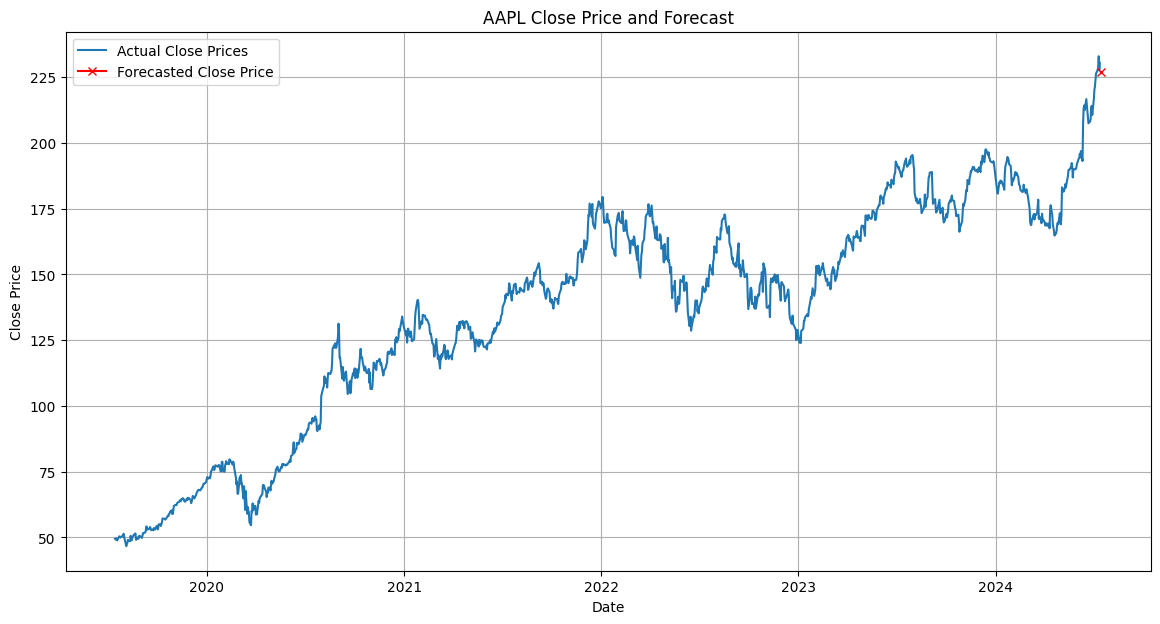

Forecasted Close Price: 227.15801242996523


In [12]:
# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(series, label='Actual Close Prices')
plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='red', marker='x')

# Add titles and labels
plt.title('AAPL Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print("Forecasted Close Price:", forecast.iloc[0, 0])

In [13]:
# Save the model to a file
joblib_file = "autots_model_for_AAPL_1d.pkl"
joblib.dump(model, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to autots_model_for_AAPL_1d.pkl


### Обучение на след день

In [14]:
# Load the data
file_path = 'APPL_new.csv'  # 12.12.1980 -> 03.07.2024
data = pd.read_csv(file_path)
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

# Convert Datetime column to datetime format with UTC
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Set Datetime as index
data.set_index('Date', inplace=True)

# Ensure the index is sorted
data.sort_index(inplace=True)

# Extract the 'Close' series
series = data['Close']

# Initialize and fit the AutoTS model
model_2 = AutoTS(forecast_length=2, frequency='infer', ensemble='simple')
model_2 = model_2.fit(series)

# Generate the forecast
prediction_2 = model_2.predict()
forecast_2 = prediction_2.forecast

print("Forecasted Close Price:", forecast_2.iloc[0, 0])

Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19885D+02    |proj g|=  1.09535D+03

At iterate    1    f=  2.99233D+00    |proj g|=  9.88625D-01

At iterate    2    f=  2.90195D+00    |proj g|=  7.49866D-01

At iterate    3    f=  2.75981D+00    |proj g|=  3.89472D-01

At iterate    4    f=  2.65623D+00    |proj g|=  2.14954D-01

At iterate    5    f=  2.50889D+00    |proj g|=  1.82982D-01

At iterate    6    f=  2.38684D+00    |proj g|=  3.33235D-01

At iterate    7    f=  2.34392D+00    |proj g|=  1.05502D-01

At iterate    8    f=  2.33482D+00    |proj g|=  9.38739D-02

At iterate    9    f=  2.32147D+00    |proj g|=  7.84173D-02

At iterate   10    f=  2.31105D+00    |proj g|=  9.23184D-02

At iterate   11    f=  2.29829D+00    |proj g|=  4.64467D-02

At iterate   12    f=  2.29407D+00    |proj g|=  1.99973D-02

At iterate   13    f=  2.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50


/home/giocatory/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4316
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4261
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4259
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4247
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4239
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4256
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4254
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4242
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4242
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4238
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4241
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4243
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4245
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4230
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4230
Epoch 16/50
41/41 ━━━━━━━━━━━━

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 37 in generation 0: UnobservedComponents
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 38 in generation 0: UnobservedComponents
Model Number: 39 with model ETS in generation 0 of 20
Model Number: 40 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 with model ARDL in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 41 in generation 0: ARDL
Model Number: 42 with model MultivariateMotif in generation 0 of 20
Model Number: 43 with model MultivariateM

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 59 with model Cassandra in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 59 in generation 0: Cassandra
Model Number: 60 with model DMD in generation 0 of 20
Model Number: 61 with model DMD in generation 0 of 20
Model Number: 62 with model ConstantNaive in generation 0 of 20
Model Number: 63 with model LastValueNaive in generation 0 of 20
Model Number: 64 with model AverageValueNaive in generation 0 of 20
Model Number: 65 with model GLS in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 66 with model SeasonalNaive in generation 0 of 20
Model Number: 67 with model GLM in generation 0 of 20
Model Number: 68 with model ETS in generation 0 of 20
Model Number: 69 with model FBProphet in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model UnobservedComponents in generation 0 of 20
Model Number: 71 with model VAR in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 71 in generation 0: VAR
Model Number: 72 with model VECM in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 72 in generation 0: VECM
Model Number: 73 with model ARIMA in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARIMA
Model Number: 74 with mod

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 82 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 82 in generation 0: ARDL
Model Number: 83 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 83 in generation 0: ARCH
Model Number: 84 with model MetricMotif in generation 0 of 20
Model Number: 85 with model SeasonalityMotif in generation 0 of 20
Model Number: 86 with model DMD in generation 0 of 20
Model Number: 87 with model RRVAR in generation 0 of 20
Model Number: 88 with model FFT in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {}, '3': {}, '4': {'window_siz

 This problem is unconstrained.



At iterate   24    f=  2.73119D+00    |proj g|=  1.65319D-02

At iterate   25    f=  2.73071D+00    |proj g|=  2.95387D-02

At iterate   26    f=  2.73044D+00    |proj g|=  6.69807D-03

At iterate   27    f=  2.73024D+00    |proj g|=  1.96225D-02

At iterate   28    f=  2.73001D+00    |proj g|=  1.38970D-02

At iterate   29    f=  2.72978D+00    |proj g|=  8.64698D-03

At iterate   30    f=  2.72958D+00    |proj g|=  1.93782D-02

At iterate   31    f=  2.72945D+00    |proj g|=  6.69816D-03

At iterate   32    f=  2.72940D+00    |proj g|=  1.01832D-02

At iterate   33    f=  2.72935D+00    |proj g|=  6.90786D-03

At iterate   34    f=  2.72930D+00    |proj g|=  3.90501D-03

At iterate   35    f=  2.72927D+00    |proj g|=  2.57668D-03

At iterate   36    f=  2.72918D+00    |proj g|=  5.92963D-03

At iterate   37    f=  2.72909D+00    |proj g|=  1.10871D-02

At iterate   38    f=  2.72903D+00    |proj g|=  8.16754D-03

At iterate   39    f=  2.72894D+00    |proj g|=  6.63828D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 125 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 125 in generation 0: VECM
Model Number: 126 with model ETS in generation 0 of 20
Model Number: 127 with model SectionalMotif in generation 0 of 20
Model Number: 128 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 128 in generation 0: DatepartRegression
Model Number: 129 with model Cassandra in generation 0 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 129 in generation 0: Cassandra
Model Number: 130 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model Theta in generation 0 of 20
Model Number: 132 with model SectionalMotif in generation 0 of 20
Model Number: 133 with model Theta in generation

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 136 in generation 0: GLM
Model Number: 137 with model MetricMotif in generation 0 of 20
Model Number: 138 with model Cassandra in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 139 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 139 in generation 0: SeasonalityMotif
Model Number: 140 with model SeasonalityMotif in generation 0 of 20
Model Number: 141 with model GLS in generation 0 of 20
Model Number: 142 with model RRVAR in generation 0 of 20
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model GLS in generation 0 of 20
Model Number: 145 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model UnobservedComponents in generation 0 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 146 in generation 0: UnobservedComponents
Model Number: 147 with model UnobservedComponents in generation 0 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: Exception("Transformer Detrend failed on fit from params linear {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {'lag': 1, 'fill': 'zero'}}") in model 174 in generation 0: ConstantNaive
Model Number: 175 with model AverageValueNaive in generation 0 of 20
Model Number: 176 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 176 in generation 0: VAR
Model Number: 177 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('Unkno

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('Only gave one variable to VAR') in model 193 in generation 0: VAR
Model Number: 194 with model ConstantNaive in generation 0 of 20
Model Number: 195 with model Theta in generation 0 of 20
Model Number: 196 with model UnobservedComponents in generation 0 of 20
Model Number: 197 with model WindowRegression in generation 0 of 20
Model Number: 198 with model UnivariateMotif in generation 0 of 20
Model Number: 199 with model WindowRegression in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}") in model 199 in generation 0: WindowRegression
Model Number: 200 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 200 in generation 0: MultivariateRegression
Model Number: 201 with model RRVAR in generation 0 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


New Generation: 1 of 20
Model Number: 202 with model SeasonalityMotif in generation 1 of 20
Model Number: 203 with model UnivariateMotif in generation 1 of 20
Model Number: 204 with model NVAR in generation 1 of 20
Model Number: 205 with model UnivariateMotif in generation 1 of 20
Model Number: 206 with model DMD in generation 1 of 20
Model Number: 207 with model AverageValueNaive in generation 1 of 20
Model Number: 208 with model DatepartRegression in generation 1 of 20
Model Number: 209 with model ETS in generation 1 of 20
Model Number: 210 with model GLS in generation 1 of 20
Model Number: 211 with model UnobservedComponents in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 211 in generation 1: UnobservedComponents
Model Number: 212 with model WindowRegression in generation 1 of 20
Model Number: 213 with model LastValueNaive in generation 1 of 20
Model Number: 214 with model DatepartRegression in generation 1 of

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 226 with model AverageValueNaive in generation 1 of 20
Model Number: 227 with model GLS in generation 1 of 20
Model Number: 228 with model NVAR in generation 1 of 20
Model Number: 229 with model LastValueNaive in generation 1 of 20
Model Number: 230 with model ConstantNaive in generation 1 of 20
Model Number: 231 with model ARIMA in generation 1 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 231 in generation 1: ARIMA
Model Number: 232 with model WindowRegression in generation 1 of 20
Model Number: 233 with model SectionalMotif in generation 1 of 20
Model Number: 234 with model MetricMotif in generation 1 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 235 with model SectionalMotif in generation 1 of 20
Model Number: 236 with model RRVAR in generation 1 of 20
Model Number: 237 with model SeasonalityMotif in generation 1 of 20
Model Number: 238 with model WindowRegression in generation 1 of 20
Model Number: 239 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78557D+03    |proj g|=  3.56340D+03

At iterate    1    f=  6.79683D+00    |proj g|=  1.10497D+01

At iterate    2    f=  5.62167D+00    |proj g|=  8.18487D+00

At iterate    3    f=  3.81178D+00    |proj g|=  3.70904D+00

At iterate    4    f=  3.16842D+00    |proj g|=  2.10035D+00

At iterate    5    f=  2.76004D+00    |proj g|=  1.10330D+00

At iterate    6    f=  2.52652D+00    |proj g|=  5.58339D-01

At iterate    7    f=  2.41255D+00    |proj g|=  2.64898D-01

At iterate    8    f

 This problem is unconstrained.



At iterate   17    f=  2.29492D+00    |proj g|=  1.46128D-02

At iterate   18    f=  2.29428D+00    |proj g|=  1.09297D-02

At iterate   19    f=  2.29382D+00    |proj g|=  1.06666D-02

At iterate   20    f=  2.29341D+00    |proj g|=  6.43460D-03

At iterate   21    f=  2.29298D+00    |proj g|=  5.36530D-03

At iterate   22    f=  2.29188D+00    |proj g|=  5.13463D-02

At iterate   23    f=  2.29069D+00    |proj g|=  7.62822D-02

At iterate   24    f=  2.28920D+00    |proj g|=  2.68937D-02

At iterate   25    f=  2.28898D+00    |proj g|=  1.22855D-02

At iterate   26    f=  2.28890D+00    |proj g|=  8.65217D-03

At iterate   27    f=  2.28886D+00    |proj g|=  7.08932D-03

At iterate   28    f=  2.28877D+00    |proj g|=  1.90104D-03

At iterate   29    f=  2.28874D+00    |proj g|=  3.44664D-03

At iterate   30    f=  2.28873D+00    |proj g|=  1.73259D-03

At iterate   31    f=  2.28873D+00    |proj g|=  9.78172D-04

At iterate   32    f=  2.28872D+00    |proj g|=  1.69970D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.



At iterate    1    f=  3.23406D+00    |proj g|=  2.06383D+00

At iterate    2    f=  3.15576D+00    |proj g|=  1.83762D+00

At iterate    3    f=  2.81684D+00    |proj g|=  7.97044D-01

At iterate    4    f=  2.66429D+00    |proj g|=  3.90865D-01

At iterate    5    f=  2.48030D+00    |proj g|=  1.47207D-01

At iterate    6    f=  2.39230D+00    |proj g|=  9.81896D-02

At iterate    7    f=  2.35017D+00    |proj g|=  8.99061D-02

At iterate    8    f=  2.34461D+00    |proj g|=  6.06784D-02

At iterate    9    f=  2.34124D+00    |proj g|=  5.06551D-02

At iterate   10    f=  2.33415D+00    |proj g|=  3.94928D-02

At iterate   11    f=  2.32759D+00    |proj g|=  3.17289D-02

At iterate   12    f=  2.32592D+00    |proj g|=  2.96178D-02

At iterate   13    f=  2.32475D+00    |proj g|=  1.64028D-02

At iterate   14    f=  2.32448D+00    |proj g|=  1.00955D-02

At iterate   15    f=  2.32410D+00    |proj g|=  7.71862D-03

At iterate   16    f=  2.32356D+00    |proj g|=  9.98629D-03

At iter

 This problem is unconstrained.


At iterate    9    f=  1.00797D+00    |proj g|=  1.56123D-02

At iterate   10    f=  1.00688D+00    |proj g|=  8.11714D-03

At iterate   11    f=  1.00606D+00    |proj g|=  9.09860D-03

At iterate   12    f=  1.00542D+00    |proj g|=  1.90511D-02

At iterate   13    f=  1.00512D+00    |proj g|=  7.10126D-03

At iterate   14    f=  1.00505D+00    |proj g|=  4.28885D-03

At iterate   15    f=  1.00492D+00    |proj g|=  6.43117D-03

At iterate   16    f=  1.00463D+00    |proj g|=  4.04513D-02

At iterate   17    f=  1.00006D+00    |proj g|=  1.06032D-01

At iterate   18    f=  9.99659D-01    |proj g|=  6.78752D-02

At iterate   19    f=  9.99530D-01    |proj g|=  9.68645D-02

At iterate   20    f=  9.98017D-01    |proj g|=  1.33761D-02

At iterate   21    f=  9.97808D-01    |proj g|=  7.95826D-03

At iterate   22    f=  9.97357D-01    |proj g|=  2.60504D-02

At iterate   23    f=  9.96805D-01    |proj g|=  3.15613D-02

At iterate   24    f=  9.95750D-01    |proj g|=  4.45328D-02

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 257 with model NVAR in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 257 in generation 1: NVAR
Model Number: 258 with model WindowRegression in generation 1 of 20
Model Number: 259 with model SeasonalityMotif in generation 1 of 20
Model Number: 260 with model ETS in generation 1 of 20
Model Number: 261 with model FFT in generation 1 of 20
Model Number: 262 with model SectionalMotif in generation 1 of 20
Model Number: 263 with model RRVAR in generation 1 of 20
Model Number: 264 with model DatepartRegression in generation 1 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 264 in generation 1: DatepartRegression
Model Number: 265 with model ConstantNaive in generation 1 of 20
Model Number: 266 with model MultivariateMotif in generation 1 of 20
Model N

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to 

Model Number: 281 with model Cassandra in generation 1 of 20
Model Number: 282 with model SeasonalNaive in generation 1 of 20
Model Number: 283 with model SeasonalityMotif in generation 1 of 20
Model Number: 284 with model ConstantNaive in generation 1 of 20
Model Number: 285 with model Theta in generation 1 of 20
Model Number: 286 with model AverageValueNaive in generation 1 of 20
Model Number: 287 with model LastValueNaive in generation 1 of 20
Model Number: 288 with model UnivariateMotif in generation 1 of 20
Model Number: 289 with model MetricMotif in generation 1 of 20
Model Number: 290 with model NVAR in generation 1 of 20
Model Number: 291 with model LastValueNaive in generation 1 of 20
Model Number: 292 with model GLS in generation 1 of 20
Model Number: 293 with model LastValueNaive in generation 1 of 20
Model Number: 294 with model SeasonalityMotif in generation 1 of 20
Model Number: 295 with model MetricMotif in generation 1 of 20
Model Number: 296 with model AverageValueNaiv

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 298 with model WindowRegression in generation 1 of 20
Model Number: 299 with model UnobservedComponents in generation 1 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 300 with model Theta in generation 1 of 20
Model Number: 301 with model SectionalMotif in generation 1 of 20
Model Number: 302 with model GLM in generation 1 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 302 in generation 1: GLM
Model Number: 303 with model ETS in generation 1 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 304 with model ConstantNaive in generation 1 of 20
Model Number: 305 with model Cassandra in generation 1 of 20
FillNA method `pad` not known, returning original
Template Eval Error: ValueError('Found array with 1 feature(s) (shape=(1303, 1)) while a minimum of 2 is required by FeatureAgglomeration.') in model 305 in generation 1: Cassandra
Model Number: 306 with model Theta in generation 1 of 20
Model Number: 307 with model SeasonalNaive in generation 1 of 20
Model Number: 308 with model DatepartRegression in generation 1 of 20
Model Number: 309 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53240D-01    |proj g|=  2.78179D-02

At iterate    1    f=  2.52635D-01    |proj g|=  1.04789D-01


 This problem is unconstrained.



At iterate    2    f=  2.52038D-01    |proj g|=  3.74404D-02

At iterate    3    f=  2.51625D-01    |proj g|=  2.63426D-02

At iterate    4    f=  2.51186D-01    |proj g|=  3.23251D-02

At iterate    5    f=  2.50522D-01    |proj g|=  3.37464D-02

At iterate    6    f=  2.49558D-01    |proj g|=  3.34014D-02

At iterate    7    f=  2.49079D-01    |proj g|=  3.47135D-02

At iterate    8    f=  2.48275D-01    |proj g|=  1.48340D-02

At iterate    9    f=  2.47981D-01    |proj g|=  9.04865D-03

At iterate   10    f=  2.47792D-01    |proj g|=  7.81148D-03

At iterate   11    f=  2.47660D-01    |proj g|=  4.87564D-03

At iterate   12    f=  2.47512D-01    |proj g|=  5.97998D-03

At iterate   13    f=  2.47485D-01    |proj g|=  2.23707D-02

At iterate   14    f=  2.47390D-01    |proj g|=  1.30818D-02

At iterate   15    f=  2.47338D-01    |proj g|=  1.44366D-02

At iterate   16    f=  2.47296D-01    |proj g|=  4.72780D-03

At iterate   17    f=  2.47278D-01    |proj g|=  3.63717D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._

Model Number: 335 with model Cassandra in generation 1 of 20
Model Number: 336 with model GLS in generation 1 of 20
Model Number: 337 with model AverageValueNaive in generation 1 of 20
Model Number: 338 with model UnobservedComponents in generation 1 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 339 with model SeasonalNaive in generation 1 of 20
Model Number: 340 with model LastValueNaive in generation 1 of 20
Model Number: 341 with model SectionalMotif in generation 1 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 341 in generation 1: SectionalMotif
New Generation: 2 of 20
Model Number: 342 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 342 in generation 2: DatepartRegression
Model Number: 343 with model LastValueNaive in generation 2 of 20
Model Number: 344 with model NVAR in generation 2 of 20
Model Number: 345 with model FFT in generation 2 of 20
Model Number: 346 with model NVAR in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
 This problem is unconstrained.


Model Number: 347 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43010D+00    |proj g|=  1.71736D-01

At iterate    1    f=  2.41974D+00    |proj g|=  1.96137D-01

At iterate    2    f=  2.40875D+00    |proj g|=  1.37083D-01

At iterate    3    f=  2.38365D+00    |proj g|=  8.72787D-02

At iterate    4    f=  2.37119D+00    |proj g|=  8.78464D-02

At iterate    5    f=  2.36544D+00    |proj g|=  6.97154D-02

At iterate    6    f=  2.36179D+00    |proj g|=  2.96207D-02

At iterate    7    f=  2.35951D+00    |proj g|=  2.55489D-02

At iterate    8    f=  2.35783D+00    |proj g|=  3.29361D-02

At iterate    9    f=  2.35630D+00    |proj g|=  3.40478D-02

At iterate   10    f=  2.35251D+00    |proj g|=  4.29192D-02

At iterate   11    f=  2.34779D+00    |proj g|=  6.04819D-02

At iterate   12    f=  2.34170D

 This problem is unconstrained.



At iterate    9    f=  2.52446D+00    |proj g|=  4.35295D-02

At iterate   10    f=  2.51843D+00    |proj g|=  3.44057D-02

At iterate   11    f=  2.51535D+00    |proj g|=  2.51861D-02

At iterate   12    f=  2.51320D+00    |proj g|=  2.02392D-02

At iterate   13    f=  2.51112D+00    |proj g|=  1.76045D-02

At iterate   14    f=  2.50925D+00    |proj g|=  2.58791D-02

At iterate   15    f=  2.50785D+00    |proj g|=  6.45693D-03

At iterate   16    f=  2.50717D+00    |proj g|=  8.90340D-03

At iterate   17    f=  2.50648D+00    |proj g|=  1.10247D-02

At iterate   18    f=  2.50627D+00    |proj g|=  1.30689D-02

At iterate   19    f=  2.50580D+00    |proj g|=  6.38881D-03

At iterate   20    f=  2.50550D+00    |proj g|=  2.74036D-03

At iterate   21    f=  2.50537D+00    |proj g|=  7.29572D-03

At iterate   22    f=  2.50526D+00    |proj g|=  3.06304D-03

At iterate   23    f=  2.50520D+00    |proj g|=  1.04959D-03

At iterate   24    f=  2.50517D+00    |proj g|=  2.11012D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  2.76136D+00    |proj g|=  1.11993D+00

At iterate    4    f=  2.54344D+00    |proj g|=  6.07735D-01

At iterate    5    f=  2.42220D+00    |proj g|=  2.93316D-01

At iterate    6    f=  2.35614D+00    |proj g|=  1.35660D-01

At iterate    7    f=  2.32125D+00    |proj g|=  9.21010D-02

At iterate    8    f=  2.31810D+00    |proj g|=  2.60967D-01

At iterate    9    f=  2.30121D+00    |proj g|=  4.25236D-02

At iterate   10    f=  2.29940D+00    |proj g|=  4.51420D-02

At iterate   11    f=  2.29570D+00    |proj g|=  6.01990D-02

At iterate   12    f=  2.28909D+00    |proj g|=  4.16730D-02

At iterate   13    f=  2.28752D+00    |proj g|=  2.46788D-02

At iterate   14    f=  2.28690D+00    |proj g|=  1.54961D-02

At iterate   15    f=  2.28678D+00    |proj g|=  6.41592D-03

At iterate   16    f=  2.28668D+00    |proj g|=  9.26410D-03

At iterate   17    f=  2.28644D+00    |proj g|=  1.18794D-02

At iterate   18    f=  2.28595D+00    |proj g|=  1.52160D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 359 with model ETS in generation 2 of 20
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 359 in generation 2: ETS
Model Number: 360 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32724D+00    |proj g|=  3.32891D-02

At iterate    1    f=  2.32588D+00    |proj g|=  2.71983D-03

At iterate    2    f=  2.32587D+00    |proj g|=  1.67829D-03

At iterate    3    f=  2.32586D+00    |proj g|=  1.63582D-03

At iterate    4    f=  2.32584D+00    |proj g|=  2.83586D-03


 This problem is unconstrained.



At iterate    5    f=  2.32580D+00    |proj g|=  3.36761D-03

At iterate    6    f=  2.32569D+00    |proj g|=  9.11583D-03

At iterate    7    f=  2.32528D+00    |proj g|=  3.00324D-02

At iterate    8    f=  2.32504D+00    |proj g|=  3.63246D-02

At iterate    9    f=  2.32476D+00    |proj g|=  5.35573D-02

At iterate   10    f=  2.32444D+00    |proj g|=  9.44851D-02

At iterate   11    f=  2.32305D+00    |proj g|=  2.52807D-02

At iterate   12    f=  2.32159D+00    |proj g|=  1.57702D-02

At iterate   13    f=  2.32057D+00    |proj g|=  2.72897D-02

At iterate   14    f=  2.32013D+00    |proj g|=  3.44001D-02

At iterate   15    f=  2.31970D+00    |proj g|=  2.69012D-02

At iterate   16    f=  2.31959D+00    |proj g|=  9.18120D-03

At iterate   17    f=  2.31953D+00    |proj g|=  7.84488D-03

At iterate   18    f=  2.31946D+00    |proj g|=  8.89817D-03

At iterate   19    f=  2.31934D+00    |proj g|=  1.08743D-02

At iterate   20    f=  2.31916D+00    |proj g|=  8.49332D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 390 with model UnobservedComponents in generation 2 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 390 in generation 2: UnobservedComponents
Model Number: 391 with model Theta in generation 2 of 20
Model Number: 392 with model Theta in generation 2 of 20
Model Number: 393 with model DMD in generation 2 of 20
Model Number: 394 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53730D+02    |proj g|=  5.30310D+02

At iterate    1    f=  2.87385D+00    |proj g|=  9.59699D-01


 This problem is unconstrained.



At iterate    2    f=  2.76293D+00    |proj g|=  7.21972D-01

At iterate    3    f=  2.53152D+00    |proj g|=  1.92748D-01

At iterate    4    f=  2.43092D+00    |proj g|=  1.36185D-01

At iterate    5    f=  2.36934D+00    |proj g|=  4.25244D-01

At iterate    6    f=  2.32575D+00    |proj g|=  7.69415D-02

At iterate    7    f=  2.32068D+00    |proj g|=  7.91658D-02

At iterate    8    f=  2.31622D+00    |proj g|=  7.50836D-02

At iterate    9    f=  2.30686D+00    |proj g|=  7.15661D-02

At iterate   10    f=  2.29701D+00    |proj g|=  5.51019D-02

At iterate   11    f=  2.29371D+00    |proj g|=  4.91943D-02

At iterate   12    f=  2.28977D+00    |proj g|=  3.37535D-02

At iterate   13    f=  2.28819D+00    |proj g|=  2.02077D-02

At iterate   14    f=  2.28561D+00    |proj g|=  1.48754D-02

At iterate   15    f=  2.28555D+00    |proj g|=  8.40150D-02

At iterate   16    f=  2.28439D+00    |proj g|=  1.44695D-02

At iterate   17    f=  2.28426D+00    |proj g|=  1.11015D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df

Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 410 in generation 2: WindowRegression
Model Number: 411 with model WindowRegression in generation 2 of 20
Model Number: 412 with model SectionalMotif in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {'constant': 0, 'reintroduction_model': None, 'fillna': 'pchip'}, '1': {'lag_1': 60, 'method': 2}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 412 in generation 2: SectionalMotif
Model Number: 413 with model SeasonalityMotif in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}}") in model 413 in generation 2:

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 423 with model Theta in generation 2 of 20
Model Number: 424 with model NVAR in generation 2 of 20
Model Number: 425 with model NVAR in generation 2 of 20
Model Number: 426 with model SeasonalityMotif in generation 2 of 20
Model Number: 427 with model SectionalMotif in generation 2 of 20
Model Number: 428 with model SeasonalityMotif in generation 2 of 20
Model Number: 429 with model Cassandra in generation 2 of 20
Model Number: 430 with model Cassandra in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 431 with model GLM in generation 2 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params median {'0': {'constant': 0, 'reintroduction_model': None, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {'lag_1': 4, 'method': 'LastValue'}, '3': {}, '4': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}}") in model 431 in generation 2: GLM
Model Number: 432 with model LastValueNaive in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.

Model Number: 433 with model SeasonalNaive in generation 2 of 20
Model Number: 434 with model ConstantNaive in generation 2 of 20
Model Number: 435 with model Theta in generation 2 of 20
Model Number: 436 with model Theta in generation 2 of 20
Model Number: 437 with model GLS in generation 2 of 20
Model Number: 438 with model DatepartRegression in generation 2 of 20
Model Number: 439 with model LastValueNaive in generation 2 of 20
Model Number: 440 with model GLS in generation 2 of 20
Model Number: 441 with model DatepartRegression in generation 2 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 441 in generation 2: DatepartRegression
Model Number: 442 with model SeasonalityMotif in generation 2 of 20
Model Number: 443 with model Theta in generation 2 of 20
Model Number: 444 with model ARIMA in generation 2 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 444 in gener

 This problem is unconstrained.



At iterate   12    f=  2.18853D+00    |proj g|=  5.91962D-03

At iterate   13    f=  2.18825D+00    |proj g|=  6.89323D-03

At iterate   14    f=  2.18814D+00    |proj g|=  3.71477D-03

At iterate   15    f=  2.18807D+00    |proj g|=  2.05353D-03

At iterate   16    f=  2.18802D+00    |proj g|=  1.87666D-03

At iterate   17    f=  2.18801D+00    |proj g|=  9.58285D-03

At iterate   18    f=  2.18784D+00    |proj g|=  6.83578D-03

At iterate   19    f=  2.18743D+00    |proj g|=  2.62898D-02

At iterate   20    f=  2.18718D+00    |proj g|=  3.99924D-02

At iterate   21    f=  2.18693D+00    |proj g|=  2.17944D-02

At iterate   22    f=  2.18668D+00    |proj g|=  5.93826D-03

At iterate   23    f=  2.18657D+00    |proj g|=  3.63136D-03

At iterate   24    f=  2.18652D+00    |proj g|=  7.72821D-03

At iterate   25    f=  2.18647D+00    |proj g|=  3.03222D-03

At iterate   26    f=  2.18645D+00    |proj g|=  4.93718D-03

At iterate   27    f=  2.18643D+00    |proj g|=  4.43547D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 453 with model LastValueNaive in generation 2 of 20
Model Number: 454 with model WindowRegression in generation 2 of 20
Model Number: 455 with model LastValueNaive in generation 2 of 20
Model Number: 456 with model SectionalMotif in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 457 with model SectionalMotif in generation 2 of 20
Model Number: 458 with model SeasonalNaive in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {}, '1': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.7, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100, 'grow_policy': 'lossguide'}, 'datepart_method': 'lunar_phase'}, 'fillna': 'mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}}") in model 458 in generation 2: SeasonalNaive
Model Number: 459 with model DMD in generation 2 of 20
Model Number: 460 with model GLS in generation 2 of 20
Model Number: 461 with model Cassandra in generation 2 of 20
Model Number: 462 with model ETS in generation 2 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 463 with model Theta in generation 2 of 20
Model Number: 464 with model SectionalMotif in generation 2 of 20
Model Number: 465 with model RRVAR in generation 2 of 20
Model Number: 466 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 466 in generation 2: DatepartRegression
Model Number: 467 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51166D+00    |proj g|=  1.43794D-02

At iterate    1    f=  2.51148D+00    |proj g|=  8.41214D-03

At iterate    2    f=  2.51144D+00    |proj g|=  1.08499D-03

At iterate    3    f=  2.51144D+00    |proj g|=  8.61151D-04

At iterate    4    f=  2.51143D+00    |proj g|=  3.41618D-04

At iterate    5    f=  2.51143D+00    |proj

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
 This problem is unconstrained.



At iterate    8    f=  2.51143D+00    |proj g|=  6.28859D-04

At iterate    9    f=  2.51143D+00    |proj g|=  1.25809D-03

At iterate   10    f=  2.51142D+00    |proj g|=  2.32103D-03

At iterate   11    f=  2.51141D+00    |proj g|=  3.93689D-03

At iterate   12    f=  2.51138D+00    |proj g|=  6.30679D-03

At iterate   13    f=  2.51131D+00    |proj g|=  9.20143D-03

At iterate   14    f=  2.51117D+00    |proj g|=  1.15249D-02

At iterate   15    f=  2.51094D+00    |proj g|=  1.12384D-02

At iterate   16    f=  2.51092D+00    |proj g|=  9.87732D-03

At iterate   17    f=  2.51068D+00    |proj g|=  4.82902D-03

At iterate   18    f=  2.51059D+00    |proj g|=  2.74094D-03

At iterate   19    f=  2.51057D+00    |proj g|=  4.30732D-03

At iterate   20    f=  2.51056D+00    |proj g|=  1.96005D-03

At iterate   21    f=  2.51055D+00    |proj g|=  8.50631D-04

At iterate   22    f=  2.51054D+00    |proj g|=  4.67189D-04

At iterate   23    f=  2.51054D+00    |proj g|=  1.71711D-04

At iter

 This problem is unconstrained.



At iterate   45    f=  2.69404D+00    |proj g|=  2.83381D-02

At iterate   46    f=  2.69390D+00    |proj g|=  2.58623D-02

At iterate   47    f=  2.69378D+00    |proj g|=  2.47871D-02

At iterate   48    f=  2.69366D+00    |proj g|=  3.04453D-02

At iterate   49    f=  2.69359D+00    |proj g|=  2.02607D-02

At iterate   50    f=  2.69353D+00    |proj g|=  2.32305D-02

At iterate   51    f=  2.69347D+00    |proj g|=  2.19180D-02

At iterate   52    f=  2.69338D+00    |proj g|=  1.86326D-02

At iterate   53    f=  2.69330D+00    |proj g|=  4.35582D-02

At iterate   54    f=  2.69315D+00    |proj g|=  6.97140D-03

At iterate   55    f=  2.69311D+00    |proj g|=  3.77468D-02

At iterate   56    f=  2.69307D+00    |proj g|=  1.60309D-02

At iterate   57    f=  2.69303D+00    |proj g|=  2.20947D-02

At iterate   58    f=  2.69297D+00    |proj g|=  2.88668D-02

At iterate   59    f=  2.69289D+00    |proj g|=  1.97177D-02

At iterate   60    f=  2.69283D+00    |proj g|=  3.71636D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


New Generation: 3 of 20
Model Number: 482 with model MetricMotif in generation 3 of 20
Model Number: 483 with model NVAR in generation 3 of 20
Model Number: 484 with model ETS in generation 3 of 20
Model Number: 485 with model DatepartRegression in generation 3 of 20
Model Number: 486 with model UnobservedComponents in generation 3 of 20
Model Number: 487 with model WindowRegression in generation 3 of 20
Model Number: 488 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34121D+00    |proj g|=  5.14136D-02

At iterate    1    f= -2.34121D+00    |proj g|=  7.46037D-02

At iterate    2    f= -2.34127D+00    |proj g|=  3.08125D-01

At iterate    3    f= -2.34157D+00    |proj g|=  9.74890D-01

At iterate    4    f= -2.34213D+00    |proj g|=  1.60145D+00

At iterate    5    f= -2.34277D+00    |proj g|=  1.51987D

 This problem is unconstrained.



At iterate   18    f= -2.34324D+00    |proj g|=  2.62160D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     30      1     0     0   2.622D-03  -2.343D+00
  F =  -2.3432442246193599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 489 with model NVAR in generation 3 of 20
Model Number: 490 with model SectionalMotif in generation 3 of 20
Model Number: 491 with model DatepartRegression in generation 3 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 491 in generation 3: DatepartRegression
Model Number: 492 with mod

 This problem is unconstrained.


Model Number: 513 with model SectionalMotif in generation 3 of 20
Model Number: 514 with model WindowRegression in generation 3 of 20
Model Number: 515 with model ETS in generation 3 of 20
Model Number: 516 with model MetricMotif in generation 3 of 20
Model Number: 517 with model WindowRegression in generation 3 of 20
Model Number: 518 with model SeasonalityMotif in generation 3 of 20
Model Number: 519 with model WindowRegression in generation 3 of 20
Model Number: 520 with model RRVAR in generation 3 of 20
Model Number: 521 with model SectionalMotif in generation 3 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 521 in generation 3: SectionalMotif
Model Number: 522 with model SeasonalityMotif in generation 3 of 20
Model Number: 523 with model Theta in generation 3 of 20
Model Number: 524 with model MetricMotif in generation 3 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 525 with model SectionalMotif in generation 3 of 20
Model Number: 526 with model NVAR in generation 3 of 20
Model Number: 527 with model DMD in generation 3 of 20
Model Number: 528 with model ConstantNaive in generation 3 of 20
Model Number: 529 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68752D+00    |proj g|=  6.86570D-01

At iterate    1    f= -1.68776D+00    |proj g|=  1.56930D-01


 This problem is unconstrained.



At iterate    2    f= -1.68778D+00    |proj g|=  4.59926D-02

At iterate    3    f= -1.68780D+00    |proj g|=  5.57033D-02

At iterate    4    f= -1.68789D+00    |proj g|=  2.63790D-01

At iterate    5    f= -1.68804D+00    |proj g|=  4.53377D-01

At iterate    6    f= -1.68831D+00    |proj g|=  5.60813D-01

At iterate    7    f= -1.68856D+00    |proj g|=  3.80253D-01

At iterate    8    f= -1.68866D+00    |proj g|=  8.66016D-02

At iterate    9    f= -1.68868D+00    |proj g|=  5.27581D-02

At iterate   10    f= -1.68869D+00    |proj g|=  1.08080D-01

At iterate   11    f= -1.68870D+00    |proj g|=  1.74847D-01

At iterate   12    f= -1.68875D+00    |proj g|=  2.86353D-01

At iterate   13    f= -1.68887D+00    |proj g|=  4.51878D-01

At iterate   14    f= -1.68916D+00    |proj g|=  6.77646D-01

At iterate   15    f= -1.68972D+00    |proj g|=  8.73472D-01

At iterate   16    f= -1.69042D+00    |proj g|=  7.89875D-01

At iterate   17    f= -1.69051D+00    |proj g|=  2.39486D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1133: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1139: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1350: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1337: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

 This problem is unconstrained.



At iterate    7    f= -1.58147D+00    |proj g|=  2.57210D-01

At iterate    8    f= -1.58231D+00    |proj g|=  3.43126D-01

At iterate    9    f= -1.58269D+00    |proj g|=  5.45628D-01

At iterate   10    f= -1.58327D+00    |proj g|=  5.61604D-01

At iterate   11    f= -1.58466D+00    |proj g|=  3.55553D-01

At iterate   12    f= -1.58739D+00    |proj g|=  3.28876D-01

At iterate   13    f= -1.58822D+00    |proj g|=  3.69757D-01

At iterate   14    f= -1.58849D+00    |proj g|=  4.53469D-02

At iterate   15    f= -1.58881D+00    |proj g|=  6.38804D-02

At iterate   16    f= -1.58979D+00    |proj g|=  6.68189D-02

At iterate   17    f= -1.59462D+00    |proj g|=  1.19025D-01

At iterate   18    f= -1.59522D+00    |proj g|=  1.29788D+00

At iterate   19    f= -1.59684D+00    |proj g|=  3.89569D-01

At iterate   20    f= -1.59770D+00    |proj g|=  6.46437D-02

At iterate   21    f= -1.59931D+00    |proj g|=  2.47067D-01

At iterate   22    f= -1.59985D+00    |proj g|=  7.18287D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fu

Model Number: 583 with model LastValueNaive in generation 3 of 20
Model Number: 584 with model MetricMotif in generation 3 of 20
Model Number: 585 with model SeasonalNaive in generation 3 of 20
Model Number: 586 with model GLM in generation 3 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 586 in generation 3: GLM
Model Number: 587 with model MultivariateMotif in generation 3 of 20
Model Number: 588 with model NVAR in generation 3 of 20
Model Number: 589 with model MultivariateMotif in generation 3 of 20
Model Number: 590 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37920D+02    |proj g|=  2.65621D+02

At iterate    1    f=  3.74951D+00    |proj g|=  2.23474D+00

At iterate    2    f=  

/home/giocatory/.local/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
 This problem is unconstrained.



At iterate   25    f=  2.52336D+00    |proj g|=  3.68846D-02

At iterate   26    f=  2.52062D+00    |proj g|=  4.45312D-02

At iterate   27    f=  2.51726D+00    |proj g|=  3.95817D-02

At iterate   28    f=  2.51551D+00    |proj g|=  4.19234D-02

At iterate   29    f=  2.51436D+00    |proj g|=  1.69621D-02

At iterate   30    f=  2.51391D+00    |proj g|=  1.28189D-02

At iterate   31    f=  2.51364D+00    |proj g|=  6.21361D-03

At iterate   32    f=  2.51350D+00    |proj g|=  4.25901D-03

At iterate   33    f=  2.51328D+00    |proj g|=  5.45602D-03

At iterate   34    f=  2.51281D+00    |proj g|=  1.35688D-02

At iterate   35    f=  2.51226D+00    |proj g|=  1.36983D-02

At iterate   36    f=  2.51195D+00    |proj g|=  3.24824D-02

At iterate   37    f=  2.51104D+00    |proj g|=  1.08688D-02

At iterate   38    f=  2.51057D+00    |proj g|=  6.71046D-03

At iterate   39    f=  2.51021D+00    |proj g|=  5.83975D-03

At iterate   40    f=  2.51015D+00    |proj g|=  1.40583D-02

At iter

 This problem is unconstrained.



At iterate   19    f= -1.95489D+00    |proj g|=  8.02461D+00

At iterate   20    f= -1.97114D+00    |proj g|=  6.88036D+00

At iterate   21    f= -1.99905D+00    |proj g|=  4.16010D-01

At iterate   22    f= -1.99929D+00    |proj g|=  1.61338D-01

At iterate   23    f= -1.99940D+00    |proj g|=  6.85566D-01

At iterate   24    f= -2.00027D+00    |proj g|=  1.59170D-01

At iterate   25    f= -2.00154D+00    |proj g|=  7.69993D-01

At iterate   26    f= -2.00288D+00    |proj g|=  1.06895D+00

At iterate   27    f= -2.00867D+00    |proj g|=  2.00989D+00

At iterate   28    f= -2.02064D+00    |proj g|=  2.72369D+00

At iterate   29    f= -2.02896D+00    |proj g|=  1.65418D+00

At iterate   30    f= -2.02972D+00    |proj g|=  3.14463D-01

At iterate   31    f= -2.02994D+00    |proj g|=  3.53062D-02

At iterate   32    f= -2.03000D+00    |proj g|=  1.00327D-01

At iterate   33    f= -2.03002D+00    |proj g|=  2.55425D-02

At iterate   34    f= -2.03024D+00    |proj g|=  1.44870D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'method': 'nonparametric', 'method_params': {'p': 0.02, 'z_init': 2.0, 'z_limit': 12, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 25, 'sd_weight': 25, 'anomaly_count_weight': 1.0}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '1': {'span': 25}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}}") in model 604 in generation 3: GLM
Model Number: 605 with model MultivariateMotif in generation 3 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {}, '1': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '2': {}, '3': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25,

 This problem is unconstrained.



At iterate    2    f=  1.07874D+00    |proj g|=  6.90023D-01

At iterate    3    f=  8.98541D-01    |proj g|=  9.69898D-01

At iterate    4    f=  7.57350D-01    |proj g|=  1.15974D+00

At iterate    5    f= -1.18419D+00    |proj g|=  2.95124D+00

At iterate    6    f= -1.49784D+00    |proj g|=  2.87174D+00

At iterate    7    f= -1.50960D+00    |proj g|=  9.43351D-01

At iterate    8    f= -1.68882D+00    |proj g|=  2.72942D+00

At iterate    9    f= -1.79455D+00    |proj g|=  6.60623D+00

At iterate   10    f= -1.82169D+00    |proj g|=  6.32384D+00

At iterate   11    f= -1.84064D+00    |proj g|=  3.59489D+00

At iterate   12    f= -1.85496D+00    |proj g|=  2.61927D+00

At iterate   13    f= -1.91914D+00    |proj g|=  3.09986D-01

At iterate   14    f= -2.05855D+00    |proj g|=  5.01878D+00

At iterate   15    f= -2.08942D+00    |proj g|=  4.82495D+00

At iterate   16    f= -2.15079D+00    |proj g|=  2.99037D+00

At iterate   17    f= -2.20198D+00    |proj g|=  1.54867D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 624 with model AverageValueNaive in generation 4 of 20
Model Number: 625 with model AverageValueNaive in generation 4 of 20
Model Number: 626 with model DMD in generation 4 of 20
Model Number: 627 with model SeasonalityMotif in generation 4 of 20
Model Number: 628 with model WindowRegression in generation 4 of 20
Model Number: 629 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52230D+00    |proj g|=  2.49513D-02

At iterate    1    f=  2.51980D+00    |proj g|=  1.95474D-02

At iterate    2    f=  2.51860D+00    |proj g|=  1.78801D-02

At iterate    3    f=  2.51565D+00    |proj g|=  1.50581D-02

At iterate    4    f=  2.51323D+00    |proj g|=  2.51711D-02

At iterate    5    f=  2.51113D+00    |proj g|=  2.60218D-02

At iterate    6    f=  2.50958D+00    |proj g|=  1.33683D-02

At iterate  

 This problem is unconstrained.



At iterate   11    f=  2.50669D+00    |proj g|=  5.31001D-03

At iterate   12    f=  2.50663D+00    |proj g|=  2.51089D-03

At iterate   13    f=  2.50658D+00    |proj g|=  1.70962D-03

At iterate   14    f=  2.50652D+00    |proj g|=  2.06424D-03

At iterate   15    f=  2.50651D+00    |proj g|=  4.47636D-03

At iterate   16    f=  2.50648D+00    |proj g|=  1.46230D-03

At iterate   17    f=  2.50647D+00    |proj g|=  5.24982D-04

At iterate   18    f=  2.50646D+00    |proj g|=  4.82541D-04

At iterate   19    f=  2.50646D+00    |proj g|=  4.73950D-04

At iterate   20    f=  2.50646D+00    |proj g|=  1.27835D-04

At iterate   21    f=  2.50646D+00    |proj g|=  8.34461D-05

At iterate   22    f=  2.50646D+00    |proj g|=  7.96081D-05

At iterate   23    f=  2.50646D+00    |proj g|=  2.67762D-04

At iterate   24    f=  2.50646D+00    |proj g|=  5.15600D-04

At iterate   25    f=  2.50646D+00    |proj g|=  9.81696D-04

At iterate   26    f=  2.50645D+00    |proj g|=  1.51355D-03

At iter

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 640 with model DatepartRegression in generation 4 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 640 in generation 4: DatepartRegression
Model Number: 641 with model ConstantNaive in generation 4 of 20
Model Number: 642 with model ConstantNaive in generation 4 of 20
Model Number: 643 with model WindowRegression in generation 4 of 20
Model Number: 644 with model DatepartRegression in generation 4 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params fake_date {'0': {}, '1': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '2': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'friedman_mse', 'max_features': 1}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '3': {'rows': 1, 'lag': 1, 'met

 This problem is unconstrained.



At iterate    3    f=  5.92521D-01    |proj g|=  2.76401D-01

At iterate    4    f=  5.35643D-01    |proj g|=  1.50204D-01

At iterate    5    f=  5.16035D-01    |proj g|=  1.87829D-01

At iterate    6    f=  5.10399D-01    |proj g|=  5.83999D-01

At iterate    7    f=  4.92104D-01    |proj g|=  8.48352D-02

At iterate    8    f=  4.83652D-01    |proj g|=  8.85851D-02

At iterate    9    f=  4.70351D-01    |proj g|=  1.50238D-01

At iterate   10    f=  4.59718D-01    |proj g|=  1.98674D-01

At iterate   11    f=  4.47203D-01    |proj g|=  1.22474D-01

At iterate   12    f=  4.38444D-01    |proj g|=  2.06091D-01

At iterate   13    f=  4.35486D-01    |proj g|=  2.71601D-01

At iterate   14    f=  4.32614D-01    |proj g|=  9.59469D-02

At iterate   15    f=  4.29348D-01    |proj g|=  6.33840D-02

At iterate   16    f=  4.25678D-01    |proj g|=  5.77889D-02

At iterate   17    f=  4.24149D-01    |proj g|=  4.44973D-02

At iterate   18    f=  4.22368D-01    |proj g|=  6.78761D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  2.72847D+00    |proj g|=  8.90276D-01

At iterate    3    f=  2.59555D+00    |proj g|=  4.84587D-01

At iterate    4    f=  2.54693D+00    |proj g|=  2.99672D-01

At iterate    5    f=  2.51088D+00    |proj g|=  1.19500D-01

At iterate    6    f=  2.49740D+00    |proj g|=  4.08775D-02

At iterate    7    f=  2.49550D+00    |proj g|=  1.86910D-02

At iterate    8    f=  2.49519D+00    |proj g|=  2.34665D-02

At iterate    9    f=  2.49454D+00    |proj g|=  2.64517D-02

At iterate   10    f=  2.49341D+00    |proj g|=  3.06916D-02

At iterate   11    f=  2.49199D+00    |proj g|=  2.70032D-02

At iterate   12    f=  2.48945D+00    |proj g|=  4.47391D-02

At iterate   13    f=  2.48710D+00    |proj g|=  2.43875D-02

At iterate   14    f=  2.48618D+00    |proj g|=  1.71239D-02

At iterate   15    f=  2.48549D+00    |proj g|=  2.30290D-02

At iterate   16    f=  2.48480D+00    |proj g|=  2.44674D-02

At iterate   17    f=  2.48426D+00    |proj g|=  1.38851D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  315    f=  2.45198D+00    |proj g|=  1.23821D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25    315    382      1     0     0   1.238D-02   2.452D+00
  F =   2.4519799527652895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 667 with model SeasonalityMotif in generation 4 of 20
Model Number: 668 with model MetricMotif in generation 4 of 20
Model Number: 669 with model AverageValueNaive in generation 4 of 20
Model Number: 670 with model ConstantNaive in generation 4 of 20
Model Number: 671 with model NVAR in generation 4 of 20
Template Eval Error: ValueError('Model N

 This problem is unconstrained.


Model Number: 706 with model MultivariateMotif in generation 4 of 20
Model Number: 707 with model SectionalMotif in generation 4 of 20
Model Number: 708 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.67021D-01    |proj g|=  1.34319D-01

At iterate    1    f= -3.67199D-01    |proj g|=  5.60358D-02

At iterate    2    f= -3.67438D-01    |proj g|=  7.81351D-02

At iterate    3    f= -3.68471D-01    |proj g|=  2.24990D-01

At iterate    4    f= -3.69735D-01    |proj g|=  2.60749D-01

At iterate    5    f= -3.70538D-01    |proj g|=  9.07838D-02

At iterate    6    f= -3.70604D-01    |proj g|=  1.29716D-02

At iterate    7    f= -3.70605D-01    |proj g|=  1.00467D-03

At iterate    8    f= -3.70605D-01    |proj g|=  3.60903D-04

At iterate    9    f= -3.70606D-01    |proj g|=  3.60791D-04

At iterate   10    f

 This problem is unconstrained.


Model Number: 710 with model Theta in generation 4 of 20
Model Number: 711 with model RRVAR in generation 4 of 20
Model Number: 712 with model GLS in generation 4 of 20
Model Number: 713 with model SeasonalNaive in generation 4 of 20
Model Number: 714 with model LastValueNaive in generation 4 of 20
Model Number: 715 with model SeasonalNaive in generation 4 of 20
Model Number: 716 with model UnivariateMotif in generation 4 of 20
Model Number: 717 with model ETS in generation 4 of 20
Model Number: 718 with model SectionalMotif in generation 4 of 20
Model Number: 719 with model ETS in generation 4 of 20
Model Number: 720 with model MetricMotif in generation 4 of 20
Model Number: 721 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22774D+03    |proj g|=  3.16532D+03

At iterate    1    f=  3.69715D+00    |pro

 This problem is unconstrained.



At iterate    3    f=  3.53239D+00    |proj g|=  2.46963D+00

At iterate    4    f=  3.46079D+00    |proj g|=  2.29643D+00

At iterate    5    f=  3.31239D+00    |proj g|=  5.56372D+00

At iterate    6    f=  3.11823D+00    |proj g|=  3.94066D+00

At iterate    7    f=  2.81626D+00    |proj g|=  1.80129D+00

At iterate    8    f=  2.71311D+00    |proj g|=  1.41357D+00

At iterate    9    f=  2.56177D+00    |proj g|=  6.29084D-01

At iterate   10    f=  2.53622D+00    |proj g|=  6.80761D-01

At iterate   11    f=  2.47713D+00    |proj g|=  4.67245D-01

At iterate   12    f=  2.44352D+00    |proj g|=  7.42574D-01

At iterate   13    f=  2.34519D+00    |proj g|=  2.83030D-01

At iterate   14    f=  2.32817D+00    |proj g|=  1.28644D-01

At iterate   15    f=  2.31934D+00    |proj g|=  9.64644D-02

At iterate   16    f=  2.30274D+00    |proj g|=  1.22493D-01

At iterate   17    f=  2.29482D+00    |proj g|=  9.76139D-02

At iterate   18    f=  2.29205D+00    |proj g|=  3.40534D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  144    f=  2.27782D+00    |proj g|=  9.51442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20    144    185      1     0     0   9.514D-03   2.278D+00
  F =   2.2778158546915166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 722 with model SectionalMotif in generation 4 of 20
Model Number: 723 with model ETS in generation 4 of 20
Model Number: 724 with model ARDL in generation 4 of 20
Model Number: 725 with model SeasonalNaive in generation 4 of 20
Model Number: 726 with model MultivariateMotif in generation 4 of 20
Model Number: 727 with model Theta in generation 4

 This problem is unconstrained.



At iterate   11    f=  1.15788D+00    |proj g|=  4.46809D-01

At iterate   12    f=  1.06656D+00    |proj g|=  7.53156D-01

At iterate   13    f=  1.01323D+00    |proj g|=  6.62289D-01

At iterate   14    f=  9.79140D-01    |proj g|=  1.93693D-01

At iterate   15    f=  9.49355D-01    |proj g|=  2.09301D-01

At iterate   16    f=  8.56231D-01    |proj g|=  2.26076D+00

At iterate   17    f=  8.40144D-01    |proj g|=  1.24525D+00

At iterate   18    f=  7.19982D-01    |proj g|=  1.51918D-01

At iterate   19    f=  6.63800D-01    |proj g|=  1.01331D+00

At iterate   20    f=  6.20333D-01    |proj g|=  4.27517D-01

At iterate   21    f=  6.08796D-01    |proj g|=  3.29048D-01

At iterate   22    f=  5.81788D-01    |proj g|=  3.52711D-01

At iterate   23    f=  5.34797D-01    |proj g|=  7.12004D-01

At iterate   24    f=  5.08312D-01    |proj g|=  3.52756D-01

At iterate   25    f=  4.79150D-01    |proj g|=  3.42078D-01

At iterate   26    f=  4.54668D-01    |proj g|=  1.08782D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+05, tolerance: 2.340e+02
  model = cd_fast.enet_coordinate_descent(
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting obj

Model Number: 747 with model MetricMotif in generation 4 of 20
Model Number: 748 with model LastValueNaive in generation 4 of 20
Model Number: 749 with model GLS in generation 4 of 20
Model Number: 750 with model GLS in generation 4 of 20
Model Number: 751 with model MetricMotif in generation 4 of 20
Model Number: 752 with model FFT in generation 4 of 20
Model Number: 753 with model Cassandra in generation 4 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params ffill {'0': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '2': {}, '3': {'det_order': 0, 'k_ar_diff': 1}}") in model 753 in generation 4: Cassandra
Model Number: 754 with model FFT in generation 4 of 20
Model Number: 755 with model UnobservedComponents in generation 4 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolli

 This problem is unconstrained.



At iterate   10    f=  2.75738D+00    |proj g|=  1.26161D-01

At iterate   11    f=  2.75254D+00    |proj g|=  1.17427D-01

At iterate   12    f=  2.74989D+00    |proj g|=  4.03948D-02

At iterate   13    f=  2.74892D+00    |proj g|=  5.87366D-02

At iterate   14    f=  2.74687D+00    |proj g|=  1.05846D-01

At iterate   15    f=  2.74167D+00    |proj g|=  1.60930D-01

At iterate   16    f=  2.73206D+00    |proj g|=  2.39524D-01

At iterate   17    f=  2.72460D+00    |proj g|=  1.66404D-01

At iterate   18    f=  2.72150D+00    |proj g|=  1.05700D-01

At iterate   19    f=  2.71954D+00    |proj g|=  5.75699D-02

At iterate   20    f=  2.71469D+00    |proj g|=  9.19577D-02

At iterate   21    f=  2.71197D+00    |proj g|=  5.50475D-02

At iterate   22    f=  2.70934D+00    |proj g|=  9.02359D-02

At iterate   23    f=  2.70718D+00    |proj g|=  1.08454D-01

At iterate   24    f=  2.70157D+00    |proj g|=  1.00414D-01

At iterate   25    f=  2.69626D+00    |proj g|=  4.77810D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 782 with model NVAR in generation 5 of 20
Model Number: 783 with model SectionalMotif in generation 5 of 20
Model Number: 784 with model MultivariateMotif in generation 5 of 20
Model Number: 785 with model Theta in generation 5 of 20
Model Number: 786 with model GLS in generation 5 of 20
Model Number: 787 with model FFT in generation 5 of 20
Model Number: 788 with model SectionalMotif in generation 5 of 20
Model Number: 789 with model WindowRegression in generation 5 of 20
Model Number: 790 with model SeasonalityMotif in generation 5 of 20
Model Number: 791 with model Theta in generation 5 of 20
Model Number: 792 with model UnobservedComponents in generation 5 of 20
Model Number: 793 with model ConstantNaive in generation 5 of 20
Model Number: 794 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 795 with model MultivariateMotif in generation 5 of 20
Model Number: 796 with model SeasonalityMotif in generation 5 of 20
Template Eval Error: Exception("Transfor

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 799 with model DMD in generation 5 of 20
Model Number: 800 with model SeasonalityMotif in generation 5 of 20
Model Number: 801 with model UnivariateMotif in generation 5 of 20
Model Number: 802 with model UnobservedComponents in generation 5 of 20
Model Number: 803 with model DatepartRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 803 in generation 5: DatepartRegression
Model Number: 804 with model ARIMA in generation 5 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 804 in generation 5: ARIMA
Model Number: 805 with model NVAR in generation 5 of 20
Model Number: 806 with model WindowRegression in generation 5 of 20
Model Number: 807 with model Theta in generation 5 of 20
Model Number: 808 with model MetricMotif in generation 5 of 20
Model Number: 809 with model SeasonalityMotif in generation 5 of 20
Template Eval Error: Exception(

 This problem is unconstrained.



At iterate    1    f=  4.43923D+00    |proj g|=  4.74554D-01

At iterate    2    f=  4.36590D+00    |proj g|=  1.67535D-01

At iterate    3    f=  4.34566D+00    |proj g|=  1.09836D-01

At iterate    4    f=  4.32533D+00    |proj g|=  6.23644D-02

At iterate    5    f=  4.31872D+00    |proj g|=  3.96829D-02

At iterate    6    f=  4.30807D+00    |proj g|=  6.14492D-02

At iterate    7    f=  4.30141D+00    |proj g|=  4.85041D-02

At iterate    8    f=  4.29750D+00    |proj g|=  4.82653D-02

At iterate    9    f=  4.29466D+00    |proj g|=  2.53323D-02

At iterate   10    f=  4.29415D+00    |proj g|=  3.37039D-02

At iterate   11    f=  4.29368D+00    |proj g|=  1.25833D-02

At iterate   12    f=  4.29356D+00    |proj g|=  1.25348D-02

At iterate   13    f=  4.29331D+00    |proj g|=  1.23842D-02

At iterate   14    f=  4.29283D+00    |proj g|=  1.37586D-02

At iterate   15    f=  4.29161D+00    |proj g|=  2.68840D-02

At iterate   16    f=  4.28966D+00    |proj g|=  4.35721D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39929D-01    |proj g|=  2.25308D-01


 This problem is unconstrained.



At iterate    1    f=  4.36293D-01    |proj g|=  9.79970D-02

At iterate    2    f=  4.32448D-01    |proj g|=  8.87919D-02

At iterate    3    f=  4.30336D-01    |proj g|=  8.57847D-02

At iterate    4    f=  4.24266D-01    |proj g|=  2.34187D-01

At iterate    5    f=  4.22156D-01    |proj g|=  6.19384D-02

At iterate    6    f=  4.21122D-01    |proj g|=  4.77022D-02

At iterate    7    f=  4.20015D-01    |proj g|=  7.98934D-02

At iterate    8    f=  4.16156D-01    |proj g|=  1.27245D-01

At iterate    9    f=  4.12530D-01    |proj g|=  1.07814D-01

At iterate   10    f=  4.09405D-01    |proj g|=  2.34091D-01

At iterate   11    f=  4.05491D-01    |proj g|=  4.68372D-02

At iterate   12    f=  4.03787D-01    |proj g|=  3.78233D-02

At iterate   13    f=  4.01795D-01    |proj g|=  4.58171D-02

At iterate   14    f=  3.99065D-01    |proj g|=  6.13934D-02

At iterate   15    f=  3.94961D-01    |proj g|=  1.11825D-01

At iterate   16    f=  3.92526D-01    |proj g|=  1.09544D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  155    f=  3.83688D-01    |proj g|=  1.00477D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20    155    215      1     0     0   1.005D-02   3.837D-01
  F =  0.38368819600911119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 848 with model MetricMotif in generation 5 of 20
Model Number: 849 with model LastValueNaive in generation 5 of 20
Model Number: 850 with model UnivariateMotif in generation 5 of 20
Model Number: 851 with model SectionalMotif in generation 5 of 20
Model Number: 852 with model Theta in generation 5 of 20
Model Number: 853 with model Cassandra in 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/l

Model Number: 854 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51404D+00    |proj g|=  1.29461D-02

At iterate    1    f=  2.51386D+00    |proj g|=  4.83919D-03

At iterate    2    f=  2.51384D+00    |proj g|=  4.78284D-04

At iterate    3    f=  2.51384D+00    |proj g|=  3.06704D-04

At iterate    4    f=  2.51384D+00    |proj g|=  2.95739D-04

At iterate    5    f=  2.51384D+00    |proj g|=  3.23000D-04

At iterate    6    f=  2.51384D+00    |proj g|=  3.96428D-04

At iterate    7    f=  2.51384D+00    |proj g|=  1.00010D-03

At iterate    8    f=  2.51383D+00    |proj g|=  1.59735D-03

At iterate    9    f=  2.51381D+00    |proj g|=  2.86967D-03

At iterate   10    f=  2.51376D+00    |proj g|=  4.79803D-03

At iterate   11    f=  2.51365D+00    |proj g|=  6.99386D-03

At iterate   12    f=  2.51343D

 This problem is unconstrained.


Model Number: 855 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58296D+00    |proj g|=  1.64310D-01

At iterate    1    f=  2.56161D+00    |proj g|=  4.27708D-02

At iterate    2    f=  2.55721D+00    |proj g|=  3.98801D-02

At iterate    3    f=  2.53724D+00    |proj g|=  4.01794D-02

At iterate    4    f=  2.52710D+00    |proj g|=  1.56923D-02

At iterate    5    f=  2.51961D+00    |proj g|=  1.60869D-02

At iterate    6    f=  2.51522D+00    |proj g|=  4.45140D-03

At iterate    7    f=  2.51232D+00    |proj g|=  4.20332D-03

At iterate    8    f=  2.51042D+00    |proj g|=  7.16499D-03

At iterate    9    f=  2.50910D+00    |proj g|=  1.74694D-03

At iterate   10    f=  2.50819D+00    |proj g|=  1.01962D-03

At iterate   11    f=  2.50763D+00    |proj g|=  2.64352D-03

At iterate   12    f=  2.50749D

 This problem is unconstrained.


Model Number: 858 with model SeasonalityMotif in generation 5 of 20
Model Number: 859 with model LastValueNaive in generation 5 of 20
Model Number: 860 with model NVAR in generation 5 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'window': 100}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 1.0, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'expanded'}, 'fillna': 'mean'}}") in model 860 in generation 5: NVAR
Model Number: 861 with model ARDL in generation 5 of 20
Model Number: 862 with model NVAR in generation 5 of 20
Model Number: 86

 This problem is unconstrained.



At iterate    6    f= -7.80061D-01    |proj g|=  9.81643D-01

At iterate    7    f= -8.07197D-01    |proj g|=  3.07838D+00

At iterate    8    f= -8.49240D-01    |proj g|=  4.50052D+00

At iterate    9    f= -8.95777D-01    |proj g|=  2.78984D+00

At iterate   10    f= -9.10699D-01    |proj g|=  1.34454D-01

At iterate   11    f= -9.12005D-01    |proj g|=  1.82166D-01

At iterate   12    f= -9.16835D-01    |proj g|=  2.36641D-01

At iterate   13    f= -9.42840D-01    |proj g|=  1.26821D-01

At iterate   14    f= -9.55483D-01    |proj g|=  1.61843D-01

At iterate   15    f= -9.71874D-01    |proj g|=  1.41776D-01

At iterate   16    f= -9.80680D-01    |proj g|=  2.44662D-01

At iterate   17    f= -9.84247D-01    |proj g|=  1.05649D-01

At iterate   18    f= -9.85717D-01    |proj g|=  2.51954D-01

At iterate   19    f= -9.85987D-01    |proj g|=  2.86961D-02

At iterate   20    f= -9.86021D-01    |proj g|=  3.88265D-02

At iterate   21    f= -9.86075D-01    |proj g|=  1.07182D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 904 with model WindowRegression in generation 6 of 20
Model Number: 905 with model Theta in generation 6 of 20
Model Number: 906 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10422D+02    |proj g|=  2.15598D+02

At iterate    1    f=  2.79441D+00    |proj g|=  9.12645D-01

At iterate    2    f=  2.72871D+00    |proj g|=  7.19952D-01

At iterate    3    f=  2.60017D+00    |proj g|=  2.61288D-01

At iterate    4    f=  2.56503D+00    |proj g|=  1.84444D-01

At iterate    5    f=  2.53751D+00    |proj g|=  1.07708D-01

At iterate    6    f=  2.52028D+00    |proj g|=  6.00323D-02

At iterate    7    f=  2.51342D+00    |proj g|=  5.23559D-02

At iterate    8    f=  2.51107D+00    |proj g|=  4.35835D-02

At iterate    9    f=  2.50730D+00    |proj g|=  3.88950D-02

At iterate   10    f=  2.50456

 This problem is unconstrained.



At iterate   11    f=  2.50361D+00    |proj g|=  1.05211D-02

At iterate   12    f=  2.50277D+00    |proj g|=  1.46175D-02

At iterate   13    f=  2.50159D+00    |proj g|=  2.86024D-02

At iterate   14    f=  2.50034D+00    |proj g|=  1.39048D-02

At iterate   15    f=  2.49875D+00    |proj g|=  1.58535D-02

At iterate   16    f=  2.49801D+00    |proj g|=  2.14835D-02

At iterate   17    f=  2.49700D+00    |proj g|=  2.08620D-02

At iterate   18    f=  2.49496D+00    |proj g|=  4.92615D-02

At iterate   19    f=  2.49345D+00    |proj g|=  6.12568D-02

At iterate   20    f=  2.49239D+00    |proj g|=  6.40695D-02

At iterate   21    f=  2.48972D+00    |proj g|=  6.92424D-02

At iterate   22    f=  2.48583D+00    |proj g|=  4.32656D-02

At iterate   23    f=  2.48503D+00    |proj g|=  1.86238D-02

At iterate   24    f=  2.48444D+00    |proj g|=  6.87045D-03

At iterate   25    f=  2.48440D+00    |proj g|=  1.49280D-02

At iterate   26    f=  2.48429D+00    |proj g|=  7.90338D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 910 with model SectionalMotif in generation 6 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 910 in generation 6: SectionalMotif
Model Number: 911 with model Theta in generation 6 of 20
Model Number: 912 with model UnivariateMotif in generation 6 of 20
Model Number: 913 with model RRVAR in generation 6 of 20
Model Number: 914 with model SeasonalityMotif in generation 6 of 20
Model Number: 915 with model DMD in generation 6 of 20
ECR rank is 0
Model Number: 916 with model UnivariateMotif in generation 6 of 20
Model Number: 917 with model UnivariateMotif in generation 6 of 20
Model Number: 918 with model WindowRegression in generation 6 of 20
Model Number: 919 with model Cassandra in generation 6 of 20
Model Number: 920 with model WindowRegression in generation 6 of 20
Model Number: 921 with model UnivariateMotif in generation 6 of 20
Model Number: 922 with model AverageValueNaive in generation 6 of 20
Model Number: 923 with model Const

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 924 with model LastValueNaive in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': None, 'displacement_rows': 1, 'quantile': 0, 'decay_span': 3}, '1': {'lag_1': 364, 'method': 'LastValue'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '4': {'lag_1': 364, 'method': 'LastValue'}}") in model 924 in generation 6: LastValueNaive
Model Number: 925 with model ETS in generation 6 of 20
Model Number: 926 with model DMD in generation 6 of 20
Model Number: 927 with model MetricMotif in generation 6 of 20
Model Number: 928 with model SectionalMotif in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.

 This problem is unconstrained.



At iterate   11    f=  2.33742D+00    |proj g|=  4.58034D-02

At iterate   12    f=  2.33527D+00    |proj g|=  4.18288D-02

At iterate   13    f=  2.32866D+00    |proj g|=  2.41472D-02

At iterate   14    f=  2.32474D+00    |proj g|=  1.79792D-02

At iterate   15    f=  2.32219D+00    |proj g|=  1.52613D-02

At iterate   16    f=  2.32065D+00    |proj g|=  1.27295D-02

At iterate   17    f=  2.31934D+00    |proj g|=  1.05554D-02

At iterate   18    f=  2.31855D+00    |proj g|=  6.65906D-03

At iterate   19    f=  2.31782D+00    |proj g|=  1.49590D-02

At iterate   20    f=  2.31722D+00    |proj g|=  6.95002D-03

At iterate   21    f=  2.31695D+00    |proj g|=  4.24490D-03

At iterate   22    f=  2.31672D+00    |proj g|=  4.23536D-03

At iterate   23    f=  2.31663D+00    |proj g|=  5.60963D-03

At iterate   24    f=  2.31655D+00    |proj g|=  1.99702D-03

At iterate   25    f=  2.31651D+00    |proj g|=  1.07759D-03

At iterate   26    f=  2.31649D+00    |proj g|=  1.79462D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  4.25858D-01    |proj g|=  4.29731D-02

At iterate    6    f=  4.25281D-01    |proj g|=  4.21501D-02

At iterate    7    f=  4.23924D-01    |proj g|=  9.48068D-02

At iterate    8    f=  4.21022D-01    |proj g|=  1.47604D-01

At iterate    9    f=  4.15780D-01    |proj g|=  1.69443D-01

At iterate   10    f=  4.11496D-01    |proj g|=  2.54183D-01

At iterate   11    f=  4.08687D-01    |proj g|=  2.99291D-01

At iterate   12    f=  4.06491D-01    |proj g|=  5.43691D-02

At iterate   13    f=  4.04886D-01    |proj g|=  7.89624D-02

At iterate   14    f=  4.03490D-01    |proj g|=  1.05382D-01

At iterate   15    f=  4.02444D-01    |proj g|=  3.70296D-02

At iterate   16    f=  4.01484D-01    |proj g|=  3.71507D-02

At iterate   17    f=  3.98249D-01    |proj g|=  2.34876D-01

At iterate   18    f=  3.96002D-01    |proj g|=  1.27528D-01

At iterate   19    f=  3.95075D-01    |proj g|=  2.68378D-01

At iterate   20    f=  3.94285D-01    |proj g|=  3.37522D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.72526D+00    |proj g|=  1.21201D+00

At iterate    6    f=  1.54303D+00    |proj g|=  6.61484D-01

At iterate    7    f=  1.41096D+00    |proj g|=  4.93094D-01

At iterate    8    f=  1.21042D+00    |proj g|=  6.80221D-01

At iterate    9    f= -7.96438D-01    |proj g|=  5.17088D-01
  ys=-6.681E-02  -gs= 1.100E+00 BFGS update SKIPPED

At iterate   10    f= -8.00981D-01    |proj g|=  1.10796D+00

At iterate   11    f= -9.31306D-01    |proj g|=  1.73358D+00

At iterate   12    f= -1.96900D+00    |proj g|=  7.27531D+00

At iterate   13    f= -1.98096D+00    |proj g|=  7.31090D-01

At iterate   14    f= -2.09667D+00    |proj g|=  9.55625D-01

At iterate   15    f= -2.25479D+00    |proj g|=  1.21129D+01

At iterate   16    f= -2.46825D+00    |proj g|=  8.99638D+00

At iterate   17    f= -2.49490D+00    |proj g|=  5.60281D+00

At iterate   18    f= -2.51822D+00    |proj g|=  2.22905D+00

At iterate   19    f= -2.51983D+00    |proj g|=  7.68366D-01

At iterate   20  

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64004D-02    |proj g|=  3.32156D-02

At iterate    1    f=  4.63818D-02    |proj g|=  3.64441D-03

At iterate    2    f=  4.63810D-02    |proj g|=  3.52371D-03

At iterate    3    f=  4.63759D-02    |proj g|=  8.39710D-03

At iterate    4    f=  4.63718D-02    |proj g|=  8.89168D-03

At iterate    5    f=  4.63695D-02    |proj g|=  2.77250D-04

At iterate    6    f=  4.63695D-02    |proj g|=  7.78523D-05

At iterate    7    f=  4.63695D-02    |proj g|=  1.27451D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


Model Number: 965 with model Cassandra in generation 6 of 20
Template Eval Error: ValueError('Multivariate Transformer not usable for this role.') in model 965 in generation 6: Cassandra
Model Number: 966 with model GLS in generation 6 of 20
Model Number: 967 with model UnobservedComponents in generation 6 of 20
Model Number: 968 with model LastValueNaive in generation 6 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill_mean_biased {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 100, 'whiten': True}}") in model 968 in generation 6: LastValueNaive
Model Number: 969 with model MetricMotif in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'method': 'clip', 'std_threshold': 3.5

 This problem is unconstrained.



At iterate    7    f=  5.68523D-01    |proj g|=  1.01777D-03

At iterate    8    f=  5.68523D-01    |proj g|=  7.78331D-04

At iterate    9    f=  5.68522D-01    |proj g|=  2.31580D-04

At iterate   10    f=  5.68522D-01    |proj g|=  1.52079D-04

At iterate   11    f=  5.68522D-01    |proj g|=  7.13360D-05

At iterate   12    f=  5.68522D-01    |proj g|=  4.92830D-05

At iterate   13    f=  5.68522D-01    |proj g|=  4.80297D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     19      1     0     0   4.803D-05   5.685D-01
  F =  0.56852233765387938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


Model Number: 989 with model Cassandra in generation 7 of 20
Model Number: 990 with model UnobservedComponents in generation 7 of 20
Model Number: 991 with model SectionalMotif in generation 7 of 20
Model Number: 992 with model SeasonalityMotif in generation 7 of 20
Model Number: 993 with model ConstantNaive in generation 7 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 994 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11816D-01    |proj g|=  2.92493D-01

At iterate    1    f=  4.06803D-01    |proj g|=  6.44850D-02

At iterate    2    f=  4.06216D-01    |proj g|=  6.48195D-02

At iterate    3    f=  4.05070D-01    |proj g|=  6.31132D-02

At iterate    4    f=  4.02423D-01    |proj g|=  1.10212D-01

At iterate    5    f=  3.97272D-01    |proj g|=  1.76674D-01

At iterate    6    f=  3.87876D-01    |proj g|=  1.77098D-01

At iterate    7    f=  3.85141D-01    |proj g|=  1.82854D-01

At iterate    8    f=  3.77333D-01    |proj g|=  1.48696D-01


 This problem is unconstrained.



At iterate    9    f=  3.75252D-01    |proj g|=  7.54690D-02

At iterate   10    f=  3.70719D-01    |proj g|=  8.82035D-02

At iterate   11    f=  3.65991D-01    |proj g|=  6.88833D-02

At iterate   12    f=  3.65477D-01    |proj g|=  6.46616D-02

At iterate   13    f=  3.63516D-01    |proj g|=  1.08724D-01

At iterate   14    f=  3.62575D-01    |proj g|=  1.06639D-01

At iterate   15    f=  3.62252D-01    |proj g|=  6.85275D-02

At iterate   16    f=  3.61940D-01    |proj g|=  2.43368D-02

At iterate   17    f=  3.61882D-01    |proj g|=  1.08003D-01

At iterate   18    f=  3.61672D-01    |proj g|=  7.79449D-02

At iterate   19    f=  3.61412D-01    |proj g|=  4.59703D-02

At iterate   20    f=  3.60931D-01    |proj g|=  6.37934D-02

At iterate   21    f=  3.60670D-01    |proj g|=  1.17959D-01

At iterate   22    f=  3.60547D-01    |proj g|=  5.58529D-02

At iterate   23    f=  3.60442D-01    |proj g|=  2.51732D-02

At iterate   24    f=  3.60327D-01    |proj g|=  3.42593D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 998 with model MetricMotif in generation 7 of 20
Model Number: 999 with model UnivariateMotif in generation 7 of 20
Model Number: 1000 with model NVAR in generation 7 of 20
Model Number: 1001 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39087D-01    |proj g|=  2.40463D-01

At iterate    1    f=  4.34795D-01    |proj g|=  1.00612D-01

At iterate    2    f=  4.33022D-01    |proj g|=  8.97517D-02

At iterate    3    f=  4.24229D-01    |proj g|=  4.53862D-02


 This problem is unconstrained.



At iterate    4    f=  4.23336D-01    |proj g|=  7.73277D-02

At iterate    5    f=  4.22181D-01    |proj g|=  6.01568D-02

At iterate    6    f=  4.16538D-01    |proj g|=  1.13620D-01

At iterate    7    f=  4.11900D-01    |proj g|=  1.58045D-01

At iterate    8    f=  4.08363D-01    |proj g|=  6.72938D-02

At iterate    9    f=  4.05916D-01    |proj g|=  7.01539D-02

At iterate   10    f=  4.03122D-01    |proj g|=  1.46832D-01

At iterate   11    f=  4.01330D-01    |proj g|=  1.55511D-01

At iterate   12    f=  3.99447D-01    |proj g|=  1.28745D-01

At iterate   13    f=  3.98736D-01    |proj g|=  5.36221D-02

At iterate   14    f=  3.98404D-01    |proj g|=  4.99100D-02

At iterate   15    f=  3.97461D-01    |proj g|=  8.76278D-02

At iterate   16    f=  3.95316D-01    |proj g|=  1.01692D-01

At iterate   17    f=  3.94148D-01    |proj g|=  7.91462D-02

At iterate   18    f=  3.92817D-01    |proj g|=  7.28378D-02

At iterate   19    f=  3.92289D-01    |proj g|=  1.14944D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1007 with model ConstantNaive in generation 7 of 20
Model Number: 1008 with model SectionalMotif in generation 7 of 20
Model Number: 1009 with model LastValueNaive in generation 7 of 20
Model Number: 1010 with model GLS in generation 7 of 20
Model Number: 1011 with model Cassandra in generation 7 of 20
Model Number: 1012 with model SectionalMotif in generation 7 of 20
Model Number: 1013 with model LastValueNaive in generation 7 of 20
Model Number: 1014 with model NVAR in generation 7 of 20
Model Number: 1015 with model MetricMotif in generation 7 of 20
Model Number: 1016 with model SeasonalityMotif in generation 7 of 20
Model Number: 1017 with model Cassandra in generation 7 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'threshold': 0.8, 'splash_threshol

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1023 with model UnobservedComponents in generation 7 of 20
Model Number: 1024 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88508D+00    |proj g|=  6.22480D-01

At iterate    1    f=  2.76351D+00    |proj g|=  5.32624D-01

At iterate    2    f=  2.63588D+00    |proj g|=  1.24045D-01

At iterate    3    f=  2.61439D+00    |proj g|=  6.21910D-02

At iterate    4    f=  2.59098D+00    |proj g|=  4.33752D-02

At iterate    5    f=  2.57658D+00    |proj g|=  3.69036D-02

At iterate    6    f=  2.55976D+00    |proj g|=  4.77082D-02


 This problem is unconstrained.



At iterate    7    f=  2.55674D+00    |proj g|=  1.71585D-02

At iterate    8    f=  2.55590D+00    |proj g|=  1.43903D-02

At iterate    9    f=  2.55478D+00    |proj g|=  1.14973D-02

At iterate   10    f=  2.55367D+00    |proj g|=  1.53669D-02

At iterate   11    f=  2.55278D+00    |proj g|=  1.25078D-02

At iterate   12    f=  2.55208D+00    |proj g|=  7.64875D-03

At iterate   13    f=  2.55155D+00    |proj g|=  6.84745D-03

At iterate   14    f=  2.55095D+00    |proj g|=  6.42317D-03

At iterate   15    f=  2.55077D+00    |proj g|=  7.58036D-03

At iterate   16    f=  2.55042D+00    |proj g|=  3.96800D-03

At iterate   17    f=  2.55024D+00    |proj g|=  4.32372D-03

At iterate   18    f=  2.55021D+00    |proj g|=  8.40458D-03

At iterate   19    f=  2.55015D+00    |proj g|=  1.05572D-03

At iterate   20    f=  2.55015D+00    |proj g|=  4.03357D-04

At iterate   21    f=  2.55014D+00    |proj g|=  6.05602D-04

At iterate   22    f=  2.55014D+00    |proj g|=  5.75948D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  2.55707D+00    |proj g|=  2.19513D-02

At iterate   11    f=  2.55584D+00    |proj g|=  9.42208D-03

At iterate   12    f=  2.55488D+00    |proj g|=  7.42528D-03

At iterate   13    f=  2.55379D+00    |proj g|=  5.40758D-03

At iterate   14    f=  2.55301D+00    |proj g|=  9.21833D-03

At iterate   15    f=  2.55251D+00    |proj g|=  1.67440D-02

At iterate   16    f=  2.55218D+00    |proj g|=  4.67301D-03

At iterate   17    f=  2.55207D+00    |proj g|=  3.29105D-03

At iterate   18    f=  2.55199D+00    |proj g|=  3.34418D-03

At iterate   19    f=  2.55197D+00    |proj g|=  3.55021D-03

At iterate   20    f=  2.55191D+00    |proj g|=  1.24356D-03

At iterate   21    f=  2.55187D+00    |proj g|=  1.18755D-03

At iterate   22    f=  2.55185D+00    |proj g|=  3.07986D-03

At iterate   23    f=  2.55183D+00    |proj g|=  7.78425D-04

At iterate   24    f=  2.55182D+00    |proj g|=  7.99694D-04

At iterate   25    f=  2.55149D+00    |proj g|=  1.29620D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting ob

Model Number: 1034 with model ConstantNaive in generation 7 of 20
Model Number: 1035 with model UnivariateMotif in generation 7 of 20
Model Number: 1036 with model GLS in generation 7 of 20
Model Number: 1037 with model ConstantNaive in generation 7 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'lag_1': 24, 'method': 'Mean'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'common_fourier'}, 'fillna': 'mean'}}") in model 1037 in generation 7: ConstantNaive
Model Number: 1038 with model SeasonalityMotif in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'window_size': 90, 'alpha': 4.0, 'grou

 This problem is unconstrained.



At iterate    3    f=  2.50435D+00    |proj g|=  6.61493D-03

At iterate    4    f=  2.50431D+00    |proj g|=  4.14157D-03

At iterate    5    f=  2.50428D+00    |proj g|=  4.41562D-03

At iterate    6    f=  2.50425D+00    |proj g|=  5.06439D-03

At iterate    7    f=  2.50415D+00    |proj g|=  5.17855D-03

At iterate    8    f=  2.50400D+00    |proj g|=  5.11834D-03

At iterate    9    f=  2.50347D+00    |proj g|=  2.07332D-02

At iterate   10    f=  2.50303D+00    |proj g|=  2.05567D-02

At iterate   11    f=  2.50175D+00    |proj g|=  2.22381D-02

At iterate   12    f=  2.50089D+00    |proj g|=  2.80699D-02

At iterate   13    f=  2.49983D+00    |proj g|=  3.95323D-02

At iterate   14    f=  2.49954D+00    |proj g|=  4.25242D-02

At iterate   15    f=  2.49888D+00    |proj g|=  4.10076D-02

At iterate   16    f=  2.49810D+00    |proj g|=  3.33950D-02

At iterate   17    f=  2.49718D+00    |proj g|=  2.71440D-02

At iterate   18    f=  2.49695D+00    |proj g|=  3.97611D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  2.67931D+00    |proj g|=  3.29435D-02

At iterate    9    f=  2.67544D+00    |proj g|=  2.57232D-02

At iterate   10    f=  2.67147D+00    |proj g|=  5.08990D-02

At iterate   11    f=  2.66712D+00    |proj g|=  1.14092D-02

At iterate   12    f=  2.66607D+00    |proj g|=  9.10515D-03

At iterate   13    f=  2.66394D+00    |proj g|=  1.45914D-02

At iterate   14    f=  2.66323D+00    |proj g|=  2.07082D-02

At iterate   15    f=  2.66251D+00    |proj g|=  5.71746D-03

At iterate   16    f=  2.66210D+00    |proj g|=  4.69587D-03

At iterate   17    f=  2.66179D+00    |proj g|=  6.34008D-03

At iterate   18    f=  2.66176D+00    |proj g|=  6.16822D-03

At iterate   19    f=  2.66154D+00    |proj g|=  2.01714D-03

At iterate   20    f=  2.66144D+00    |proj g|=  6.67801D-03

At iterate   21    f=  2.66136D+00    |proj g|=  3.46612D-03

At iterate   22    f=  2.66133D+00    |proj g|=  1.53151D-03

At iterate   23    f=  2.66130D+00    |proj g|=  5.99793D-04

At iter

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1055 with model GLM in generation 7 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1055 in generation 7: GLM
Model Number: 1056 with model NVAR in generation 7 of 20
Model Number: 1057 with model FFT in generation 7 of 20
Model Number: 1058 with model UnivariateMotif in generation 7 of 20
Model Number: 1059 with model NVAR in generation 7 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1133: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1350: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1337: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
 This problem is unconstrained.


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params time {'0': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'lag_1': 12, 'method': 'Median'}, '3': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}, '4': {'method': 'hilbert', 'method_args': None}}") in model 1059 in generation 7: NVAR
Model Number: 1060 with model MetricMotif in generation 7


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1063 with model AverageValueNaive in generation 7 of 20
Model Number: 1064 with model WindowRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1064 in generation 7: WindowRegression
Model Number: 1065 with model SeasonalityMotif in generation 7 of 20
Model Number: 1066 with model RRVAR in generation 7 of 20
Model Number: 1067 with model MultivariateMotif in generation 7 of 20
Model Number: 1068 with model MultivariateMotif in generation 7 of 20
Model Number: 1069 with model ETS in generation 7 of 20
Model Number: 1070 with model SeasonalityMotif in generation 7 of 20
Model Number: 1071 with model SeasonalityMotif in generation 7 of 20
Model Number: 1072 with model RRVAR in generation 7 of 20
Model Number: 1073 with model GLS in generation 7 of 20
Model Number: 1074 with model FFT in generation 7 of 20
Model Number: 1075 with model MetricMotif in generation 7 of 20
Model Number: 1076 with model

 This problem is unconstrained.



At iterate    4    f=  2.50475D+00    |proj g|=  4.27283D-02

At iterate    5    f=  2.50126D+00    |proj g|=  3.87973D-02

At iterate    6    f=  2.49662D+00    |proj g|=  6.07356D-02

At iterate    7    f=  2.49348D+00    |proj g|=  6.41500D-02

At iterate    8    f=  2.49015D+00    |proj g|=  2.22763D-02

At iterate    9    f=  2.48941D+00    |proj g|=  2.20534D-02

At iterate   10    f=  2.48882D+00    |proj g|=  1.65794D-02

At iterate   11    f=  2.48829D+00    |proj g|=  5.84801D-03

At iterate   12    f=  2.48783D+00    |proj g|=  8.24173D-03

At iterate   13    f=  2.48701D+00    |proj g|=  1.60274D-02

At iterate   14    f=  2.48563D+00    |proj g|=  3.45056D-02

At iterate   15    f=  2.48423D+00    |proj g|=  6.81709D-02

At iterate   16    f=  2.48209D+00    |proj g|=  1.57100D-02

At iterate   17    f=  2.48106D+00    |proj g|=  1.32252D-02

At iterate   18    f=  2.47989D+00    |proj g|=  4.67393D-02

At iterate   19    f=  2.47941D+00    |proj g|=  1.46803D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1082 with model SeasonalNaive in generation 7 of 20
Model Number: 1083 with model FFT in generation 7 of 20
Model Number: 1084 with model UnivariateMotif in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}, '2': {'output_distribution': 'uniform', 'n_quantiles': 20}}") in model 1084 in generation 7: UnivariateMotif
Model Number: 1085 with model GLS in generation 7 of 20
Model Number: 1086 with model Theta in generation 7 of 20
Model Number: 1087 with model ARDL in generation 7 of 20
Template Eval Error: TypeE

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


New Generation: 8 of 20
Model Number: 1098 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09118D+00    |proj g|=  9.19742D-01

At iterate    1    f=  2.54947D+00    |proj g|=  2.63340D-01

At iterate    2    f=  2.47110D+00    |proj g|=  1.09346D-01

At iterate    3    f=  2.44516D+00    |proj g|=  8.55811D-02

At iterate    4    f=  2.38101D+00    |proj g|=  8.46897D-02

At iterate    5    f=  2.34507D+00    |proj g|=  1.41120D-01

At iterate    6    f=  2.31612D+00    |proj g|=  6.13237D-02

At iterate    7    f=  2.30715D+00    |proj g|=  4.65833D-02

At iterate    8    f=  2.28063D+00    |proj g|=  3.71881D-02

At iterate    9    f=  2.26436D+00    |proj g|=  7.90610D-02

At iterate   10    f=  2.25562D+00    |proj g|=  6.27379D-02

At iterate   11    f=  2.25213D+00    |proj g|=  1.91768D-02

At ite

 This problem is unconstrained.



At iterate   21    f=  2.24564D+00    |proj g|=  1.89358D-04

At iterate   22    f=  2.24564D+00    |proj g|=  6.82136D-04

At iterate   23    f=  2.24563D+00    |proj g|=  1.39359D-03

At iterate   24    f=  2.24563D+00    |proj g|=  2.46753D-03

At iterate   25    f=  2.24562D+00    |proj g|=  3.58735D-03

At iterate   26    f=  2.24560D+00    |proj g|=  3.66780D-03

At iterate   27    f=  2.24560D+00    |proj g|=  3.53168D-03

At iterate   28    f=  2.24560D+00    |proj g|=  1.95589D-03

At iterate   29    f=  2.24559D+00    |proj g|=  1.49181D-04

At iterate   30    f=  2.24559D+00    |proj g|=  8.64264D-05

At iterate   31    f=  2.24559D+00    |proj g|=  1.01788D-04

At iterate   32    f=  2.24559D+00    |proj g|=  9.98809D-05

At iterate   33    f=  2.24559D+00    |proj g|=  5.61255D-05

At iterate   34    f=  2.24559D+00    |proj g|=  6.23239D-05

At iterate   35    f=  2.24559D+00    |proj g|=  1.70732D-04

At iterate   36    f=  2.24559D+00    |proj g|=  3.44555D-04

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1110 with model DatepartRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1110 in generation 8: DatepartRegression
Model Number: 1111 with model NVAR in generation 8 of 20
Model Number: 1112 with model UnobservedComponents in generation 8 of 20
Model Number: 1113 with model SectionalMotif in generation 8 of 20
Model Number: 1114 with model MultivariateMotif in generation 8 of 20
Model Number: 1115 with model UnobservedComponents in generation 8 of 20
Model Number: 1116 with model GLS in generation 8 of 20
Model Number: 1117 with model DatepartRegression in generation 8 of 20
Model Number: 1118 with model WindowRegression in generation 8 of 20
Model Number: 1119 with model LastValueNaive in generation 8 of 20
Model Number: 1120 with model UnobservedComponents in generation 8 of 20
Model Number: 1121 with model RRVAR in generation 8 of 20
Model Number: 1122 with model Cassandra in generation 8 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.087e+02, tolerance: 2.381e+02
  model = cd_fast.enet_coordinate_descent(
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to th

Model Number: 1123 with model UnivariateMotif in generation 8 of 20
Model Number: 1124 with model DMD in generation 8 of 20
Model Number: 1125 with model MetricMotif in generation 8 of 20
Model Number: 1126 with model Cassandra in generation 8 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1126 in generation 8: Cassandra
Model Number: 1127 with model UnivariateMotif in generation 8 of 20
Model Number: 1128 with model DatepartRegression in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 10, 'weights': 'uniform', 'p': 1, 'leaf_size': 50}, 'datepart_method': 'common_fourier'}, 'fillna': 'pchip'}, '1': {'model': 'Linear', 'phi': 1, 'window': None}, '2': {'model': 'Gamma', 'phi': 0.99, 'window': 90, 'transform_dict': None}}") in model 1128 in generation 8: DatepartRegression
Model Number: 1129 with mode

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1140 with model GLS in generation 8 of 20
Model Number: 1141 with model LastValueNaive in generation 8 of 20
Model Number: 1142 with model MetricMotif in generation 8 of 20
Model Number: 1143 with model ConstantNaive in generation 8 of 20
Model Number: 1144 with model ConstantNaive in generation 8 of 20
Model Number: 1145 with model WindowRegression in generation 8 of 20
Model Number: 1146 with model ConstantNaive in generation 8 of 20
Model Number: 1147 with model SectionalMotif in generation 8 of 20
Model Number: 1148 with model GLS in generation 8 of 20
Model Number: 1149 with model SeasonalityMotif in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'thre

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.23768D-01    |proj g|=  1.20112D-01

At iterate    1    f= -9.23801D-01    |proj g|=  9.65670D-03

At iterate    2    f= -9.23801D-01    |proj g|=  7.82519D-04

At iterate    3    f= -9.23801D-01    |proj g|=  1.50076D-03

At iterate    4    f= -9.23801D-01    |proj g|=  3.56203D-03

At iterate    5    f= -9.23801D-01    |proj g|=  2.20460D-03

At iterate    6    f= -9.23801D-01    |proj g|=  4.68024D-04


 This problem is unconstrained.



At iterate    7    f= -9.23801D-01    |proj g|=  4.68024D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     26      1     0     0   4.680D-04  -9.238D-01
  F = -0.92380110432916129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1157 with model SeasonalNaive in generation 8 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean_24 {'0': {'model': 'Poisson', 'phi': 1, 'window': 30, 'transform_dict': {'fillna': 'fake_date', 'transformations': {'0': 'PctChangeTransformer'}, 'transformation_params': {'0': {}}}}, '1': {}}") in model 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1161 with model Theta in generation 8 of 20
Model Number: 1162 with model NVAR in generation 8 of 20
Model Number: 1163 with model MetricMotif in generation 8 of 20
Model Number: 1164 with model SectionalMotif in generation 8 of 20
Model Number: 1165 with model RRVAR in generation 8 of 20
Model Number: 1166 with model UnivariateMotif in generation 8 of 20
Model Number: 1167 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40975D+00    |proj g|=  8.68774D-02

At iterate    1    f=  2.40518D+00    |proj g|=  3.06416D-02

At iterate    2    f=  2.40449D+00    |proj g|=  1.00188D-02

At iterate    3    f=  2.40436D+00    |proj g|=  7.04259D-03

At iterate    4    f=  2.40424D+00    |proj g|=  2.76089D-03

At iterate    5    f=  2.40419D+00    |proj g|=  2.78403D-03

At iterate    6    f=  2.40417

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1614: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1614: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)
 This problem is unconstrained.



At iterate   19    f=  2.39836D+00    |proj g|=  4.57451D-04

At iterate   20    f=  2.39836D+00    |proj g|=  3.87038D-04

At iterate   21    f=  2.39836D+00    |proj g|=  6.35308D-05

At iterate   22    f=  2.39836D+00    |proj g|=  2.84229D-05

At iterate   23    f=  2.39836D+00    |proj g|=  3.77627D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     26      1     0     0   3.776D-06   2.398D+00
  F =   2.3983629874167556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1168 with model MetricMotif in generation 8 of 20
Model Number: 1169 with model MultivariateMotif i

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1173 with model AverageValueNaive in generation 8 of 20
Model Number: 1174 with model ARDL in generation 8 of 20
Model Number: 1175 with model NVAR in generation 8 of 20
Model Number: 1176 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21820D+02    |proj g|=  1.42308D+03

At iterate    1    f=  3.33668D+00    |proj g|=  3.59184D+00

At iterate    2    f=  3.19429D+00    |proj g|=  2.78561D+00

At iterate    3    f=  2.72824D+00    |proj g|=  1.05301D+00

At iterate    4    f=  2.53152D+00    |proj g|=  6.16477D-01

At iterate    5    f=  2.40380D+00    |proj g|=  2.67748D-01

At iterate    6    f=  2.34684D+00    |proj g|=  3.18627D-01

At iterate    7    f=  2.31285D+00    |proj g|=  9.67044D-02

At iterate    8    f=  2.29944D+00    |proj g|=  6.32574D-02

At iterate    9    f=  2.28994D+

 This problem is unconstrained.



At iterate   15    f=  2.27975D+00    |proj g|=  1.90861D-02

At iterate   16    f=  2.27912D+00    |proj g|=  2.31466D-02

At iterate   17    f=  2.27817D+00    |proj g|=  3.34730D-02

At iterate   18    f=  2.27775D+00    |proj g|=  7.59258D-02

At iterate   19    f=  2.27669D+00    |proj g|=  2.68864D-02

At iterate   20    f=  2.27632D+00    |proj g|=  2.36874D-02

At iterate   21    f=  2.27590D+00    |proj g|=  6.01010D-02

At iterate   22    f=  2.27563D+00    |proj g|=  3.68226D-02

At iterate   23    f=  2.27465D+00    |proj g|=  3.49999D-02

At iterate   24    f=  2.27383D+00    |proj g|=  8.88123D-02

At iterate   25    f=  2.27304D+00    |proj g|=  1.13492D-01

At iterate   26    f=  2.27203D+00    |proj g|=  1.41101D-01

At iterate   27    f=  2.27118D+00    |proj g|=  1.72589D-01

At iterate   28    f=  2.26853D+00    |proj g|=  1.75014D-01

At iterate   29    f=  2.26575D+00    |proj g|=  8.69598D-02

At iterate   30    f=  2.26517D+00    |proj g|=  4.52363D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 1181 with model Theta in generation 8 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params time {'0': {}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 0.05}}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1'], 'polynomial_degree': None, 'transform_dict': {'fillna': 'quadratic', 'transformations': {'0': 'CenterLastValue'}, 'transformation_params': {'0': {'rows': 6}}}, 'holiday_countries_used': False}, '2': {}}") in model 1181 in generation 8: Theta
Model Number: 1182 with model LastValueNaive in generation 8 of 20
Model Number: 1183 with model RRVAR in generation 8 of 20
Model Number: 1184 with model RRVAR in generation 8 of 20
Model Number: 1185 with model SectionalMotif in generation 8 of 20
Model Number: 1186 with model SeasonalityMotif in generation 8 of 20
Model Number: 1187 with model DMD in generation 8 of 20
Model Number: 1188 with model SeasonalityMotif 

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

Model Number: 1189 with model SeasonalityMotif in generation 8 of 20
Model Number: 1190 with model SeasonalNaive in generation 8 of 20
Model Number: 1191 with model MultivariateMotif in generation 8 of 20
Model Number: 1192 with model SectionalMotif in generation 8 of 20
Model Number: 1193 with model UnivariateMotif in generation 8 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': True}}") in model 1193 in generation 8: UnivariateMotif
Model Number: 1194 with model WindowRegression in generation 8 of 20
Model Number: 1195 with model SeasonalityMotif in generation 8 of 20
Model Number: 1196 with model SeasonalityMotif in generation 8 of

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'model_name': 'holt_winters_damped', 'state_transition': [[1.0015, 0.995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.004500000000000004, 0.995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]], 'process_noise': [[0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50086D+00    |proj g|=  3.75504D-02

At iterate    1    f=  2.49911D+00    |proj g|=  1.10604D-02

At iterate    2    f=  2.49894D+00    |proj g|=  6.31149D-03

At iterate    3    f=  2.49886D+00    |proj g|=  4.41936D-03

At iterate    4    f=  2.49879D+00    |proj g|=  6.23378D-03

At iterate    5    f=  2.49863D+00    |proj g|=  7.07015D-03

At iterate    6    f=  2.49848D+00    |proj g|=  9.35179D-03

At iterate    7    f=  2.49826D+00    |proj g|=  9.86999D-03

At iterate    8    f=  2.49775D+00    |proj g|=  7.52991D-03

At iterate    9    f=  2.49741D+00    |proj g|=  5.82148D-03

At iterate   10    f=  2.49730D+00    |proj g|=  1.55637D-02

At iterate   11    f=  2.49713D+00    |proj g|=  2.69792D-03

At iterate   12    f=  2.49710D+00    |proj g|=  1.63016D-03

At iterate   13    f=  2.4

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  2.54105D+00    |proj g|=  3.02901D-01

At iterate    2    f=  2.48470D+00    |proj g|=  1.38776D-01

At iterate    3    f=  2.46064D+00    |proj g|=  7.74105D-02

At iterate    4    f=  2.44084D+00    |proj g|=  7.27950D-02

At iterate    5    f=  2.42430D+00    |proj g|=  1.13529D-01

At iterate    6    f=  2.40622D+00    |proj g|=  1.17082D-01

At iterate    7    f=  2.37964D+00    |proj g|=  8.10537D-02

At iterate    8    f=  2.35232D+00    |proj g|=  1.70553D-01

At iterate    9    f=  2.34407D+00    |proj g|=  1.39424D-01

At iterate   10    f=  2.33749D+00    |proj g|=  5.44009D-02

At iterate   11    f=  2.33168D+00    |proj g|=  4.26578D-02

At iterate   12    f=  2.33026D+00    |proj g|=  4.52834D-02

At iterate   13    f=  2.32765D+00    |proj g|=  3.02355D-02

At iterate   14    f=  2.32458D+00    |proj g|=  5.27089D-02

At iterate   15    f=  2.32337D+00    |proj g|=  9.87237D-03

At iterate   16    f=  2.32288D+00    |proj g|=  1.58352D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1223 with model WindowRegression in generation 9 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params cubic {'0': {}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 14, 'weights': 'distance', 'p': 1, 'leaf_size': 30}, 'datepart_method': 'common_fourier_rw'}, 'fillna': None}, '3': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'transform_dict': None, 'reverse_alignment': True, 'isolated_only': True, 'fillna': 'linear'}}") in model 1223 in generation 9: WindowRegression
Model Number: 1224 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params time {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1231 with model Cassandra in generation 9 of 20
Model Number: 1232 with model MultivariateMotif in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'low': 7, 'high': 32, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True, 'threshold': None}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1232 in generation 9: MultivariateMotif
Model Number: 1233 with model SectionalMotif in generation 9 of 20
Model Number: 1234 with model ConstantNaive in generation 9 of 20
Model Number: 1235 with model Theta in generation 9 of 20
Model Number: 1236 with model WindowRegression in generation 9 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1236 in generation 9: WindowRegression
Model Number: 1237 with model NVA

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params time {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': [7, 365.25], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {'method': 100}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False, 'threshold': 1}, '4': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}}") in model 1237 in generation 9: NVAR
Model Number: 1238 with model MetricMotif in generation 9 of 20
Model Number: 1239 with model LastValueNaive in generation 9 of 20
Model Number: 1240 w

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': True}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 2}}, 'datepart_method': 'simple', 'polynomial_degree':

 This problem is unconstrained.



At iterate    2    f=  1.32132D+00    |proj g|=  7.88957D-01

At iterate    3    f=  1.09619D+00    |proj g|=  6.70510D-01

At iterate    4    f=  1.02147D+00    |proj g|=  8.16287D-01

At iterate    5    f=  9.75608D-01    |proj g|=  9.04464D-01

At iterate    6    f=  9.50914D-01    |proj g|=  9.49360D-01

At iterate    7    f=  9.30972D-01    |proj g|=  9.80385D-01

At iterate    8    f=  9.01248D-01    |proj g|=  1.01674D+00

At iterate    9    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      9     17      1     0     0   0.000D+00  -0.000D+00
  F =  -0.00000000000

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66425D-01    |proj g|=  2.28860D-02

At iterate    1    f=  5.66362D-01    |proj g|=  1.53634D-02

At iterate    2    f=  5.66305D-01    |proj g|=  1.23426D-02

At iterate    3    f=  5.66226D-01    |proj g|=  1.25218D-02

At iterate    4    f=  5.66165D-01    |proj g|=  5.63738D-03

At iterate    5    f=  5.66046D-01    |proj g|=  1.04275D-02

At iterate    6    f=  5.65929D-01    |proj g|=  1.57456D-02

At iterate    7    f=  5.65766D-01    |proj g|=  1.72036D-02

At iterate    8    f=  5.65597D-01    |proj g|=  1.32591D-02

At iterate    9    f=  5.65384D-01    |proj g|=  1.28206D-02

At iterate   10    f=  5.64694D-01    |proj g|=  5.17896D-02

At iterate   11    f=  5.63880D-01    |proj g|=  5.71312D-02


 This problem is unconstrained.



At iterate   12    f=  5.61636D-01    |proj g|=  6.56179D-02

At iterate   13    f=  5.58166D-01    |proj g|=  1.04990D-01

At iterate   14    f=  5.57220D-01    |proj g|=  2.30759D-01

At iterate   15    f=  5.52427D-01    |proj g|=  1.11187D-01

At iterate   16    f=  5.49045D-01    |proj g|=  5.92593D-02

At iterate   17    f=  5.44417D-01    |proj g|=  1.09275D-01

At iterate   18    f=  5.38152D-01    |proj g|=  1.42170D-01

At iterate   19    f=  5.35172D-01    |proj g|=  1.29436D-01

At iterate   20    f=  5.33931D-01    |proj g|=  4.23096D-02

At iterate   21    f=  5.32978D-01    |proj g|=  3.66492D-02

At iterate   22    f=  5.32457D-01    |proj g|=  2.83605D-02

At iterate   23    f=  5.31536D-01    |proj g|=  1.89409D-02

At iterate   24    f=  5.30127D-01    |proj g|=  2.11965D-02

At iterate   25    f=  5.28763D-01    |proj g|=  8.93931D-02

At iterate   26    f=  5.27884D-01    |proj g|=  3.90086D-02

At iterate   27    f=  5.27372D-01    |proj g|=  8.33292D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1489: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_last = pd.concat([self.last_values, df])
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1489: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_last = pd.concat([self.last_values, df])


Model Number: 1292 with model SeasonalityMotif in generation 9 of 20
Model Number: 1293 with model MultivariateMotif in generation 9 of 20
Model Number: 1294 with model SeasonalityMotif in generation 9 of 20
Model Number: 1295 with model Cassandra in generation 9 of 20
Model Number: 1296 with model Cassandra in generation 9 of 20
Model Number: 1297 with model WindowRegression in generation 9 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params time {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': ['weekdayofmonth', 'common_fourier'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1302 with model DatepartRegression in generation 9 of 20
Model Number: 1303 with model MetricMotif in generation 9 of 20
Model Number: 1304 with model MultivariateMotif in generation 9 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '3': {'lag_1': 12, 'method': 'Median'}, '4': {'constant': 0, 'reintroduction_model': None, 'fillna': 'ffill'}, '5': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 1304 in generation 9: MultivariateMotif
Model Number: 1305 with model SectionalMotif in generation 9 of 20
Model Number: 1306 with model SeasonalNaive in generation 9 of 20
Model Number: 1307 with model MultivariateMotif in generation 9 of 20
Model Number: 1308 with model Theta in generation 9 of 20


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1309 with model UnivariateMotif in generation 9 of 20
Model Number: 1310 with model WindowRegression in generation 9 of 20
Model Number: 1311 with model NVAR in generation 9 of 20
Model Number: 1312 with model UnivariateMotif in generation 9 of 20
Model Number: 1313 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50768D+00    |proj g|=  2.09262D-02

At iterate    1    f=  2.50676D+00    |proj g|=  1.43071D-02

At iterate    2    f=  2.50651D+00    |proj g|=  6.20616D-03

At iterate    3    f=  2.50644D+00    |proj g|=  2.60221D-03

At iterate    4    f=  2.50642D+00    |proj g|=  1.27566D-03

At iterate    5    f=  2.50641D+00    |proj g|=  1.92970D-03

At iterate    6    f=  2.50639D+00    |proj g|=  2.58728D-03



 This problem is unconstrained.


At iterate    7    f=  2.50635D+00    |proj g|=  3.35348D-03

At iterate    8    f=  2.50621D+00    |proj g|=  6.01917D-03

At iterate    9    f=  2.50607D+00    |proj g|=  1.05942D-02

At iterate   10    f=  2.50584D+00    |proj g|=  8.91123D-03

At iterate   11    f=  2.50568D+00    |proj g|=  7.31749D-03

At iterate   12    f=  2.50554D+00    |proj g|=  4.53647D-03

At iterate   13    f=  2.50552D+00    |proj g|=  3.66716D-03

At iterate   14    f=  2.50549D+00    |proj g|=  1.62128D-04

At iterate   15    f=  2.50549D+00    |proj g|=  1.97182D-04

At iterate   16    f=  2.50549D+00    |proj g|=  5.60449D-05

At iterate   17    f=  2.50549D+00    |proj g|=  1.56911D-05

At iterate   18    f=  2.50549D+00    |proj g|=  3.24616D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


New Generation: 10 of 20
Model Number: 1322 with model ConstantNaive in generation 10 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_binarized'}, 'fillna': 'pchip'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '2': {'det_order': -1, 'k_ar_diff': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '4': {}}") in model 1322 in generation 10: ConstantNaive
Model Number: 1323 with model Cassandra in generation 10 of 20
Model Number: 1324 with model SeasonalityMotif in generation 10 of 20
Model Number: 1325 with model NVAR in generation 10 of 20
Model Number: 1326 with model MetricMotif in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'span':

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1329 with model SeasonalityMotif in generation 10 of 20
Model Number: 1330 with model UnobservedComponents in generation 10 of 20
Model Number: 1331 with model WindowRegression in generation 10 of 20
Model Number: 1332 with model SeasonalityMotif in generation 10 of 20
Model Number: 1333 with model WindowRegression in generation 10 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1333 in generation 10: WindowRegression
Model Number: 1334 with model Cassandra in generation 10 of 20
Model Number: 1335 with model MultivariateMotif in generation 10 of 20
Model Number: 1336 with model UnobservedComponents in generation 10 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'lag_1': 24, 'method': 20}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {'model_name': 'ucm_deterministic_trend', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.01, 0], [0, 0.01]], 'observation_model

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate   25    f= -1.42224D+00    |proj g|=  1.43084D-02

At iterate   26    f= -1.42225D+00    |proj g|=  1.89315D-03

At iterate   27    f= -1.42226D+00    |proj g|=  2.02387D-03

At iterate   28    f= -1.42226D+00    |proj g|=  6.84117D-03

At iterate   29    f= -1.42227D+00    |proj g|=  8.75034D-04

At iterate   30    f= -1.42227D+00    |proj g|=  9.16416D-04

At iterate   31    f= -1.42227D+00    |proj g|=  5.59204D-04

At iterate   32    f= -1.42227D+00    |proj g|=  2.37917D-04

At iterate   33    f= -1.42227D+00    |proj g|=  1.76523D-04

At iterate   34    f= -1.42227D+00    |proj g|=  5.78982D-05

At iterate   35    f= -1.42227D+00    |proj g|=  5.71682D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1367 with model NVAR in generation 10 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {}, '3': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}}") in model 1367 in generation 10: NVAR
Model Number: 1368 with model Cassandra in generation 10 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1369 with model MetricMotif in generation 10 of 20
Model Number: 1370 with model SeasonalityMotif in generation 10 of 20
Model Number: 1371 with model RRVAR in generation 10 of 20
Model Number: 1372 with model ConstantNaive in generation 10 of 20
Model Number: 1373 with model Theta in generation 10 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'center': 'median'}, '2': {}, '3': {'det_order': 0, 'k_ar_diff': 0}}") in model 1373 in generation 10: Theta
Model Number: 1374 with model SectionalMotif in generation 10 of 20
Model Number: 1375 with model MetricMotif in generation 10 of 20
Model Number: 1376 with model MetricMotif in generation 10 of 20
Model Number: 1377 with model UnivariateMotif in generation 10 of 20
Model Number: 1378 with model MetricMotif in generation 10 of 20
Model Number: 1379 with model RRVAR in generation 10 of 20
Model Number: 1380 with model Theta in gene

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1382 with model UnivariateMotif in generation 10 of 20
Model Number: 1383 with model GLS in generation 10 of 20
Model Number: 1384 with model Theta in generation 10 of 20
Model Number: 1385 with model ARIMA in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1385 in generation 10: ARIMA
Model Number: 1386 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75500D+03    |proj g|=  4.26618D+06

At iterate    1    f=  1.05812D+00    |proj g|=  7.26744D-01


 This problem is unconstrained.



At iterate    2    f=  6.57750D-01    |proj g|=  1.30106D+00

At iterate    3    f= -2.45000D+00    |proj g|=  3.85020D+02

At iterate    4    f= -2.46591D+00    |proj g|=  2.75051D+01

At iterate    5    f= -3.45520D+00    |proj g|=  1.61610D+01

At iterate    6    f= -3.45894D+00    |proj g|=  8.51789D+00

At iterate    7    f= -3.46064D+00    |proj g|=  3.34110D+00

At iterate    8    f= -3.46356D+00    |proj g|=  5.19695D+00

At iterate    9    f= -3.46793D+00    |proj g|=  1.19030D+01

At iterate   10    f= -3.48000D+00    |proj g|=  1.95923D+01

At iterate   11    f= -3.49893D+00    |proj g|=  1.95199D+01

At iterate   12    f= -3.58049D+00    |proj g|=  1.05304D+01

At iterate   13    f= -3.62095D+00    |proj g|=  2.40356D+01

At iterate   14    f= -3.64445D+00    |proj g|=  7.49805D+00

At iterate   15    f= -3.66867D+00    |proj g|=  1.87259D+01

At iterate   16    f= -3.67357D+00    |proj g|=  1.30523D+01

At iterate   17    f= -3.67525D+00    |proj g|=  7.44830D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  2.57300D+00    |proj g|=  6.55526D-02

At iterate    2    f=  2.56996D+00    |proj g|=  4.74700D-02

At iterate    3    f=  2.56635D+00    |proj g|=  2.04923D-02

At iterate    4    f=  2.56561D+00    |proj g|=  1.51677D-02

At iterate    5    f=  2.56392D+00    |proj g|=  8.19275D-03

At iterate    6    f=  2.56295D+00    |proj g|=  1.05265D-02

At iterate    7    f=  2.56197D+00    |proj g|=  5.27274D-03

At iterate    8    f=  2.56109D+00    |proj g|=  2.86411D-03

At iterate    9    f=  2.56042D+00    |proj g|=  2.40526D-02

At iterate   10    f=  2.55959D+00    |proj g|=  1.15955D-02

At iterate   11    f=  2.55905D+00    |proj g|=  3.77280D-03

At iterate   12    f=  2.55896D+00    |proj g|=  4.21101D-03

At iterate   13    f=  2.55890D+00    |proj g|=  3.98404D-03

At iterate   14    f=  2.55880D+00    |proj g|=  2.55354D-03

At iterate   15    f=  2.55866D+00    |proj g|=  2.73226D-03

At iterate   16    f=  2.55861D+00    |proj g|=  1.90389D-03

At iter

 This problem is unconstrained.



At iterate   18    f=  2.51244D+00    |proj g|=  1.16679D-03

At iterate   19    f=  2.51243D+00    |proj g|=  6.51844D-04

At iterate   20    f=  2.51243D+00    |proj g|=  4.68419D-04

At iterate   21    f=  2.51243D+00    |proj g|=  2.80838D-04

At iterate   22    f=  2.51243D+00    |proj g|=  5.16020D-05

At iterate   23    f=  2.51243D+00    |proj g|=  5.00431D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   5.004D-06   2.512D+00
  F =   2.5124291756274055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1392 with model SectionalMotif in gen

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52484D+00    |proj g|=  5.40387D-02

At iterate    1    f=  2.52321D+00    |proj g|=  4.68546D-02

At iterate    2    f=  2.52182D+00    |proj g|=  3.46984D-02

At iterate    3    f=  2.51679D+00    |proj g|=  4.26076D-02

At iterate    4    f=  2.51248D+00    |proj g|=  3.62926D-02

At iterate    5    f=  2.51049D+00    |proj g|=  6.66519D-02

At iterate    6    f=  2.50941D+00    |proj g|=  1.74835D-02

At iterate    7    f=  2.50909D+00    |proj g|=  1.29715D-02

At iterate    8    f=  2.50862D+00    |proj g|=  1.34568D-02

At iterate    9    f=  2.50769D+00    |proj g|=  1.22392D-02

At iterate   10    f=  2.50573D+00    |proj g|=  6.86097D-02

At iterate   11    f=  2.50449D+00    |proj g|=  6.70105D-02

At iterate   12    f=  2.50301D+00    |proj g|=  3.23709D-02

At iterate   13    f=  2.5

 This problem is unconstrained.



At iterate    9    f=  2.52446D+00    |proj g|=  4.35295D-02

At iterate   10    f=  2.51843D+00    |proj g|=  3.44057D-02

At iterate   11    f=  2.51535D+00    |proj g|=  2.51861D-02

At iterate   12    f=  2.51320D+00    |proj g|=  2.02392D-02

At iterate   13    f=  2.51112D+00    |proj g|=  1.76045D-02

At iterate   14    f=  2.50925D+00    |proj g|=  2.58791D-02

At iterate   15    f=  2.50785D+00    |proj g|=  6.45693D-03

At iterate   16    f=  2.50717D+00    |proj g|=  8.90340D-03

At iterate   17    f=  2.50648D+00    |proj g|=  1.10247D-02

At iterate   18    f=  2.50627D+00    |proj g|=  1.30689D-02

At iterate   19    f=  2.50580D+00    |proj g|=  6.38881D-03

At iterate   20    f=  2.50550D+00    |proj g|=  2.74036D-03

At iterate   21    f=  2.50537D+00    |proj g|=  7.29572D-03

At iterate   22    f=  2.50526D+00    |proj g|=  3.06304D-03

At iterate   23    f=  2.50520D+00    |proj g|=  1.04959D-03

At iterate   24    f=  2.50517D+00    |proj g|=  2.11012D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  2.50935D+00    |proj g|=  1.61828D-01

At iterate    4    f=  2.50695D+00    |proj g|=  4.15884D-02

At iterate    5    f=  2.50606D+00    |proj g|=  3.02459D-02

At iterate    6    f=  2.50438D+00    |proj g|=  9.28230D-02

At iterate    7    f=  2.50320D+00    |proj g|=  8.96889D-02

At iterate    8    f=  2.50262D+00    |proj g|=  8.24323D-02

At iterate    9    f=  2.50127D+00    |proj g|=  6.84768D-02

At iterate   10    f=  2.49981D+00    |proj g|=  4.08755D-02

At iterate   11    f=  2.49949D+00    |proj g|=  2.27340D-02

At iterate   12    f=  2.49924D+00    |proj g|=  1.48799D-02

At iterate   13    f=  2.49907D+00    |proj g|=  2.25088D-02

At iterate   14    f=  2.49884D+00    |proj g|=  2.93360D-02

At iterate   15    f=  2.49858D+00    |proj g|=  1.17357D-02

At iterate   16    f=  2.49843D+00    |proj g|=  1.53305D-02

At iterate   17    f=  2.49836D+00    |proj g|=  1.93735D-02

At iterate   18    f=  2.49831D+00    |proj g|=  7.63945D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1414 with model Cassandra in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1415 with model SeasonalityMotif in generation 11 of 20
Model Number: 1416 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54266D+00    |proj g|=  9.85397D-02

At iterate    1    f=  2.51884D+00    |proj g|=  4.39236D-02

At iterate    2    f=  2.51731D+00    |proj g|=  4.90257D-02

At iterate    3    f=  2.51418D+00    |proj g|=  1.97870D-02

At iterate    4    f=  2.51360D+00    |proj g|=  1.65322D-02

At iterate    5    f=  2.51252D+00    |proj g|=  1.59055D-02

At iterate    6    f=  2.51191D+00    |proj g|=  1.32135D-02

At iterate    7    f=  2.51128D+00    |proj g|=  1.22991D-02


 This problem is unconstrained.



At iterate    8    f=  2.51031D+00    |proj g|=  1.43806D-02

At iterate    9    f=  2.50909D+00    |proj g|=  1.41495D-02

At iterate   10    f=  2.50901D+00    |proj g|=  2.64031D-02

At iterate   11    f=  2.50823D+00    |proj g|=  8.57778D-03

At iterate   12    f=  2.50809D+00    |proj g|=  3.90555D-03

At iterate   13    f=  2.50800D+00    |proj g|=  3.73206D-03

At iterate   14    f=  2.50791D+00    |proj g|=  3.59220D-03

At iterate   15    f=  2.50773D+00    |proj g|=  5.31597D-03

At iterate   16    f=  2.50756D+00    |proj g|=  1.29289D-02

At iterate   17    f=  2.50735D+00    |proj g|=  1.27938D-02

At iterate   18    f=  2.50691D+00    |proj g|=  1.40287D-02

At iterate   19    f=  2.50681D+00    |proj g|=  7.03866D-03

At iterate   20    f=  2.50675D+00    |proj g|=  2.86070D-03

At iterate   21    f=  2.50673D+00    |proj g|=  1.16643D-03

At iterate   22    f=  2.50672D+00    |proj g|=  1.15602D-03

At iterate   23    f=  2.50672D+00    |proj g|=  1.08064D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

Model Number: 1425 with model FFT in generation 11 of 20
Model Number: 1426 with model WindowRegression in generation 11 of 20
Model Number: 1427 with model WindowRegression in generation 11 of 20
Model Number: 1428 with model MetricMotif in generation 11 of 20
Model Number: 1429 with model GLS in generation 11 of 20
Model Number: 1430 with model MetricMotif in generation 11 of 20
Model Number: 1431 with model Theta in generation 11 of 20
Model Number: 1432 with model MultivariateMotif in generation 11 of 20
Model Number: 1433 with model SeasonalityMotif in generation 11 of 20
Model Number: 1434 with model Theta in generation 11 of 20
Model Number: 1435 with model UnobservedComponents in generation 11 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'constant': 0, 'reintroduction_mode

 This problem is unconstrained.



At iterate    8    f=  3.68393D+00    |proj g|=  2.22790D-02

At iterate    9    f=  3.68202D+00    |proj g|=  1.93775D-02

At iterate   10    f=  3.67961D+00    |proj g|=  3.18146D-02

At iterate   11    f=  3.67292D+00    |proj g|=  3.44656D-02

At iterate   12    f=  3.66215D+00    |proj g|=  7.20699D-02

At iterate   13    f=  3.65810D+00    |proj g|=  4.44892D-02

At iterate   14    f=  3.65573D+00    |proj g|=  2.27755D-02

At iterate   15    f=  3.65530D+00    |proj g|=  1.02548D-02

At iterate   16    f=  3.65471D+00    |proj g|=  1.35541D-02

At iterate   17    f=  3.65362D+00    |proj g|=  1.17944D-02

At iterate   18    f=  3.65264D+00    |proj g|=  1.53173D-02

At iterate   19    f=  3.65212D+00    |proj g|=  1.06799D-02

At iterate   20    f=  3.65163D+00    |proj g|=  7.04684D-03

At iterate   21    f=  3.65107D+00    |proj g|=  8.14637D-03

At iterate   22    f=  3.65091D+00    |proj g|=  7.73308D-03

At iterate   23    f=  3.65076D+00    |proj g|=  2.21759D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1448 with model ARDL in generation 11 of 20
Model Number: 1449 with model NVAR in generation 11 of 20
Model Number: 1450 with model NVAR in generation 11 of 20
Model Number: 1451 with model UnivariateMotif in generation 11 of 20
Model Number: 1452 with model ARIMA in generation 11 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params mean {'0': {}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '2': {'rows': 4, 'displacement_rows': 4, 'quantile': 1.0, 'decay_span': 2}}") in model 1452 in generation 11: ARIMA
Model Number: 1453 with model Cassandra in generation 11 of 20
Model Number: 1454 with model ARIMA in generation 11 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params nearest {'0': {}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '2': {}, '3': {}}") in model 1454 in generation 11: ARIMA
Model Number: 1455 with model SeasonalityMotif in gen

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1458 with model SectionalMotif in generation 11 of 20
Model Number: 1459 with model Cassandra in generation 11 of 20
Model Number: 1460 with model Cassandra in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1460 in generation 11: Cassandra
Model Number: 1461 with model MetricMotif in generation 11 of 20
Model Number: 1462 with model AverageValueNaive in generation 11 of 20
Model Number: 1463 with model SectionalMotif in generation 11 of 20
Model Number: 1464 with model SectionalMotif in generation 11 of 20
Model Number: 1465 with model SectionalMotif in generation 11 of 20
Model Number: 1466 with model Cassandra in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version.

Model Number: 1467 with model ETS in generation 11 of 20
Model Number: 1468 with model SectionalMotif in generation 11 of 20
Model Number: 1469 with model SectionalMotif in generation 11 of 20
Model Number: 1470 with model SeasonalityMotif in generation 11 of 20
Model Number: 1471 with model UnivariateMotif in generation 11 of 20
Model Number: 1472 with model MetricMotif in generation 11 of 20
Model Number: 1473 with model SectionalMotif in generation 11 of 20
Model Number: 1474 with model MetricMotif in generation 11 of 20
Model Number: 1475 with model UnivariateMotif in generation 11 of 20
Model Number: 1476 with model Cassandra in generation 11 of 20
Model Number: 1477 with model NVAR in generation 11 of 20
Model Number: 1478 with model ARDL in generation 11 of 20
Model Number: 1479 with model SeasonalityMotif in generation 11 of 20
Model Number: 1480 with model Theta in generation 11 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1481 with model RRVAR in generation 11 of 20
Model Number: 1482 with model GLS in generation 11 of 20
Model Number: 1483 with model SectionalMotif in generation 11 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1483 in generation 11: SectionalMotif
Model Number: 1484 with model Cassandra in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1484 in generation 11: Cassandra
Model Number: 1485 with model MultivariateMotif in generation 11 of 20
Model Number: 1486 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52917D+00    |proj g|=  4.33304D-01


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  2.52696D+00    |proj g|=  1.09367D-01

At iterate    2    f=  2.52465D+00    |proj g|=  4.87003D-02

At iterate    3    f=  2.52329D+00    |proj g|=  3.35601D-02

At iterate    4    f=  2.52272D+00    |proj g|=  3.05103D-02

At iterate    5    f=  2.52115D+00    |proj g|=  3.77763D-02

At iterate    6    f=  2.52020D+00    |proj g|=  6.41162D-02

At iterate    7    f=  2.51910D+00    |proj g|=  4.16857D-02

At iterate    8    f=  2.51617D+00    |proj g|=  8.30439D-02

At iterate    9    f=  2.51433D+00    |proj g|=  3.91920D-02

At iterate   10    f=  2.51217D+00    |proj g|=  2.02768D-01

At iterate   11    f=  2.51141D+00    |proj g|=  2.24771D-01

At iterate   12    f=  2.51123D+00    |proj g|=  6.62892D-02

At iterate   13    f=  2.51093D+00    |proj g|=  2.79376D-02

At iterate   14    f=  2.51078D+00    |proj g|=  1.79213D-02

At iterate   15    f=  2.51069D+00    |proj g|=  1.71253D-02

At iterate   16    f=  2.51030D+00    |proj g|=  5.04507D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


New Generation: 12 of 20
Model Number: 1490 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02081D+00    |proj g|=  9.36540D-01

At iterate    1    f=  2.68553D+00    |proj g|=  4.71228D-01

At iterate    2    f=  2.57838D+00    |proj g|=  1.61160D-01


 This problem is unconstrained.



At iterate    3    f=  2.53772D+00    |proj g|=  5.84368D-02

At iterate    4    f=  2.52950D+00    |proj g|=  5.07251D-02

At iterate    5    f=  2.52490D+00    |proj g|=  4.36062D-02

At iterate    6    f=  2.51488D+00    |proj g|=  3.17266D-02

At iterate    7    f=  2.51248D+00    |proj g|=  2.95533D-02

At iterate    8    f=  2.51124D+00    |proj g|=  1.45830D-02

At iterate    9    f=  2.51075D+00    |proj g|=  1.05504D-02

At iterate   10    f=  2.51013D+00    |proj g|=  1.07967D-02

At iterate   11    f=  2.50959D+00    |proj g|=  1.32017D-02

At iterate   12    f=  2.50835D+00    |proj g|=  1.31100D-02

At iterate   13    f=  2.50750D+00    |proj g|=  1.16926D-02

At iterate   14    f=  2.50732D+00    |proj g|=  5.91644D-03

At iterate   15    f=  2.50727D+00    |proj g|=  2.80274D-03

At iterate   16    f=  2.50718D+00    |proj g|=  3.98884D-03

At iterate   17    f=  2.50711D+00    |proj g|=  3.53349D-03

At iterate   18    f=  2.50709D+00    |proj g|=  1.82520D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  2.27955D+00    |proj g|=  2.06382D-02

At iterate    2    f=  2.27886D+00    |proj g|=  1.35754D-02

At iterate    3    f=  2.27854D+00    |proj g|=  5.40943D-03

At iterate    4    f=  2.27837D+00    |proj g|=  4.15130D-03

At iterate    5    f=  2.27824D+00    |proj g|=  4.43381D-03

At iterate    6    f=  2.27782D+00    |proj g|=  8.98569D-03

At iterate    7    f=  2.27715D+00    |proj g|=  1.16263D-02

At iterate    8    f=  2.27609D+00    |proj g|=  1.79491D-02

At iterate    9    f=  2.27510D+00    |proj g|=  8.60959D-03

At iterate   10    f=  2.27461D+00    |proj g|=  4.44284D-03

At iterate   11    f=  2.27439D+00    |proj g|=  3.07183D-03

At iterate   12    f=  2.27433D+00    |proj g|=  4.29869D-03

At iterate   13    f=  2.27429D+00    |proj g|=  7.41270D-04

At iterate   14    f=  2.27428D+00    |proj g|=  6.03812D-04

At iterate   15    f=  2.27428D+00    |proj g|=  1.84793D-04

At iterate   16    f=  2.27428D+00    |proj g|=  4.12915D-05

At iter

 This problem is unconstrained.



At iterate    5    f=  6.48541D-01    |proj g|=  8.54098D-02

At iterate    6    f=  6.33130D-01    |proj g|=  9.81790D-02

At iterate    7    f=  6.24681D-01    |proj g|=  8.57942D-02

At iterate    8    f=  6.18446D-01    |proj g|=  1.61566D-01

At iterate    9    f=  6.12197D-01    |proj g|=  3.83577D-02

At iterate   10    f=  6.09379D-01    |proj g|=  4.84737D-02

At iterate   11    f=  6.07226D-01    |proj g|=  1.71617D-01

At iterate   12    f=  6.04434D-01    |proj g|=  5.41508D-02

At iterate   13    f=  6.03940D-01    |proj g|=  6.78289D-02

At iterate   14    f=  6.03265D-01    |proj g|=  1.06315D-01

At iterate   15    f=  6.02761D-01    |proj g|=  2.67492D-02

At iterate   16    f=  6.02527D-01    |proj g|=  1.07178D-01

At iterate   17    f=  6.02227D-01    |proj g|=  5.13131D-02

At iterate   18    f=  6.01982D-01    |proj g|=  2.80906D-02

At iterate   19    f=  6.01708D-01    |proj g|=  3.63831D-02

At iterate   20    f=  6.01528D-01    |proj g|=  7.04620D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  6.00164D-01    |proj g|=  1.40015D-03

At iterate   41    f=  6.00164D-01    |proj g|=  1.04614D-03

At iterate   42    f=  6.00164D-01    |proj g|=  1.00502D-03

At iterate   43    f=  6.00164D-01    |proj g|=  7.13582D-04

At iterate   44    f=  6.00164D-01    |proj g|=  6.87739D-04

At iterate   45    f=  6.00164D-01    |proj g|=  9.91458D-04

At iterate   46    f=  6.00163D-01    |proj g|=  1.90741D-03

At iterate   47    f=  6.00162D-01    |proj g|=  2.65764D-03

At iterate   48    f=  6.00161D-01    |proj g|=  2.61417D-03

At iterate   49    f=  6.00160D-01    |proj g|=  1.37921D-03

At iterate   50    f=  6.00160D-01    |proj g|=  1.31743D-03

At iterate   51    f=  6.00160D-01    |proj g|=  1.28247D-03

At iterate   52    f=  6.00159D-01    |proj g|=  5.06216D-03

At iterate   53    f=  6.00159D-01    |proj g|=  5.04831D-03

At iterate   54    f=  6.00153D-01    |proj g|=  8.44460D-03

At iterate   55    f=  6.00147D-01    |proj g|=  1.54100D-02

At iter

 This problem is unconstrained.



At iterate   28    f=  2.46572D+00    |proj g|=  1.21283D-02

At iterate   29    f=  2.46521D+00    |proj g|=  7.78321D-03

At iterate   30    f=  2.46476D+00    |proj g|=  1.03763D-02

At iterate   31    f=  2.46447D+00    |proj g|=  1.79256D-03

At iterate   32    f=  2.46436D+00    |proj g|=  1.48638D-03

At iterate   33    f=  2.46428D+00    |proj g|=  1.50229D-03

At iterate   34    f=  2.46427D+00    |proj g|=  1.68203D-03

At iterate   35    f=  2.46425D+00    |proj g|=  3.27537D-04

At iterate   36    f=  2.46424D+00    |proj g|=  1.65739D-04

At iterate   37    f=  2.46424D+00    |proj g|=  2.45518D-04

At iterate   38    f=  2.46424D+00    |proj g|=  1.54124D-04

At iterate   39    f=  2.46424D+00    |proj g|=  2.51247D-05

At iterate   40    f=  2.46424D+00    |proj g|=  3.72578D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


Model Number: 1518 with model DatepartRegression in generation 12 of 20
Model Number: 1519 with model ARIMA in generation 12 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'distance', 'p': 1, 'leaf_size': 10}, 'datepart_method': 'common_fourier'}, 'fillna': 'pchip'}}") in model 1519 in generation 12: ARIMA
Model Number: 1520 with model MetricMotif in generation 12 of 20
Model Number: 1521 with model SectionalMotif in generation 12 of 20
Model Number: 1522 with model UnivariateMotif in generation 12 of 20
Model Number: 1523 with model RRVAR in generation 12 of 20
Model Number: 1524 with model MultivariateMotif in generation 12 of 20
Template Eval Error: IndexError('index 1291 is out of bounds for axis 0 with size 1') in model 1524 in generation 12: Multiva

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate   10    f=  2.47063D+00    |proj g|=  6.19461D-03

At iterate   11    f=  2.46988D+00    |proj g|=  8.94463D-03

At iterate   12    f=  2.46938D+00    |proj g|=  1.95151D-02

At iterate   13    f=  2.46889D+00    |proj g|=  3.55467D-03

At iterate   14    f=  2.46869D+00    |proj g|=  2.42730D-03

At iterate   15    f=  2.46856D+00    |proj g|=  3.79542D-03

At iterate   16    f=  2.46852D+00    |proj g|=  3.61568D-03

At iterate   17    f=  2.46842D+00    |proj g|=  1.05131D-03

At iterate   18    f=  2.46837D+00    |proj g|=  4.70995D-04

At iterate   19    f=  2.46837D+00    |proj g|=  5.00054D-03

At iterate   20    f=  2.46834D+00    |proj g|=  1.27077D-03

At iterate   21    f=  2.46833D+00    |proj g|=  4.22699D-04

At iterate   22    f=  2.46832D+00    |proj g|=  5.91395D-04

At iterate   23    f=  2.46832D+00    |proj g|=  5.27842D-04

At iterate   24    f=  2.46832D+00    |proj g|=  1.19576D-03

At iterate   25    f=  2.46831D+00    |proj g|=  3.45004D-04

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1557 with model RRVAR in generation 12 of 20
Model Number: 1558 with model GLS in generation 12 of 20
Model Number: 1559 with model MultivariateMotif in generation 12 of 20
Model Number: 1560 with model Cassandra in generation 12 of 20
Model Number: 1561 with model ETS in generation 12 of 20
Model Number: 1562 with model Theta in generation 12 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1563 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51941D+00    |proj g|=  2.15456D-01

At iterate    1    f=  2.51781D+00    |proj g|=  1.08652D-01

At iterate    2    f=  2.51718D+00    |proj g|=  5.76336D-02

At iterate    3    f=  2.51677D+00    |proj g|=  5.25386D-02

At iterate    4    f=  2.51537D+00    |proj g|=  1.08677D-01


 This problem is unconstrained.



At iterate    5    f=  2.51440D+00    |proj g|=  9.54906D-02

At iterate    6    f=  2.51353D+00    |proj g|=  2.45963D-02

At iterate    7    f=  2.51345D+00    |proj g|=  8.99784D-03

At iterate    8    f=  2.51341D+00    |proj g|=  1.15371D-02

At iterate    9    f=  2.51334D+00    |proj g|=  1.28500D-02

At iterate   10    f=  2.51322D+00    |proj g|=  6.79653D-03

At iterate   11    f=  2.51317D+00    |proj g|=  6.71778D-03

At iterate   12    f=  2.51316D+00    |proj g|=  2.80003D-03

At iterate   13    f=  2.51315D+00    |proj g|=  4.22082D-03

At iterate   14    f=  2.51313D+00    |proj g|=  5.95363D-03

At iterate   15    f=  2.51312D+00    |proj g|=  1.80056D-02

At iterate   16    f=  2.51309D+00    |proj g|=  1.46627D-02

At iterate   17    f=  2.51303D+00    |proj g|=  6.86162D-03

At iterate   18    f=  2.51296D+00    |proj g|=  1.05623D-02

At iterate   19    f=  2.51288D+00    |proj g|=  2.11290D-02

At iterate   20    f=  2.51276D+00    |proj g|=  2.70029D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: inv

Model Number: 1574 with model MetricMotif in generation 13 of 20
Model Number: 1575 with model MetricMotif in generation 13 of 20
Model Number: 1576 with model SectionalMotif in generation 13 of 20
Model Number: 1577 with model SeasonalityMotif in generation 13 of 20
Model Number: 1578 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39230D+00    |proj g|=  3.71714D-02

At iterate    1    f=  2.38911D+00    |proj g|=  2.43316D-02

At iterate    2    f=  2.38686D+00    |proj g|=  2.28730D-02

At iterate    3    f=  2.37994D+00    |proj g|=  1.56146D-02


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    4    f=  2.37854D+00    |proj g|=  3.83467D-02

At iterate    5    f=  2.37575D+00    |proj g|=  1.39064D-02

At iterate    6    f=  2.37364D+00    |proj g|=  3.62525D-03

At iterate    7    f=  2.37251D+00    |proj g|=  2.79826D-03

At iterate    8    f=  2.37242D+00    |proj g|=  3.65096D-03

At iterate    9    f=  2.37177D+00    |proj g|=  1.67690D-03

At iterate   10    f=  2.37131D+00    |proj g|=  1.02190D-03

At iterate   11    f=  2.37095D+00    |proj g|=  2.86604D-03

At iterate   12    f=  2.37082D+00    |proj g|=  1.08059D-02

At iterate   13    f=  2.37053D+00    |proj g|=  1.87290D-03

At iterate   14    f=  2.37047D+00    |proj g|=  1.30361D-03

At iterate   15    f=  2.37044D+00    |proj g|=  1.05370D-03

At iterate   16    f=  2.37037D+00    |proj g|=  1.70384D-03

At iterate   17    f=  2.37033D+00    |proj g|=  8.45696D-03

At iterate   18    f=  2.37025D+00    |proj g|=  3.07620D-03

At iterate   19    f=  2.37021D+00    |proj g|=  2.59350D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36664D-01    |proj g|=  2.66193D-01

At iterate    1    f=  4.33841D-01    |proj g|=  2.52375D-01

At iterate    2    f=  4.31525D-01    |proj g|=  5.16134D-02

At iterate    3    f=  4.31083D-01    |proj g|=  5.18936D-02

At iterate    4    f=  4.27252D-01    |proj g|=  6.59265D-02


 This problem is unconstrained.



At iterate    5    f=  4.26085D-01    |proj g|=  1.69485D-01

At iterate    6    f=  4.24613D-01    |proj g|=  8.70247D-02

At iterate    7    f=  4.23332D-01    |proj g|=  4.53506D-02

At iterate    8    f=  4.22341D-01    |proj g|=  5.83552D-02

At iterate    9    f=  4.19137D-01    |proj g|=  1.17878D-01

At iterate   10    f=  4.13993D-01    |proj g|=  1.27939D-01

At iterate   11    f=  4.11241D-01    |proj g|=  1.87007D-01

At iterate   12    f=  4.05016D-01    |proj g|=  6.01773D-02

At iterate   13    f=  4.00420D-01    |proj g|=  6.14772D-02

At iterate   14    f=  3.98670D-01    |proj g|=  1.52568D-01

At iterate   15    f=  3.97784D-01    |proj g|=  3.24651D-01

At iterate   16    f=  3.96849D-01    |proj g|=  2.06848D-01

At iterate   17    f=  3.96282D-01    |proj g|=  1.18526D-01

At iterate   18    f=  3.95674D-01    |proj g|=  7.65660D-02

At iterate   19    f=  3.95171D-01    |proj g|=  3.65387D-02

At iterate   20    f=  3.94528D-01    |proj g|=  1.62971D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1586 with model UnivariateMotif in generation 13 of 20
Model Number: 1587 with model SectionalMotif in generation 13 of 20
Model Number: 1588 with model MultivariateMotif in generation 13 of 20
Model Number: 1589 with model MultivariateMotif in generation 13 of 20
Model Number: 1590 with model MultivariateMotif in generation 13 of 20
Model Number: 1591 with model GLS in generation 13 of 20
Model Number: 1592 with model WindowRegression in generation 13 of 20
Model Number: 1593 with model MultivariateMotif in generation 13 of 20
Model Number: 1594 with model ConstantNaive in generation 13 of 20
Model Number: 1595 with model MetricMotif in generation 13 of 20
Model Number: 1596 with model MetricMotif in generation 13 of 20
Model Number: 1597 with model ARDL in generation 13 of 20
Model Number: 1598 with model ConstantNaive in generation 13 of 20
Model Number: 1599 with model UnobservedComponents in generation 13 of 20
Model Number: 1600 with model SeasonalityMotif in genera

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 1603 with model MetricMotif in generation 13 of 20
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1603 in generation 13: MetricMotif
Model Number: 1604 with model SeasonalityMotif in generation 13 of 20
Model Number: 1605 with model WindowRegression in generation 13 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1605 in generation 13: WindowRegression
Model Number: 1606 with model SeasonalityMotif in generation 13 of 20
Model Number: 1607 with model ARDL in generation 13 of 20
Model Number: 1608 with model RRVAR in generation 13 of 20
Model Number: 1609 with model UnivariateMotif in generation 13 of 20
Model Number: 1610 with model SeasonalityMotif in generation 13 of 20
Model Number: 1611 with model MultivariateMotif in generation 13 of 20
Model Number: 1612 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =       

 This problem is unconstrained.



At iterate    3    f=  4.26278D+00    |proj g|=  1.27002D+01

At iterate    4    f=  4.20884D+00    |proj g|=  3.83177D+00

At iterate    5    f=  4.15208D+00    |proj g|=  3.55140D+00

At iterate    6    f=  4.08074D+00    |proj g|=  1.67309D+01

At iterate    7    f=  3.92915D+00    |proj g|=  1.71856D+01

At iterate    8    f=  3.50694D+00    |proj g|=  1.04409D+01

At iterate    9    f=  3.20127D+00    |proj g|=  2.55134D+00

At iterate   10    f=  3.11908D+00    |proj g|=  1.21521D+00

At iterate   11    f=  3.09413D+00    |proj g|=  1.05788D+00

At iterate   12    f=  2.97959D+00    |proj g|=  9.40798D-01

At iterate   13    f=  2.85787D+00    |proj g|=  2.50145D+00

At iterate   14    f=  2.79754D+00    |proj g|=  3.99351D-01

At iterate   15    f=  2.78882D+00    |proj g|=  7.28526D-01

At iterate   16    f=  2.78113D+00    |proj g|=  2.97135D-01

At iterate   17    f=  2.75717D+00    |proj g|=  4.64199D-01

At iterate   18    f=  2.74542D+00    |proj g|=  7.67459D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1619 with model Theta in generation 13 of 20
Model Number: 1620 with model Cassandra in generation 13 of 20
Model Number: 1621 with model NVAR in generation 13 of 20
Model Number: 1622 with model Cassandra in generation 13 of 20
Model Number: 1623 with model LastValueNaive in generation 13 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill_mean_biased {'0': {}, '1': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'average'}, '3': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '4': {'rows': 5}}") in model 1623 in generation 13: LastValueNaive
Model Number: 1624 with model Cassandra in generation 13 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1624 in generation 13: Cassandra
Model Number: 1625 with model FFT in generation 13 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {}, '1': {'lag': 1, 'fill': 'bfill'}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}}") in model 1625 in generation 13: FFT
Model Number: 1626 with model ETS in generation 13 of 20
Model Number: 1627 with model UnivariateMotif in generation 13 of 20
Model Number: 1628 with model ARDL in generation 13 of 20
Model Number: 1629 with model Cassandra in generation 13 of 20
Model Number: 1630 with model WindowRegression in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1630 in genera

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1635 in generation 13: Cassandra
Model Number: 1636 with model NVAR in generation 13 of 20
Model Number: 1637 with model RRVAR in generation 13 of 20
Model Number: 1638 with model ConstantNaive in generation 13 of 20
Model Number: 1639 with model Cassandra in generation 13 of 20
Model Number: 1640 with model Cassandra in generation 13 of 20
Model Number: 1641 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63973D+00    |proj g|=  2.36401D+01

At iterate    1    f= -2.75137D+00    |proj g|=  4.46058D+00

At iterate    2    f= -2.75268D+00    |proj g|=  2.12678D-01

At iterate    3    f= -2.75268D+00    |proj g|=  9.81533D-02

At iterate    4    f= -2.75268D+00    |proj g|=  1.43737D-01

At iterate    5  

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate   15    f= -2.77589D+00    |proj g|=  8.91218D-03

At iterate   16    f= -2.77589D+00    |proj g|=  7.29838D-05

At iterate   17    f= -2.77589D+00    |proj g|=  7.29838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   7.298D-05  -2.776D+00
  F =  -2.7758932110305934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1642 with model NVAR in generation 13 of 20
Model Number: 1643 with model SeasonalityMotif in generation 13 of 20
Model Number: 1644 with model UnobservedComponents in generation 13 of 20
Template Eval Error: ValueError("re

 This problem is unconstrained.



At iterate    2    f=  2.43474D+00    |proj g|=  2.32127D-01

At iterate    3    f=  2.39836D+00    |proj g|=  1.39784D-01

At iterate    4    f=  2.38100D+00    |proj g|=  8.44333D-02

At iterate    5    f=  2.37282D+00    |proj g|=  8.14789D-02

At iterate    6    f=  2.36511D+00    |proj g|=  4.59591D-02

At iterate    7    f=  2.35015D+00    |proj g|=  5.21902D-02

At iterate    8    f=  2.34605D+00    |proj g|=  5.49842D-02

At iterate    9    f=  2.34342D+00    |proj g|=  2.58391D-02

At iterate   10    f=  2.34258D+00    |proj g|=  1.65847D-02

At iterate   11    f=  2.34183D+00    |proj g|=  1.12427D-02

At iterate   12    f=  2.34153D+00    |proj g|=  9.99998D-03

At iterate   13    f=  2.33994D+00    |proj g|=  1.60536D-02

At iterate   14    f=  2.33718D+00    |proj g|=  3.53637D-02

At iterate   15    f=  2.33355D+00    |proj g|=  3.83240D-02

At iterate   16    f=  2.32853D+00    |proj g|=  3.19072D-02

At iterate   17    f=  2.32733D+00    |proj g|=  3.22572D-02

At iter

 This problem is unconstrained.


Model Number: 1663 with model SectionalMotif in generation 14 of 20
Model Number: 1664 with model MultivariateMotif in generation 14 of 20
Model Number: 1665 with model WindowRegression in generation 14 of 20
Model Number: 1666 with model MultivariateMotif in generation 14 of 20
Model Number: 1667 with model LastValueNaive in generation 14 of 20
Model Number: 1668 with model NVAR in generation 14 of 20
Model Number: 1669 with model SectionalMotif in generation 14 of 20
Model Number: 1670 with model NVAR in generation 14 of 20
Model Number: 1671 with model RRVAR in generation 14 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'window': None}, '2': {'method': 'remove', 'std_threshold': 3, 'fillna': 'mean'}, '3': {'method': 0.8}, '4': {'discretization': 'sklearn-uniform', 'n_bins': 50}}") in model 1671 in generation 14: RRVAR
Model Number: 1672 with model UnivariateMotif in generation 14 of 20
Mo

 This problem is unconstrained.



At iterate    3    f=  1.64507D+00    |proj g|=  8.09296D-03

At iterate    4    f=  1.64430D+00    |proj g|=  1.48011D-02

At iterate    5    f=  1.64306D+00    |proj g|=  2.25466D-02

At iterate    6    f=  1.64084D+00    |proj g|=  3.04341D-02

At iterate    7    f=  1.63768D+00    |proj g|=  1.24627D-02

At iterate    8    f=  1.63621D+00    |proj g|=  5.14166D-03

At iterate    9    f=  1.63542D+00    |proj g|=  1.56485D-02

At iterate   10    f=  1.63483D+00    |proj g|=  6.17397D-03

At iterate   11    f=  1.63446D+00    |proj g|=  4.66776D-03

At iterate   12    f=  1.63408D+00    |proj g|=  7.86772D-03

At iterate   13    f=  1.63392D+00    |proj g|=  9.69195D-03

At iterate   14    f=  1.63379D+00    |proj g|=  3.26245D-03

At iterate   15    f=  1.63373D+00    |proj g|=  2.65120D-03

At iterate   16    f=  1.63368D+00    |proj g|=  3.45137D-03

At iterate   17    f=  1.63356D+00    |proj g|=  6.52336D-03

At iterate   18    f=  1.63333D+00    |proj g|=  6.26111D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1685 with model UnivariateMotif in generation 14 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1']}, 'fillna': 'linear'}, '2': {}, '3': {'rows': 4}}") in model 1685 in generation 14: UnivariateMotif
Model Number: 1686 with model Cassandra in generation 14 of 20
Model Number: 1687 with model Cassandra in generation 14 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 1687 in generation 14: Cassandra
Model Number: 1688 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.88322D+00    |proj g|=  4.33779D+00


/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    1    f= -2.88414D+00    |proj g|=  2.68030D-01

At iterate    2    f= -2.88415D+00    |proj g|=  6.52774D-02

At iterate    3    f= -2.88415D+00    |proj g|=  1.35858D-01

At iterate    4    f= -2.88420D+00    |proj g|=  7.04198D-01

At iterate    5    f= -2.88431D+00    |proj g|=  1.38959D+00

At iterate    6    f= -2.88463D+00    |proj g|=  2.76981D+00

At iterate    7    f= -2.88527D+00    |proj g|=  4.25089D+00

At iterate    8    f= -2.88668D+00    |proj g|=  5.72427D+00

At iterate    9    f= -2.88841D+00    |proj g|=  5.08108D+00

At iterate   10    f= -2.88954D+00    |proj g|=  2.25508D+00

At iterate   11    f= -2.88976D+00    |proj g|=  4.43123D-01

At iterate   12    f= -2.88977D+00    |proj g|=  2.34186D-02

At iterate   13    f= -2.88977D+00    |proj g|=  1.10399D-02

At iterate   14    f= -2.88977D+00    |proj g|=  1.10772D-02

At iterate   15    f= -2.88979D+00    |proj g|=  6.32101D-02

At iterate   16    f= -2.88988D+00    |proj g|=  2.90948D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1701 with model SeasonalityMotif in generation 14 of 20
Model Number: 1702 with model MetricMotif in generation 14 of 20
Model Number: 1703 with model Cassandra in generation 14 of 20
Model Number: 1704 with model MetricMotif in generation 14 of 20
Model Number: 1705 with model UnivariateMotif in generation 14 of 20
Model Number: 1706 with model ARDL in generation 14 of 20
Model Number: 1707 with model SeasonalityMotif in generation 14 of 20
Model Number: 1708 with model RRVAR in generation 14 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1709 with model NVAR in generation 14 of 20
Model Number: 1710 with model LastValueNaive in generation 14 of 20
Model Number: 1711 with model FFT in generation 14 of 20
Model Number: 1712 with model LastValueNaive in generation 14 of 20
Model Number: 1713 with model MetricMotif in generation 14 of 20
Model Number: 1714 with model MetricMotif in generation 14 of 20
Model Number: 1715 with model SectionalMotif in generation 14 of 20
Model Number: 1716 with model ARDL in generation 14 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1716 in generation 14: ARDL
Model Number: 1717 with model MetricMotif in generation 14 of 20
Model Number: 1718 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1718 in generation 14: ARDL
Model Number: 1719 with model NVAR in generation 14 of 20
Model Number: 1720 with model MetricMotif in generat

 This problem is unconstrained.



At iterate    4    f=  4.36301D-01    |proj g|=  9.30753D-02

At iterate    5    f=  4.31552D-01    |proj g|=  1.55140D-01

At iterate    6    f=  4.23083D-01    |proj g|=  2.04613D-01

At iterate    7    f=  4.18709D-01    |proj g|=  1.90483D-01

At iterate    8    f=  4.13414D-01    |proj g|=  9.22172D-02

At iterate    9    f=  4.12213D-01    |proj g|=  8.78168D-02

At iterate   10    f=  4.09811D-01    |proj g|=  9.66324D-02

At iterate   11    f=  4.05373D-01    |proj g|=  1.34622D-01

At iterate   12    f=  3.99356D-01    |proj g|=  3.19812D-01

At iterate   13    f=  3.97495D-01    |proj g|=  2.22815D-01

At iterate   14    f=  3.96256D-01    |proj g|=  6.25973D-02

At iterate   15    f=  3.95979D-01    |proj g|=  4.86484D-02

At iterate   16    f=  3.95803D-01    |proj g|=  4.78195D-02

At iterate   17    f=  3.95633D-01    |proj g|=  4.19466D-02

At iterate   18    f=  3.95400D-01    |proj g|=  6.56589D-02

At iterate   19    f=  3.94982D-01    |proj g|=  6.62387D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1740 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.82880D+00    |proj g|=  1.33002D+02


 This problem is unconstrained.



At iterate    1    f= -5.83139D+00    |proj g|=  2.76020D+01

At iterate    2    f= -5.83139D+00    |proj g|=  2.04659D+01

At iterate    3    f= -5.83139D+00    |proj g|=  9.59749D+00

At iterate    4    f= -5.83139D+00    |proj g|=  9.59749D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     31      1     0     0   9.597D+00  -5.831D+00
  F =  -5.8313910991150477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1741 with model MetricMotif in generation 14 of 20



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


New Generation: 15 of 20
Model Number: 1742 with model NVAR in generation 15 of 20
Model Number: 1743 with model GLS in generation 15 of 20
Model Number: 1744 with model ARDL in generation 15 of 20
Model Number: 1745 with model SectionalMotif in generation 15 of 20
Model Number: 1746 with model UnobservedComponents in generation 15 of 20
Model Number: 1747 with model NVAR in generation 15 of 20
Model Number: 1748 with model SeasonalityMotif in generation 15 of 20
Model Number: 1749 with model ARIMA in generation 15 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'lag_1': 364, 'method': 'Median'}, '1': {'regression_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'bo

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.35864e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 1753 in generation 15: Cassandra
Model Number: 1754 with model Theta in generation 15 of 20
Model Number: 1755 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85914D+03    |proj g|=  4.42572D+03

At iterate    1    f=  1.04664D+01    |proj g|=  1.94195D+01

At iterate    2    f=  9.61942D+00    |proj g|=  1.72177D+01

At iterate    3    f=  5.73104D+00    |proj g|=  7.12828D+00

At iterate    4    f=  4.58271D+00    |proj g|=  4.18521D+00

At iterate    5    f=  3.81949D+00    |proj g|=  2.27711D+00

At iterate    6    f=  3.41310D+00    |proj g|=  1.30181D+00

At iterate    7    f=  3.13997D+00    |proj g|=  6.79967D-01

At iterate    8    f=  2.94723D+00    |proj g|=  2.86577D-01

At iterate    9    f=  2.84982D+00    |pr

 This problem is unconstrained.



At iterate   12    f=  2.79231D+00    |proj g|=  5.67852D-02

At iterate   13    f=  2.78813D+00    |proj g|=  5.02023D-02

At iterate   14    f=  2.78203D+00    |proj g|=  1.89395D-02

At iterate   15    f=  2.77948D+00    |proj g|=  6.68723D-03

At iterate   16    f=  2.77886D+00    |proj g|=  6.69002D-03

At iterate   17    f=  2.77835D+00    |proj g|=  5.77485D-03

At iterate   18    f=  2.77819D+00    |proj g|=  9.48639D-03

At iterate   19    f=  2.77791D+00    |proj g|=  2.03651D-03

At iterate   20    f=  2.77787D+00    |proj g|=  9.82377D-04

At iterate   21    f=  2.77786D+00    |proj g|=  1.83430D-03

At iterate   22    f=  2.77785D+00    |proj g|=  1.69970D-03

At iterate   23    f=  2.77784D+00    |proj g|=  8.39718D-04

At iterate   24    f=  2.77784D+00    |proj g|=  7.56213D-04

At iterate   25    f=  2.77783D+00    |proj g|=  9.67499D-04

At iterate   26    f=  2.77779D+00    |proj g|=  1.81720D-03

At iterate   27    f=  2.77774D+00    |proj g|=  3.56229D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.



At iterate    1    f=  2.33046D+00    |proj g|=  2.00344D-02

At iterate    2    f=  2.32994D+00    |proj g|=  1.42828D-02

At iterate    3    f=  2.32959D+00    |proj g|=  4.59565D-03

At iterate    4    f=  2.32951D+00    |proj g|=  2.59608D-03

At iterate    5    f=  2.32948D+00    |proj g|=  2.56007D-03

At iterate    6    f=  2.32919D+00    |proj g|=  7.36423D-03

At iterate    7    f=  2.32878D+00    |proj g|=  1.12758D-02

At iterate    8    f=  2.32808D+00    |proj g|=  1.32314D-02

At iterate    9    f=  2.32730D+00    |proj g|=  9.78241D-03

At iterate   10    f=  2.32690D+00    |proj g|=  5.97037D-03

At iterate   11    f=  2.32677D+00    |proj g|=  6.27508D-03

At iterate   12    f=  2.32668D+00    |proj g|=  1.84001D-03

At iterate   13    f=  2.32666D+00    |proj g|=  1.24490D-03

At iterate   14    f=  2.32665D+00    |proj g|=  9.83968D-04

At iterate   15    f=  2.32665D+00    |proj g|=  3.44328D-03

At iterate   16    f=  2.32664D+00    |proj g|=  1.19054D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1769 with model SeasonalityMotif in generation 15 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1769 in generation 15: SeasonalityMotif
Model Number: 1770 with model WindowRegression in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1770 in generation 15: WindowRegression
Model Number: 1771 with model Theta in generation 15 of 20
Model Number: 1772 with model LastValueNaive in generation 15 of 20
Template Eval Error: Exception("Transformer RollingMeanTransformer failed on inverse from params ffill {'0': {'fillna': 'ffill', 'center': 'zero'}, '1': {'fixed': True, 'window': 10, 'macro_micro': True, 'center': False}, '2': {'lag': 1, 'fill': 'bfill'}}") in model 1772 in generation 15: LastValueNaive
Model Number: 1773 with model SectionalMotif in generation 15 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params f

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1782 in generation 15: ARDL
Model Number: 1783 with model Cassandra in generation 15 of 20
Template Eval Error: ValueError('negative dimensions are not allowed') in model 1783 in generation 15: Cassandra
Model Number: 1784 with model UnivariateMotif in generation 15 of 20
Model Number: 1785 with model GLS in generation 15 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params time {'0': {'lag_1': 79, 'method': 'Median'}, '1': {}, '2': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '3': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '4': {'cutoff': 0.2, 'reverse': False}}") in model 1785 in generation 15: GLS
Model Number: 1786 with model UnobservedComponents in generation 15 of 20
Model Number: 1787 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

    

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  2.60076D+00    |proj g|=  2.44299D-01

At iterate    2    f=  2.53436D+00    |proj g|=  1.16465D-01

At iterate    3    f=  2.50625D+00    |proj g|=  7.17189D-02

At iterate    4    f=  2.48620D+00    |proj g|=  5.88600D-02

At iterate    5    f=  2.47033D+00    |proj g|=  5.97948D-02

At iterate    6    f=  2.46244D+00    |proj g|=  7.04280D-02

At iterate    7    f=  2.45657D+00    |proj g|=  2.17986D-02

At iterate    8    f=  2.45554D+00    |proj g|=  1.66953D-02

At iterate    9    f=  2.45182D+00    |proj g|=  1.49270D-02

At iterate   10    f=  2.44979D+00    |proj g|=  2.70370D-02

At iterate   11    f=  2.44768D+00    |proj g|=  3.82488D-03

At iterate   12    f=  2.44636D+00    |proj g|=  4.53064D-03

At iterate   13    f=  2.44569D+00    |proj g|=  2.50908D-02

At iterate   14    f=  2.44438D+00    |proj g|=  1.27752D-02

At iterate   15    f=  2.44231D+00    |proj g|=  2.00253D-02

At iterate   16    f=  2.43984D+00    |proj g|=  2.16196D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1798 with model UnivariateMotif in generation 15 of 20
Model Number: 1799 with model LastValueNaive in generation 15 of 20
Model Number: 1800 with model ETS in generation 15 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '4': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 250, 'whiten': True}}") in model 1800 in generation 15: ETS
Model Number: 1801 with model RRVAR in generation 15 of 20
Model Number: 1802 with model MetricMotif in generation 15 of 20
Model Number: 1803 with model Theta in generation 15 of 20
Model Number: 1804 with model SeasonalityMotif in generation 15 of 20
Model Number: 1805 with model MetricMotif in genera

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1807 with model Theta in generation 15 of 20
Model Number: 1808 with model NVAR in generation 15 of 20
Model Number: 1809 with model SectionalMotif in generation 15 of 20
Model Number: 1810 with model MultivariateMotif in generation 15 of 20
Model Number: 1811 with model SectionalMotif in generation 15 of 20
Model Number: 1812 with model UnivariateMotif in generation 15 of 20
Model Number: 1813 with model SeasonalityMotif in generation 15 of 20
Model Number: 1814 with model Theta in generation 15 of 20


/home/giocatory/.local/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/home/giocatory/.local/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Model Number: 1815 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.22195D+00    |proj g|=  5.88235D+01

At iterate    1    f= -2.36157D+00    |proj g|=  4.57523D+00

At iterate    2    f= -2.36371D+00    |proj g|=  2.85447D+00

At iterate    3    f= -2.36505D+00    |proj g|=  6.50438D-01


 This problem is unconstrained.



At iterate    4    f= -2.36521D+00    |proj g|=  4.80385D-01

At iterate    5    f= -2.36600D+00    |proj g|=  9.80693D-01

At iterate    6    f= -2.36797D+00    |proj g|=  2.73081D+00

At iterate    7    f= -2.37293D+00    |proj g|=  5.31952D+00

At iterate    8    f= -2.38446D+00    |proj g|=  8.71397D+00

At iterate    9    f= -2.40915D+00    |proj g|=  1.25981D+01

At iterate   10    f= -2.45544D+00    |proj g|=  1.58789D+01

At iterate   11    f= -2.52768D+00    |proj g|=  1.55220D+01

At iterate   12    f= -2.60350D+00    |proj g|=  5.13434D+00

At iterate   13    f= -2.61464D+00    |proj g|=  5.43169D-01

At iterate   14    f= -2.64708D+00    |proj g|=  1.37090D+00

At iterate   15    f= -2.68330D+00    |proj g|=  6.81726D-01

At iterate   16    f= -2.68918D+00    |proj g|=  1.79368D+00

At iterate   17    f= -2.68988D+00    |proj g|=  1.86861D-01

At iterate   18    f= -2.69024D+00    |proj g|=  9.40438D-01

At iterate   19    f= -2.69069D+00    |proj g|=  1.76299D+00

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1823 with model Cassandra in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 10}}") in model 1823 in generation 15: Cassandra
Model Number: 1824 with model UnivariateMotif in generation 15 of 20
Model Number: 1825 with model MetricMotif in generation 15 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_va

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26754D+04    |proj g|=  5.35515D+05

At iterate    1    f=  7.26465D+01    |proj g|=  1.54543D+02

At iterate    2    f=  5.91112D+01    |proj g|=  1.27773D+02

At iterate    3    f=  2.63606D+01    |proj g|=  5.99337D+01

At iterate    4    f=  1.50993D+01    |proj g|=  3.46299D+01

At iterate    5    f=  8.14782D+00    |proj g|=  1.78630D+01

At iterate    6    f=  4.85527D+00    |proj g|=  9.38744D+00

At iterate    7    f=  3.16390D+00    |proj g|=  4.83253D+00

At iterate    8    f=  2.32493D+00    |proj g|=  2.50932D+00

At iterate    9    f=  1.89932D+00    |proj g|=  1.31564D+00

At iterate   10    f=  1.67654D+00    |proj g|=  7.02285D-01

At iterate   11    f=  1.53979D+00    |proj g|=  4.15800D-01

At iterate   12    f=  1.31124D+00    |proj g|=  5.98634D-01

At iterate   13    f=  1.2

 This problem is unconstrained.



At iterate    6    f=  1.09405D+00    |proj g|=  1.20639D-01

At iterate    7    f=  1.07859D+00    |proj g|=  9.43037D-02

At iterate    8    f=  1.05198D+00    |proj g|=  1.48887D-01

At iterate    9    f=  1.02512D+00    |proj g|=  2.01854D-01

At iterate   10    f=  1.01083D+00    |proj g|=  2.21708D-01

At iterate   11    f=  9.90009D-01    |proj g|=  2.11088D-01

At iterate   12    f=  9.49005D-01    |proj g|=  1.70767D-01

At iterate   13    f=  9.19646D-01    |proj g|=  1.18260D-01

At iterate   14    f=  9.03465D-01    |proj g|=  1.08088D-01

At iterate   15    f=  8.99579D-01    |proj g|=  1.52216D-01

At iterate   16    f=  8.98309D-01    |proj g|=  5.04280D-02

At iterate   17    f=  8.93387D-01    |proj g|=  3.09616D-02

At iterate   18    f=  8.91268D-01    |proj g|=  2.89060D-02

At iterate   19    f=  8.86596D-01    |proj g|=  4.63853D-02

At iterate   20    f=  8.79760D-01    |proj g|=  1.09171D-01

At iterate   21    f=  8.72893D-01    |proj g|=  1.31428D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  4.91683D-01    |proj g|=  2.68779D-01

At iterate    7    f=  4.81277D-01    |proj g|=  2.14412D-01

At iterate    8    f=  4.78819D-01    |proj g|=  1.36424D-01

At iterate    9    f=  4.76141D-01    |proj g|=  2.46772D-01

At iterate   10    f=  4.74103D-01    |proj g|=  1.49721D-01

At iterate   11    f=  4.73558D-01    |proj g|=  3.17008D-01

At iterate   12    f=  4.71712D-01    |proj g|=  1.56182D-01

At iterate   13    f=  4.70779D-01    |proj g|=  8.13291D-02

At iterate   14    f=  4.69287D-01    |proj g|=  1.82045D-01

At iterate   15    f=  4.66449D-01    |proj g|=  9.86856D-02

At iterate   16    f=  4.65576D-01    |proj g|=  2.23631D-01

At iterate   17    f=  4.64611D-01    |proj g|=  4.46380D-02

At iterate   18    f=  4.64454D-01    |proj g|=  6.82998D-02

At iterate   19    f=  4.64379D-01    |proj g|=  3.06841D-02

At iterate   20    f=  4.64366D-01    |proj g|=  2.79296D-02

At iterate   21    f=  4.64350D-01    |proj g|=  2.41397D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1842 with model MultivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'rows': 4, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}}") in model 1842 in generation 16: MultivariateMotif
Model Number: 1843 with model ARDL in generation 16 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params pchip {'0': {}, '1': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '2': {'model': 'Tweedie', 'phi': 1, 'window': 90, 'transform_dict': None}, '3': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}}") in model 1843 in generation 16: ARDL
Model Number: 1844 with model MetricMotif in generation 16 of 20
Model Number: 1845 with model UnivariateMotif in generation 16 of 20
Model Number: 1846 with 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1853 with model SeasonalityMotif in generation 16 of 20
Model Number: 1854 with model MetricMotif in generation 16 of 20
Model Number: 1855 with model WindowRegression in generation 16 of 20
Model Number: 1856 with model UnobservedComponents in generation 16 of 20
Model Number: 1857 with model WindowRegression in generation 16 of 20
Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#esti

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1866 with model UnivariateMotif in generation 16 of 20
Model Number: 1867 with model NVAR in generation 16 of 20
Model Number: 1868 with model NVAR in generation 16 of 20
Model Number: 1869 with model Cassandra in generation 16 of 20
Model Number: 1870 with model Cassandra in generation 16 of 20
Model Number: 1871 with model ARIMA in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32262D+00    |proj g|=  4.34524D-02

At iterate    1    f=  2.32178D+00    |proj g|=  4.03368D-02


 This problem is unconstrained.



At iterate    2    f=  2.32121D+00    |proj g|=  2.24921D-02

At iterate    3    f=  2.32018D+00    |proj g|=  2.86867D-02

At iterate    4    f=  2.31878D+00    |proj g|=  4.78589D-02

At iterate    5    f=  2.31664D+00    |proj g|=  4.50540D-02

At iterate    6    f=  2.31474D+00    |proj g|=  1.08272D-01

At iterate    7    f=  2.31162D+00    |proj g|=  1.96475D-02

At iterate    8    f=  2.31127D+00    |proj g|=  1.71947D-02

At iterate    9    f=  2.31086D+00    |proj g|=  1.58243D-02

At iterate   10    f=  2.31052D+00    |proj g|=  1.33955D-02

At iterate   11    f=  2.31009D+00    |proj g|=  9.93899D-03

At iterate   12    f=  2.30994D+00    |proj g|=  8.88873D-03

At iterate   13    f=  2.30990D+00    |proj g|=  4.28027D-03

At iterate   14    f=  2.30988D+00    |proj g|=  3.40861D-03

At iterate   15    f=  2.30986D+00    |proj g|=  6.42961D-03

At iterate   16    f=  2.30981D+00    |proj g|=  1.07757D-02

At iterate   17    f=  2.30976D+00    |proj g|=  1.64167D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1878 with model MultivariateMotif in generation 16 of 20
Model Number: 1879 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44663D+00    |proj g|=  2.94578D+00

At iterate    1    f=  1.31936D+00    |proj g|=  5.90082D-01


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    2    f=  8.90017D-01    |proj g|=  3.29070D-01

At iterate    3    f=  8.54486D-01    |proj g|=  2.90895D-01

At iterate    4    f=  7.64777D-01    |proj g|=  4.27834D-01

At iterate    5    f=  6.72114D-01    |proj g|=  3.75001D-01

At iterate    6    f=  6.58588D-01    |proj g|=  3.90622D-01

At iterate    7    f=  6.24575D-01    |proj g|=  1.48374D-01

At iterate    8    f=  6.17459D-01    |proj g|=  1.68469D-01

At iterate    9    f=  6.02444D-01    |proj g|=  1.88996D-01

At iterate   10    f=  5.82344D-01    |proj g|=  3.68250D-01

At iterate   11    f=  5.75428D-01    |proj g|=  1.47357D-01

At iterate   12    f=  5.71231D-01    |proj g|=  1.05593D-01

At iterate   13    f=  5.68703D-01    |proj g|=  2.02601D-01

At iterate   14    f=  5.63298D-01    |proj g|=  2.39090D-01

At iterate   15    f=  5.58892D-01    |proj g|=  9.73946D-02

At iterate   16    f=  5.57959D-01    |proj g|=  2.93630D-01

At iterate   17    f=  5.55597D-01    |proj g|=  1.18894D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1886 with model MetricMotif in generation 16 of 20
Model Number: 1887 with model Cassandra in generation 16 of 20
Model Number: 1888 with model MultivariateMotif in generation 16 of 20
Model Number: 1889 with model SeasonalityMotif in generation 16 of 20
Model Number: 1890 with model SeasonalityMotif in generation 16 of 20
Model Number: 1891 with model SeasonalityMotif in generation 16 of 20
Model Number: 1892 with model ConstantNaive in generation 16 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1893 with model ETS in generation 16 of 20
Model Number: 1894 with model MultivariateMotif in generation 16 of 20
Model Number: 1895 with model ConstantNaive in generation 16 of 20
Model Number: 1896 with model NVAR in generation 16 of 20
Model Number: 1897 with model SeasonalityMotif in generation 16 of 20
Model Number: 1898 with model NVAR in generation 16 of 20
Model Number: 1899 with model Cassandra in generation 16 of 20
Model Number: 1900 with model UnivariateMotif in generation 16 of 20
Model Number: 1901 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09214D+00    |proj g|=  6.97329D-02


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.



At iterate    1    f=  1.08854D+00    |proj g|=  3.74976D-02

At iterate    2    f=  1.08664D+00    |proj g|=  3.24717D-02

At iterate    3    f=  1.08491D+00    |proj g|=  3.03381D-02

At iterate    4    f=  1.08314D+00    |proj g|=  2.30020D-02

At iterate    5    f=  1.08081D+00    |proj g|=  3.48251D-02

At iterate    6    f=  1.07755D+00    |proj g|=  5.73115D-02

At iterate    7    f=  1.07428D+00    |proj g|=  5.34299D-02

At iterate    8    f=  1.07068D+00    |proj g|=  3.29517D-02

At iterate    9    f=  1.06857D+00    |proj g|=  3.04300D-02

At iterate   10    f=  1.06636D+00    |proj g|=  2.45771D-02

At iterate   11    f=  1.06573D+00    |proj g|=  3.98693D-02

At iterate   12    f=  1.06423D+00    |proj g|=  3.66440D-02

At iterate   13    f=  1.06336D+00    |proj g|=  3.68482D-02

At iterate   14    f=  1.06172D+00    |proj g|=  2.32500D-02

At iterate   15    f=  1.05912D+00    |proj g|=  2.06027D-02

At iterate   16    f=  1.05688D+00    |proj g|=  4.01768D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   11    f= -2.21155D+00    |proj g|=  8.83143D+00

At iterate   12    f= -2.24405D+00    |proj g|=  7.69897D+00

At iterate   13    f= -2.26649D+00    |proj g|=  7.30342D-01

At iterate   14    f= -2.26674D+00    |proj g|=  6.85690D-02

At iterate   15    f= -2.26675D+00    |proj g|=  9.05415D-02

At iterate   16    f= -2.26676D+00    |proj g|=  1.41898D-01

At iterate   17    f= -2.26688D+00    |proj g|=  5.04432D-01

At iterate   18    f= -2.26722D+00    |proj g|=  1.33663D+00

At iterate   19    f= -2.26777D+00    |proj g|=  2.21628D+00

At iterate   20    f= -2.26912D+00    |proj g|=  3.18333D+00

At iterate   21    f= -2.27267D+00    |proj g|=  4.38207D+00

At iterate   22    f= -2.27686D+00    |proj g|=  3.78664D+00

At iterate   23    f= -2.28051D+00    |proj g|=  2.42806D+00

At iterate   24    f= -2.28150D+00    |proj g|=  7.95168D-01

At iterate   25    f= -2.28163D+00    |proj g|=  9.64996D-02

At iterate   26    f= -2.28165D+00    |proj g|=  1.31923D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


New Generation: 17 of 20
Model Number: 1910 with model Theta in generation 17 of 20
Model Number: 1911 with model UnivariateMotif in generation 17 of 20
Model Number: 1912 with model MetricMotif in generation 17 of 20
Model Number: 1913 with model Cassandra in generation 17 of 20
Model Number: 1914 with model SectionalMotif in generation 17 of 20
Model Number: 1915 with model UnivariateMotif in generation 17 of 20
Model Number: 1916 with model MetricMotif in generation 17 of 20
Model Number: 1917 with model MetricMotif in generation 17 of 20
Model Number: 1918 with model ARDL in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1918 in generation 17: ARDL
Model Number: 1919 with model GLS in generation 17 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1920 with model MetricMotif in generation 17 of 20
Model Number: 1921 with model UnivariateMotif in generation 17 of 20
Model Number: 1922 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25897D-01    |proj g|=  1.14496D-02

At iterate    1    f=  7.25888D-01    |proj g|=  1.05554D-03

At iterate    2    f=  7.25888D-01    |proj g|=  9.45111D-04

At iterate    3    f=  7.25888D-01    |proj g|=  1.15131D-03

At iterate    4    f=  7.25887D-01    |proj g|=  1.65305D-03

At iterate    5    f=  7.25885D-01    |proj g|=  2.39195D-03

At iterate    6    f=  7.25881D-01    |proj g|=  3.37797D-03

At iterate    7    f=  7.25876D-01    |proj g|=  3.67725D-03

At iterate    8    f=  7.25875D-01    |proj g|=  2.32107D-03

At iterate    9    f=  7.25872D-01    |proj g|=  1.14584D-03

At iterate   10    

 This problem is unconstrained.



At iterate   20    f=  7.25871D-01    |proj g|=  2.62009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     39      1     0     0   2.620D-05   7.259D-01
  F =  0.72587093846544259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1923 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38930D+00    |proj g|=  1.07848D+00

At iterate    1    f= -1.39049D+00    |proj g|=  1.22858D-01

At iterate


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   18    f= -1.41345D+00    |proj g|=  7.31658D-01

At iterate   19    f= -1.41393D+00    |proj g|=  5.41483D-02

At iterate   20    f= -1.41743D+00    |proj g|=  2.48707D-02

At iterate   21    f= -1.41999D+00    |proj g|=  3.20826D-01

At iterate   22    f= -1.42168D+00    |proj g|=  1.91277D-01

At iterate   23    f= -1.42328D+00    |proj g|=  3.79123D-02

At iterate   24    f= -1.42460D+00    |proj g|=  1.56667D-02

At iterate   25    f= -1.42584D+00    |proj g|=  1.54295D-02

At iterate   26    f= -1.42654D+00    |proj g|=  9.01142D-02

At iterate   27    f= -1.42700D+00    |proj g|=  1.66908D-02

At iterate   28    f= -1.42709D+00    |proj g|=  2.85709D-03

At iterate   29    f= -1.42714D+00    |proj g|=  2.76668D-02

At iterate   30    f= -1.42715D+00    |proj g|=  3.38064D-02

At iterate   31    f= -1.42718D+00    |proj g|=  6.56282D-03

At iterate   32    f= -1.42722D+00    |proj g|=  2.37514D-02

At iterate   33    f= -1.42729D+00    |proj g|=  5.07417D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1928 with model SectionalMotif in generation 17 of 20
Model Number: 1929 with model Theta in generation 17 of 20
Model Number: 1930 with model NVAR in generation 17 of 20
Model Number: 1931 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57012D+03    |proj g|=  1.35240D+04

At iterate    1    f=  5.94487D+00    |proj g|=  1.17424D+01

At iterate    2    f=  5.31379D+00    |proj g|=  1.02538D+01

At iterate    3    f=  2.94545D+00    |proj g|=  4.47332D+00


 This problem is unconstrained.



At iterate    4    f=  2.23176D+00    |proj g|=  2.58509D+00

At iterate    5    f=  1.81592D+00    |proj g|=  1.35519D+00

At iterate    6    f=  1.63986D+00    |proj g|=  7.47186D-01

At iterate    7    f=  1.54928D+00    |proj g|=  4.25213D-01

At iterate    8    f=  1.46716D+00    |proj g|=  3.15117D-01

At iterate    9    f=  1.33689D+00    |proj g|=  3.58226D-01

At iterate   10    f=  1.23629D+00    |proj g|=  3.32429D-01

At iterate   11    f=  1.18028D+00    |proj g|=  2.61063D-01

At iterate   12    f=  1.06000D+00    |proj g|=  2.45910D-01

At iterate   13    f=  9.53436D-01    |proj g|=  9.82555D-01

At iterate   14    f=  8.61223D-01    |proj g|=  8.58957D-01

At iterate   15    f=  8.53943D-01    |proj g|=  4.59213D-01

At iterate   16    f=  7.86183D-01    |proj g|=  1.79883D-01

At iterate   17    f=  7.56780D-01    |proj g|=  2.93277D-01

At iterate   18    f=  7.18378D-01    |proj g|=  3.50369D-01

At iterate   19    f=  6.24381D-01    |proj g|=  5.13404D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.09498D-01    |proj g|=  2.97838D-01

At iterate    6    f=  5.03746D-01    |proj g|=  2.40186D-01

At iterate    7    f=  4.97477D-01    |proj g|=  2.12442D-01

At iterate    8    f=  4.91911D-01    |proj g|=  7.73963D-02

At iterate    9    f=  4.90485D-01    |proj g|=  5.65085D-02

At iterate   10    f=  4.89836D-01    |proj g|=  1.10227D-01

At iterate   11    f=  4.88391D-01    |proj g|=  1.13732D-01

At iterate   12    f=  4.86135D-01    |proj g|=  3.44601D-02

At iterate   13    f=  4.85311D-01    |proj g|=  7.74639D-02

At iterate   14    f=  4.84984D-01    |proj g|=  2.06949D-02

At iterate   15    f=  4.84947D-01    |proj g|=  2.34355D-02

At iterate   16    f=  4.84876D-01    |proj g|=  2.09121D-02

At iterate   17    f=  4.84610D-01    |proj g|=  3.46539D-02

At iterate   18    f=  4.84348D-01    |proj g|=  9.76601D-02

At iterate   19    f=  4.83861D-01    |proj g|=  2.29565D-01

At iterate   20    f=  4.83254D-01    |proj g|=  1.06603D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1944 with model ARDL in generation 17 of 20
Template Eval Error: TypeError('Cannot compare tz-naive and tz-aware datetime-like objects.') in model 1944 in generation 17: ARDL
Model Number: 1945 with model MetricMotif in generation 17 of 20
Model Number: 1946 with model SectionalMotif in generation 17 of 20
Model Number: 1947 with model ConstantNaive in generation 17 of 20
Model Number: 1948 with model Theta in generation 17 of 20
Model Number: 1949 with model MetricMotif in generation 17 of 20


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05256e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1950 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34212D+00    |proj g|=  5.27200D-01

At iterate    1    f=  3.30753D+00    |proj g|=  3.93993D-01

At iterate    2    f=  3.17880D+00    |proj g|=  1.72657D-01

At iterate    3    f=  3.14396D+00    |proj g|=  8.20312D-02

At iterate    4    f=  3.13716D+00    |proj g|=  1.47425D-01

At iterate    5    f=  3.12641D+00    |proj g|=  3.57332D-02

At iterate    6    f=  3.12462D+00    |proj g|=  2.54866D-02


 This problem is unconstrained.



At iterate    7    f=  3.12080D+00    |proj g|=  2.05096D-02

At iterate    8    f=  3.11850D+00    |proj g|=  3.50574D-02

At iterate    9    f=  3.11473D+00    |proj g|=  5.23032D-02

At iterate   10    f=  3.11160D+00    |proj g|=  9.52354D-02

At iterate   11    f=  3.10901D+00    |proj g|=  1.33264D-02

At iterate   12    f=  3.10839D+00    |proj g|=  1.03393D-02

At iterate   13    f=  3.10810D+00    |proj g|=  5.07494D-03

At iterate   14    f=  3.10802D+00    |proj g|=  4.72733D-03

At iterate   15    f=  3.10796D+00    |proj g|=  4.64011D-03

At iterate   16    f=  3.10772D+00    |proj g|=  6.13842D-03

At iterate   17    f=  3.10749D+00    |proj g|=  1.03412D-02

At iterate   18    f=  3.10734D+00    |proj g|=  8.98927D-03

At iterate   19    f=  3.10731D+00    |proj g|=  6.97893D-03

At iterate   20    f=  3.10721D+00    |proj g|=  3.97625D-03

At iterate   21    f=  3.10719D+00    |proj g|=  2.05163D-03

At iterate   22    f=  3.10718D+00    |proj g|=  1.83071D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  2.45593D+00    |proj g|=  1.67914D-02

At iterate    7    f=  2.45454D+00    |proj g|=  2.01960D-02

At iterate    8    f=  2.45379D+00    |proj g|=  2.06962D-02

At iterate    9    f=  2.45289D+00    |proj g|=  9.37837D-03

At iterate   10    f=  2.45251D+00    |proj g|=  3.51854D-03

At iterate   11    f=  2.45236D+00    |proj g|=  4.46331D-03

At iterate   12    f=  2.45233D+00    |proj g|=  1.02989D-02

At iterate   13    f=  2.45217D+00    |proj g|=  2.38350D-03

At iterate   14    f=  2.45214D+00    |proj g|=  1.74022D-03

At iterate   15    f=  2.45210D+00    |proj g|=  1.82842D-03

At iterate   16    f=  2.45204D+00    |proj g|=  2.20123D-03

At iterate   17    f=  2.45201D+00    |proj g|=  4.14525D-03

At iterate   18    f=  2.45195D+00    |proj g|=  2.17922D-03

At iterate   19    f=  2.45193D+00    |proj g|=  1.74105D-03

At iterate   20    f=  2.45193D+00    |proj g|=  1.36291D-03

At iterate   21    f=  2.45193D+00    |proj g|=  6.69329D-05

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1977 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19726D+00    |proj g|=  1.14620D+00

At iterate    1    f=  3.78654D+00    |proj g|=  1.21652D+00

At iterate    2    f=  3.45840D+00    |proj g|=  5.07721D-01

At iterate    3    f=  3.33868D+00    |proj g|=  2.28676D-01

At iterate    4    f=  3.28298D+00    |proj g|=  1.06575D-01

At iterate    5    f=  3.24684D+00    |proj g|=  8.90977D-02

At iterate    6    f=  3.22093D+00    |proj g|=  5.74570D-02

At iterate    7    f=  3.20597D+00    |proj g|=  2.00706D-01


 This problem is unconstrained.



At iterate    8    f=  3.18063D+00    |proj g|=  8.03785D-02

At iterate    9    f=  3.16887D+00    |proj g|=  8.38113D-02

At iterate   10    f=  3.15523D+00    |proj g|=  8.18293D-02

At iterate   11    f=  3.14598D+00    |proj g|=  3.81794D-02

At iterate   12    f=  3.14509D+00    |proj g|=  6.93170D-02

At iterate   13    f=  3.14456D+00    |proj g|=  2.44903D-02

At iterate   14    f=  3.14439D+00    |proj g|=  1.36743D-02

At iterate   15    f=  3.14358D+00    |proj g|=  2.75866D-02

At iterate   16    f=  3.14241D+00    |proj g|=  2.98827D-02

At iterate   17    f=  3.14185D+00    |proj g|=  2.52176D-02

At iterate   18    f=  3.14159D+00    |proj g|=  9.50806D-03

At iterate   19    f=  3.14156D+00    |proj g|=  5.91427D-03

At iterate   20    f=  3.14149D+00    |proj g|=  6.01683D-03

At iterate   21    f=  3.14126D+00    |proj g|=  1.31231D-02

At iterate   22    f=  3.14074D+00    |proj g|=  2.44422D-02

At iterate   23    f=  3.13992D+00    |proj g|=  4.67192D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1979 with model Theta in generation 17 of 20
Model Number: 1980 with model SeasonalityMotif in generation 17 of 20
Model Number: 1981 with model ConstantNaive in generation 17 of 20
Model Number: 1982 with model MetricMotif in generation 17 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'method': 'remove', 'std_threshold': 3, 'fillna': 'ffill'}, '1': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}}") in model 1982 in generation 17: MetricMotif
Model Number: 1983 with model SectionalMotif in generation 17 of 20
Model Number: 1984 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



At iterate    5    f=  2.49122D+00    |proj g|=  1.89697D-02

At iterate    6    f=  2.49019D+00    |proj g|=  1.85824D-02

At iterate    7    f=  2.48948D+00    |proj g|=  1.28736D-02

At iterate    8    f=  2.48871D+00    |proj g|=  3.17384D-02

At iterate    9    f=  2.48792D+00    |proj g|=  2.06474D-02

At iterate   10    f=  2.48649D+00    |proj g|=  4.50153D-02

At iterate   11    f=  2.48571D+00    |proj g|=  1.14061D-01

At iterate   12    f=  2.48529D+00    |proj g|=  1.68260D-01

At iterate   13    f=  2.48361D+00    |proj g|=  1.19195D-01

At iterate   14    f=  2.48205D+00    |proj g|=  3.57211D-02

At iterate   15    f=  2.48117D+00    |proj g|=  4.20039D-02

At iterate   16    f=  2.47979D+00    |proj g|=  3.39331D-02

At iterate   17    f=  2.47837D+00    |proj g|=  2.01328D-02

At iterate   18    f=  2.47725D+00    |proj g|=  2.22233D-02

At iterate   19    f=  2.47570D+00    |proj g|=  2.50068D-02

At iterate   20    f=  2.47527D+00    |proj g|=  5.54788D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1489: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_last = pd.concat([self.last_values, df])
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:1489: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA col

Model Number: 2001 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27727D-01    |proj g|=  2.66472D-01

At iterate    1    f=  4.23462D-01    |proj g|=  5.50201D-02

At iterate    2    f=  4.22705D-01    |proj g|=  5.69213D-02


 This problem is unconstrained.



At iterate    3    f=  4.20449D-01    |proj g|=  5.79711D-02

At iterate    4    f=  4.17619D-01    |proj g|=  9.50045D-02

At iterate    5    f=  4.15575D-01    |proj g|=  1.77014D-01

At iterate    6    f=  4.13738D-01    |proj g|=  4.72035D-02

At iterate    7    f=  4.12892D-01    |proj g|=  4.92650D-02

At iterate    8    f=  4.11332D-01    |proj g|=  5.57549D-02

At iterate    9    f=  4.07612D-01    |proj g|=  9.63340D-02

At iterate   10    f=  4.01743D-01    |proj g|=  1.38064D-01

At iterate   11    f=  3.99545D-01    |proj g|=  1.33009D-01

At iterate   12    f=  3.96831D-01    |proj g|=  6.35222D-02

At iterate   13    f=  3.95205D-01    |proj g|=  6.85824D-02

At iterate   14    f=  3.92944D-01    |proj g|=  2.43448D-01

At iterate   15    f=  3.88568D-01    |proj g|=  6.65572D-02

At iterate   16    f=  3.86532D-01    |proj g|=  8.26096D-02

At iterate   17    f=  3.85367D-01    |proj g|=  1.27400D-01

At iterate   18    f=  3.84028D-01    |proj g|=  1.65594D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2006 with model GLS in generation 18 of 20
Model Number: 2007 with model WindowRegression in generation 18 of 20
Model Number: 2008 with model MetricMotif in generation 18 of 20
Model Number: 2009 with model MetricMotif in generation 18 of 20
Model Number: 2010 with model ConstantNaive in generation 18 of 20
Model Number: 2011 with model SeasonalityMotif in generation 18 of 20
Model Number: 2012 with model MetricMotif in generation 18 of 20
Model Number: 2013 with model MetricMotif in generation 18 of 20
Model Number: 2014 with model SeasonalityMotif in generation 18 of 20
Model Number: 2015 with model MultivariateMotif in generation 18 of 20
Model Number: 2016 with model UnobservedComponents in generation 18 of 20
Model Number: 2017 with model UnivariateMotif in generation 18 of 20
Model Number: 2018 with model WindowRegression in generation 18 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 2

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2023 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76860D+00    |proj g|=  5.70813D-01

At iterate    1    f=  2.63352D+00    |proj g|=  3.51199D-01

At iterate    2    f=  2.57241D+00    |proj g|=  2.17199D-01

At iterate    3    f=  2.54228D+00    |proj g|=  9.66786D-02

At iterate    4    f=  2.53191D+00    |proj g|=  5.35757D-02


 This problem is unconstrained.



At iterate    5    f=  2.52678D+00    |proj g|=  5.74869D-02

At iterate    6    f=  2.52024D+00    |proj g|=  4.81042D-02

At iterate    7    f=  2.51332D+00    |proj g|=  6.45145D-02

At iterate    8    f=  2.51132D+00    |proj g|=  1.12173D-01

At iterate    9    f=  2.50768D+00    |proj g|=  4.42953D-02

At iterate   10    f=  2.50655D+00    |proj g|=  4.50480D-02

At iterate   11    f=  2.50493D+00    |proj g|=  3.29302D-02

At iterate   12    f=  2.50333D+00    |proj g|=  6.39667D-02

At iterate   13    f=  2.50270D+00    |proj g|=  4.24942D-02

At iterate   14    f=  2.50157D+00    |proj g|=  2.93178D-02

At iterate   15    f=  2.50119D+00    |proj g|=  4.48193D-02

At iterate   16    f=  2.50061D+00    |proj g|=  3.09768D-02

At iterate   17    f=  2.50039D+00    |proj g|=  1.26963D-02

At iterate   18    f=  2.50028D+00    |proj g|=  1.37822D-02

At iterate   19    f=  2.50020D+00    |proj g|=  1.61770D-02

At iterate   20    f=  2.49995D+00    |proj g|=  1.75868D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  6.19678D-01    |proj g|=  2.00386D-01

At iterate    5    f=  5.93854D-01    |proj g|=  6.80226D-01

At iterate    6    f=  5.77922D-01    |proj g|=  1.19274D-01

At iterate    7    f=  5.71991D-01    |proj g|=  9.79059D-02

At iterate    8    f=  5.56526D-01    |proj g|=  1.28365D-01

At iterate    9    f=  5.29188D-01    |proj g|=  1.78720D-01

At iterate   10    f=  4.93932D-01    |proj g|=  2.69647D-01

At iterate   11    f=  4.86395D-01    |proj g|=  9.29512D-02

At iterate   12    f=  4.84540D-01    |proj g|=  9.14594D-02

At iterate   13    f=  4.77895D-01    |proj g|=  2.05573D-01

At iterate   14    f=  4.73573D-01    |proj g|=  1.81412D-01

At iterate   15    f=  4.72679D-01    |proj g|=  1.48252D-01

At iterate   16    f=  4.71283D-01    |proj g|=  5.01180D-02

At iterate   17    f=  4.70836D-01    |proj g|=  4.87831D-02

At iterate   18    f=  4.68874D-01    |proj g|=  1.04549D-01

At iterate   19    f=  4.66747D-01    |proj g|=  1.23545D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
 This problem is unconstrained.



At iterate    8    f=  7.28323D-01    |proj g|=  1.55508D-01

At iterate    9    f=  7.24346D-01    |proj g|=  2.09191D-01

At iterate   10    f=  7.17505D-01    |proj g|=  7.67664D-02

At iterate   11    f=  7.14552D-01    |proj g|=  1.09878D-01

At iterate   12    f=  7.05656D-01    |proj g|=  1.20429D-01

At iterate   13    f=  7.01472D-01    |proj g|=  1.63426D-01

At iterate   14    f=  6.97521D-01    |proj g|=  1.33087D-01

At iterate   15    f=  6.93645D-01    |proj g|=  6.40901D-02

At iterate   16    f=  6.85234D-01    |proj g|=  6.93782D-02

At iterate   17    f=  6.81106D-01    |proj g|=  8.24769D-02

At iterate   18    f=  6.78872D-01    |proj g|=  1.55969D-01

At iterate   19    f=  6.77553D-01    |proj g|=  1.54404D-01

At iterate   20    f=  6.77086D-01    |proj g|=  3.98946D-02

At iterate   21    f=  6.76872D-01    |proj g|=  5.90300D-02

At iterate   22    f=  6.76228D-01    |proj g|=  5.55155D-02

At iterate   23    f=  6.75285D-01    |proj g|=  6.00930D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/si

Model Number: 2041 with model UnivariateMotif in generation 18 of 20
Model Number: 2042 with model MetricMotif in generation 18 of 20
Model Number: 2043 with model Cassandra in generation 18 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 2043 in generation 18: Cassandra
Model Number: 2044 with model SeasonalityMotif in generation 18 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'lag': 1, 'fill': 'zero'}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': ['is_month_start', 12, 'weekend'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '2': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 1,

 This problem is unconstrained.



At iterate    1    f= -1.77705D+00    |proj g|=  7.44813D-03

At iterate    2    f= -1.77705D+00    |proj g|=  5.73628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      2      7      1     0     0   5.736D-03  -1.777D+00
  F =  -1.7770525251250993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54964D+00    |proj g|=  5.30626D-01

At iterate    1    f=  2.45853D+00    |proj g|=  2.98946D-01

At iter

 This problem is unconstrained.



At iterate    8    f=  2.34684D+00    |proj g|=  3.53147D-02

At iterate    9    f=  2.34553D+00    |proj g|=  2.05583D-02

At iterate   10    f=  2.34444D+00    |proj g|=  1.16698D-02

At iterate   11    f=  2.34413D+00    |proj g|=  1.03735D-02

At iterate   12    f=  2.34339D+00    |proj g|=  1.05093D-02

At iterate   13    f=  2.34215D+00    |proj g|=  1.73741D-02

At iterate   14    f=  2.33985D+00    |proj g|=  3.52076D-02

At iterate   15    f=  2.33715D+00    |proj g|=  3.42831D-02

At iterate   16    f=  2.33169D+00    |proj g|=  5.85141D-02

At iterate   17    f=  2.32910D+00    |proj g|=  3.74392D-02

At iterate   18    f=  2.32745D+00    |proj g|=  2.19060D-02

At iterate   19    f=  2.32456D+00    |proj g|=  2.23486D-02

At iterate   20    f=  2.32213D+00    |proj g|=  1.54508D-02

At iterate   21    f=  2.31989D+00    |proj g|=  3.55144D-02

At iterate   22    f=  2.31762D+00    |proj g|=  5.34600D-03

At iterate   23    f=  2.31685D+00    |proj g|=  4.90148D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  1.52594D+01    |proj g|=  3.61014D+01

At iterate    4    f=  9.07225D+00    |proj g|=  2.01127D+01

At iterate    5    f=  5.36181D+00    |proj g|=  1.05551D+01

At iterate    6    f=  3.54742D+00    |proj g|=  5.91255D+00

At iterate    7    f=  2.53461D+00    |proj g|=  3.34892D+00

At iterate    8    f=  1.95739D+00    |proj g|=  1.90889D+00

At iterate    9    f=  1.62285D+00    |proj g|=  1.08595D+00

At iterate   10    f=  1.42522D+00    |proj g|=  6.29527D-01

At iterate   11    f=  1.25273D+00    |proj g|=  4.38327D-01

At iterate   12    f=  9.29464D-01    |proj g|=  4.90971D-01

At iterate   13    f=  8.74446D-01    |proj g|=  3.97338D-01

At iterate   14    f=  7.71183D-01    |proj g|=  4.20393D-01

At iterate   15    f=  7.10947D-01    |proj g|=  2.55025D-01

At iterate   16    f=  6.64942D-01    |proj g|=  2.47284D-01

At iterate   17    f=  6.51575D-01    |proj g|=  9.49919D-02

At iterate   18    f=  6.48574D-01    |proj g|=  1.20285D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2066 with model LastValueNaive in generation 18 of 20
Model Number: 2067 with model MetricMotif in generation 18 of 20
Model Number: 2068 with model Cassandra in generation 18 of 20
Model Number: 2069 with model GLS in generation 18 of 20
Model Number: 2070 with model RRVAR in generation 18 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '3': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 100, 'whiten': True}}") in model 2070 in generation 18: RRVAR
Model Number: 2071 with model SectionalMotif in generation 18 of 20
Model Number: 2072 with model MetricMotif in generation 18 of 20
Model Number: 2073 with model Cassandra in generation 18 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2074 with model MultivariateMotif in generation 18 of 20
Model Number: 2075 with model ARDL in generation 18 of 20
Model Number: 2076 with model WindowRegression in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2076 in generation 18: WindowRegression
Model Number: 2077 with model UnivariateMotif in generation 18 of 20
New Generation: 19 of 20
Model Number: 2078 with model SectionalMotif in generation 19 of 20
Model Number: 2079 with model Cassandra in generation 19 of 20
Model Number: 2080 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '3': {'rows': 1, 'lag': 1, 'meth

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.73285e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40433D+04    |proj g|=  2.29551D+05


 This problem is unconstrained.



At iterate    1    f=  1.75090D+01    |proj g|=  4.19705D+01

At iterate    2    f=  1.46668D+01    |proj g|=  3.46780D+01

At iterate    3    f=  6.89007D+00    |proj g|=  1.47330D+01

At iterate    4    f=  4.58834D+00    |proj g|=  8.68306D+00

At iterate    5    f=  2.96919D+00    |proj g|=  4.52477D+00

At iterate    6    f=  2.24689D+00    |proj g|=  3.97983D+00

At iterate    7    f=  1.66820D+00    |proj g|=  2.92637D+00

At iterate    8    f=  1.59463D+00    |proj g|=  8.22858D-01

At iterate    9    f=  1.34163D+00    |proj g|=  4.45462D-01

At iterate   10    f=  1.22270D+00    |proj g|=  5.36951D-01

At iterate   11    f=  9.39954D-01    |proj g|=  5.48323D-01

At iterate   12    f=  7.75527D-01    |proj g|=  3.26255D-01

At iterate   13    f=  6.92865D-01    |proj g|=  3.34586D-01

At iterate   14    f=  6.09287D-01    |proj g|=  2.97861D-01

At iterate   15    f=  5.70873D-01    |proj g|=  3.85145D-01

At iterate   16    f=  5.35252D-01    |proj g|=  2.44125D-01

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: IndexError('index 1160 is out of bounds for axis 0 with size 260') in model 2092 in generation 19: MetricMotif
Model Number: 2093 with model MultivariateMotif in generation 19 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 2093 in generation 19: MultivariateMotif
Model Number: 2094 with model ConstantNaive in generation 19 of 20
Model Number: 2095 with model SeasonalityMotif in generation 19 of 20
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 2095 in generation 19: SeasonalityMotif
Model Number: 2096 with model WindowRegressio

/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 2104 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52509D+01    |proj g|=  1.05658D+05

At iterate    1    f= -1.27042D+00    |proj g|=  8.96807D+00


 This problem is unconstrained.



At iterate    2    f= -4.42168D+00    |proj g|=  7.29773D+02

At iterate    3    f= -4.61676D+00    |proj g|=  5.92214D+01

At iterate    4    f= -4.62042D+00    |proj g|=  4.06768D+01

At iterate    5    f= -4.62326D+00    |proj g|=  6.01452D+00

At iterate    6    f= -4.62341D+00    |proj g|=  3.91341D+00

At iterate    7    f= -4.62344D+00    |proj g|=  2.40270D+00

At iterate    8    f= -4.62354D+00    |proj g|=  1.67510D+01

At iterate    9    f= -4.62355D+00    |proj g|=  1.42176D+01

At iterate   10    f= -4.62356D+00    |proj g|=  5.52045D+00

At iterate   11    f= -4.66480D+00    |proj g|=  5.27895D+01

At iterate   12    f= -4.89829D+00    |proj g|=  2.29102D+02

At iterate   13    f= -5.13468D+00    |proj g|=  3.69414D+02

At iterate   14    f= -5.87193D+00    |proj g|=  5.91239D+02

At iterate   15    f= -5.91468D+00    |proj g|=  5.17782D+02

At iterate   16    f= -5.95004D+00    |proj g|=  2.76595D+02

At iterate   17    f= -5.96144D+00    |proj g|=  1.66781D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   24    f= -5.98054D+00    |proj g|=  3.35741D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     24     95      2     0     0   3.357D+01  -5.981D+00
  F =  -5.9805426455283177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2105 with model UnivariateMotif in generation 19 of 20
Model Number: 2106 with model SectionalMotif in generation 19 of 20
Model Number: 2107 with model SeasonalityMotif in generation 19 of 20
Model Number: 2108 with model MetricMotif in generation 19 of 20
Model Number: 2109 with model Theta in generation 19 of 20



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2110 with model SectionalMotif in generation 19 of 20
Model Number: 2111 with model ConstantNaive in generation 19 of 20
Model Number: 2112 with model MetricMotif in generation 19 of 20
Model Number: 2113 with model Theta in generation 19 of 20
Model Number: 2114 with model ARDL in generation 19 of 20
Model Number: 2115 with model ARIMA in generation 19 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean_24 {'0': {'model': 'Poisson', 'phi': 1, 'window': 30, 'transform_dict': None}, '1': {}, '2': {'decimals': -2, 'on_transform': True, 'on_inverse': True}}") in model 2115 in generation 19: ARIMA
Model Number: 2116 with model Theta in generation 19 of 20
Model Number: 2117 with model Cassandra in generation 19 of 20
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 2117 in generation 19: Cassandra
Model Number: 2118 with model ARIMA in generation 1

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15938D+02    |proj g|=  8.11297D+02

At iterate    1    f=  3.89128D+00    |proj g|=  2.62200D+00

At iterate    2    f=  3.70713D+00    |proj g|=  2.19144D+00

At iterate    3    f=  3.17972D+00    |proj g|=  1.80220D+00

At iterate    4    f=  2.95522D+00    |proj g|=  7.29859D-01

At iterate    5    f=  2.88154D+00    |proj g|=  4.54010D-01


 This problem is unconstrained.



At iterate    6    f=  2.80844D+00    |proj g|=  3.81327D-01

At iterate    7    f=  2.75748D+00    |proj g|=  2.87587D-01

At iterate    8    f=  2.74207D+00    |proj g|=  1.22652D-01

At iterate    9    f=  2.72994D+00    |proj g|=  1.02317D-01

At iterate   10    f=  2.70111D+00    |proj g|=  5.58138D-02

At iterate   11    f=  2.68898D+00    |proj g|=  4.86082D-02

At iterate   12    f=  2.67723D+00    |proj g|=  6.00748D-02

At iterate   13    f=  2.66275D+00    |proj g|=  7.05971D-02

At iterate   14    f=  2.65653D+00    |proj g|=  3.78566D-02

At iterate   15    f=  2.65358D+00    |proj g|=  2.41004D-02

At iterate   16    f=  2.65100D+00    |proj g|=  3.57436D-02

At iterate   17    f=  2.64771D+00    |proj g|=  3.18704D-02

At iterate   18    f=  2.64602D+00    |proj g|=  5.56188D-02

At iterate   19    f=  2.64415D+00    |proj g|=  1.47469D-02

At iterate   20    f=  2.64331D+00    |proj g|=  1.33193D-02

At iterate   21    f=  2.64206D+00    |proj g|=  1.34163D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2130 with model MetricMotif in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'rows': 4}}") in model 2130 in generation 19: MetricMotif
Model Number: 2131 with model WindowRegression in generation 19 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 2131 in generation 19: WindowRegression
Model Number: 2132 with model NVAR in generation 19 of 20
Model Number: 2133 with model UnivariateMotif in generation 19 of 20
Model Number: 2134 with model ARDL in generation 19 of 20
Model Number: 2135 with model MetricMotif in generation 19 of 20
Model Number: 2136 with model SectionalMotif in generation 19 of 20
Model Number: 2137 with model RRVAR 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2153 with model NVAR in generation 19 of 20
Model Number: 2154 with model MetricMotif in generation 19 of 20
Model Number: 2155 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16392D+06    |proj g|=  9.39822D+10

At iterate    1    f=  2.14109D+02    |proj g|=  1.16256D+04

At iterate    2    f=  1.96571D+02    |proj g|=  1.02366D+04

At iterate    3    f=  1.14356D+02    |proj g|=  4.58699D+03

At iterate    4    f=  7.99423D+01    |proj g|=  2.70533D+03

At iterate    5    f=  5.18822D+01    |proj g|=  1.43518D+03

At iterate    6    f=  3.44193D+01    |proj g|=  7.89928D+02

At iterate    7    f=  2.24160D+01    |proj g|=  4.25679D+02

At iterate    8    f=  1.45106D+01    |proj g|=  2.28913D+02

At iterate    9    f=  9.25541D+00    |proj g|=  1.21343D+02

At iterate   10    f=  5.81665

 This problem is unconstrained.



At iterate   13    f=  1.35764D+00    |proj g|=  7.17321D+00

At iterate   14    f=  8.65526D-01    |proj g|=  2.82834D+00

At iterate   15    f=  5.86327D-01    |proj g|=  1.02306D+00

At iterate   16    f=  4.15463D-01    |proj g|=  6.11273D-01

At iterate   17    f=  2.64686D-01    |proj g|=  1.18800D+00

At iterate   18    f= -1.14742D-02    |proj g|=  1.96982D+00

At iterate   19    f= -8.48379D-01    |proj g|=  1.15871D+00

At iterate   20    f= -8.56603D-01    |proj g|=  2.96857D+00

At iterate   21    f= -9.82227D-01    |proj g|=  3.00749D+00

At iterate   22    f= -1.19374D+00    |proj g|=  2.62698D+00

At iterate   23    f= -1.30816D+00    |proj g|=  4.28112D-01

At iterate   24    f= -1.36306D+00    |proj g|=  1.01876D+01

At iterate   25    f= -1.46142D+00    |proj g|=  1.42162D+00

At iterate   26    f= -1.48829D+00    |proj g|=  6.80640D-01

At iterate   27    f= -1.51785D+00    |proj g|=  1.98433D+00

At iterate   28    f= -1.52999D+00    |proj g|=  1.68287D+00

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74631D+00    |proj g|=  1.23788D+00

At iterate    1    f=  1.46195D+00    |proj g|=  3.53592D-01

At iterate    2    f=  1.41097D+00    |proj g|=  3.09655D-01

At iterate    3    f=  1.35074D+00    |proj g|=  1.94670D-01

At iterate    4    f=  1.34064D+00    |proj g|=  8.18335D-02

At iterate    5    f=  1.33423D+00    |proj g|=  5.60147D-02

At iterate    6    f=  1.32379D+00    |proj g|=  4.92178D-02

At iterate    7    f=  1.32150D+00    |proj g|=  4.61879D-02

At iterate    8    f=  1.32071D+00    |proj g|=  1.24590D-02

At iterate    9    f=  1.32064D+00    |proj g|=  3.21565D-03

At iterate   10    f=  1.32063D+00    |proj g|=  4.94414D-04

At iterate   11    f=  1.32063D+00    |proj g|=  5.10910D-04

At iterate   12    f=  1.32063D+00    |proj g|=  4.86937D-04

At iterate   13    f=  1.3

 This problem is unconstrained.



At iterate   38    f=  7.48288D-01    |proj g|=  2.51190D-04

At iterate   39    f=  7.48288D-01    |proj g|=  5.57360D-05

At iterate   40    f=  7.48288D-01    |proj g|=  1.51376D-04

At iterate   41    f=  7.48288D-01    |proj g|=  1.24594D-04

At iterate   42    f=  7.48288D-01    |proj g|=  7.05832D-05

At iterate   43    f=  7.48288D-01    |proj g|=  1.07916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     56      1     0     0   1.079D-04   7.483D-01
  F =  0.74828816371666240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2168 with model MultivariateMotif in 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2178 with model Cassandra in generation 20 of 20


/home/giocatory/.local/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/home/giocatory/.local/lib/python3.12/site-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2179 with model Cassandra in generation 20 of 20
Model Number: 2180 with model Theta in generation 20 of 20
Model Number: 2181 with model NVAR in generation 20 of 20


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2182 with model GLS in generation 20 of 20
Model Number: 2183 with model SeasonalityMotif in generation 20 of 20
Model Number: 2184 with model NVAR in generation 20 of 20
Model Number: 2185 with model SeasonalityMotif in generation 20 of 20
Model Number: 2186 with model SeasonalityMotif in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}}") in model 2186 in generation 20: SeasonalityMotif
Model Number: 2187 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01857D+00    |proj g|=  1.13874D+00

At iterate    1    f=  2.57551D+00    |proj g|=  2.23236D-01

At iterate    2    f=  2.50374D+00    |proj g|=  1.72948D-01

At it

 This problem is unconstrained.


At iterate   15    f=  2.37687D+00    |proj g|=  1.46874D-02

At iterate   16    f=  2.37665D+00    |proj g|=  9.62684D-03

At iterate   17    f=  2.37653D+00    |proj g|=  4.16450D-03

At iterate   18    f=  2.37644D+00    |proj g|=  1.60098D-03

At iterate   19    f=  2.37642D+00    |proj g|=  9.50826D-04

At iterate   20    f=  2.37641D+00    |proj g|=  2.91397D-03

At iterate   21    f=  2.37639D+00    |proj g|=  1.05682D-03

At iterate   22    f=  2.37637D+00    |proj g|=  1.06502D-03

At iterate   23    f=  2.37633D+00    |proj g|=  2.80564D-03

At iterate   24    f=  2.37624D+00    |proj g|=  5.04091D-03

At iterate   25    f=  2.37600D+00    |proj g|=  8.56027D-03

At iterate   26    f=  2.37545D+00    |proj g|=  1.61720D-02

At iterate   27    f=  2.37436D+00    |proj g|=  2.28894D-02

At iterate   28    f=  2.37375D+00    |proj g|=  1.82000D-02

At iterate   29    f=  2.37332D+00    |proj g|=  1.12630D-02

At iterate   30    f=  2.37328D+00    |proj g|=  7.05669D-03

At itera

 This problem is unconstrained.



At iterate    3    f=  2.31939D+00    |proj g|=  1.21207D-02

At iterate    4    f=  2.31926D+00    |proj g|=  6.76045D-03

At iterate    5    f=  2.31915D+00    |proj g|=  5.86848D-03

At iterate    6    f=  2.31909D+00    |proj g|=  5.46820D-03

At iterate    7    f=  2.31895D+00    |proj g|=  4.10058D-03

At iterate    8    f=  2.31889D+00    |proj g|=  1.22810D-02

At iterate    9    f=  2.31879D+00    |proj g|=  4.65035D-03

At iterate   10    f=  2.31876D+00    |proj g|=  1.59372D-03

At iterate   11    f=  2.31875D+00    |proj g|=  1.59502D-03

At iterate   12    f=  2.31874D+00    |proj g|=  3.23321D-03

At iterate   13    f=  2.31873D+00    |proj g|=  2.27906D-03

At iterate   14    f=  2.31872D+00    |proj g|=  2.32680D-03

At iterate   15    f=  2.31865D+00    |proj g|=  4.39112D-03

At iterate   16    f=  2.31861D+00    |proj g|=  1.29923D-02

At iterate   17    f=  2.31846D+00    |proj g|=  6.30511D-03

At iterate   18    f=  2.31834D+00    |proj g|=  3.82860D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2194 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73908D-01    |proj g|=  5.61047D-02

At iterate    1    f=  6.72385D-01    |proj g|=  1.15403D-01

At iterate    2    f=  6.71196D-01    |proj g|=  2.92456D-02

At iterate    3    f=  6.70935D-01    |proj g|=  1.58878D-02

At iterate    4    f=  6.70452D-01    |proj g|=  1.70407D-02

At iterate    5    f=  6.69782D-01    |proj g|=  2.59481D-02

At iterate    6    f=  6.68820D-01    |proj g|=  3.36900D-02


 This problem is unconstrained.



At iterate    7    f=  6.68384D-01    |proj g|=  4.53234D-02

At iterate    8    f=  6.67499D-01    |proj g|=  1.75152D-02

At iterate    9    f=  6.67236D-01    |proj g|=  8.33247D-03

At iterate   10    f=  6.67138D-01    |proj g|=  8.06906D-03

At iterate   11    f=  6.67023D-01    |proj g|=  6.91722D-03

At iterate   12    f=  6.66850D-01    |proj g|=  1.00203D-02

At iterate   13    f=  6.66497D-01    |proj g|=  1.59111D-02

At iterate   14    f=  6.65768D-01    |proj g|=  5.29188D-02

At iterate   15    f=  6.64353D-01    |proj g|=  5.41915D-02

At iterate   16    f=  6.61536D-01    |proj g|=  6.22869D-02

At iterate   17    f=  6.61144D-01    |proj g|=  3.23382D-02

At iterate   18    f=  6.59739D-01    |proj g|=  6.49074D-02

At iterate   19    f=  6.57842D-01    |proj g|=  8.23890D-02

At iterate   20    f=  6.54359D-01    |proj g|=  8.92503D-02

At iterate   21    f=  6.48752D-01    |proj g|=  2.22612D-01

At iterate   22    f=  6.45185D-01    |proj g|=  7.76036D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2198 with model MetricMotif in generation 20 of 20
Model Number: 2199 with model ARDL in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2199 in generation 20: ARDL
Model Number: 2200 with model SectionalMotif in generation 20 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params fake_date {'0': {'lag_1': 79, 'method': 'Median'}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': ['db2_365.25_12_0.5', 'morlet_7_7_1'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate   28    f= -1.42306D+00    |proj g|=  1.12457D-01

At iterate   29    f= -1.42336D+00    |proj g|=  4.10741D-02

At iterate   30    f= -1.42352D+00    |proj g|=  7.55003D-03

At iterate   31    f= -1.42361D+00    |proj g|=  7.29388D-03

At iterate   32    f= -1.42366D+00    |proj g|=  1.39585D-03

At iterate   33    f= -1.42369D+00    |proj g|=  1.53043D-03

At iterate   34    f= -1.42371D+00    |proj g|=  1.18750D-03

At iterate   35    f= -1.42372D+00    |proj g|=  9.51149D-04

At iterate   36    f= -1.42373D+00    |proj g|=  7.20812D-04

At iterate   37    f= -1.42373D+00    |proj g|=  1.28773D-04

At iterate   38    f= -1.42373D+00    |proj g|=  5.63462D-03

At iterate   39    f= -1.42373D+00    |proj g|=  4.46723D-04

At iterate   40    f= -1.42373D+00    |proj g|=  7.31441D-05

At iterate   41    f= -1.42373D+00    |proj g|=  8.93796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    1    f=  2.84469D+00    |proj g|=  2.99366D-02

At iterate    2    f=  2.84433D+00    |proj g|=  2.55577D-02

At iterate    3    f=  2.84354D+00    |proj g|=  2.93813D-02

At iterate    4    f=  2.84195D+00    |proj g|=  3.68585D-02

At iterate    5    f=  2.83920D+00    |proj g|=  4.77534D-02

At iterate    6    f=  2.83734D+00    |proj g|=  1.58740D-01

At iterate    7    f=  2.83523D+00    |proj g|=  1.38531D-02

At iterate    8    f=  2.83482D+00    |proj g|=  1.20356D-02

At iterate    9    f=  2.83452D+00    |proj g|=  1.79642D-02

At iterate   10    f=  2.83440D+00    |proj g|=  8.29682D-03

At iterate   11    f=  2.83432D+00    |proj g|=  2.99804D-02

At iterate   12    f=  2.83418D+00    |proj g|=  8.72085D-03

At iterate   13    f=  2.83414D+00    |proj g|=  5.96996D-03

At iterate   14    f=  2.83402D+00    |proj g|=  6.90713D-03

At iterate   15    f=  2.83367D+00    |proj g|=  4.66376D-02

At iterate   16    f=  2.83364D+00    |proj g|=  5.56370D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2214 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58393D-01    |proj g|=  2.66228D-02

At iterate    1    f=  5.58205D-01    |proj g|=  3.89632D-02

At iterate    2    f=  5.58033D-01    |proj g|=  2.15673D-02

At iterate    3    f=  5.57881D-01    |proj g|=  1.09762D-02

At iterate    4    f=  5.57807D-01    |proj g|=  1.06529D-02

At iterate    5    f=  5.57363D-01    |proj g|=  2.88785D-02

At iterate    6    f=  5.56913D-01    |proj g|=  3.58203D-02

At iterate    7    f=  5.56113D-01    |proj g|=  3.04180D-02

At iterate    8    f=  5.55183D-01    |proj g|=  3.51460D-02


 This problem is unconstrained.



At iterate    9    f=  5.53332D-01    |proj g|=  4.81974D-02

At iterate   10    f=  5.49142D-01    |proj g|=  8.80983D-02

At iterate   11    f=  5.45122D-01    |proj g|=  2.18298D-01

At iterate   12    f=  5.41256D-01    |proj g|=  1.29431D-01

At iterate   13    f=  5.36811D-01    |proj g|=  1.54863D-01

At iterate   14    f=  5.32331D-01    |proj g|=  5.84129D-02

At iterate   15    f=  5.30694D-01    |proj g|=  7.66538D-02

At iterate   16    f=  5.28332D-01    |proj g|=  4.90856D-02

At iterate   17    f=  5.24442D-01    |proj g|=  8.96048D-02

At iterate   18    f=  5.23477D-01    |proj g|=  3.95988D-02

At iterate   19    f=  5.23047D-01    |proj g|=  3.23440D-02

At iterate   20    f=  5.22338D-01    |proj g|=  3.43695D-02

At iterate   21    f=  5.21137D-01    |proj g|=  9.42959D-02

At iterate   22    f=  5.20497D-01    |proj g|=  1.67812D-02

At iterate   23    f=  5.20218D-01    |proj g|=  1.96335D-02

At iterate   24    f=  5.19400D-01    |proj g|=  3.22815D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 2220 with model Ensemble in generation 21 of Ensembles
Model Number: 2221 with model Ensemble in generation 21 of Ensembles
Model Number: 2222 with model Ensemble in generation 21 of Ensembles
Model Number: 2223 with model Ensemble in generation 21 of Ensembles


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25897D-01    |proj g|=  1.14496D-02

At iterate    1    f=  7.25888D-01    |proj g|=  1.05554D-03

At iterate    2    f=  7.25888D-01    |proj g|=  9.45111D-04

At iterate    3    f=  7.25888D-01    |proj g|=  1.15131D-03

At iterate    4    f=  7.25887D-01    |proj g|=  1.65305D-03

At iterate    5    f=  7.25885D-01    |proj g|=  2.39195D-03

At iterate    6    f=  7.25881D-01    |proj g|=  3.37797D-03

At iterate    7    f=  7.25876D-01    |proj g|=  3.67725D-03

At iterate    8    f=  7.25875D-01    |proj g|=  2.32107D-03

At iterate    9    f=  7.25872D-01    |proj g|=  1.14584D-03

At iterate   10    f=  7.25872D-01    |proj g|=  1.65823D-04

At iterate   11    f=  7.25871D-01    |proj g|=  6.40927D-05

At iterate   12    f=  7.25871D-01    |proj g|=  5.30774D-05

At iterate   13    f=  7.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25897D-01    |proj g|=  1.14496D-02

At iterate    1    f=  7.25888D-01    |proj g|=  1.05554D-03

At iterate    2    f=  7.25888D-01    |proj g|=  9.45111D-04

At iterate    3    f=  7.25888D-01    |proj g|=  1.15131D-03

At iterate    4    f=  7.25887D-01    |proj g|=  1.65305D-03

At iterate    5    f=  7.25885D-01    |proj g|=  2.39195D-03

At iterate    6    f=  7.25881D-01    |proj g|=  3.37797D-03

At iterate    7    f=  7.25876D-01    |proj g|=  3.67725D-03

At iterate    8    f=  7.25875D-01    |proj g|=  2.32107D-03

At iterate    9    f=  7.25872D-01    |proj g|=  1.14584D-03

At iterate   10    f=  7.25872D-01    |proj g|=  1.65823D-04

At iterate   11    f=  7.25871D-01    |proj g|=  6.40927D-05

At iterate   12    f=  7.25871D-01    |proj g|=  5.30774D-05

At iterate   13    f=  7.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25897D-01    |proj g|=  1.14496D-02

At iterate    1    f=  7.25888D-01    |proj g|=  1.05554D-03

At iterate    2    f=  7.25888D-01    |proj g|=  9.45111D-04

At iterate    3    f=  7.25888D-01    |proj g|=  1.15131D-03

At iterate    4    f=  7.25887D-01    |proj g|=  1.65305D-03

At iterate    5    f=  7.25885D-01    |proj g|=  2.39195D-03

At iterate    6    f=  7.25881D-01    |proj g|=  3.37797D-03

At iterate    7    f=  7.25876D-01    |proj g|=  3.67725D-03

At iterate    8    f=  7.25875D-01    |proj g|=  2.32107D-03

At iterate    9    f=  7.25872D-01    |proj g|=  1.14584D-03

At iterate   10    f=  7.25872D-01    |proj g|=  1.65823D-04

At iterate   11    f=  7.25871D-01    |proj g|=  6.40927D-05

At iterate   12    f=  7.25871D-01    |proj g|=  5.30774D-05

At iterate   13    f=  7.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 2 - Ensemble with avg smape 0.9: 
Model Number: 3 of 299 with model SectionalMotif for Validation 1
3 - SectionalMotif with avg smape 0.9: 
Model Number: 4 of 299 with model SectionalMotif for Validation 1
4 - SectionalMotif with avg smape 0.9: 
Model Number: 5 of 299 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape 2.78: 
Model Number: 6 of 299 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape 1.54: 
Model Number: 7 of 299 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25977D-01    |proj g|=  1.14277D-02

At iterate    1    f=  7.25968D-01    |proj g|=  1.16286D-03

At iterate    2    f=  7.25968D-01    |proj g|=  1.05159D-03

At iterate    3    f=  7.25967D-01    |proj g|=  1.46225D-03

At iterate    4    f=  7.25966D-01    |proj g|=  2.04783D-03



 This problem is unconstrained.


7 - Ensemble with avg smape 1.65: 
Model Number: 8 of 299 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25977D-01    |proj g|=  1.14277D-02

At iterate    1    f=  7.25968D-01    |proj g|=  1.16286D-03

At iterate    2    f=  7.25968D-01    |proj g|=  1.05159D-03

At iterate    3    f=  7.25967D-01    |proj g|=  1.46225D-03

At iterate    4    f=  7.25966D-01    |proj g|=  2.04783D-03

At iterate    5    f=  7.25963D-01    |proj g|=  3.09620D-03

At iterate    6    f=  7.25957D-01    |proj g|=  4.24760D-03

At iterate    7    f=  7.25950D-01    |proj g|=  4.33110D-03

At iterate    8    f=  7.25949D-01    |proj g|=  2.35594D-03

At iterate    9    f=  7.25946D-01    |proj g|=  1.05239D-03

At iterate   10    f=  7.25946D-01    |proj g|=  1.23842D-04

At iterate   11    f=  7.25946D-01    |proj g|=  5.2001

 This problem is unconstrained.


8 - Ensemble with avg smape 1.65: 
Model Number: 9 of 299 with model Ensemble for Validation 1
9 - Ensemble with avg smape 1.19: 
Model Number: 10 of 299 with model Ensemble for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25977D-01    |proj g|=  1.14277D-02

At iterate    1    f=  7.25968D-01    |proj g|=  1.16286D-03

At iterate    2    f=  7.25968D-01    |proj g|=  1.05159D-03

At iterate    3    f=  7.25967D-01    |proj g|=  1.46225D-03

At iterate    4    f=  7.25966D-01    |proj g|=  2.04783D-03

At iterate    5    f=  7.25963D-01    |proj g|=  3.09620D-03

At iterate    6    f=  7.25957D-01    |proj g|=  4.24760D-03

At iterate    7    f=  7.25950D-01    |proj g|=  4.33110D-03

At iterate    8    f=  7.25949D-01    |proj g|=  2.35594D-03

At iterate    9    f=  7.25946D-01    |proj g|=  1.05239D-03

At iterate   10    f=  7.25946D-01    |proj g|=  1.23842D-04

At iterate   11    f=  7.25946D-01    |proj g|=  5.20017D-05

At iterate   12    f=  7.25946D-01    |proj g|=  4.27378D-05

At iterate   13    f=  7.2

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

18 - Cassandra with avg smape 1.64: 
Model Number: 19 of 299 with model Cassandra for Validation 1
19 - Cassandra with avg smape 1.64: 
Model Number: 20 of 299 with model Cassandra for Validation 1
20 - Cassandra with avg smape 1.65: 
Model Number: 21 of 299 with model Ensemble for Validation 1
21 - Ensemble with avg smape 0.9: 
Model Number: 22 of 299 with model SectionalMotif for Validation 1
📈 22 - SectionalMotif with avg smape 0.69: 
Model Number: 23 of 299 with model SectionalMotif for Validation 1
23 - SectionalMotif with avg smape 1.84: 
Model Number: 24 of 299 with model MetricMotif for Validation 1
24 - MetricMotif with avg smape 1.05: 


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 25 of 299 with model SectionalMotif for Validation 1
📈 25 - SectionalMotif with avg smape 0.68: 
Model Number: 26 of 299 with model SectionalMotif for Validation 1
26 - SectionalMotif with avg smape 0.68: 
Model Number: 27 of 299 with model SectionalMotif for Validation 1
27 - SectionalMotif with avg smape 0.68: 
Model Number: 28 of 299 with model UnivariateMotif for Validation 1
28 - UnivariateMotif with avg smape 1.17: 
Model Number: 29 of 299 with model Ensemble for Validation 1
29 - Ensemble with avg smape 0.99: 
Model Number: 30 of 299 with model MetricMotif for Validation 1
30 - MetricMotif with avg smape 0.92: 
Model Number: 31 of 299 with model MetricMotif for Validation 1
31 - MetricMotif with avg smape 0.92: 
Model Number: 32 of 299 with model MetricMotif for Validation 1
32 - MetricMotif with avg smape 0.92: 
Model Number: 33 of 299 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5    

 This problem is unconstrained.


33 - ARIMA with avg smape 3.02: 
Model Number: 34 of 299 with model NVAR for Validation 1
34 - NVAR with avg smape 1.31: 
Model Number: 35 of 299 with model MetricMotif for Validation 1
35 - MetricMotif with avg smape 0.83: 
Model Number: 36 of 299 with model Cassandra for Validation 1
36 - Cassandra with avg smape 1.25: 
Model Number: 37 of 299 with model Cassandra for Validation 1
37 - Cassandra with avg smape 1.25: 
Model Number: 38 of 299 with model Cassandra for Validation 1
38 - Cassandra with avg smape 1.25: 
Model Number: 39 of 299 with model Cassandra for Validation 1
39 - Cassandra with avg smape 1.25: 
Model Number: 40 of 299 with model Cassandra for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

40 - Cassandra with avg smape 1.25: 
Model Number: 41 of 299 with model Cassandra for Validation 1
41 - Cassandra with avg smape 1.25: 
Model Number: 42 of 299 with model SeasonalityMotif for Validation 1
42 - SeasonalityMotif with avg smape 2.18: 
Model Number: 43 of 299 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 0.68: 
Model Number: 44 of 299 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 0.68: 
Model Number: 45 of 299 with model MetricMotif for Validation 1
45 - MetricMotif with avg smape 0.68: 
Model Number: 46 of 299 with model MetricMotif for Validation 1
46 - MetricMotif with avg smape 0.68: 
Model Number: 47 of 299 with model Cassandra for Validation 1
47 - Cassandra with avg smape 1.27: 
Model Number: 48 of 299 with model MetricMotif for Validation 1
48 - MetricMotif with avg smape 1.36: 


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 49 of 299 with model SeasonalityMotif for Validation 1
49 - SeasonalityMotif with avg smape 2.92: 
Model Number: 50 of 299 with model MetricMotif for Validation 1
50 - MetricMotif with avg smape 0.76: 
Model Number: 51 of 299 with model MetricMotif for Validation 1
51 - MetricMotif with avg smape 0.76: 
Model Number: 52 of 299 with model SeasonalityMotif for Validation 1
52 - SeasonalityMotif with avg smape 1.81: 
Model Number: 53 of 299 with model SeasonalityMotif for Validation 1
53 - SeasonalityMotif with avg smape 1.81: 
Model Number: 54 of 299 with model UnivariateMotif for Validation 1
54 - UnivariateMotif with avg smape 1.15: 
Model Number: 55 of 299 with model UnivariateMotif for Validation 1
55 - UnivariateMotif with avg smape 1.42: 
Model Number: 56 of 299 with model UnivariateMotif for Validation 1
56 - UnivariateMotif with avg smape 1.4: 
Model Number: 57 of 299 with model UnivariateMotif for Validation 1
57 - UnivariateMotif with avg smape 1.37: 
Model Number

 This problem is unconstrained.



At iterate    7    f=  4.13347D-01    |proj g|=  4.73868D-02

At iterate    8    f=  4.11621D-01    |proj g|=  5.38081D-02

At iterate    9    f=  4.08157D-01    |proj g|=  9.06584D-02

At iterate   10    f=  4.01952D-01    |proj g|=  1.35968D-01

At iterate   11    f=  3.99645D-01    |proj g|=  1.57723D-01

At iterate   12    f=  3.96591D-01    |proj g|=  6.13880D-02

At iterate   13    f=  3.94895D-01    |proj g|=  6.84247D-02

At iterate   14    f=  3.91350D-01    |proj g|=  1.38248D-01

At iterate   15    f=  3.88286D-01    |proj g|=  4.08735D-02

At iterate   16    f=  3.85888D-01    |proj g|=  6.25417D-02

At iterate   17    f=  3.85493D-01    |proj g|=  1.59957D-01

At iterate   18    f=  3.84054D-01    |proj g|=  1.28145D-01

At iterate   19    f=  3.83506D-01    |proj g|=  9.70531D-02

At iterate   20    f=  3.82786D-01    |proj g|=  1.07519D-01

At iterate   21    f=  3.82430D-01    |proj g|=  1.79795D-01

At iterate   22    f=  3.81908D-01    |proj g|=  4.24845D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f=  5.66252D-01    |proj g|=  1.59162D-02

At iterate    2    f=  5.66192D-01    |proj g|=  1.25502D-02

At iterate    3    f=  5.66111D-01    |proj g|=  1.32510D-02

At iterate    4    f=  5.66042D-01    |proj g|=  6.03762D-03

At iterate    5    f=  5.65898D-01    |proj g|=  1.15376D-02

At iterate    6    f=  5.65741D-01    |proj g|=  1.79901D-02

At iterate    7    f=  5.65489D-01    |proj g|=  2.13398D-02

At iterate    8    f=  5.65335D-01    |proj g|=  3.58277D-02

At iterate    9    f=  5.64864D-01    |proj g|=  1.37124D-02

At iterate   10    f=  5.63985D-01    |proj g|=  2.71283D-02

At iterate   11    f=  5.62999D-01    |proj g|=  4.87973D-02

At iterate   12    f=  5.61422D-01    |proj g|=  8.23285D-02

At iterate   13    f=  5.58048D-01    |proj g|=  8.08352D-02

At iterate   14    f=  5.51316D-01    |proj g|=  7.61744D-02

At iterate   15    f=  5.48064D-01    |proj g|=  1.82356D-01

At iterate   16    f=  5.44555D-01    |proj g|=  5.67289D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


60 - ARIMA with avg smape 3.04: 
Model Number: 61 of 299 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36855D-01    |proj g|=  2.65835D-01

At iterate    1    f=  4.32496D-01    |proj g|=  5.10827D-02

At iterate    2    f=  4.31782D-01    |proj g|=  5.28853D-02

At iterate    3    f=  4.30445D-01    |proj g|=  5.38208D-02

At iterate    4    f=  4.28130D-01    |proj g|=  9.32555D-02

At iterate    5    f=  4.25539D-01    |proj g|=  1.18829D-01


 This problem is unconstrained.



At iterate    6    f=  4.24221D-01    |proj g|=  4.62486D-02

At iterate    7    f=  4.23412D-01    |proj g|=  4.68745D-02

At iterate    8    f=  4.21311D-01    |proj g|=  6.02626D-02

At iterate    9    f=  4.16679D-01    |proj g|=  9.69957D-02

At iterate   10    f=  4.10384D-01    |proj g|=  1.05551D-01

At iterate   11    f=  4.05643D-01    |proj g|=  1.03219D-01

At iterate   12    f=  4.02935D-01    |proj g|=  8.22034D-02

At iterate   13    f=  4.00470D-01    |proj g|=  1.07093D-01

At iterate   14    f=  3.99492D-01    |proj g|=  2.66084D-01

At iterate   15    f=  3.97554D-01    |proj g|=  3.60794D-02

At iterate   16    f=  3.97048D-01    |proj g|=  3.32949D-02

At iterate   17    f=  3.95899D-01    |proj g|=  5.95905D-02

At iterate   18    f=  3.95230D-01    |proj g|=  1.43856D-01

At iterate   19    f=  3.94369D-01    |proj g|=  6.03155D-02

At iterate   20    f=  3.93758D-01    |proj g|=  1.47626D-01

At iterate   21    f=  3.93234D-01    |proj g|=  6.57591D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f=  4.36884D-01    |proj g|=  9.44574D-02

At iterate    2    f=  4.35174D-01    |proj g|=  8.45239D-02

At iterate    3    f=  4.27828D-01    |proj g|=  1.30575D-01

At iterate    4    f=  4.27220D-01    |proj g|=  9.60164D-02

At iterate    5    f=  4.26273D-01    |proj g|=  4.33557D-02

At iterate    6    f=  4.25572D-01    |proj g|=  4.11084D-02

At iterate    7    f=  4.24198D-01    |proj g|=  9.15964D-02

At iterate    8    f=  4.21126D-01    |proj g|=  1.45057D-01

At iterate    9    f=  4.15579D-01    |proj g|=  1.61913D-01

At iterate   10    f=  4.10712D-01    |proj g|=  2.47511D-01

At iterate   11    f=  4.08557D-01    |proj g|=  3.67487D-01

At iterate   12    f=  4.05990D-01    |proj g|=  5.72659D-02

At iterate   13    f=  4.04552D-01    |proj g|=  8.21349D-02

At iterate   14    f=  4.03050D-01    |proj g|=  1.30167D-01

At iterate   15    f=  4.02020D-01    |proj g|=  3.25992D-02

At iterate   16    f=  4.01210D-01    |proj g|=  3.25057D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  241    f=  3.91189D-01    |proj g|=  1.53495D-03

At iterate  242    f=  3.91189D-01    |proj g|=  6.56541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    242    311      2     0     0   6.565D-04   3.912D-01
  F =  0.39118892190443771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
62 - ARIMA with avg smape 2.89: 
Model Number: 63 of 299 with model SeasonalityMotif for Validation 1
📈 63 - SeasonalityMotif with avg smape 0.67: 
Model Number: 64 of 299 with model SeasonalityMotif for Validation 1
64 - SeasonalityMotif with avg smape 2.69: 
Model Number: 65 of 299 with model ARI

 This problem is unconstrained.



At iterate    9    f=  1.79774D+00    |proj g|=  3.81656D-01

At iterate   10    f=  1.64367D+00    |proj g|=  2.83248D-01

At iterate   11    f=  1.15224D+00    |proj g|=  5.38578D-01

At iterate   12    f=  1.05875D+00    |proj g|=  7.28741D-01

At iterate   13    f=  1.00052D+00    |proj g|=  4.37096D-01

At iterate   14    f=  9.73472D-01    |proj g|=  6.18225D-01

At iterate   15    f=  9.48605D-01    |proj g|=  2.03365D-01

At iterate   16    f=  8.67616D-01    |proj g|=  3.75787D-01

At iterate   17    f=  8.09441D-01    |proj g|=  6.38593D-01

At iterate   18    f=  6.89027D-01    |proj g|=  5.21860D-01

At iterate   19    f=  6.58340D-01    |proj g|=  1.54516D+00

At iterate   20    f=  6.40302D-01    |proj g|=  1.07288D+00

At iterate   21    f=  6.08749D-01    |proj g|=  5.31183D-01

At iterate   22    f=  6.01732D-01    |proj g|=  3.42048D-01

At iterate   23    f=  5.93366D-01    |proj g|=  2.75808D-01

At iterate   24    f=  5.82794D-01    |proj g|=  2.54901D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


65 - ARIMA with avg smape 2.9: 
Model Number: 66 of 299 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.95947D+04    |proj g|=  4.99437D+05

At iterate    1    f=  4.72751D+01    |proj g|=  1.18884D+02

At iterate    2    f=  3.70310D+01    |proj g|=  9.24062D+01

At iterate    3    f=  1.66256D+01    |proj g|=  3.96333D+01

At iterate    4    f=  9.83124D+00    |proj g|=  2.20668D+01

At iterate    5    f=  5.75232D+00    |proj g|=  1.15473D+01

At iterate    6    f=  3.76206D+00    |proj g|=  6.44671D+00

At iterate    7    f=  2.65352D+00    |proj g|=  3.63739D+00

At iterate    8    f=  2.02385D+00    |proj g|=  2.06833D+00

At iterate    9    f=  1.66086D+00    |proj g|=  1.17697D+00

At iterate   10    f=  1.45035D+00    |proj g|=  6.82686D-01

At iterate   11    f=  1.28130D+00    |proj g|=  4.12364D-01


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  173    f=  3.95626D-01    |proj g|=  1.05353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    173    239      2     0     0   1.054D-03   3.956D-01
  F =  0.39562593141603297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
66 - ARIMA with avg smape 2.91: 
Model Number: 67 of 299 with model NVAR for Validation 1
67 - NVAR with avg smape 0.97: 
Model Number: 68 of 299 with model NVAR for Validation 1
68 - NVAR with avg smape 0.97: 
Model Number: 69 of 299 with model SeasonalityMotif for Validation 1
69 - SeasonalityMotif with avg smape 2.81: 
Model Number: 70 of 299 with model Se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 72 - MultivariateMotif with avg smape 0.53: 
Model Number: 73 of 299 with model MultivariateMotif for Validation 1
73 - MultivariateMotif with avg smape 0.53: 
Model Number: 74 of 299 with model SeasonalityMotif for Validation 1
74 - SeasonalityMotif with avg smape 2.45: 
Model Number: 75 of 299 with model NVAR for Validation 1
75 - NVAR with avg smape 0.97: 
Model Number: 76 of 299 with model NVAR for Validation 1
76 - NVAR with avg smape 0.97: 
Model Number: 77 of 299 with model NVAR for Validation 1
77 - NVAR with avg smape 0.97: 
Model Number: 78 of 299 with model UnivariateMotif for Validation 1
78 - UnivariateMotif with avg smape 1.13: 
Model Number: 79 of 299 with model NVAR for Validation 1
79 - NVAR with avg smape 0.96: 
Model Number: 80 of 299 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41672D+

 This problem is unconstrained.



At iterate    1    f=  1.75259D+01    |proj g|=  4.19635D+01

At iterate    2    f=  1.46844D+01    |proj g|=  3.46756D+01

At iterate    3    f=  6.89577D+00    |proj g|=  1.47337D+01

At iterate    4    f=  4.59240D+00    |proj g|=  8.72917D+00

At iterate    5    f=  2.94039D+00    |proj g|=  4.62205D+00

At iterate    6    f=  2.17750D+00    |proj g|=  3.78168D+00

At iterate    7    f=  1.59594D+00    |proj g|=  1.21072D+00

At iterate    8    f=  1.54532D+00    |proj g|=  7.46207D-01

At iterate    9    f=  1.44241D+00    |proj g|=  1.08595D+00

At iterate   10    f=  1.32272D+00    |proj g|=  5.43149D-01

At iterate   11    f=  1.22850D+00    |proj g|=  5.00403D-01

At iterate   12    f=  9.67258D-01    |proj g|=  5.26678D-01

At iterate   13    f=  8.88915D-01    |proj g|=  5.76420D-01

At iterate   14    f=  7.64017D-01    |proj g|=  9.42415D-01

At iterate   15    f=  6.55633D-01    |proj g|=  6.56610D-01

At iterate   16    f=  5.79942D-01    |proj g|=  2.62724D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  257    f=  3.92455D-01    |proj g|=  2.60786D-03

At iterate  258    f=  3.92455D-01    |proj g|=  2.64405D-03

At iterate  259    f=  3.92454D-01    |proj g|=  3.83274D-03

At iterate  260    f=  3.92454D-01    |proj g|=  2.81181D-03

At iterate  261    f=  3.92454D-01    |proj g|=  4.07791D-03

At iterate  262    f=  3.92453D-01    |proj g|=  3.49898D-03

At iterate  263    f=  3.92453D-01    |proj g|=  5.99977D-03

At iterate  264    f=  3.92452D-01    |proj g|=  3.24975D-03

At iterate  265    f=  3.92452D-01    |proj g|=  2.78652D-03

At iterate  266    f=  3.92452D-01    |proj g|=  3.62043D-03

At iterate  267    f=  3.92451D-01    |proj g|=  3.57260D-03

At iterate  268    f=  3.92449D-01    |proj g|=  3.79709D-03

At iterate  269    f=  3.92449D-01    |proj g|=  4.73434D-03

At iterate  270    f=  3.92448D-01    |proj g|=  2.65754D-03

At iterate  271    f=  3.92447D-01    |proj g|=  2.54040D-03

At iterate  272    f=  3.92447D-01    |proj g|=  2.66025D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


80 - ARIMA with avg smape 2.88: 
Model Number: 81 of 299 with model MultivariateMotif for Validation 1
81 - MultivariateMotif with avg smape 0.83: 
Model Number: 82 of 299 with model SeasonalityMotif for Validation 1
82 - SeasonalityMotif with avg smape 0.83: 
Model Number: 83 of 299 with model NVAR for Validation 1
83 - NVAR with avg smape 0.91: 
Model Number: 84 of 299 with model NVAR for Validation 1
84 - NVAR with avg smape 0.91: 
Model Number: 85 of 299 with model NVAR for Validation 1
📈 85 - NVAR with avg smape 0.41: 
Model Number: 86 of 299 with model MultivariateMotif for Validation 1
86 - MultivariateMotif with avg smape 1.01: 
Model Number: 87 of 299 with model SeasonalityMotif for Validation 1
87 - SeasonalityMotif with avg smape 2.04: 
Model Number: 88 of 299 with model UnivariateMotif for Validation 1
88 - UnivariateMotif with avg smape 0.44: 
Model Number: 89 of 299 with model NVAR for Validation 1
89 - NVAR with avg smape 0.58: 
Model Number: 90 of 299 with model Univari

 This problem is unconstrained.



At iterate   10    f=  2.54104D+00    |proj g|=  1.74260D-02

At iterate   11    f=  2.53935D+00    |proj g|=  1.40013D-02

At iterate   12    f=  2.53871D+00    |proj g|=  1.86679D-02

At iterate   13    f=  2.53727D+00    |proj g|=  7.47840D-03

At iterate   14    f=  2.53631D+00    |proj g|=  6.14531D-03

At iterate   15    f=  2.53568D+00    |proj g|=  1.29756D-02

At iterate   16    f=  2.53534D+00    |proj g|=  4.47409D-03

At iterate   17    f=  2.53518D+00    |proj g|=  4.94959D-03

At iterate   18    f=  2.53510D+00    |proj g|=  4.14080D-03

At iterate   19    f=  2.53505D+00    |proj g|=  2.35656D-03

At iterate   20    f=  2.53497D+00    |proj g|=  3.46193D-03

At iterate   21    f=  2.53491D+00    |proj g|=  3.64258D-03

At iterate   22    f=  2.53485D+00    |proj g|=  3.44614D-03

At iterate   23    f=  2.53425D+00    |proj g|=  1.78326D-02

At iterate   24    f=  2.53390D+00    |proj g|=  2.01417D-02

At iterate   25    f=  2.53361D+00    |proj g|=  1.00908D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  4.33476D-01    |proj g|=  9.02479D-02

At iterate    3    f=  4.28270D-01    |proj g|=  7.95782D-02

At iterate    4    f=  4.24892D-01    |proj g|=  9.26769D-02

At iterate    5    f=  4.23721D-01    |proj g|=  6.77538D-02

At iterate    6    f=  4.22131D-01    |proj g|=  4.76092D-02

At iterate    7    f=  4.19660D-01    |proj g|=  7.66843D-02

At iterate    8    f=  4.15962D-01    |proj g|=  1.24936D-01

At iterate    9    f=  4.10129D-01    |proj g|=  1.29751D-01

At iterate   10    f=  4.08382D-01    |proj g|=  1.63053D-01

At iterate   11    f=  4.06127D-01    |proj g|=  1.65117D-01

At iterate   12    f=  4.04151D-01    |proj g|=  5.74807D-02

At iterate   13    f=  4.03000D-01    |proj g|=  7.08839D-02

At iterate   14    f=  3.98467D-01    |proj g|=  5.67631D-02

At iterate   15    f=  3.96740D-01    |proj g|=  5.15140D-02

At iterate   16    f=  3.95524D-01    |proj g|=  1.79725D-01

At iterate   17    f=  3.94715D-01    |proj g|=  5.62404D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  2.47996D+00    |proj g|=  3.69422D-02

At iterate    9    f=  2.47773D+00    |proj g|=  5.54090D-02

At iterate   10    f=  2.47535D+00    |proj g|=  1.89512D-02

At iterate   11    f=  2.47506D+00    |proj g|=  9.34945D-03

At iterate   12    f=  2.47478D+00    |proj g|=  1.11598D-02

At iterate   13    f=  2.47423D+00    |proj g|=  9.53906D-03

At iterate   14    f=  2.47369D+00    |proj g|=  1.26647D-02

At iterate   15    f=  2.47319D+00    |proj g|=  1.37253D-02

At iterate   16    f=  2.47293D+00    |proj g|=  7.15070D-03

At iterate   17    f=  2.47212D+00    |proj g|=  2.84170D-02

At iterate   18    f=  2.47119D+00    |proj g|=  5.20948D-02

At iterate   19    f=  2.47008D+00    |proj g|=  7.07617D-02

At iterate   20    f=  2.46789D+00    |proj g|=  4.04230D-02

At iterate   21    f=  2.46744D+00    |proj g|=  3.68540D-02

At iterate   22    f=  2.46636D+00    |proj g|=  3.49948D-02

At iterate   23    f=  2.46604D+00    |proj g|=  3.02954D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  309    f=  2.45932D+00    |proj g|=  9.19595D-04

At iterate  310    f=  2.45932D+00    |proj g|=  1.58829D-03

At iterate  311    f=  2.45932D+00    |proj g|=  2.99045D-03

At iterate  312    f=  2.45932D+00    |proj g|=  2.40895D-03

At iterate  313    f=  2.45932D+00    |proj g|=  3.93479D-04

At iterate  314    f=  2.45932D+00    |proj g|=  1.30502D-03

At iterate  315    f=  2.45932D+00    |proj g|=  2.12609D-03

At iterate  316    f=  2.45932D+00    |proj g|=  2.86541D-03

At iterate  317    f=  2.45932D+00    |proj g|=  3.59429D-03

At iterate  318    f=  2.45932D+00    |proj g|=  4.72821D-03

At iterate  319    f=  2.45932D+00    |proj g|=  3.76056D-03

At iterate  320    f=  2.45932D+00    |proj g|=  6.48810D-03

At iterate  321    f=  2.45932D+00    |proj g|=  3.40275D-03

At iterate  322    f=  2.45932D+00    |proj g|=  6.00948D-03

At iterate  323    f=  2.45931D+00    |proj g|=  1.14625D-02

At iterate  324    f=  2.45931D+00    |proj g|=  1.42559D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  2.49159D+00    |proj g|=  4.62824D-02

At iterate    9    f=  2.48699D+00    |proj g|=  2.70198D-02

At iterate   10    f=  2.48563D+00    |proj g|=  3.71306D-02

At iterate   11    f=  2.48456D+00    |proj g|=  1.98420D-02

At iterate   12    f=  2.48436D+00    |proj g|=  9.46495D-03

At iterate   13    f=  2.48411D+00    |proj g|=  1.05641D-02

At iterate   14    f=  2.48389D+00    |proj g|=  1.09982D-02

At iterate   15    f=  2.48321D+00    |proj g|=  1.64520D-02

At iterate   16    f=  2.48281D+00    |proj g|=  1.12254D-02

At iterate   17    f=  2.48251D+00    |proj g|=  6.36676D-03

At iterate   18    f=  2.48208D+00    |proj g|=  7.36625D-03

At iterate   19    f=  2.48126D+00    |proj g|=  2.18527D-02

At iterate   20    f=  2.48074D+00    |proj g|=  3.34817D-02

At iterate   21    f=  2.47909D+00    |proj g|=  5.84176D-02

At iterate   22    f=  2.47790D+00    |proj g|=  3.07098D-02

At iterate   23    f=  2.47771D+00    |proj g|=  2.87611D-02

At iter

 This problem is unconstrained.



At iterate    9    f=  2.59051D+00    |proj g|=  7.44423D-02

At iterate   10    f=  2.57421D+00    |proj g|=  1.25236D-01

At iterate   11    f=  2.55548D+00    |proj g|=  1.86131D-01

At iterate   12    f=  2.53625D+00    |proj g|=  9.18311D-02

At iterate   13    f=  2.52439D+00    |proj g|=  4.96742D-02

At iterate   14    f=  2.52164D+00    |proj g|=  1.91653D-02

At iterate   15    f=  2.52113D+00    |proj g|=  2.55767D-02

At iterate   16    f=  2.52010D+00    |proj g|=  2.21755D-02

At iterate   17    f=  2.51670D+00    |proj g|=  2.84828D-02

At iterate   18    f=  2.50812D+00    |proj g|=  9.77954D-02

At iterate   19    f=  2.50154D+00    |proj g|=  7.54028D-02

At iterate   20    f=  2.49147D+00    |proj g|=  2.60073D-02

At iterate   21    f=  2.48992D+00    |proj g|=  4.50752D-02

At iterate   22    f=  2.48865D+00    |proj g|=  3.56025D-02

At iterate   23    f=  2.48664D+00    |proj g|=  2.12293D-02

At iterate   24    f=  2.48424D+00    |proj g|=  1.64450D-02

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.43121e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


226 - UnobservedComponents with avg smape 1.29: 
Model Number: 227 of 299 with model UnobservedComponents for Validation 1
227 - UnobservedComponents with avg smape 1.28: 
Model Number: 228 of 299 with model RRVAR for Validation 1
228 - RRVAR with avg smape 1.97: 
Model Number: 229 of 299 with model DMD for Validation 1
229 - DMD with avg smape 1.63: 
Model Number: 230 of 299 with model DMD for Validation 1
230 - DMD with avg smape 1.31: 
Model Number: 231 of 299 with model DMD for Validation 1
231 - DMD with avg smape 1.63: 
Model Number: 232 of 299 with model SeasonalNaive for Validation 1
232 - SeasonalNaive with avg smape 5.11: 
Model Number: 233 of 299 with model UnobservedComponents for Validation 1
233 - UnobservedComponents with avg smape 1.11: 
Model Number: 234 of 299 with model AverageValueNaive for Validation 1
234 - AverageValueNaive with avg smape 1.72: 
Model Number: 235 of 299 with model RRVAR for Validation 1
235 - RRVAR with avg smape 3.94: 
Model Number: 236 of 299 w

 This problem is unconstrained.


7 - Ensemble with avg smape 3.81: 
Model Number: 8 of 299 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26603D-01    |proj g|=  1.14033D-02

At iterate    1    f=  7.26594D-01    |proj g|=  1.25970D-03

At iterate    2    f=  7.26594D-01    |proj g|=  1.14848D-03

At iterate    3    f=  7.26593D-01    |proj g|=  1.75734D-03

At iterate    4    f=  7.26591D-01    |proj g|=  2.42070D-03

At iterate    5    f=  7.26586D-01    |proj g|=  3.85536D-03

At iterate    6    f=  7.26578D-01    |proj g|=  5.03355D-03

At iterate    7    f=  7.26569D-01    |proj g|=  4.63595D-03

At iterate    8    f=  7.26568D-01    |proj g|=  3.49505D-03

At iterate    9    f=  7.26566D-01    |proj g|=  5.46944D-04

At iterate   10    f=  7.26566D-01    |proj g|=  3.04432D-04

At iterate   11    f=  7.26566D-01    |proj g|=  3.4480

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


9 - Ensemble with avg smape 4.15: 
Model Number: 10 of 299 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26603D-01    |proj g|=  1.14033D-02

At iterate    1    f=  7.26594D-01    |proj g|=  1.25970D-03

At iterate    2    f=  7.26594D-01    |proj g|=  1.14848D-03

At iterate    3    f=  7.26593D-01    |proj g|=  1.75734D-03

At iterate    4    f=  7.26591D-01    |proj g|=  2.42070D-03

At iterate    5    f=  7.26586D-01    |proj g|=  3.85536D-03

At iterate    6    f=  7.26578D-01    |proj g|=  5.03355D-03

At iterate    7    f=  7.26569D-01    |proj g|=  4.63595D-03

At iterate    8    f=  7.26568D-01    |proj g|=  3.49505D-03

At iterate    9    f=  7.26566D-01    |proj g|=  5.46944D-04

At iterate   10    f=  7.26566D-01    |proj g|=  3.04432D-04

At iterate   11    f=  7.26566D-01    |proj g|=  3.448

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


10 - Ensemble with avg smape 4.03: 
Model Number: 11 of 299 with model SectionalMotif for Validation 2
📈 11 - SectionalMotif with avg smape 2.9: 
Model Number: 12 of 299 with model SectionalMotif for Validation 2
12 - SectionalMotif with avg smape 2.9: 
Model Number: 13 of 299 with model SectionalMotif for Validation 2
13 - SectionalMotif with avg smape 3.79: 
Model Number: 14 of 299 with model SectionalMotif for Validation 2
📈 14 - SectionalMotif with avg smape 2.48: 
Model Number: 15 of 299 with model Cassandra for Validation 2
15 - Cassandra with avg smape 4.36: 
Model Number: 16 of 299 with model Cassandra for Validation 2
16 - Cassandra with avg smape 4.36: 
Model Number: 17 of 299 with model Cassandra for Validation 2
17 - Cassandra with avg smape 4.37: 
Model Number: 18 of 299 with model Cassandra for Validation 2
18 - Cassandra with avg smape 4.37: 
Model Number: 19 of 299 with model Cassandra for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

19 - Cassandra with avg smape 4.87: 
Model Number: 20 of 299 with model Cassandra for Validation 2
20 - Cassandra with avg smape 4.89: 
Model Number: 21 of 299 with model Ensemble for Validation 2
21 - Ensemble with avg smape 3.8: 
Model Number: 22 of 299 with model SectionalMotif for Validation 2
22 - SectionalMotif with avg smape 3.57: 
Model Number: 23 of 299 with model SectionalMotif for Validation 2
23 - SectionalMotif with avg smape 4.92: 
Model Number: 24 of 299 with model MetricMotif for Validation 2
24 - MetricMotif with avg smape 4.33: 
Model Number: 25 of 299 with model SectionalMotif for Validation 2
25 - SectionalMotif with avg smape 3.53: 
Model Number: 26 of 299 with model SectionalMotif for Validation 2
26 - SectionalMotif with avg smape 3.53: 
Model Number: 27 of 299 with model SectionalMotif for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


27 - SectionalMotif with avg smape 3.53: 
Model Number: 28 of 299 with model UnivariateMotif for Validation 2
28 - UnivariateMotif with avg smape 3.74: 
Model Number: 29 of 299 with model Ensemble for Validation 2
29 - Ensemble with avg smape 5.16: 
Model Number: 30 of 299 with model MetricMotif for Validation 2
30 - MetricMotif with avg smape 3.8: 
Model Number: 31 of 299 with model MetricMotif for Validation 2
31 - MetricMotif with avg smape 3.8: 
Model Number: 32 of 299 with model MetricMotif for Validation 2
32 - MetricMotif with avg smape 3.8: 
Model Number: 33 of 299 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26603D-01    |proj g|=  1.14033D-02

At iterate    1    f=  7.26594D-01    |proj g|=  1.25970D-03

At iterate    2    f=  7.26594D-01    |proj g|=  1.14848D-03

At iterate    3    f=  7.26593D-

 This problem is unconstrained.
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


36 - Cassandra with avg smape 4.2: 
Model Number: 37 of 299 with model Cassandra for Validation 2
37 - Cassandra with avg smape 4.2: 
Model Number: 38 of 299 with model Cassandra for Validation 2
38 - Cassandra with avg smape 4.19: 
Model Number: 39 of 299 with model Cassandra for Validation 2
39 - Cassandra with avg smape 4.19: 
Model Number: 40 of 299 with model Cassandra for Validation 2
40 - Cassandra with avg smape 4.19: 
Model Number: 41 of 299 with model Cassandra for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

41 - Cassandra with avg smape 4.19: 
Model Number: 42 of 299 with model SeasonalityMotif for Validation 2
42 - SeasonalityMotif with avg smape 3.47: 
Model Number: 43 of 299 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 3.73: 
Model Number: 44 of 299 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 3.73: 
Model Number: 45 of 299 with model MetricMotif for Validation 2
45 - MetricMotif with avg smape 3.73: 
Model Number: 46 of 299 with model MetricMotif for Validation 2
46 - MetricMotif with avg smape 3.73: 
Model Number: 47 of 299 with model Cassandra for Validation 2
47 - Cassandra with avg smape 4.71: 
Model Number: 48 of 299 with model MetricMotif for Validation 2
48 - MetricMotif with avg smape 4.07: 
Model Number: 49 of 299 with model SeasonalityMotif for Validation 2
49 - SeasonalityMotif with avg smape 3.82: 
Model Number: 50 of 299 with model MetricMotif for Validation 2
50 - MetricMotif with avg smape 3.73: 
Model Number: 51 of 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


54 - UnivariateMotif with avg smape 3.83: 
Model Number: 55 of 299 with model UnivariateMotif for Validation 2
55 - UnivariateMotif with avg smape 3.79: 
Model Number: 56 of 299 with model UnivariateMotif for Validation 2
56 - UnivariateMotif with avg smape 4.38: 
Model Number: 57 of 299 with model UnivariateMotif for Validation 2
57 - UnivariateMotif with avg smape 3.79: 
Model Number: 58 of 299 with model MultivariateMotif for Validation 2
58 - MultivariateMotif with avg smape 3.96: 
Model Number: 59 of 299 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27906D-01    |proj g|=  2.67941D-01

At iterate    1    f=  4.23723D-01    |proj g|=  5.53500D-02


 This problem is unconstrained.



At iterate    2    f=  4.23001D-01    |proj g|=  5.70293D-02

At iterate    3    f=  4.20546D-01    |proj g|=  5.79566D-02

At iterate    4    f=  4.17871D-01    |proj g|=  1.20233D-01

At iterate    5    f=  4.15367D-01    |proj g|=  9.51610D-02

At iterate    6    f=  4.13981D-01    |proj g|=  4.72998D-02

At iterate    7    f=  4.12755D-01    |proj g|=  5.32395D-02

At iterate    8    f=  4.10772D-01    |proj g|=  5.77628D-02

At iterate    9    f=  4.05526D-01    |proj g|=  1.01469D-01

At iterate   10    f=  4.00056D-01    |proj g|=  1.42286D-01

At iterate   11    f=  3.98238D-01    |proj g|=  1.63218D-01

At iterate   12    f=  3.95414D-01    |proj g|=  6.73851D-02

At iterate   13    f=  3.94237D-01    |proj g|=  5.71135D-02

At iterate   14    f=  3.91420D-01    |proj g|=  9.06266D-02

At iterate   15    f=  3.88374D-01    |proj g|=  1.49894D-01

At iterate   16    f=  3.87030D-01    |proj g|=  4.38471D-01

At iterate   17    f=  3.84848D-01    |proj g|=  3.05228D-01

At iter

 This problem is unconstrained.



At iterate   13    f=  5.52937D-01    |proj g|=  8.04850D-02

At iterate   14    f=  5.48740D-01    |proj g|=  6.77561D-02

At iterate   15    f=  5.45532D-01    |proj g|=  1.21765D-01

At iterate   16    f=  5.42083D-01    |proj g|=  9.40800D-02

At iterate   17    f=  5.39542D-01    |proj g|=  5.96240D-02

At iterate   18    f=  5.36483D-01    |proj g|=  3.54226D-02

At iterate   19    f=  5.35299D-01    |proj g|=  5.80866D-02

At iterate   20    f=  5.34181D-01    |proj g|=  4.03524D-02

At iterate   21    f=  5.32952D-01    |proj g|=  3.93155D-02

At iterate   22    f=  5.30937D-01    |proj g|=  1.22978D-01

At iterate   23    f=  5.30433D-01    |proj g|=  7.05502D-02

At iterate   24    f=  5.29564D-01    |proj g|=  2.51076D-02

At iterate   25    f=  5.29147D-01    |proj g|=  5.04420D-02

At iterate   26    f=  5.28517D-01    |proj g|=  7.34527D-02

At iterate   27    f=  5.27909D-01    |proj g|=  3.02506D-02

At iterate   28    f=  5.27597D-01    |proj g|=  4.35514D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  4.30605D-01    |proj g|=  5.43787D-02

At iterate    4    f=  4.28273D-01    |proj g|=  7.90642D-02

At iterate    5    f=  4.25811D-01    |proj g|=  1.14337D-01

At iterate    6    f=  4.24331D-01    |proj g|=  4.70521D-02

At iterate    7    f=  4.23475D-01    |proj g|=  4.50849D-02

At iterate    8    f=  4.21581D-01    |proj g|=  5.01930D-02

At iterate    9    f=  4.17175D-01    |proj g|=  8.33834D-02

At iterate   10    f=  4.11117D-01    |proj g|=  8.19407D-02

At iterate   11    f=  4.09540D-01    |proj g|=  2.11846D-01

At iterate   12    f=  4.04489D-01    |proj g|=  1.37936D-01

At iterate   13    f=  4.03054D-01    |proj g|=  8.73296D-02

At iterate   14    f=  4.01041D-01    |proj g|=  7.10944D-02

At iterate   15    f=  3.99758D-01    |proj g|=  1.02006D-01

At iterate   16    f=  3.98129D-01    |proj g|=  5.13625D-02

At iterate   17    f=  3.96390D-01    |proj g|=  4.44157D-02

At iterate   18    f=  3.94374D-01    |proj g|=  1.61950D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  4.35392D-01    |proj g|=  8.44827D-02

At iterate    3    f=  4.27959D-01    |proj g|=  1.32304D-01

At iterate    4    f=  4.27336D-01    |proj g|=  9.66692D-02

At iterate    5    f=  4.26384D-01    |proj g|=  4.38342D-02

At iterate    6    f=  4.25673D-01    |proj g|=  4.19944D-02

At iterate    7    f=  4.24278D-01    |proj g|=  9.35891D-02

At iterate    8    f=  4.21167D-01    |proj g|=  1.47684D-01

At iterate    9    f=  4.15531D-01    |proj g|=  1.64912D-01

At iterate   10    f=  4.10497D-01    |proj g|=  2.49289D-01

At iterate   11    f=  4.08578D-01    |proj g|=  3.88158D-01

At iterate   12    f=  4.05854D-01    |proj g|=  6.02694D-02

At iterate   13    f=  4.04473D-01    |proj g|=  8.88141D-02

At iterate   14    f=  4.02896D-01    |proj g|=  1.28444D-01

At iterate   15    f=  4.01802D-01    |proj g|=  3.22138D-02

At iterate   16    f=  4.00879D-01    |proj g|=  4.67734D-02

At iterate   17    f=  3.99587D-01    |proj g|=  1.01505D-01

At iter

 This problem is unconstrained.



At iterate    8    f=  1.96357D+00    |proj g|=  7.03591D-01

At iterate    9    f=  1.79933D+00    |proj g|=  3.82378D-01

At iterate   10    f=  1.64374D+00    |proj g|=  2.83020D-01

At iterate   11    f=  1.12620D+00    |proj g|=  6.87466D-01

At iterate   12    f=  1.05974D+00    |proj g|=  6.78123D-01

At iterate   13    f=  9.99385D-01    |proj g|=  3.51938D-01

At iterate   14    f=  9.86314D-01    |proj g|=  2.78020D-01

At iterate   15    f=  9.50851D-01    |proj g|=  2.38005D-01

At iterate   16    f=  9.29656D-01    |proj g|=  5.36769D-01

At iterate   17    f=  8.71847D-01    |proj g|=  1.64406D+00

At iterate   18    f=  7.47535D-01    |proj g|=  9.94401D-01

At iterate   19    f=  6.56493D-01    |proj g|=  1.70660D+00

At iterate   20    f=  6.53392D-01    |proj g|=  1.37062D+00

At iterate   21    f=  6.40640D-01    |proj g|=  1.47800D+00

At iterate   22    f=  6.40157D-01    |proj g|=  1.16333D+00

At iterate   23    f=  5.77808D-01    |proj g|=  6.18989D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


65 - ARIMA with avg smape 3.8: 
Model Number: 66 of 299 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09833D+04    |proj g|=  4.56348D+05

At iterate    1    f=  4.39642D+01    |proj g|=  1.10441D+02

At iterate    2    f=  3.43256D+01    |proj g|=  8.55106D+01

At iterate    3    f=  1.54837D+01    |proj g|=  3.67470D+01

At iterate    4    f=  9.18936D+00    |proj g|=  2.04627D+01

At iterate    5    f=  5.41888D+00    |proj g|=  1.07320D+01

At iterate    6    f=  3.57815D+00    |proj g|=  6.00784D+00

At iterate    7    f=  2.55143D+00    |proj g|=  3.39875D+00

At iterate    8    f=  1.96627D+00    |proj g|=  1.93555D+00

At iterate    9    f=  1.62916D+00    |proj g|=  1.10547D+00

At iterate   10    f=  1.43060D+00    |proj g|=  6.44244D-01

At iterate   11    f=  1.25875D+00    |proj g|=  4.33211D-01


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  209    f=  3.95500D-01    |proj g|=  1.11692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    209    292      2     0     0   1.117D-03   3.955D-01
  F =  0.39550035592488308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
66 - ARIMA with avg smape 3.8: 
Model Number: 67 of 299 with model NVAR for Validation 2
67 - NVAR with avg smape 3.96: 
Model Number: 68 of 299 with model NVAR for Validation 2
68 - NVAR with avg smape 3.96: 
Model Number: 69 of 299 with model SeasonalityMotif for Validation 2
69 - SeasonalityMotif with avg smape 5.99: 
Model Number: 70 of 299 with model Sea


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


70 - SeasonalityMotif with avg smape 6.0: 
Model Number: 71 of 299 with model MetricMotif for Validation 2
71 - MetricMotif with avg smape 3.67: 
Model Number: 72 of 299 with model MultivariateMotif for Validation 2
72 - MultivariateMotif with avg smape 3.79: 
Model Number: 73 of 299 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 3.79: 
Model Number: 74 of 299 with model SeasonalityMotif for Validation 2
74 - SeasonalityMotif with avg smape 5.14: 
Model Number: 75 of 299 with model NVAR for Validation 2
75 - NVAR with avg smape 3.96: 
Model Number: 76 of 299 with model NVAR for Validation 2
76 - NVAR with avg smape 3.96: 
Model Number: 77 of 299 with model NVAR for Validation 2
77 - NVAR with avg smape 3.96: 
Model Number: 78 of 299 with model UnivariateMotif for Validation 2
78 - UnivariateMotif with avg smape 3.99: 
Model Number: 79 of 299 with model NVAR for Validation 2
79 - NVAR with avg smape 3.9: 
Model Number: 80 of 299 with model ARIMA for 

 This problem is unconstrained.



At iterate    2    f=  1.35707D+01    |proj g|=  3.17437D+01

At iterate    3    f=  6.48226D+00    |proj g|=  1.35976D+01

At iterate    4    f=  4.36350D+00    |proj g|=  8.04421D+00

At iterate    5    f=  2.83577D+00    |proj g|=  4.18372D+00

At iterate    6    f=  2.02884D+00    |proj g|=  2.05608D+00

At iterate    7    f=  1.76678D+00    |proj g|=  1.23013D+00

At iterate    8    f=  1.59608D+00    |proj g|=  3.11113D+00

At iterate    9    f=  1.43499D+00    |proj g|=  1.49906D+00

At iterate   10    f=  1.35862D+00    |proj g|=  1.40501D+00

At iterate   11    f=  1.21307D+00    |proj g|=  5.76604D-01

At iterate   12    f=  1.15521D+00    |proj g|=  6.28757D-01

At iterate   13    f=  1.03964D+00    |proj g|=  6.02751D-01

At iterate   14    f=  9.50889D-01    |proj g|=  7.16591D-01

At iterate   15    f=  8.57555D-01    |proj g|=  8.49441D-01

At iterate   16    f=  7.93287D-01    |proj g|=  2.14257D+00

At iterate   17    f=  7.62483D-01    |proj g|=  3.41139D-01

At iter

 This problem is unconstrained.



At iterate    9    f=  2.55931D+00    |proj g|=  1.58769D-02

At iterate   10    f=  2.55746D+00    |proj g|=  1.96020D-02

At iterate   11    f=  2.55615D+00    |proj g|=  2.04061D-02

At iterate   12    f=  2.55466D+00    |proj g|=  9.47408D-03

At iterate   13    f=  2.55379D+00    |proj g|=  6.03716D-03

At iterate   14    f=  2.55342D+00    |proj g|=  1.16086D-02

At iterate   15    f=  2.55308D+00    |proj g|=  5.92755D-03

At iterate   16    f=  2.55290D+00    |proj g|=  2.21502D-03

At iterate   17    f=  2.55284D+00    |proj g|=  3.20776D-03

At iterate   18    f=  2.55280D+00    |proj g|=  1.69888D-03

At iterate   19    f=  2.55278D+00    |proj g|=  1.08375D-03

At iterate   20    f=  2.55277D+00    |proj g|=  1.16979D-03

At iterate   21    f=  2.55275D+00    |proj g|=  1.03247D-03

At iterate   22    f=  2.55274D+00    |proj g|=  8.66731D-04

At iterate   23    f=  2.55273D+00    |proj g|=  1.43164D-03

At iterate   24    f=  2.55272D+00    |proj g|=  1.57808D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  4.29238D-01    |proj g|=  7.44702D-02

At iterate    4    f=  4.25082D-01    |proj g|=  1.09896D-01

At iterate    5    f=  4.22200D-01    |proj g|=  5.33001D-02

At iterate    6    f=  4.19536D-01    |proj g|=  9.30307D-02

At iterate    7    f=  4.16823D-01    |proj g|=  1.33817D-01

At iterate    8    f=  4.12019D-01    |proj g|=  1.70164D-01

At iterate    9    f=  4.07967D-01    |proj g|=  9.35378D-02

At iterate   10    f=  4.04826D-01    |proj g|=  9.26259D-02

At iterate   11    f=  4.01816D-01    |proj g|=  9.89546D-02

At iterate   12    f=  3.99341D-01    |proj g|=  1.69178D-01

At iterate   13    f=  3.96958D-01    |proj g|=  7.50381D-02

At iterate   14    f=  3.96503D-01    |proj g|=  1.03580D-01

At iterate   15    f=  3.96090D-01    |proj g|=  5.86085D-02

At iterate   16    f=  3.95648D-01    |proj g|=  5.36746D-02

At iterate   17    f=  3.94860D-01    |proj g|=  7.42157D-02

At iterate   18    f=  3.93165D-01    |proj g|=  7.79629D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  2.49570D+00    |proj g|=  3.86880D-02

At iterate    9    f=  2.49250D+00    |proj g|=  7.97878D-02

At iterate   10    f=  2.49022D+00    |proj g|=  2.63839D-02

At iterate   11    f=  2.48998D+00    |proj g|=  9.38941D-03

At iterate   12    f=  2.48984D+00    |proj g|=  9.73137D-03

At iterate   13    f=  2.48945D+00    |proj g|=  1.03141D-02

At iterate   14    f=  2.48895D+00    |proj g|=  1.01684D-02

At iterate   15    f=  2.48858D+00    |proj g|=  1.64483D-02

At iterate   16    f=  2.48822D+00    |proj g|=  5.22568D-03

At iterate   17    f=  2.48812D+00    |proj g|=  4.92013D-03

At iterate   18    f=  2.48799D+00    |proj g|=  7.79366D-03

At iterate   19    f=  2.48775D+00    |proj g|=  1.17323D-02

At iterate   20    f=  2.48729D+00    |proj g|=  1.55762D-02

At iterate   21    f=  2.48692D+00    |proj g|=  1.87506D-02

At iterate   22    f=  2.48662D+00    |proj g|=  3.33415D-02

At iterate   23    f=  2.48637D+00    |proj g|=  3.09563D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


98 - ARIMA with avg smape 3.48: 
Model Number: 99 of 299 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08800D+02    |proj g|=  2.12384D+02

At iterate    1    f=  2.87969D+00    |proj g|=  9.48003D-01

At iterate    2    f=  2.80765D+00    |proj g|=  7.65258D-01

At iterate    3    f=  2.62740D+00    |proj g|=  2.88655D-01

At iterate    4    f=  2.56190D+00    |proj g|=  1.27732D-01

At iterate    5    f=  2.53197D+00    |proj g|=  9.57079D-02

At iterate    6    f=  2.51322D+00    |proj g|=  7.85636D-02

At iterate    7    f=  2.50882D+00    |proj g|=  3.21551D-02

At iterate    8    f=  2.50662D+00    |proj g|=  4.31740D-02

At iterate    9    f=  2.50256D+00    |proj g|=  3.05369D-02

At iterate   10    f=  2.50049D+00    |proj g|=  4.76776D-02

At iterate   11    f=  2.49917D+00    |proj g|=  1.87974D-0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


99 - ARIMA with avg smape 4.2: 
Model Number: 100 of 299 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65348D+00    |proj g|=  2.52493D-01

At iterate    1    f=  2.63982D+00    |proj g|=  1.19359D-01

At iterate    2    f=  2.63571D+00    |proj g|=  4.48731D-02

At iterate    3    f=  2.63288D+00    |proj g|=  3.76331D-02

At iterate    4    f=  2.63007D+00    |proj g|=  3.94655D-02

At iterate    5    f=  2.62556D+00    |proj g|=  3.82728D-02

At iterate    6    f=  2.61614D+00    |proj g|=  7.42195D-02

At iterate    7    f=  2.60792D+00    |proj g|=  7.54528D-02

At iterate    8    f=  2.59654D+00    |proj g|=  9.36073D-02

At iterate    9    f=  2.58257D+00    |proj g|=  9.93804D-02

At iterate   10    f=  2.56419D+00    |proj g|=  8.68588D-02

At iterate   11    f=  2.55182D+00    |proj g|=  6.94171D-0

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.4446e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


226 - UnobservedComponents with avg smape 2.41: 
Model Number: 227 of 299 with model UnobservedComponents for Validation 2
227 - UnobservedComponents with avg smape 2.41: 
Model Number: 228 of 299 with model RRVAR for Validation 2
228 - RRVAR with avg smape 2.48: 
Model Number: 229 of 299 with model DMD for Validation 2
229 - DMD with avg smape 3.04: 
Model Number: 230 of 299 with model DMD for Validation 2
230 - DMD with avg smape 2.75: 
Model Number: 231 of 299 with model DMD for Validation 2
231 - DMD with avg smape 3.37: 
Model Number: 232 of 299 with model SeasonalNaive for Validation 2
232 - SeasonalNaive with avg smape 6.33: 
Model Number: 233 of 299 with model UnobservedComponents for Validation 2
233 - UnobservedComponents with avg smape 4.01: 
Model Number: 234 of 299 with model AverageValueNaive for Validation 2
234 - AverageValueNaive with avg smape 5.29: 
Model Number: 235 of 299 with model RRVAR for Validation 2
235 - RRVAR with avg smape 11.68: 
Model Number: 236 of 299 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27307D-01    |proj g|=  1.14275D-02

At iterate    1    f=  7.27298D-01    |proj g|=  1.22231D-03

At iterate    2    f=  7.27298D-01    |proj g|=  1.11224D-03

At iterate    3    f=  7.27297D-01    |proj g|=  1.66545D-03

At iterate    4    f=  7.27295D-01    |proj g|=  2.28533D-03

At iterate    5    f=  7.27291D-01    |proj g|=  3.59744D-03

At iterate    6    f=  7.27283D-01    |proj g|=  4.72964D-03

At iterate    7    f=  7.27275D-01    |proj g|=  4.45575D-03

At iterate    8    f=  7.27275D-01    |proj g|=  4.07586D-03

At iterate    9    f=  7.27272D-01    |proj g|=  4.90258D-04

At iterate   10    f=  7.27272D-01    |proj g|=  2.96492D-04

At iterate   11    f=  7.27272D-01    |proj g|=  3.46490D-05

At iterate   12    f=  7.27272D-01    |proj g|=  3.92953D-05

           * * *

Tit   = 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27307D-01    |proj g|=  1.14275D-02

At iterate    1    f=  7.27298D-01    |proj g|=  1.22231D-03

At iterate    2    f=  7.27298D-01    |proj g|=  1.11224D-03

At iterate    3    f=  7.27297D-01    |proj g|=  1.66545D-03

At iterate    4    f=  7.27295D-01    |proj g|=  2.28533D-03

At iterate    5    f=  7.27291D-01    |proj g|=  3.59744D-03

At iterate    6    f=  7.27283D-01    |proj g|=  4.72964D-03

At iterate    7    f=  7.27275D-01    |proj g|=  4.45575D-03

At iterate    8    f=  7.27275D-01    |proj g|=  4.07586D-03

At iterate    9    f=  7.27272D-01    |proj g|=  4.90258D-04

At iterate   10    f=  7.27272D-01    |proj g|=  2.96492D-04

At iterate   11    f=  7.27272D-01    |proj g|=  3.46490D-05

At iterate   12    f=  7.27272D-01    |proj g|=  3.92953D-05

           * * *

Tit   = 

/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

18 - Cassandra with avg smape 1.52: 
Model Number: 19 of 299 with model Cassandra for Validation 3
19 - Cassandra with avg smape 1.52: 
Model Number: 20 of 299 with model Cassandra for Validation 3
20 - Cassandra with avg smape 1.52: 
Model Number: 21 of 299 with model Ensemble for Validation 3
21 - Ensemble with avg smape 1.52: 
Model Number: 22 of 299 with model SectionalMotif for Validation 3
22 - SectionalMotif with avg smape 1.52: 
Model Number: 23 of 299 with model SectionalMotif for Validation 3
23 - SectionalMotif with avg smape 1.52: 
Model Number: 24 of 299 with model MetricMotif for Validation 3
24 - MetricMotif with avg smape 1.52: 
Model Number: 25 of 299 with model SectionalMotif for Validation 3
25 - SectionalMotif with avg smape 1.52: 
Model Number: 26 of 299 with model SectionalMotif for Validation 3
26 - SectionalMotif with avg smape 1.52: 
Model Number: 27 of 299 with model SectionalMotif for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


27 - SectionalMotif with avg smape 1.52: 
Model Number: 28 of 299 with model UnivariateMotif for Validation 3
28 - UnivariateMotif with avg smape 1.52: 
Model Number: 29 of 299 with model Ensemble for Validation 3
29 - Ensemble with avg smape 1.52: 
Model Number: 30 of 299 with model MetricMotif for Validation 3
30 - MetricMotif with avg smape 1.52: 
Model Number: 31 of 299 with model MetricMotif for Validation 3
31 - MetricMotif with avg smape 1.52: 
Model Number: 32 of 299 with model MetricMotif for Validation 3
32 - MetricMotif with avg smape 1.52: 
Model Number: 33 of 299 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27307D-01    |proj g|=  1.14275D-02

At iterate    1    f=  7.27298D-01    |proj g|=  1.22231D-03

At iterate    2    f=  7.27298D-01    |proj g|=  1.11224D-03

At iterate    3    f=  7.2729

 This problem is unconstrained.


35 - MetricMotif with avg smape 1.52: 
Model Number: 36 of 299 with model Cassandra for Validation 3
36 - Cassandra with avg smape 1.52: 
Model Number: 37 of 299 with model Cassandra for Validation 3
37 - Cassandra with avg smape 1.52: 
Model Number: 38 of 299 with model Cassandra for Validation 3
38 - Cassandra with avg smape 1.52: 
Model Number: 39 of 299 with model Cassandra for Validation 3
39 - Cassandra with avg smape 1.52: 
Model Number: 40 of 299 with model Cassandra for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/si

40 - Cassandra with avg smape 1.52: 
Model Number: 41 of 299 with model Cassandra for Validation 3
41 - Cassandra with avg smape 1.52: 
Model Number: 42 of 299 with model SeasonalityMotif for Validation 3
42 - SeasonalityMotif with avg smape 5.26: 
Model Number: 43 of 299 with model MetricMotif for Validation 3
43 - MetricMotif with avg smape 1.52: 
Model Number: 44 of 299 with model MetricMotif for Validation 3
44 - MetricMotif with avg smape 1.52: 
Model Number: 45 of 299 with model MetricMotif for Validation 3
45 - MetricMotif with avg smape 1.52: 
Model Number: 46 of 299 with model MetricMotif for Validation 3
46 - MetricMotif with avg smape 1.52: 
Model Number: 47 of 299 with model Cassandra for Validation 3
47 - Cassandra with avg smape 1.52: 
Model Number: 48 of 299 with model MetricMotif for Validation 3
48 - MetricMotif with avg smape 1.52: 
Model Number: 49 of 299 with model SeasonalityMotif for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/giocatory/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


49 - SeasonalityMotif with avg smape 3.61: 
Model Number: 50 of 299 with model MetricMotif for Validation 3
50 - MetricMotif with avg smape 1.52: 
Model Number: 51 of 299 with model MetricMotif for Validation 3
51 - MetricMotif with avg smape 1.52: 
Model Number: 52 of 299 with model SeasonalityMotif for Validation 3
52 - SeasonalityMotif with avg smape 5.26: 
Model Number: 53 of 299 with model SeasonalityMotif for Validation 3
53 - SeasonalityMotif with avg smape 5.26: 
Model Number: 54 of 299 with model UnivariateMotif for Validation 3
54 - UnivariateMotif with avg smape 1.52: 
Model Number: 55 of 299 with model UnivariateMotif for Validation 3
55 - UnivariateMotif with avg smape 5.26: 
Model Number: 56 of 299 with model UnivariateMotif for Validation 3
56 - UnivariateMotif with avg smape 1.52: 
Model Number: 57 of 299 with model UnivariateMotif for Validation 3
57 - UnivariateMotif with avg smape 5.26: 
Model Number: 58 of 299 with model MultivariateMotif for Validation 3
58 - Multi

 This problem is unconstrained.



At iterate    2    f=  4.23761D-01    |proj g|=  5.71045D-02

At iterate    3    f=  4.21459D-01    |proj g|=  5.82028D-02

At iterate    4    f=  4.18669D-01    |proj g|=  1.08088D-01

At iterate    5    f=  4.16547D-01    |proj g|=  1.71875D-01

At iterate    6    f=  4.14740D-01    |proj g|=  4.74058D-02

At iterate    7    f=  4.13897D-01    |proj g|=  4.93577D-02

At iterate    8    f=  4.12242D-01    |proj g|=  5.72905D-02

At iterate    9    f=  4.08306D-01    |proj g|=  9.47245D-02

At iterate   10    f=  4.02154D-01    |proj g|=  1.46668D-01

At iterate   11    f=  3.99844D-01    |proj g|=  1.37014D-01

At iterate   12    f=  3.97180D-01    |proj g|=  6.10466D-02

At iterate   13    f=  3.95671D-01    |proj g|=  6.65300D-02

At iterate   14    f=  3.92801D-01    |proj g|=  1.73307D-01

At iterate   15    f=  3.88921D-01    |proj g|=  3.75929D-02

At iterate   16    f=  3.87016D-01    |proj g|=  4.48344D-02

At iterate   17    f=  3.86412D-01    |proj g|=  1.73265D-01

At iter

 This problem is unconstrained.



At iterate   12    f=  5.58314D-01    |proj g|=  9.33317D-02

At iterate   13    f=  5.56257D-01    |proj g|=  9.44053D-02

At iterate   14    f=  5.53944D-01    |proj g|=  5.68330D-02

At iterate   15    f=  5.50437D-01    |proj g|=  9.41079D-02

At iterate   16    f=  5.44638D-01    |proj g|=  1.01205D-01

At iterate   17    f=  5.42321D-01    |proj g|=  8.35857D-02

At iterate   18    f=  5.36328D-01    |proj g|=  5.15585D-02

At iterate   19    f=  5.35195D-01    |proj g|=  3.33728D-02

At iterate   20    f=  5.33924D-01    |proj g|=  3.79345D-02

At iterate   21    f=  5.32593D-01    |proj g|=  3.52817D-02

At iterate   22    f=  5.31265D-01    |proj g|=  6.63235D-02

At iterate   23    f=  5.30621D-01    |proj g|=  3.89817D-02

At iterate   24    f=  5.30037D-01    |proj g|=  2.26568D-02

At iterate   25    f=  5.29468D-01    |proj g|=  4.84075D-02

At iterate   26    f=  5.28665D-01    |proj g|=  7.60476D-02

At iterate   27    f=  5.27919D-01    |proj g|=  4.38927D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  4.31369D-01    |proj g|=  5.44185D-02

At iterate    4    f=  4.29044D-01    |proj g|=  8.05025D-02

At iterate    5    f=  4.26558D-01    |proj g|=  1.00503D-01

At iterate    6    f=  4.25101D-01    |proj g|=  4.69895D-02

At iterate    7    f=  4.24182D-01    |proj g|=  4.53336D-02

At iterate    8    f=  4.22178D-01    |proj g|=  5.11789D-02

At iterate    9    f=  4.17647D-01    |proj g|=  8.14552D-02

At iterate   10    f=  4.11516D-01    |proj g|=  7.76756D-02

At iterate   11    f=  4.09207D-01    |proj g|=  9.08370D-02

At iterate   12    f=  4.06082D-01    |proj g|=  9.91258D-02

At iterate   13    f=  4.04254D-01    |proj g|=  7.45210D-02

At iterate   14    f=  4.02386D-01    |proj g|=  8.56606D-02

At iterate   15    f=  4.00054D-01    |proj g|=  1.40990D-01

At iterate   16    f=  3.98355D-01    |proj g|=  4.79262D-02

At iterate   17    f=  3.97438D-01    |proj g|=  1.13236D-01

At iterate   18    f=  3.96354D-01    |proj g|=  1.57056D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  4.36204D-01    |proj g|=  8.44286D-02

At iterate    3    f=  4.28755D-01    |proj g|=  1.32205D-01

At iterate    4    f=  4.28131D-01    |proj g|=  9.65496D-02

At iterate    5    f=  4.27180D-01    |proj g|=  4.38291D-02

At iterate    6    f=  4.26463D-01    |proj g|=  4.25244D-02

At iterate    7    f=  4.25057D-01    |proj g|=  9.45450D-02

At iterate    8    f=  4.21925D-01    |proj g|=  1.48937D-01

At iterate    9    f=  4.16258D-01    |proj g|=  1.65735D-01

At iterate   10    f=  4.11173D-01    |proj g|=  2.43319D-01

At iterate   11    f=  4.09236D-01    |proj g|=  3.87649D-01

At iterate   12    f=  4.06520D-01    |proj g|=  6.03052D-02

At iterate   13    f=  4.05147D-01    |proj g|=  9.02415D-02

At iterate   14    f=  4.03530D-01    |proj g|=  1.30394D-01

At iterate   15    f=  4.02453D-01    |proj g|=  3.21276D-02

At iterate   16    f=  4.01555D-01    |proj g|=  4.32555D-02

At iterate   17    f=  4.00204D-01    |proj g|=  1.06177D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


64 - SeasonalityMotif with avg smape 3.78: 
Model Number: 65 of 299 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89962D+03    |proj g|=  9.12089D+03

At iterate    1    f=  1.87232D+01    |proj g|=  4.33154D+01

At iterate    2    f=  1.68164D+01    |proj g|=  3.88248D+01

At iterate    3    f=  7.79704D+00    |proj g|=  1.66275D+01

At iterate    4    f=  5.11337D+00    |proj g|=  9.48043D+00

At iterate    5    f=  3.44507D+00    |proj g|=  4.87792D+00

At iterate    6    f=  2.50730D+00    |proj g|=  2.25405D+00

At iterate    7    f=  2.17346D+00    |proj g|=  1.27266D+00

At iterate    8    f=  1.96191D+00    |proj g|=  7.03323D-01

At iterate    9    f=  1.79780D+00    |proj g|=  3.82895D-01

At iterate   10    f=  1.64061D+00    |proj g|=  2.83767D-01

At iterate   11    f=  1.16422D+00    |proj g|= 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  3.04325D+01    |proj g|=  7.55523D+01

At iterate    3    f=  1.38343D+01    |proj g|=  3.25545D+01

At iterate    4    f=  8.26335D+00    |proj g|=  1.81315D+01

At iterate    5    f=  4.93339D+00    |proj g|=  9.53163D+00

At iterate    6    f=  3.30502D+00    |proj g|=  5.34747D+00

At iterate    7    f=  2.39662D+00    |proj g|=  3.03527D+00

At iterate    8    f=  1.88050D+00    |proj g|=  1.74073D+00

At iterate    9    f=  1.58188D+00    |proj g|=  1.00135D+00

At iterate   10    f=  1.39775D+00    |proj g|=  5.83667D-01

At iterate   11    f=  1.21919D+00    |proj g|=  4.65117D-01

At iterate   12    f=  8.69041D-01    |proj g|=  2.88717D-01

At iterate   13    f=  8.13075D-01    |proj g|=  2.83303D-01

At iterate   14    f=  7.30324D-01    |proj g|=  4.09826D-01

At iterate   15    f=  6.77109D-01    |proj g|=  2.09416D-01

At iterate   16    f=  6.56971D-01    |proj g|=  1.46630D-01

At iterate   17    f=  6.50996D-01    |proj g|=  1.16887D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  1.55238D+01    |proj g|=  3.67568D+01

At iterate    2    f=  1.30074D+01    |proj g|=  3.02945D+01

At iterate    3    f=  6.23479D+00    |proj g|=  1.28790D+01

At iterate    4    f=  4.25484D+00    |proj g|=  7.75667D+00

At iterate    5    f=  2.78368D+00    |proj g|=  4.07427D+00

At iterate    6    f=  2.18056D+00    |proj g|=  2.47203D+00

At iterate    7    f=  1.83972D+00    |proj g|=  3.44338D+00

At iterate    8    f=  1.56236D+00    |proj g|=  1.06749D+00

At iterate    9    f=  1.38639D+00    |proj g|=  9.03509D-01

At iterate   10    f=  1.28441D+00    |proj g|=  5.24288D-01

At iterate   11    f=  1.17553D+00    |proj g|=  5.54498D-01

At iterate   12    f=  1.07011D+00    |proj g|=  5.40409D-01

At iterate   13    f=  9.79831D-01    |proj g|=  4.93715D-01

At iterate   14    f=  8.39992D-01    |proj g|=  9.11412D-01

At iterate   15    f=  7.67171D-01    |proj g|=  1.08838D+00

At iterate   16    f=  6.99690D-01    |proj g|=  4.90450D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.53863D+00    |proj g|=  1.12385D-02

At iterate   11    f=  2.53809D+00    |proj g|=  2.96012D-02

At iterate   12    f=  2.53621D+00    |proj g|=  7.89851D-03

At iterate   13    f=  2.53537D+00    |proj g|=  4.95612D-03

At iterate   14    f=  2.53478D+00    |proj g|=  6.02625D-03

At iterate   15    f=  2.53459D+00    |proj g|=  1.11087D-02

At iterate   16    f=  2.53396D+00    |proj g|=  3.95938D-03

At iterate   17    f=  2.53362D+00    |proj g|=  5.46728D-03

At iterate   18    f=  2.53355D+00    |proj g|=  1.73359D-02

At iterate   19    f=  2.53334D+00    |proj g|=  3.93558D-03

At iterate   20    f=  2.53328D+00    |proj g|=  1.20276D-03

At iterate   21    f=  2.53322D+00    |proj g|=  2.57306D-03

At iterate   22    f=  2.53277D+00    |proj g|=  1.39345D-02

At iterate   23    f=  2.53263D+00    |proj g|=  1.91556D-02

At iterate   24    f=  2.53225D+00    |proj g|=  1.30691D-02

At iterate   25    f=  2.53201D+00    |proj g|=  1.92723D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  4.30102D-01    |proj g|=  7.38568D-02

At iterate    4    f=  4.25915D-01    |proj g|=  1.10428D-01

At iterate    5    f=  4.23035D-01    |proj g|=  5.16902D-02

At iterate    6    f=  4.20439D-01    |proj g|=  9.12633D-02

At iterate    7    f=  4.17776D-01    |proj g|=  1.31405D-01

At iterate    8    f=  4.12907D-01    |proj g|=  1.71615D-01

At iterate    9    f=  4.08889D-01    |proj g|=  9.69436D-02

At iterate   10    f=  4.05675D-01    |proj g|=  9.92195D-02

At iterate   11    f=  4.02742D-01    |proj g|=  9.88520D-02

At iterate   12    f=  4.00313D-01    |proj g|=  1.47266D-01

At iterate   13    f=  3.97876D-01    |proj g|=  6.50300D-02

At iterate   14    f=  3.97346D-01    |proj g|=  1.08613D-01

At iterate   15    f=  3.96849D-01    |proj g|=  5.90274D-02

At iterate   16    f=  3.96382D-01    |proj g|=  5.29804D-02

At iterate   17    f=  3.95675D-01    |proj g|=  5.71104D-02

At iterate   18    f=  3.94508D-01    |proj g|=  1.38827D-01

At iter

 This problem is unconstrained.



At iterate   12    f=  2.47646D+00    |proj g|=  1.03731D-02

At iterate   13    f=  2.47587D+00    |proj g|=  2.01091D-02

At iterate   14    f=  2.47559D+00    |proj g|=  2.05853D-02

At iterate   15    f=  2.47544D+00    |proj g|=  8.16410D-03

At iterate   16    f=  2.47538D+00    |proj g|=  7.67012D-03

At iterate   17    f=  2.47524D+00    |proj g|=  1.34964D-02

At iterate   18    f=  2.47491D+00    |proj g|=  2.15827D-02

At iterate   19    f=  2.47443D+00    |proj g|=  4.28679D-02

At iterate   20    f=  2.47367D+00    |proj g|=  3.31025D-02

At iterate   21    f=  2.47123D+00    |proj g|=  2.30125D-02

At iterate   22    f=  2.47072D+00    |proj g|=  2.30510D-02

At iterate   23    f=  2.46975D+00    |proj g|=  4.65707D-02

At iterate   24    f=  2.46882D+00    |proj g|=  2.52859D-02

At iterate   25    f=  2.46782D+00    |proj g|=  1.94637D-02

At iterate   26    f=  2.46698D+00    |proj g|=  7.03233D-02

At iterate   27    f=  2.46639D+00    |proj g|=  1.72308D-02

At iter

 This problem is unconstrained.



At iterate    7    f=  2.49660D+00    |proj g|=  3.75050D-02

At iterate    8    f=  2.49046D+00    |proj g|=  2.74158D-02

At iterate    9    f=  2.48879D+00    |proj g|=  3.15151D-02

At iterate   10    f=  2.48748D+00    |proj g|=  1.43142D-02

At iterate   11    f=  2.48706D+00    |proj g|=  9.66942D-03

At iterate   12    f=  2.48668D+00    |proj g|=  1.19290D-02

At iterate   13    f=  2.48623D+00    |proj g|=  1.03094D-02

At iterate   14    f=  2.48583D+00    |proj g|=  7.61630D-03

At iterate   15    f=  2.48560D+00    |proj g|=  6.87476D-03

At iterate   16    f=  2.48553D+00    |proj g|=  3.69689D-03

At iterate   17    f=  2.48547D+00    |proj g|=  4.25372D-03

At iterate   18    f=  2.48523D+00    |proj g|=  6.54091D-03

At iterate   19    f=  2.48464D+00    |proj g|=  1.68675D-02

At iterate   20    f=  2.48449D+00    |proj g|=  2.24524D-02

At iterate   21    f=  2.48407D+00    |proj g|=  4.06379D-02

At iterate   22    f=  2.48320D+00    |proj g|=  6.38160D-02

At iter

 This problem is unconstrained.



At iterate   12    f=  2.52819D+00    |proj g|=  5.91162D-02

At iterate   13    f=  2.51963D+00    |proj g|=  3.19788D-02

At iterate   14    f=  2.51688D+00    |proj g|=  2.96014D-02

At iterate   15    f=  2.51506D+00    |proj g|=  2.24837D-02

At iterate   16    f=  2.51024D+00    |proj g|=  1.98635D-02

At iterate   17    f=  2.50240D+00    |proj g|=  4.06476D-02

At iterate   18    f=  2.49698D+00    |proj g|=  3.71862D-02

At iterate   19    f=  2.49428D+00    |proj g|=  7.23299D-02

At iterate   20    f=  2.48880D+00    |proj g|=  3.29667D-02

At iterate   21    f=  2.48737D+00    |proj g|=  1.04090D-02

At iterate   22    f=  2.48666D+00    |proj g|=  9.69527D-03

At iterate   23    f=  2.48553D+00    |proj g|=  1.37578D-02

At iterate   24    f=  2.48487D+00    |proj g|=  2.51589D-02

At iterate   25    f=  2.48379D+00    |proj g|=  8.28217D-03

At iterate   26    f=  2.48323D+00    |proj g|=  4.63786D-03

At iterate   27    f=  2.48288D+00    |proj g|=  3.13687D-03

At iter

/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.45765e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


226 - UnobservedComponents with avg smape 0.58: 
Model Number: 227 of 299 with model UnobservedComponents for Validation 3
227 - UnobservedComponents with avg smape 0.58: 
Model Number: 228 of 299 with model RRVAR for Validation 3
228 - RRVAR with avg smape 2.21: 
Model Number: 229 of 299 with model DMD for Validation 3
229 - DMD with avg smape 0.58: 
Model Number: 230 of 299 with model DMD for Validation 3
230 - DMD with avg smape 0.58: 
Model Number: 231 of 299 with model DMD for Validation 3
231 - DMD with avg smape 0.58: 
Model Number: 232 of 299 with model SeasonalNaive for Validation 3
232 - SeasonalNaive with avg smape 4.62: 
Model Number: 233 of 299 with model UnobservedComponents for Validation 3
233 - UnobservedComponents with avg smape 1.52: 
Model Number: 234 of 299 with model AverageValueNaive for Validation 3
234 - AverageValueNaive with avg smape 4.76: 
Model Number: 235 of 299 with model RRVAR for Validation 3
235 - RRVAR with avg smape 2.35: 
Model Number: 236 of 299 w

/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 3126 with model Ensemble in generation 22 of Ensembles
Model Number: 3127 with model Ensemble in generation 22 of Ensembles
Model Number: 3128 with model Ensemble in generation 22 of Ensembles
Model Number: 3129 with model Ensemble in generation 22 of Ensembles
Model Number: 3130 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 0.98: 
Model Number: 2 of 8 with model Ensemble for Validation 1


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.41881e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


📈 2 - Ensemble with avg smape 0.83: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 1.1: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 1.47: 
Model Number: 5 of 8 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 0.63: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 0.89: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 0.88: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 0.89: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 2.68: 
Model Number: 2 of 8 with model Ensemble for Validation 2


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.43121e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.43121e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


2 - Ensemble with avg smape 3.39: 
Model Number: 3 of 8 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 2.66: 
Model Number: 4 of 8 with model Ensemble for Validation 2
📈 4 - Ensemble with avg smape 1.95: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 3.13: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 2.86: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 2.78: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 2.76: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 1.11: 
Model Number: 2 of 8 with model Ensemble for Validation 3


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.4446e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.4446e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


2 - Ensemble with avg smape 1.52: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 1.15: 
Model Number: 4 of 8 with model Ensemble for Validation 3
4 - Ensemble with avg smape 1.45: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 1.13: 
Model Number: 6 of 8 with model Ensemble for Validation 3
📈 6 - Ensemble with avg smape 0.96: 
Model Number: 7 of 8 with model Ensemble for Validation 3
📈 7 - Ensemble with avg smape 0.84: 
Model Number: 8 of 8 with model Ensemble for Validation 3
📈 8 - Ensemble with avg smape 0.82: 


/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.45765e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.45765e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/giocatory/.local/lib/python3.12/site-packages/autots/evaluator/auto_mo

Forecasted Close Price: 228.71804430233686


In [15]:
# Generate the forecast
prediction_2 = model_2.predict()
forecast_2 = prediction_2.forecast

In [16]:
print("Forecasted Close Price:", forecast_2.iloc[0, 0])

Forecasted Close Price: 228.71804430233686


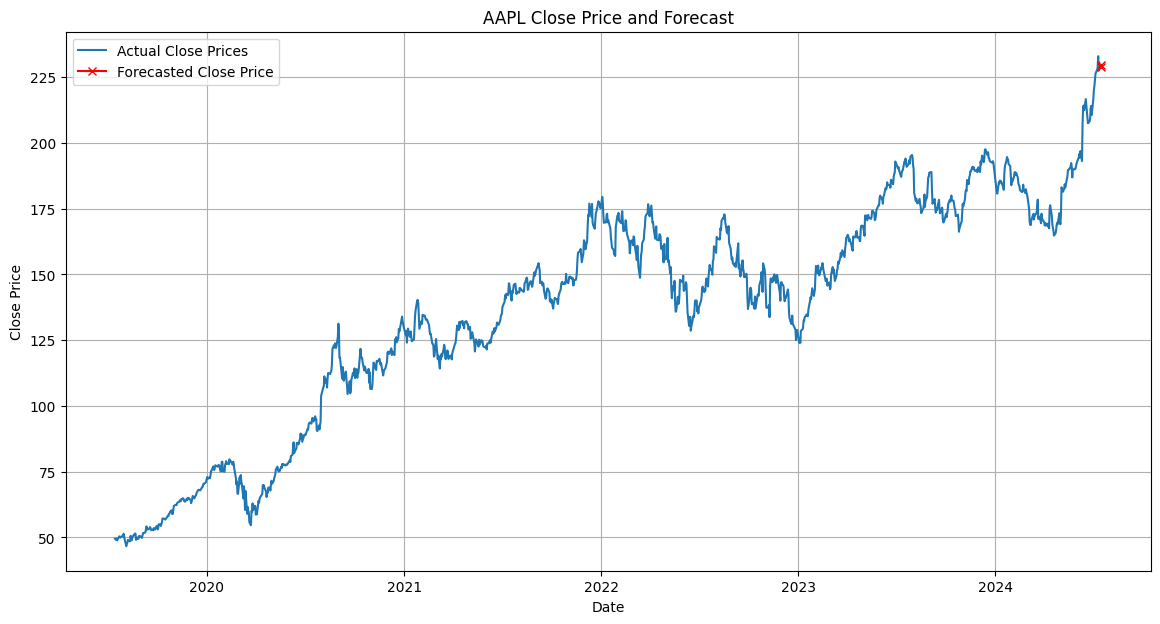

Forecasted Close Price: 228.71804430233686


In [17]:
# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(series, label='Actual Close Prices')
plt.plot(forecast_2.index, forecast_2['Close'], label='Forecasted Close Price', color='red', marker='x')

# Add titles and labels
plt.title('AAPL Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print("Forecasted Close Price:", forecast_2.iloc[0, 0])

In [18]:
# Save the model to a file
joblib_file = "autots_model_for_AAPL_2d.pkl"
joblib.dump(model_2, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to autots_model_for_AAPL_2d.pkl


### Запуск обученной модели 1d

Model loaded from autots_model_for_AAPL_1d.pkl


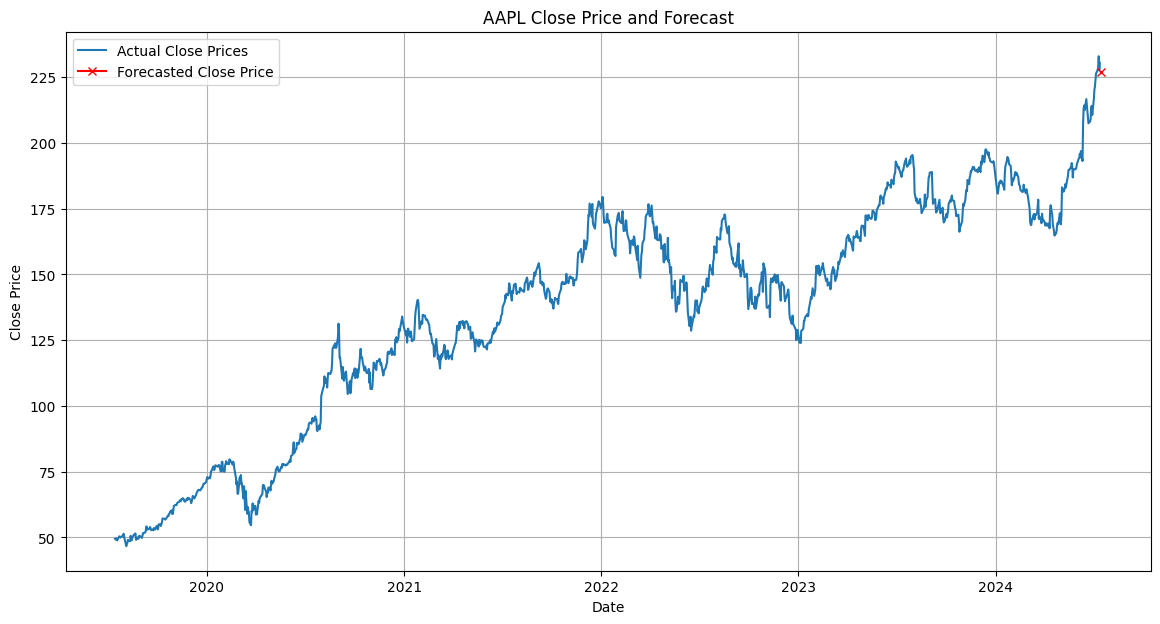

Forecasted Close Price: 227.15801242996523


In [19]:
# Load the saved model from the file
joblib_file = "autots_model_for_AAPL_1d.pkl"
model = joblib.load(joblib_file)
print(f"Model loaded from {joblib_file}")

# Load the data
file_path = 'APPL_new.csv'
data = pd.read_csv(file_path)
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

# Convert Datetime column to datetime format with UTC
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Set Datetime as index
data.set_index('Date', inplace=True)

# Ensure the index is sorted
data.sort_index(inplace=True)

# Extract the 'Close' series
series = data['Close']

# Generate the forecast using the loaded model
prediction = model.predict()
forecast = prediction.forecast

# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(series, label='Actual Close Prices')
plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='red', marker='x')

# Add titles and labels
plt.title('AAPL Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print("Forecasted Close Price:", forecast.iloc[0, 0])

In [ ]:
forecast.iloc[:]

### Запуск обученной модели 2d

Model loaded from autots_model_for_AAPL_2d.pkl


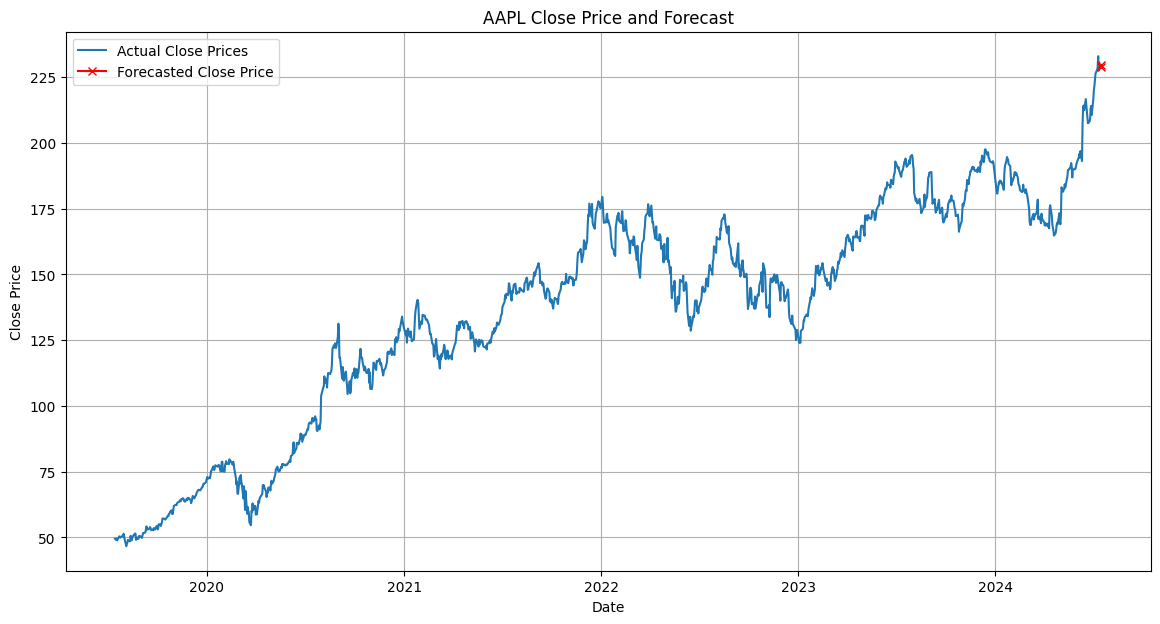

Forecasted Close Price: 228.71804430233686


In [20]:
# Load the saved model from the file
joblib_file = "autots_model_for_AAPL_2d.pkl"
model = joblib.load(joblib_file)
print(f"Model loaded from {joblib_file}")

# Load the data
file_path = 'APPL_new.csv'
data = pd.read_csv(file_path)
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

# Convert Datetime column to datetime format with UTC
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Set Datetime as index
data.set_index('Date', inplace=True)

# Ensure the index is sorted
data.sort_index(inplace=True)

# Extract the 'Close' series
series = data['Close']

# Generate the forecast using the loaded model
prediction = model.predict()
forecast = prediction.forecast

# Plot the original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(series, label='Actual Close Prices')
plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='red', marker='x')

# Add titles and labels
plt.title('AAPL Close Price and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print("Forecasted Close Price:", forecast.iloc[0, 0])

In [21]:
forecast.iloc[:]

Close
2024-07-15 00:00:00+00:00  228.718044
2024-07-16 00:00:00+00:00  229.705528

In [23]:
forecast_2.iloc[:]

Close
2024-07-15 00:00:00+00:00  228.718044
2024-07-16 00:00:00+00:00  229.705528

### Дообучение на новых данных

In [22]:
# # Load the saved model from the file
# joblib_file = "autots_model.pkl"
# model = joblib.load(joblib_file)
# print(f"Model loaded from {joblib_file}")

# # Load the new data
# new_file_path = 'AAPL_new.csv'
# new_data = pd.read_csv(new_file_path)

# # Convert Datetime column to datetime format with UTC
# new_data['Datetime'] = pd.to_datetime(new_data['Datetime'], utc=True)

# # Set Datetime as index
# new_data.set_index('Datetime', inplace=True)

# # Ensure the index is sorted
# new_data.sort_index(inplace=True)

# # Extract the 'Close' series from new data
# new_series = new_data['Close']

# # Combine old and new series if needed
# combined_series = pd.concat([model.original_data['Close'], new_series])

# # Refit the model on the combined series
# model = model.fit(combined_series)

# # Save the updated model back to the file
# joblib.dump(model, joblib_file)
# print(f"Model updated and saved to {joblib_file}")

# # Generate the forecast using the updated model
# prediction = model.predict()
# forecast = prediction.forecast

# # Plot the original data and forecast
# plt.figure(figsize=(14, 7))
# plt.plot(combined_series, label='Actual Close Prices')
# plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='red', marker='o')

# # Add titles and labels
# plt.title('AAPL Close Price and Forecast')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()

# print("Forecasted Close Price:", forecast.iloc[0, 0])